In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
from scripts.load_data import *
from scripts.preprocess import *
from scripts.predict_sarima import *
from scripts.helper import *
from scripts.postprocess import *

In [2]:
data = pd.read_excel("//ru.nl/wrkgrp/TeamIR/Man_info/Student Analytics/Prognosemodel RU/Syntax/Python/studentprognose/data/output/output_final.xlsx")
print(data)
print(data.columns)

         index Examentype                                Croho groepeernaam  \
0            0   Bachelor                   B Algemene Cultuurwetenschappen   
1            1   Bachelor                   B Algemene Cultuurwetenschappen   
2            2   Bachelor                   B Algemene Cultuurwetenschappen   
3            3   Bachelor                   B Algemene Cultuurwetenschappen   
4            4   Bachelor                   B Algemene Cultuurwetenschappen   
...        ...        ...                                               ...   
164776  163157     Master  M Wijsbegeerte van een Bepaald Wetenschapsgebied   
164777  163158     Master  M Wijsbegeerte van een Bepaald Wetenschapsgebied   
164778  163159     Master  M Wijsbegeerte van een Bepaald Wetenschapsgebied   
164779  163160     Master  M Wijsbegeerte van een Bepaald Wetenschapsgebied   
164780  163161     Master  M Wijsbegeerte van een Bepaald Wetenschapsgebied   

       Herkomst Faculteit  Collegejaar  Weeknummer 

In [3]:
import json

def print_dict(dict):
    print(json.dumps(dict, sort_keys=True, indent=4))

In [6]:
def plot_per_heritage(herkomst):
    MAE_metrics = {
        "MAE average ensemble": {},
        "MAE ensemble": {},
        "MAE sarima cumulative": {},
        "MAE sarima individual": {},
        "MAE ratio": {}
    }

    MAPE_metrics = {
        "MAPE average ensemble": {},
        "MAPE ensemble": {},
        "MAPE sarima cumulative": {},
        "MAPE sarima individual": {},
        "MAPE ratio": {}
    }

    MAE_average_ensemble = {}
    MAPE_average_ensemble = {}

    for opleiding in data["Croho groepeernaam"].unique():
        temp_data = data[data["Croho groepeernaam"] == opleiding]
        temp_data = temp_data[temp_data["Herkomst"] == herkomst]
        temp_data = temp_data[~np.isnan(temp_data["Average_ensemble_prediction"])]

        for key in MAE_metrics:
            MAE_metrics[key][opleiding] = temp_data[key].mean()

        for key in MAPE_metrics:
            MAPE_metrics[key][opleiding] = temp_data[key].sum() / len(temp_data) * 100

    # print_dict(MAE_metrics)
    # print_dict(MAPE_metrics)
            
    no_data_programme = []
    for programme in MAE_metrics["MAE average ensemble"]:
        nan_everywhere = True
        for key in MAE_metrics:
            if not np.isnan(MAE_metrics[key][programme]) and MAE_metrics[key][programme] != 0:
                nan_everywhere = False

        for key in MAPE_metrics:
            if not np.isnan(MAPE_metrics[key][programme]) and MAPE_metrics[key][programme] != 0:
                nan_everywhere = False
        
        if nan_everywhere:
            no_data_programme.append(programme)

    # print('\n'.join(no_data_programme))
    # print(len(no_data_programme))
            
    def get_labels(metrics, replacement):
        method_labels = list(metrics.keys())
        show_method_labels = []
        for m in method_labels:
            show_method_labels.append(m.replace(replacement, ""))
        method_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink']
        group_labels = list(metrics[method_labels[0]].keys())
        per_group_method_values = [[metrics[method][group] for method in method_labels] for group in group_labels]

        return show_method_labels, group_labels, method_colors, per_group_method_values

    # show_method_labels, group_labels, method_colors, per_group_method_values = get_labels(MAE_metrics)
    MAE_labels = get_labels(MAE_metrics, "MAE ")
    MAPE_labels = get_labels(MAPE_metrics, "MAPE ")

    for i, group_label in enumerate(MAE_labels[1]):
        if group_label in no_data_programme:
            continue

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
        ax1.bar(MAE_labels[0], MAE_labels[3][i], color=MAE_labels[2])
        ax1.set_title(group_label + " - MAE")
        ax1.set_ylabel("Mean Absolute Error")
        ax1.plot()

        ax2.bar(MAPE_labels[0], MAPE_labels[3][i], color=MAPE_labels[2])
        ax2.set_title(group_label + " - MAPE")
        ax2.set_ylabel("Mean Absolute Percentage Error")
        ax2.plot()

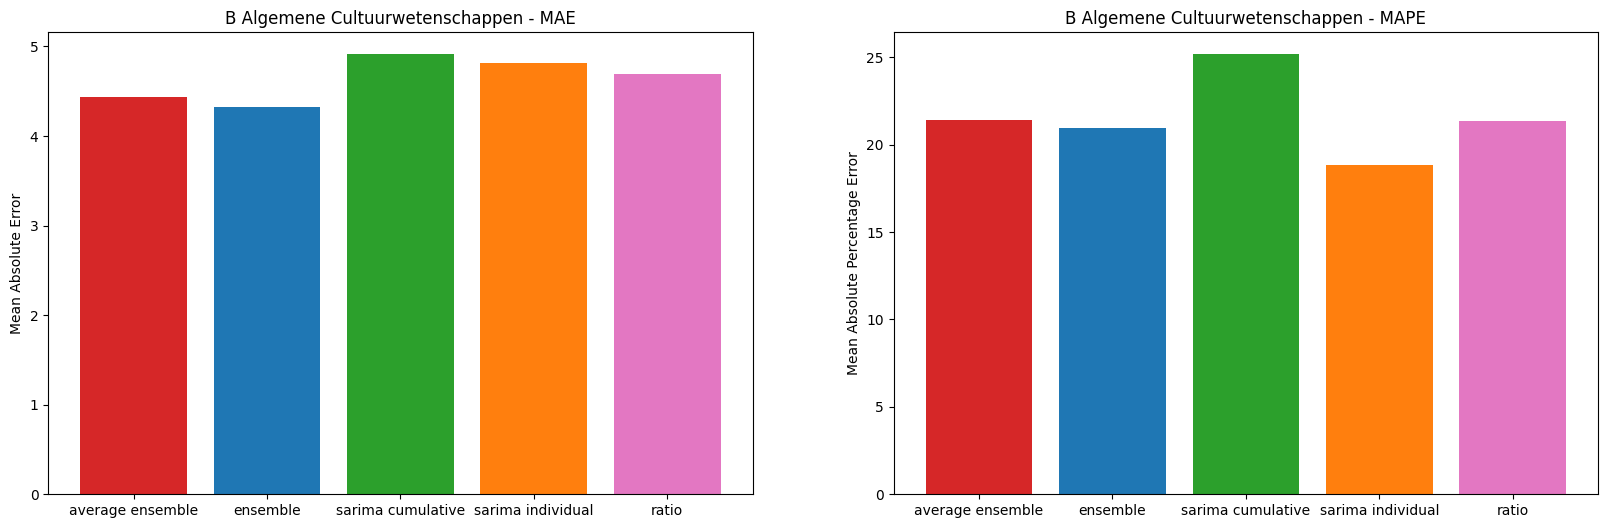

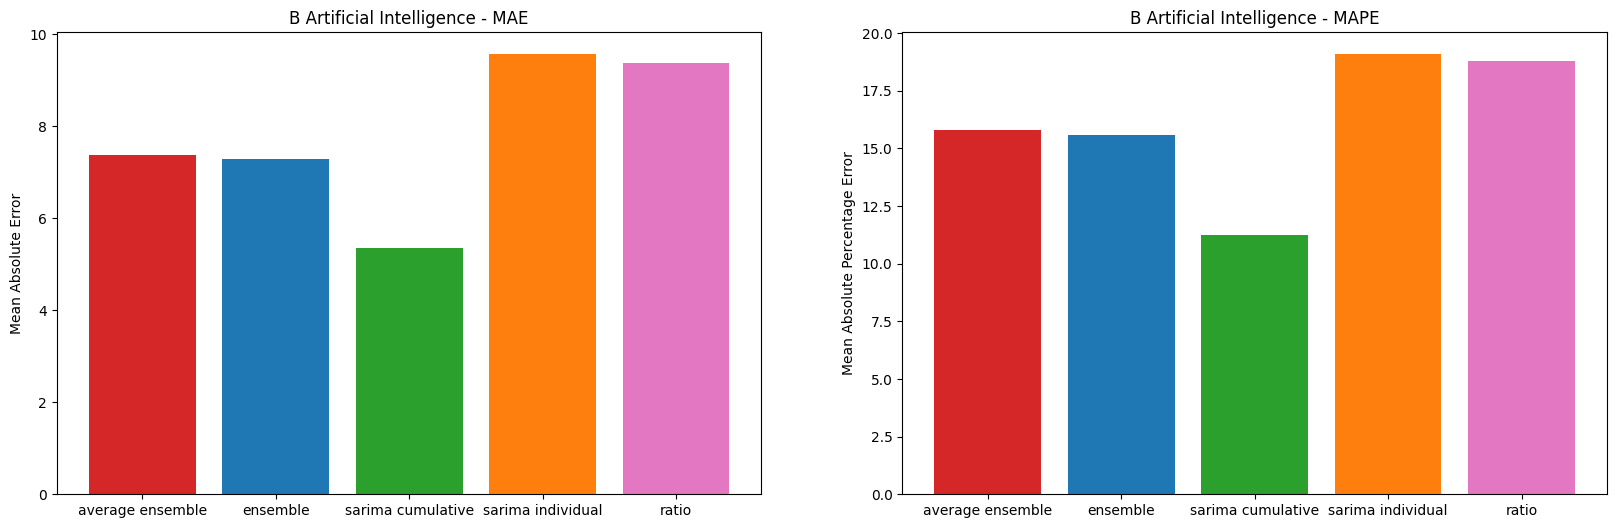

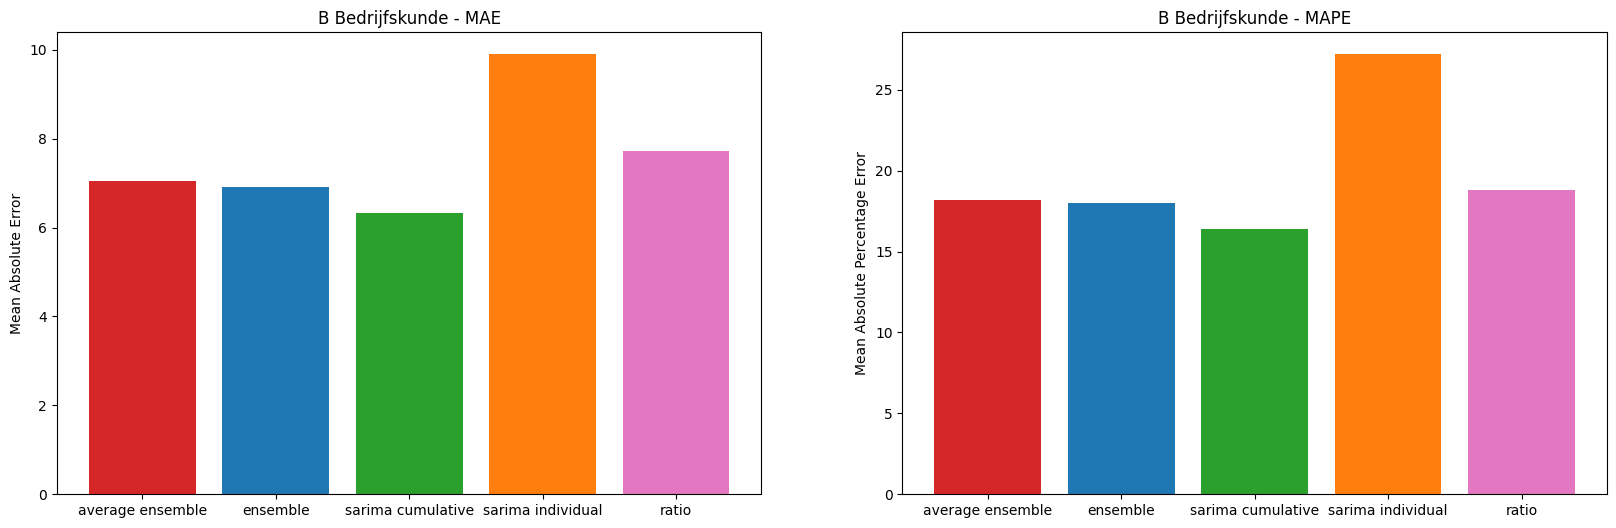

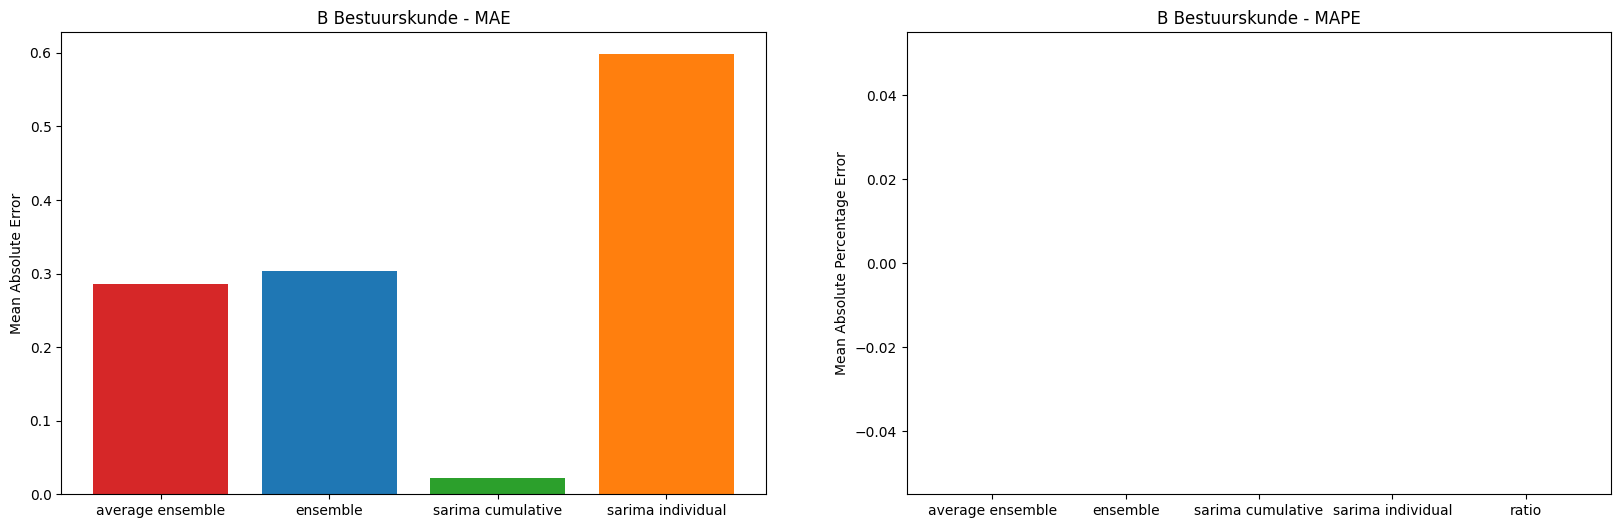

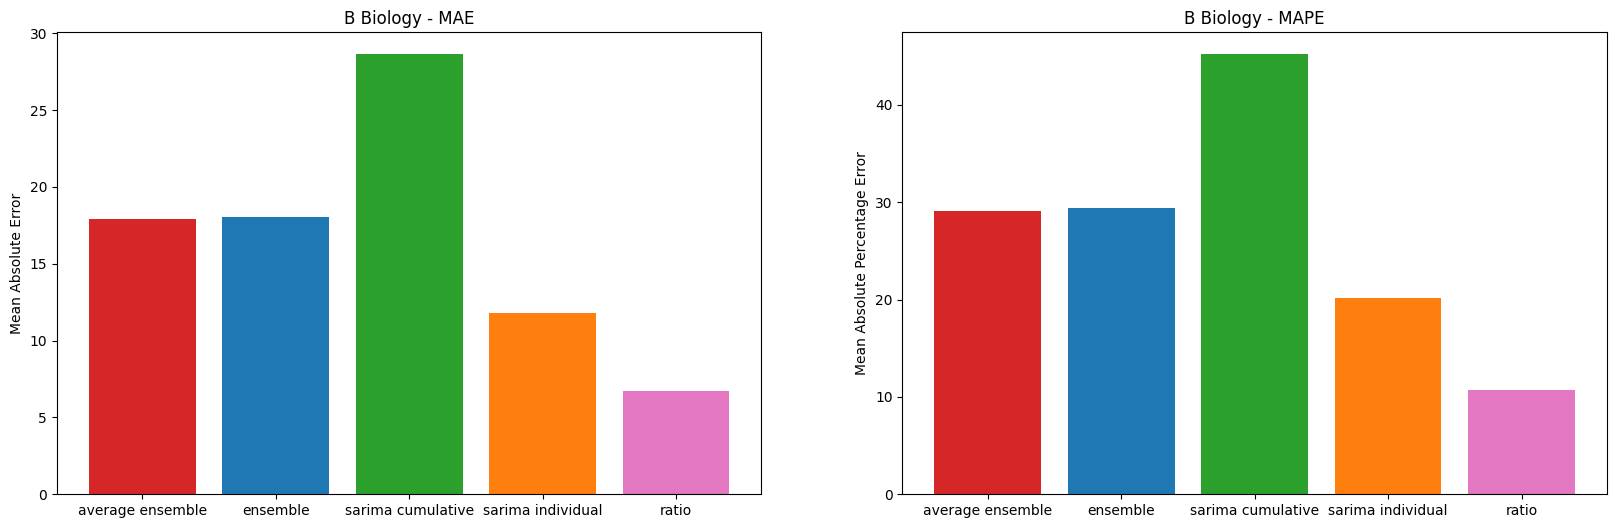

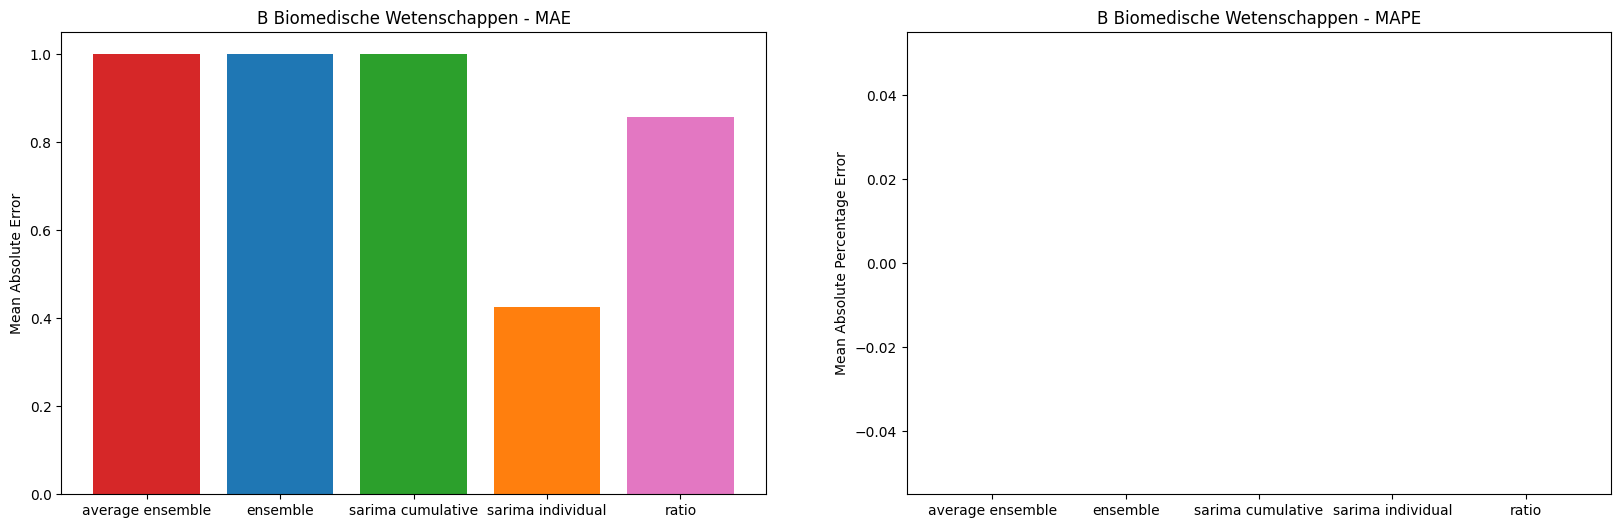

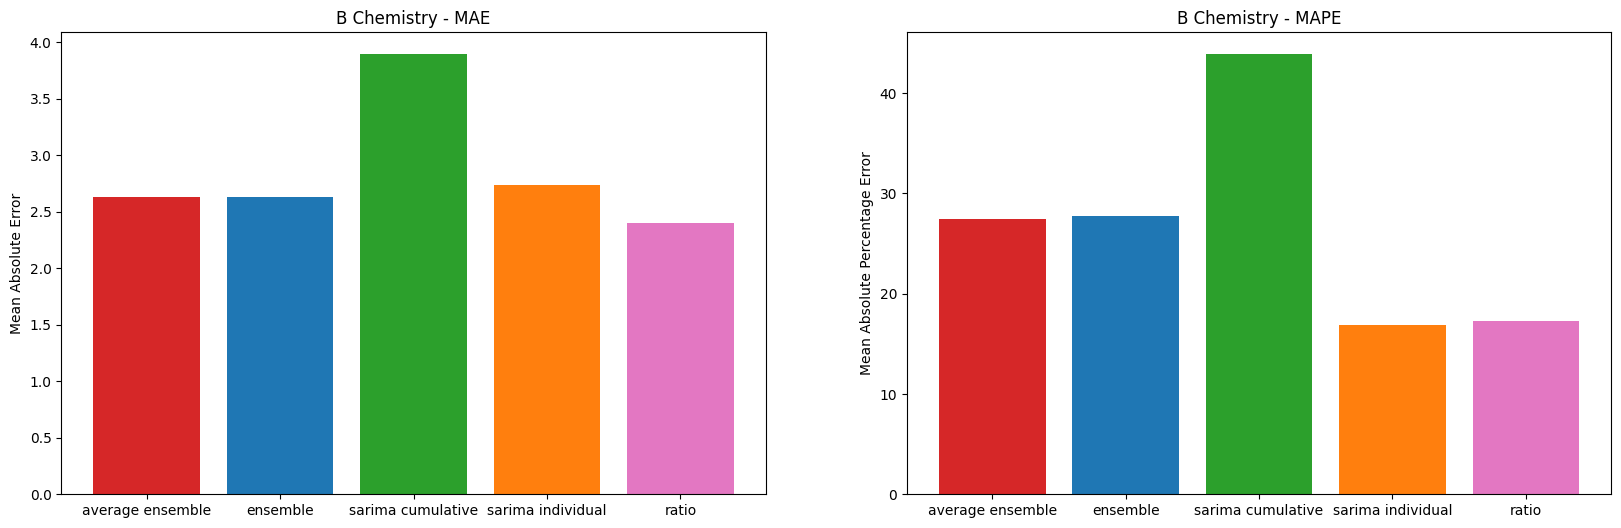

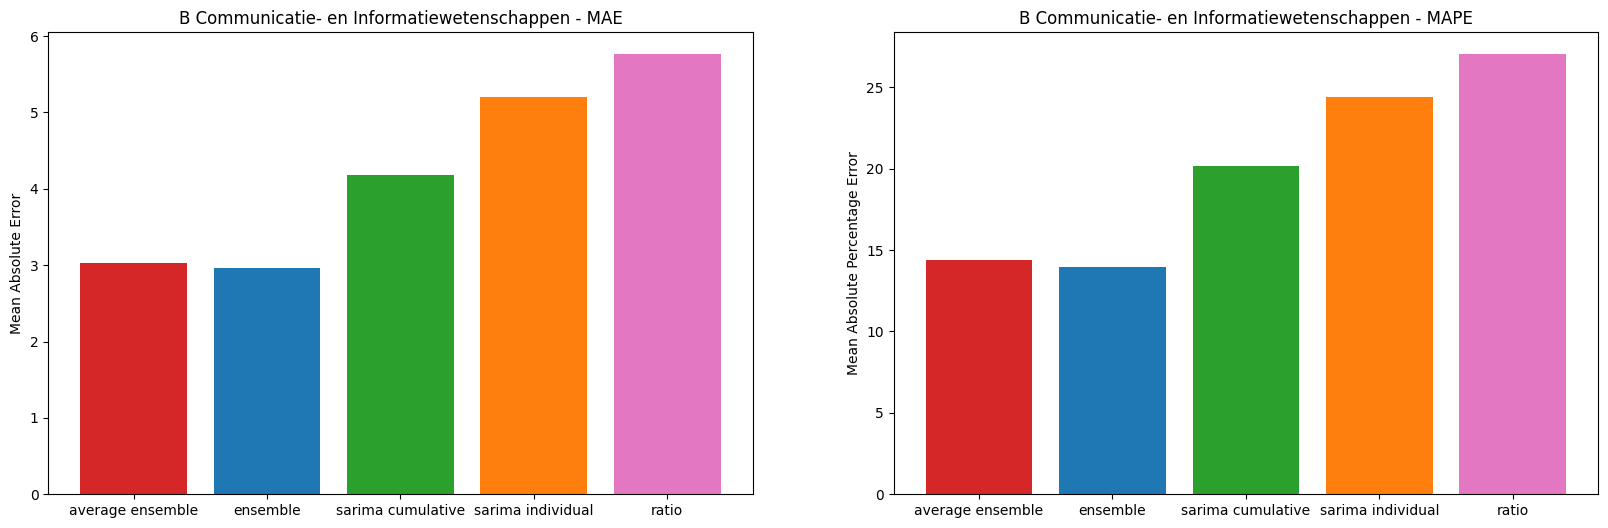

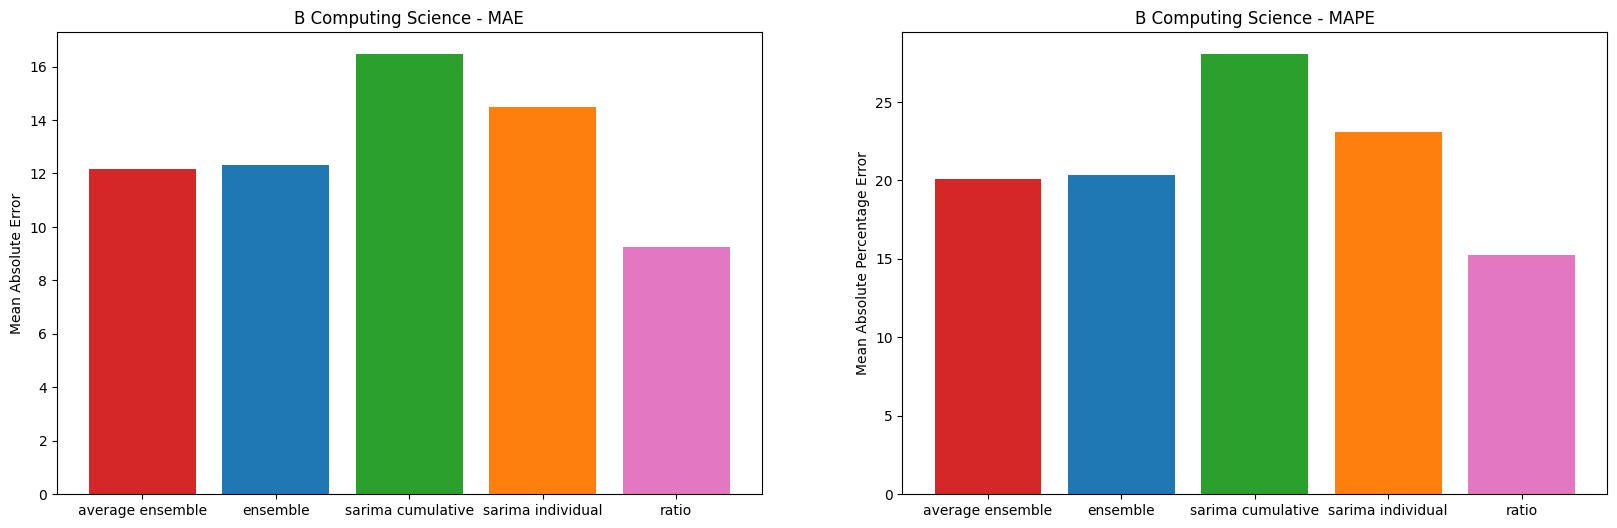

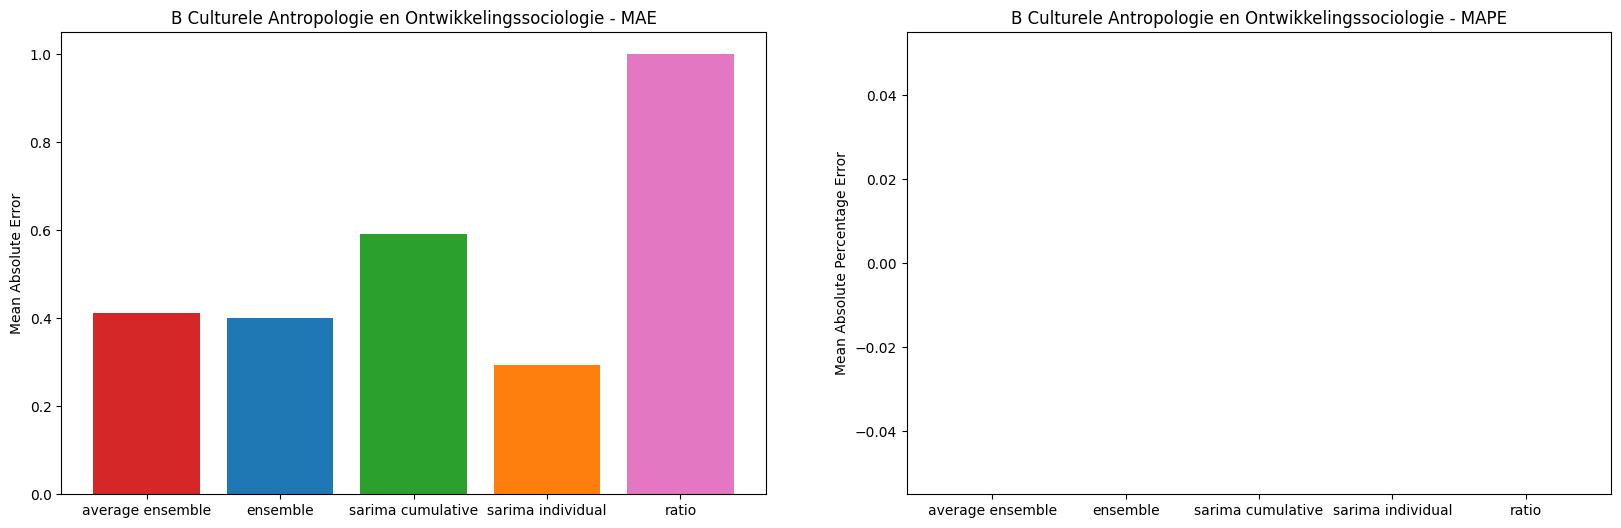

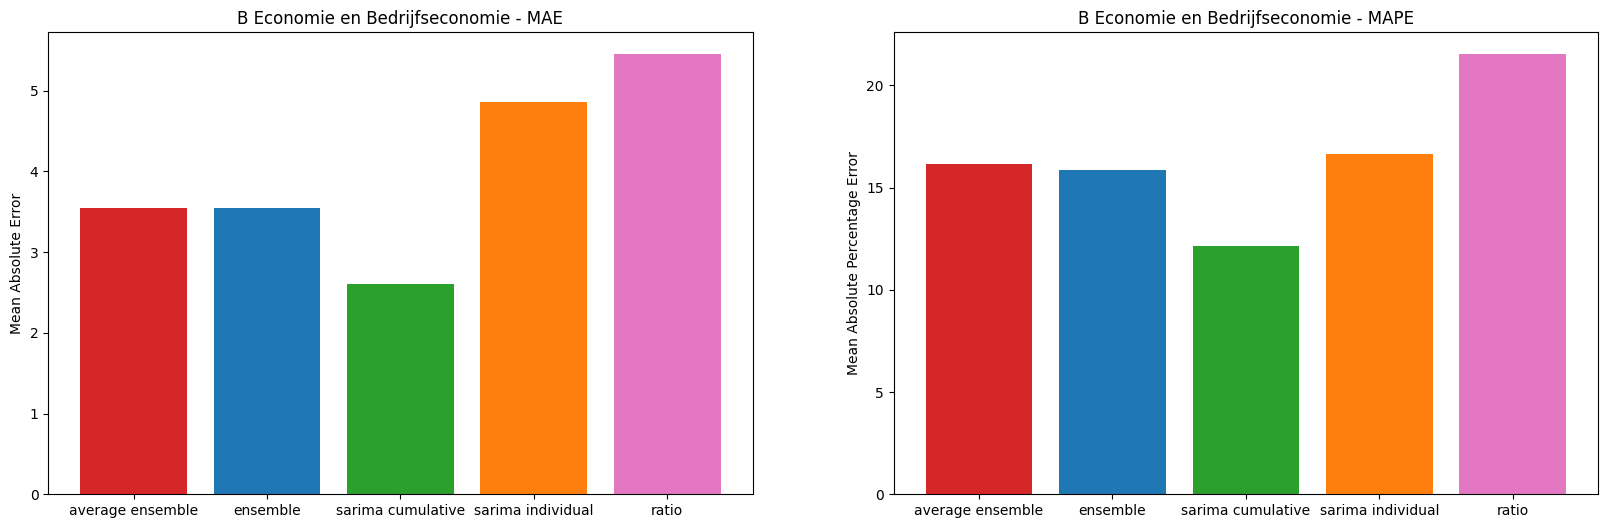

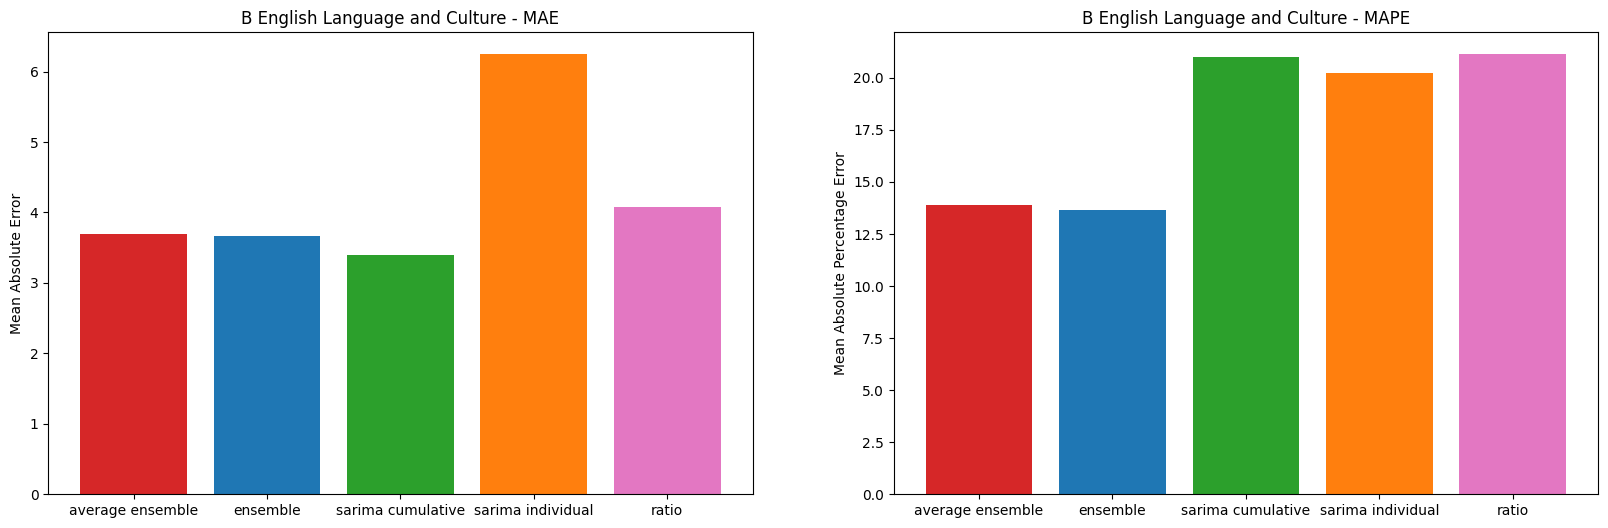

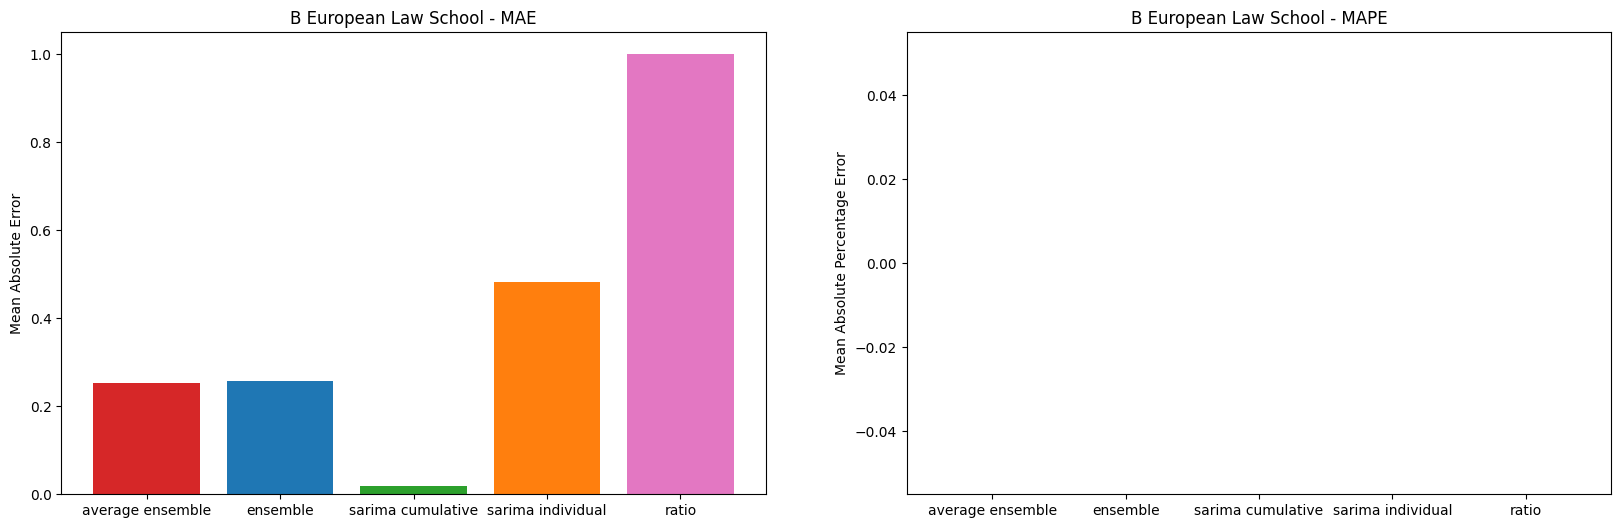

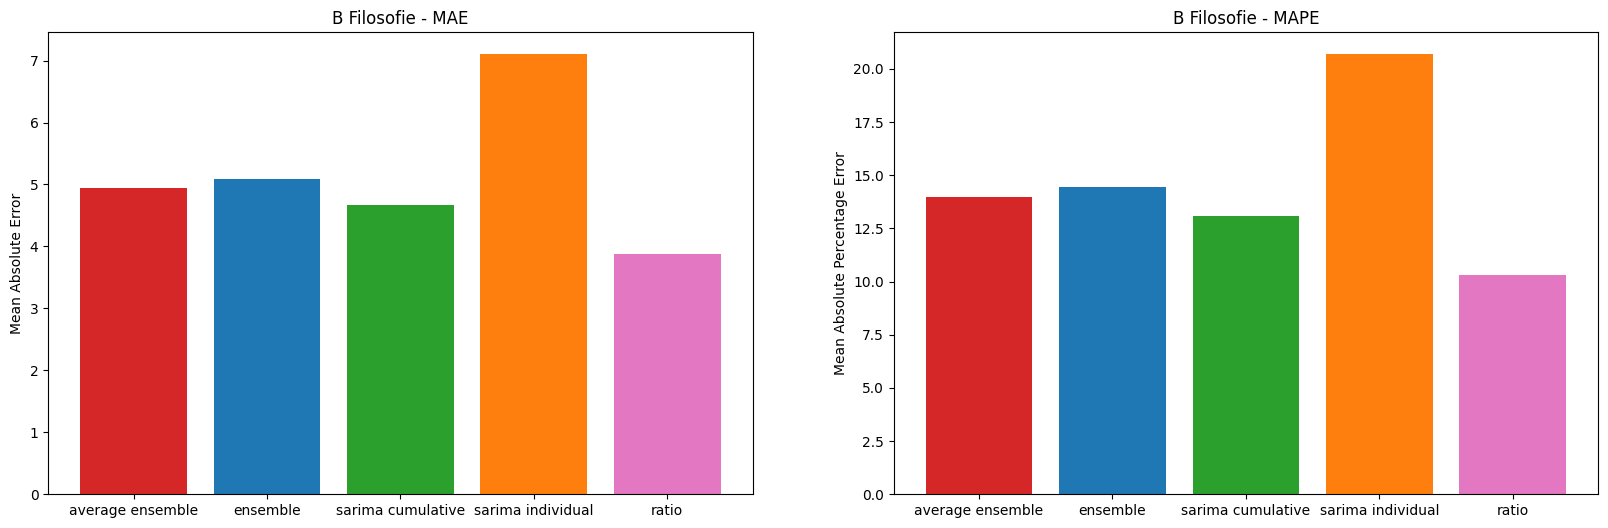

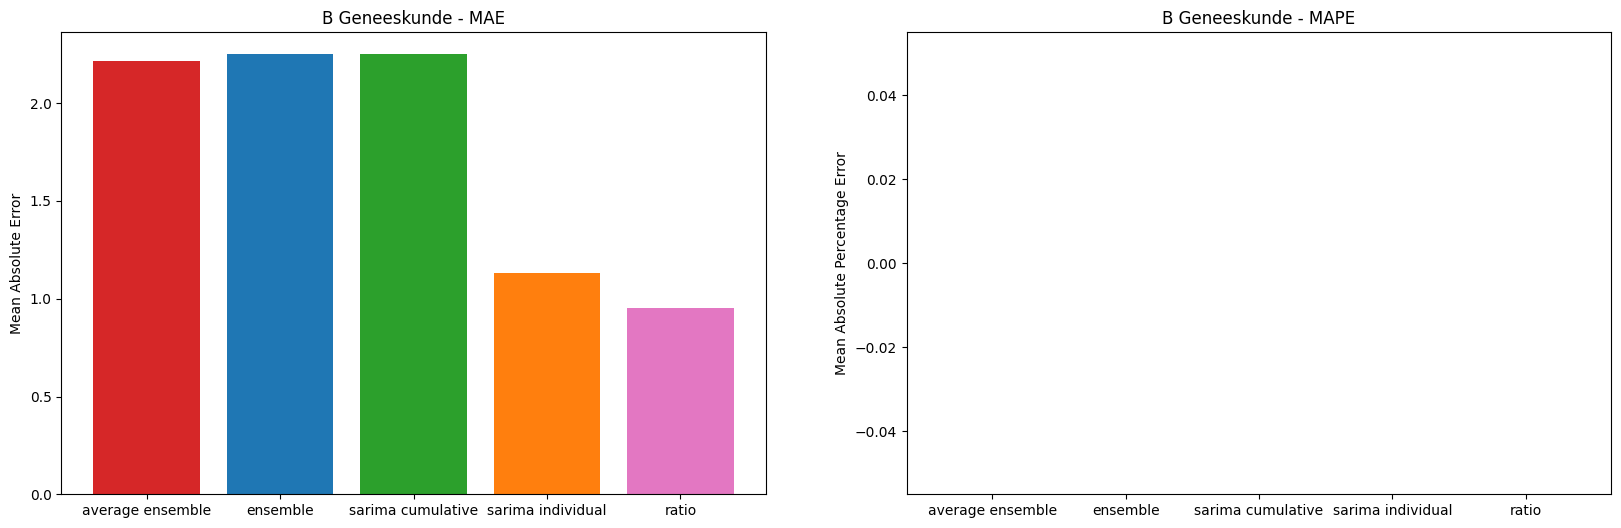

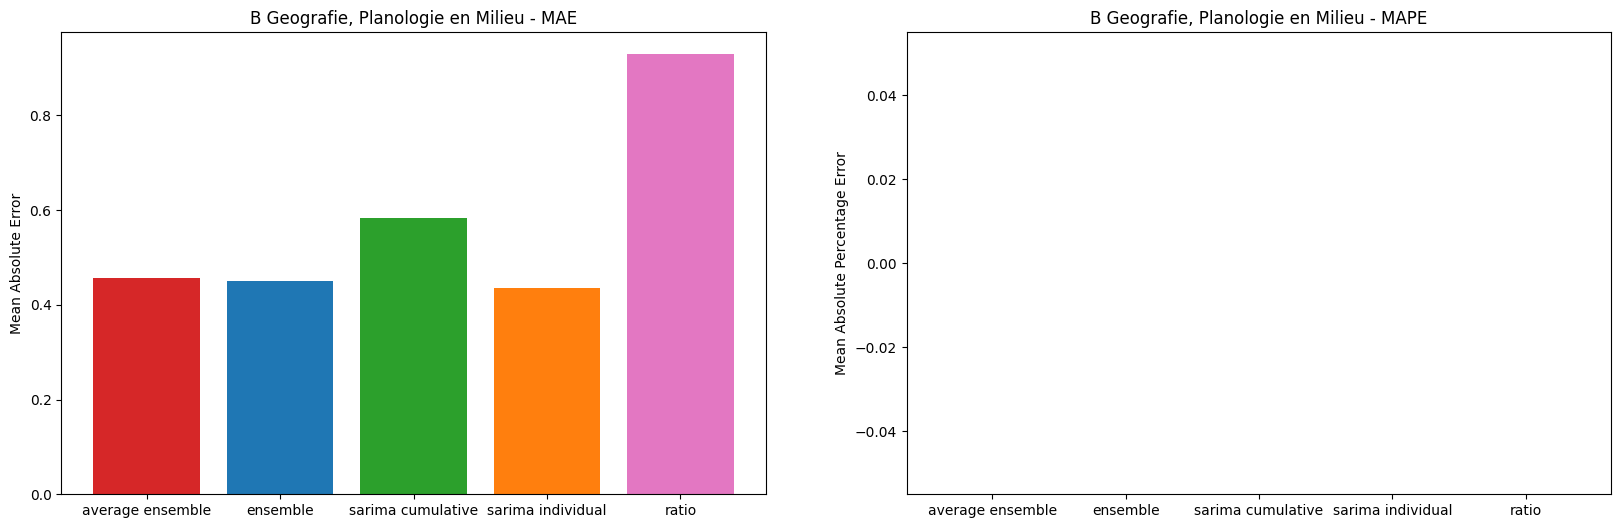

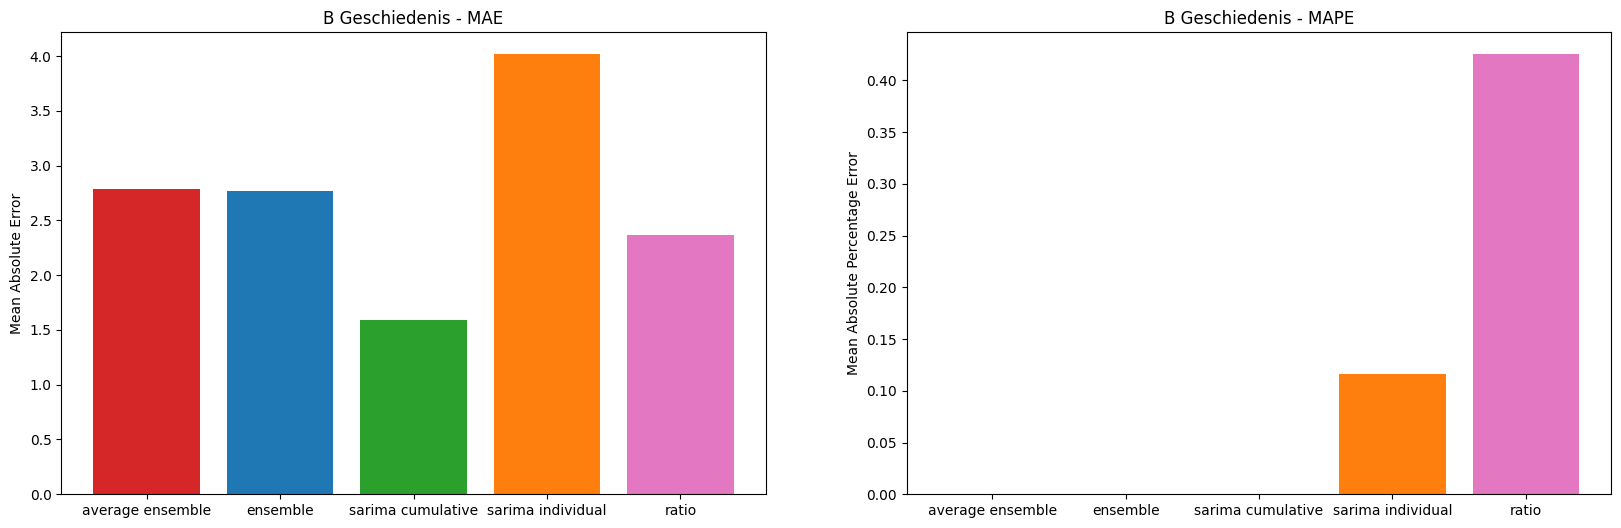

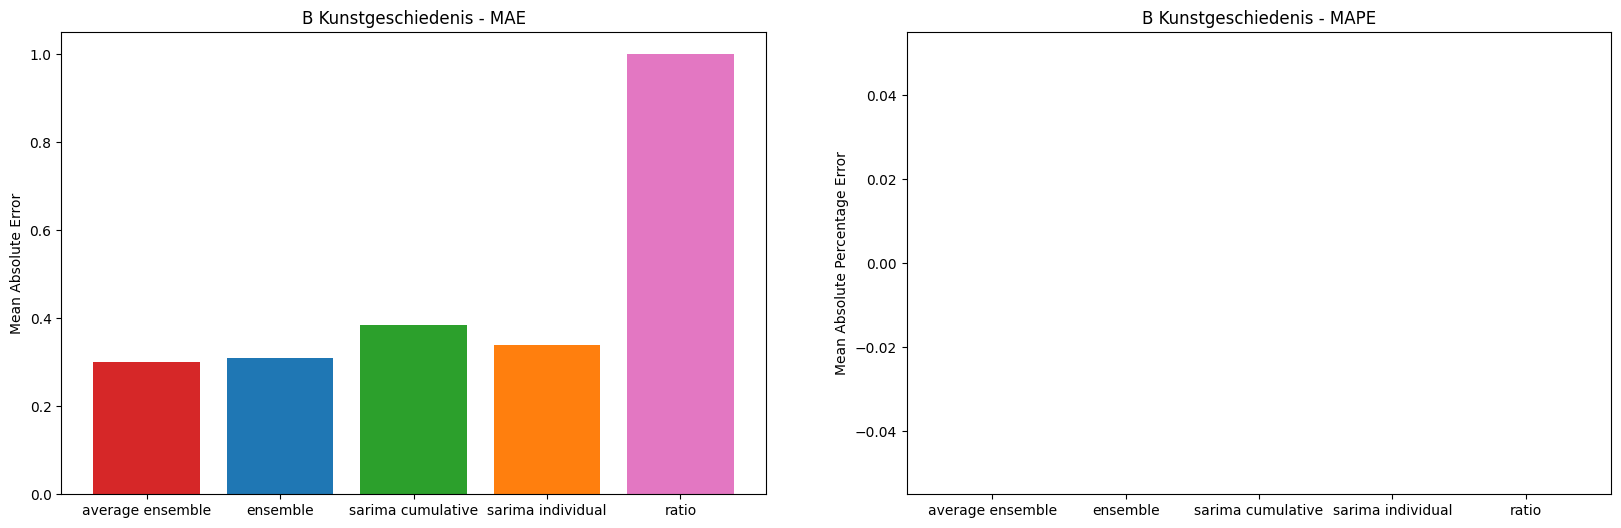

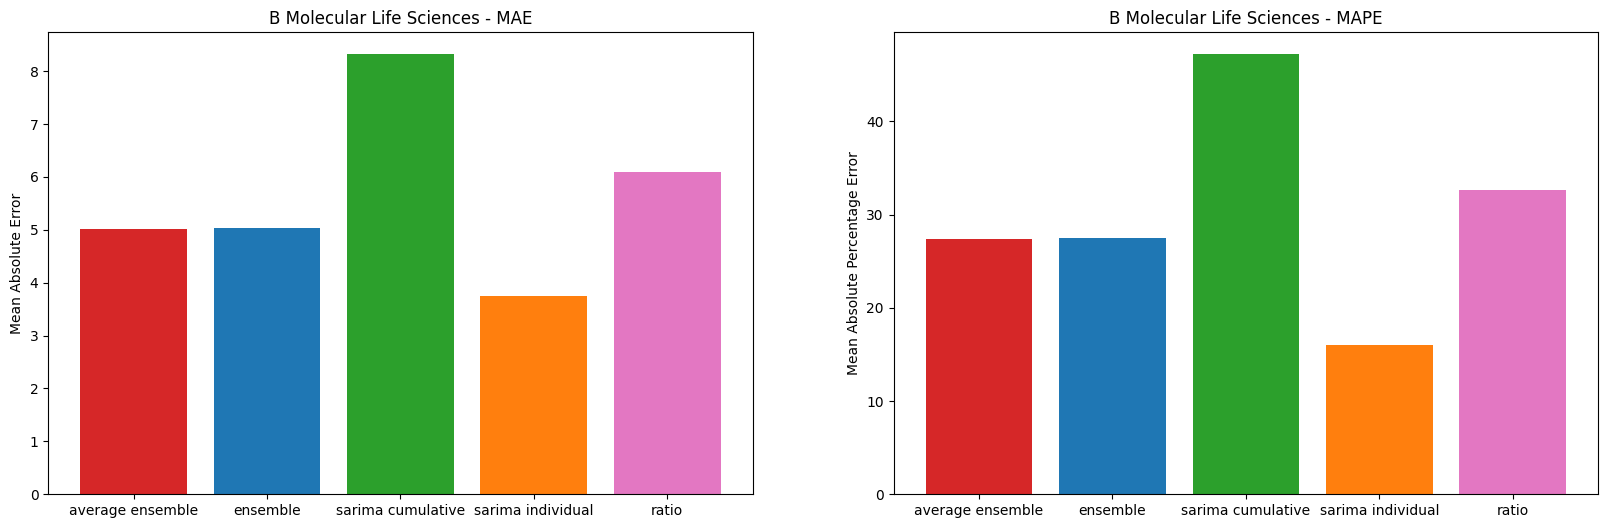

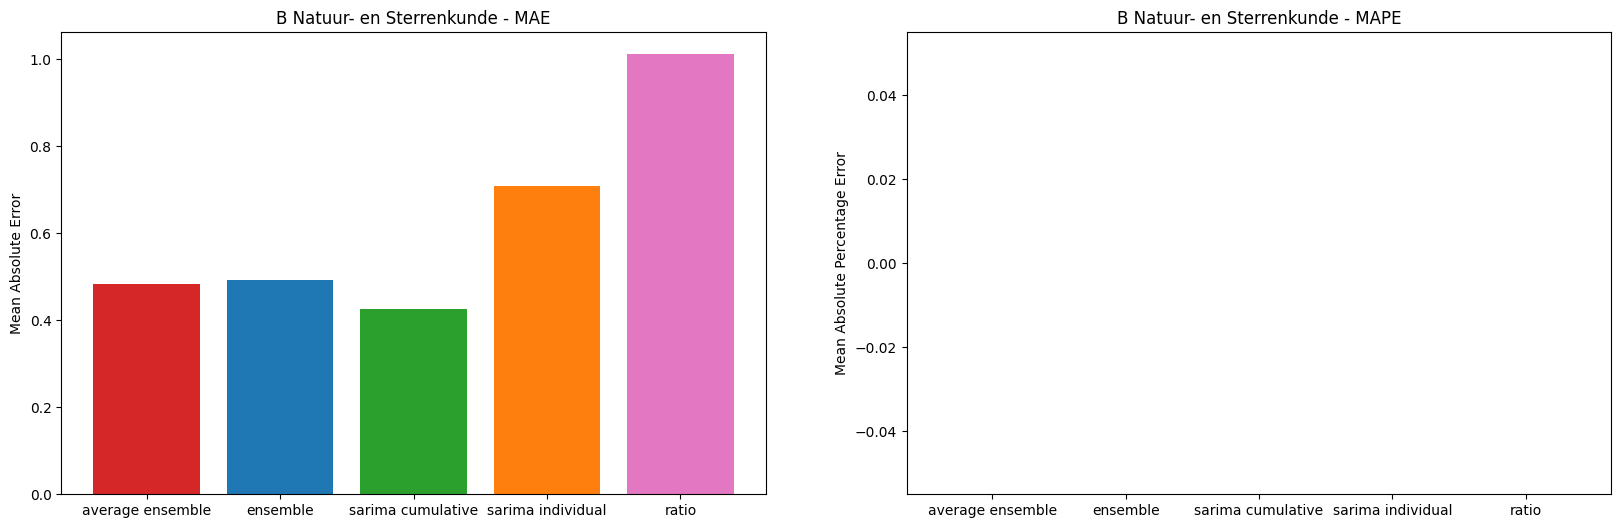

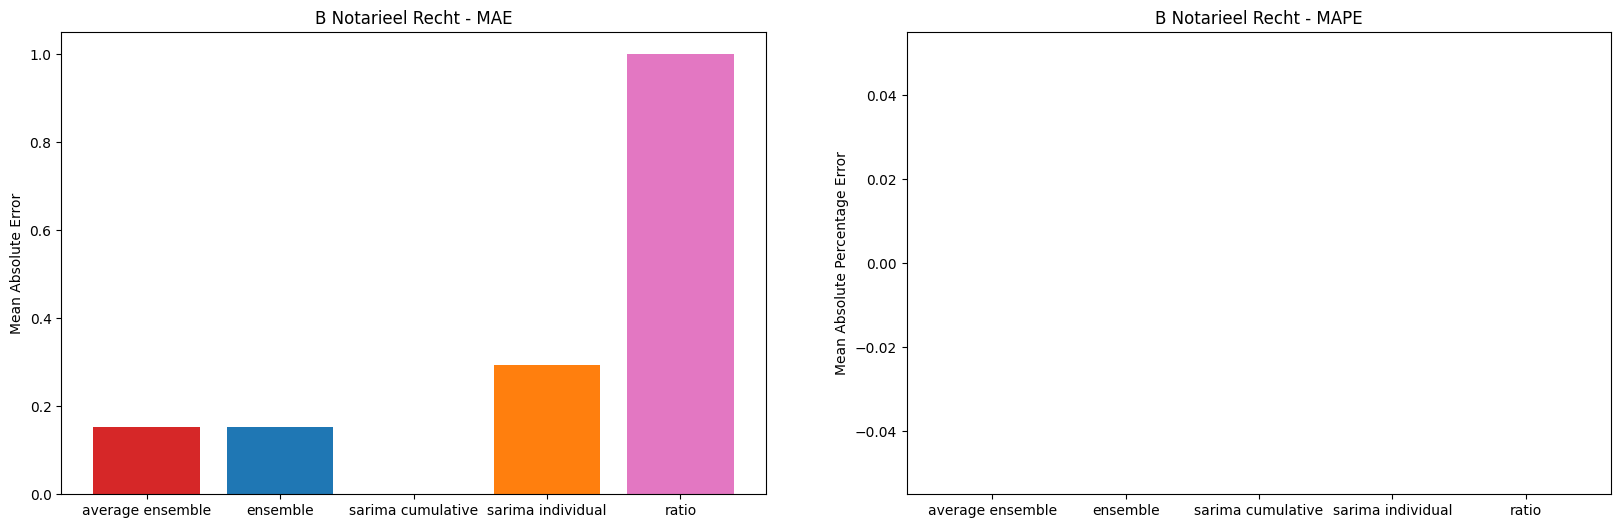

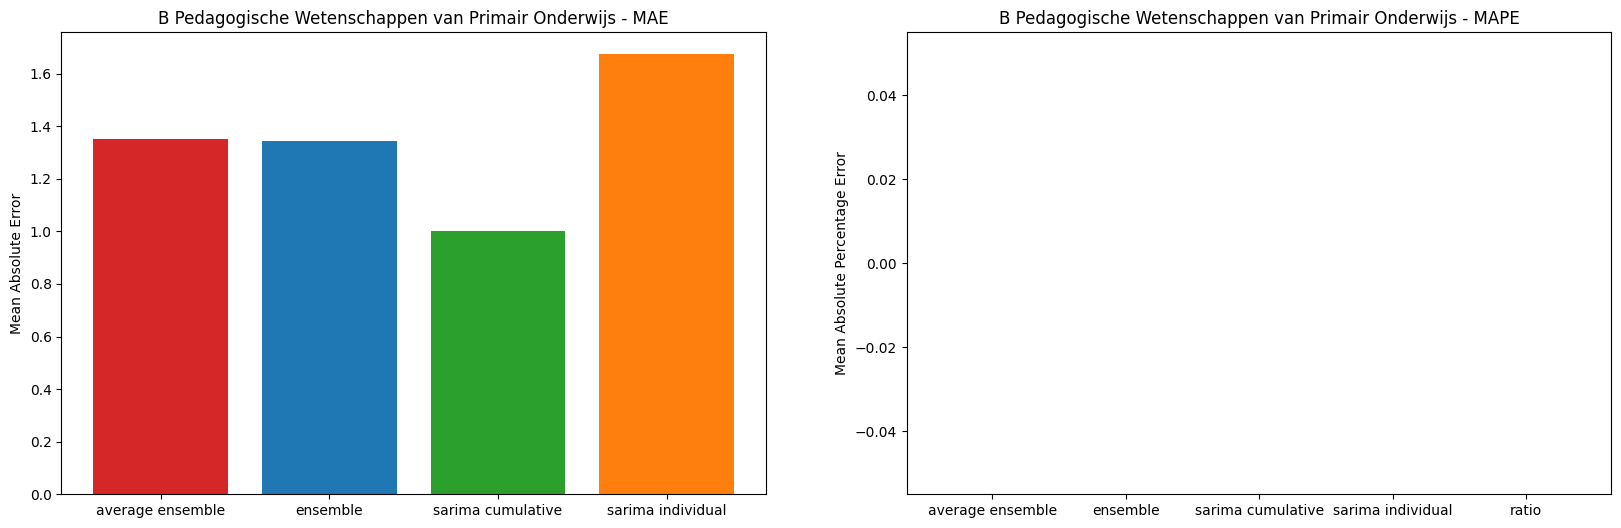

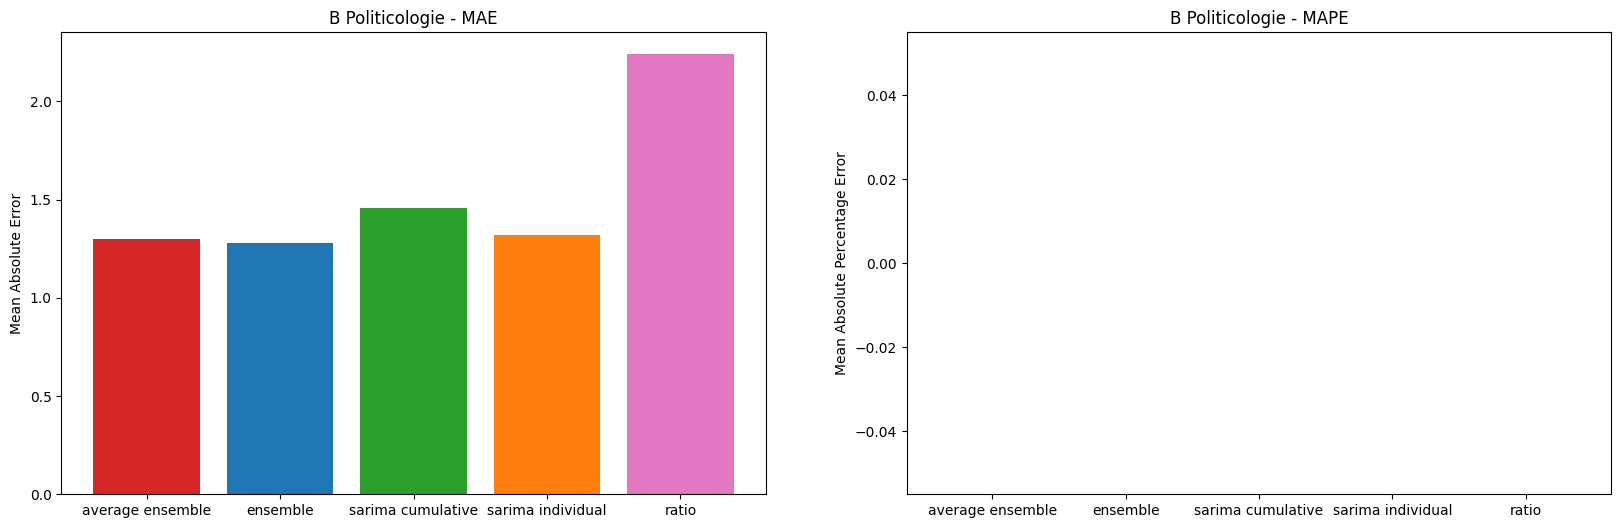

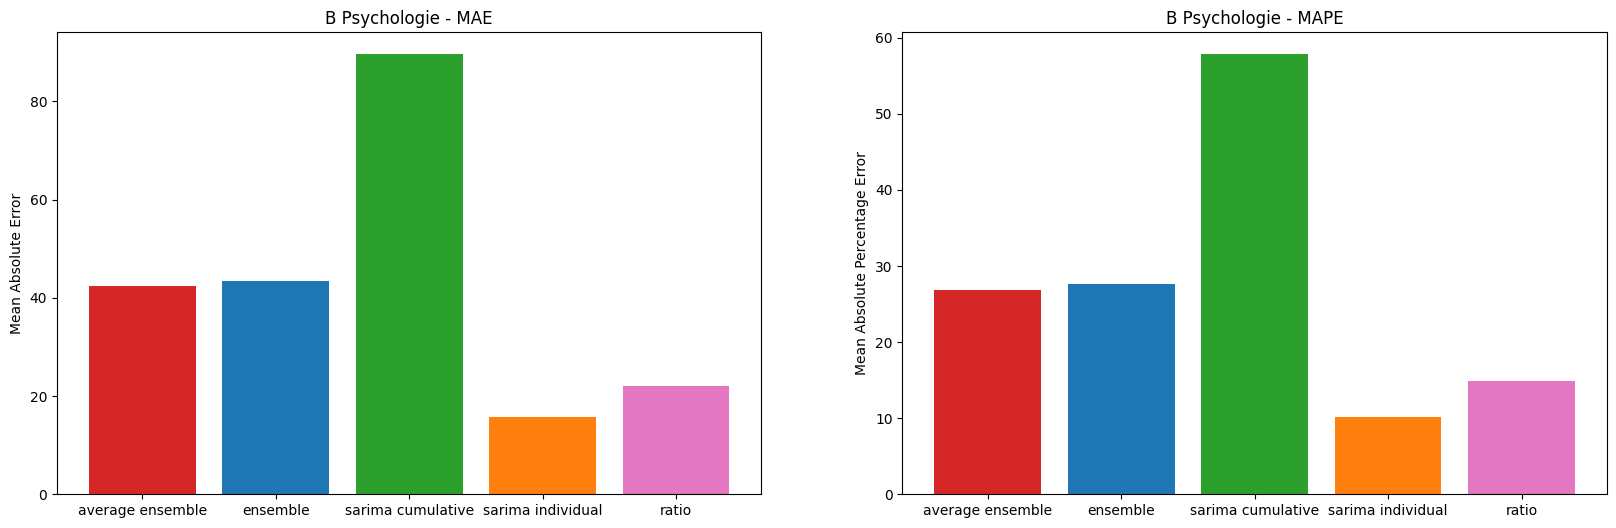

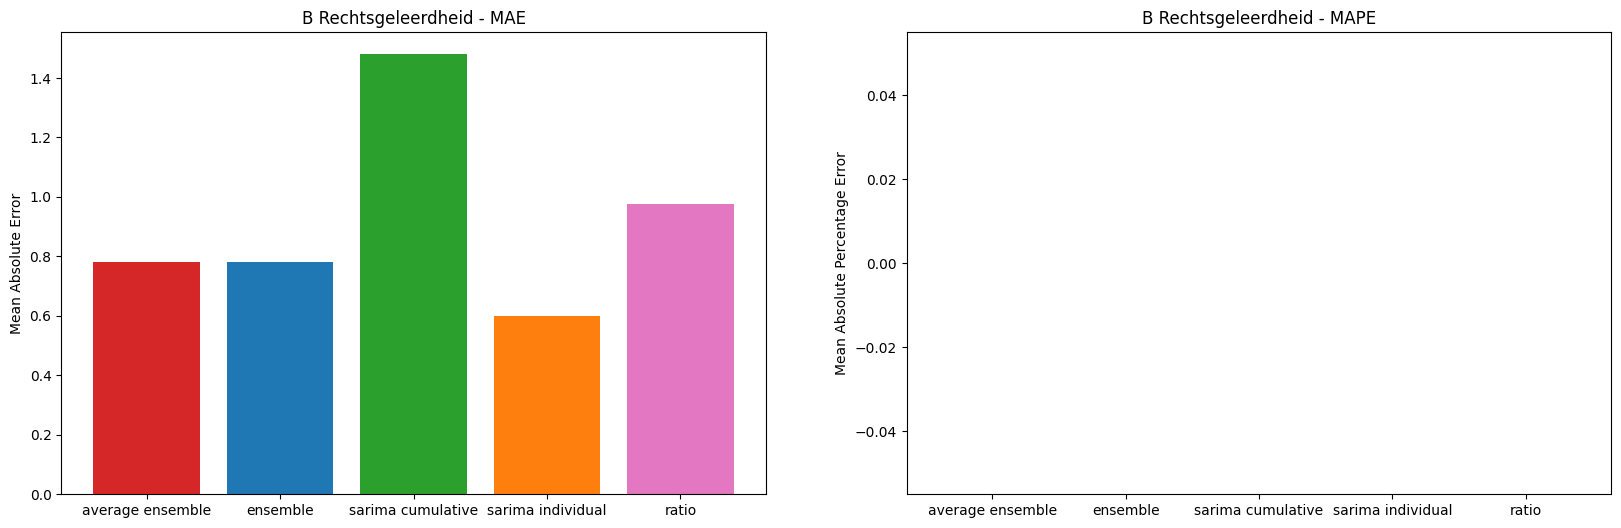

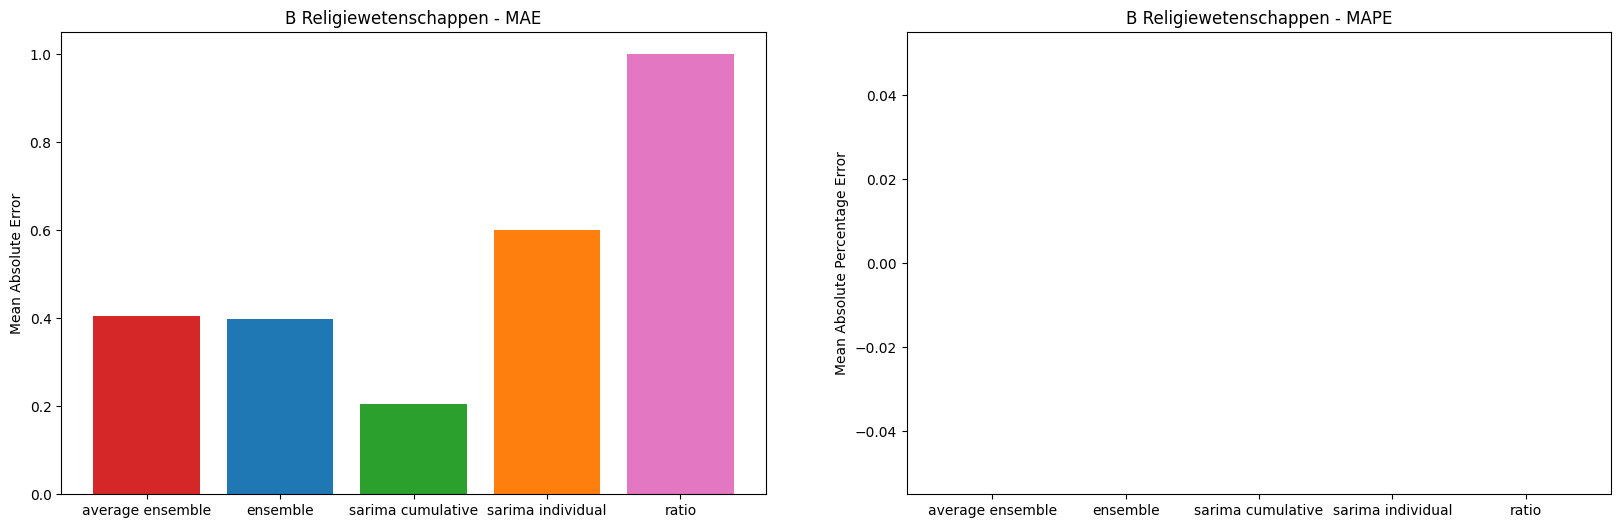

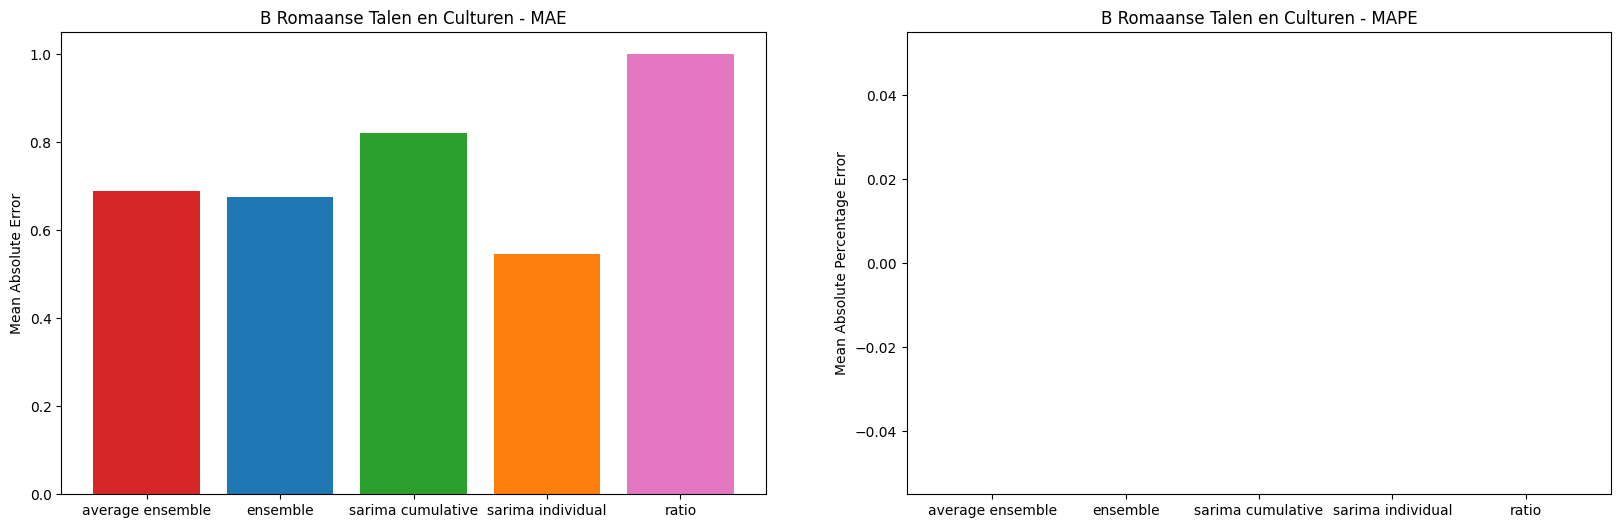

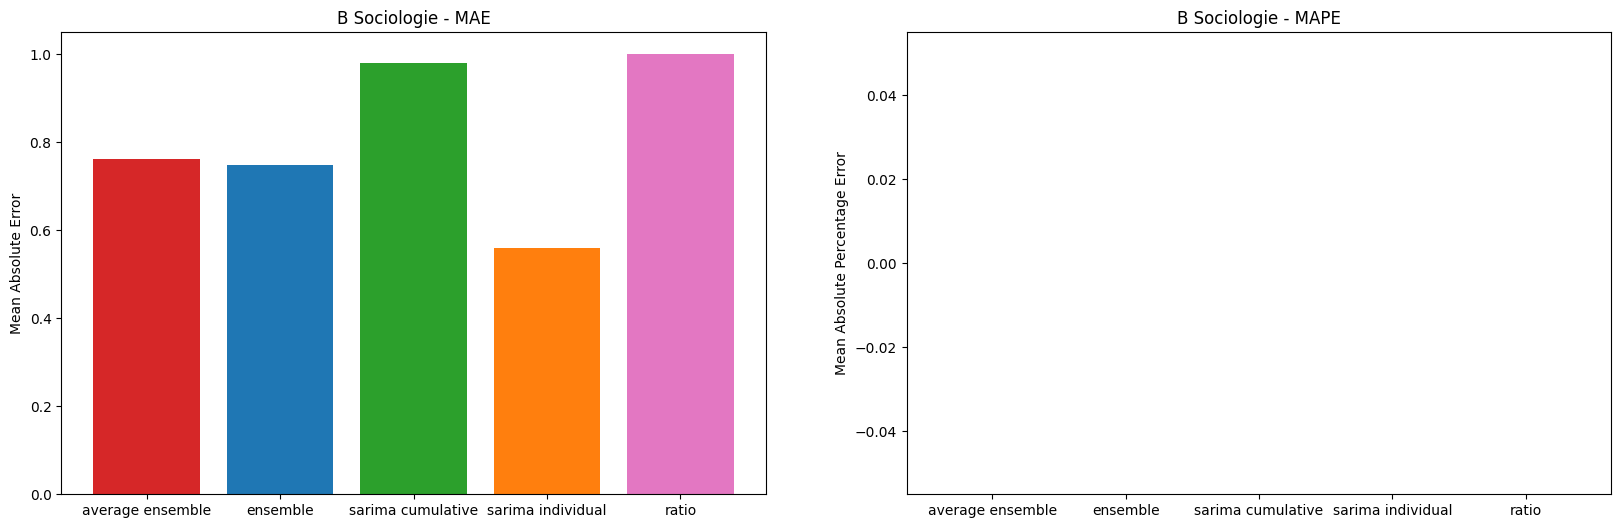

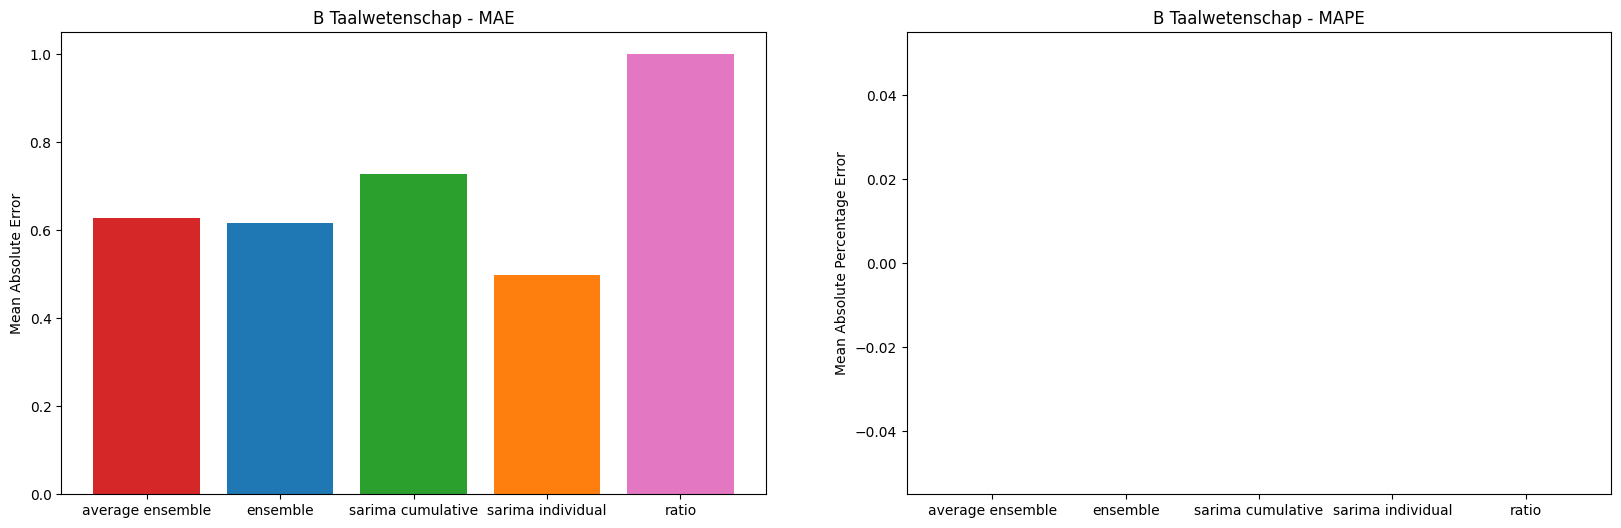

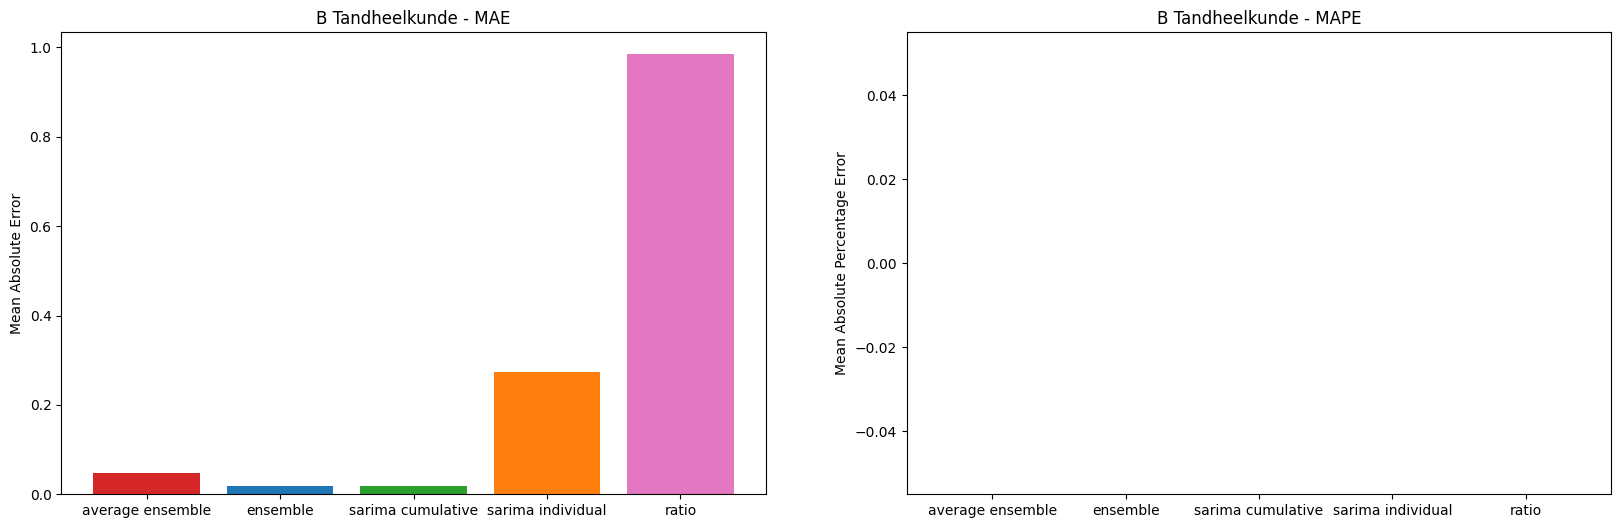

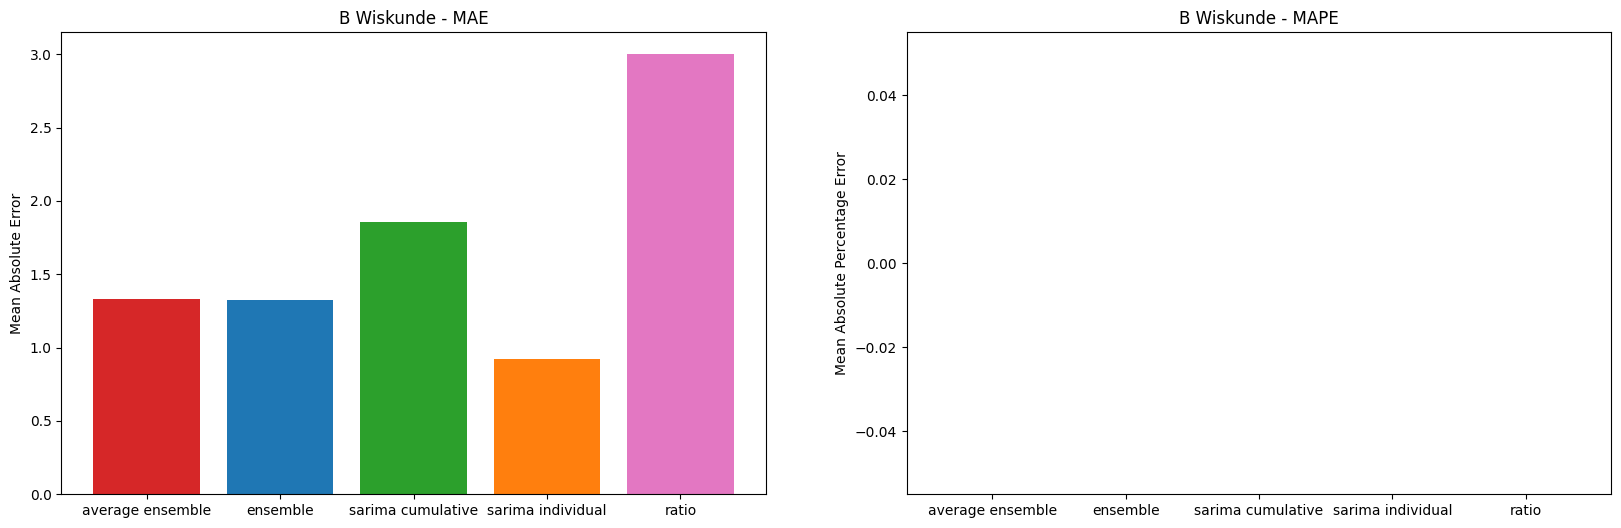

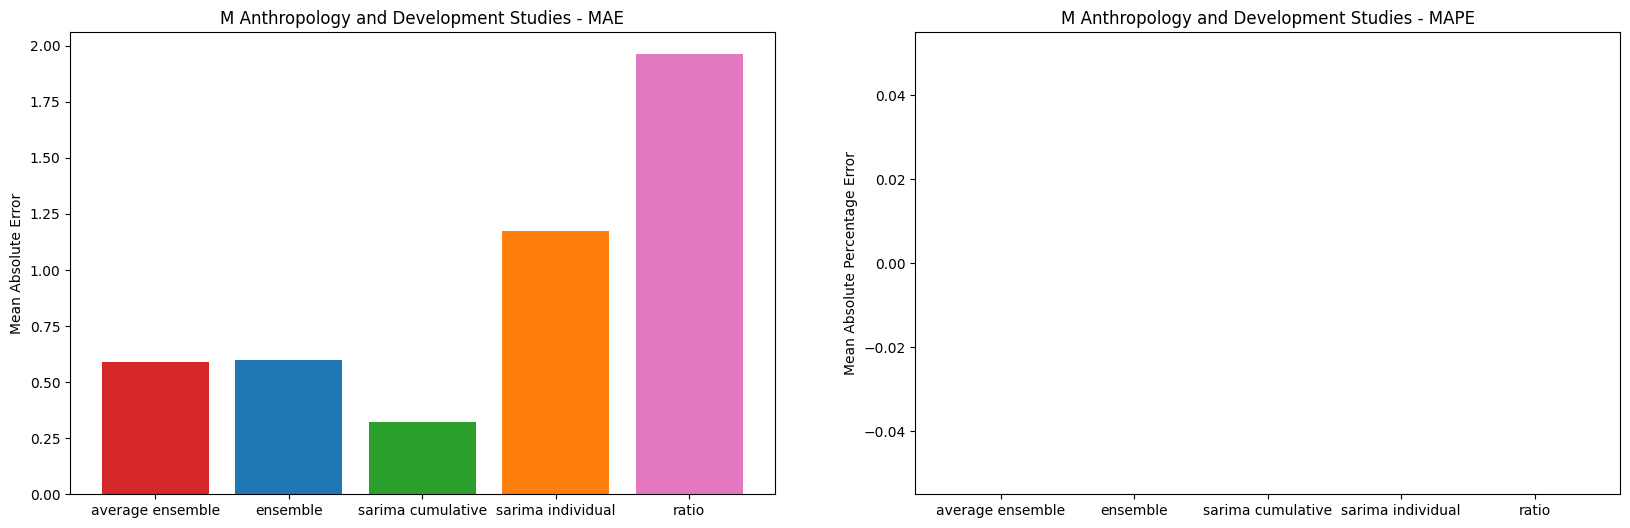

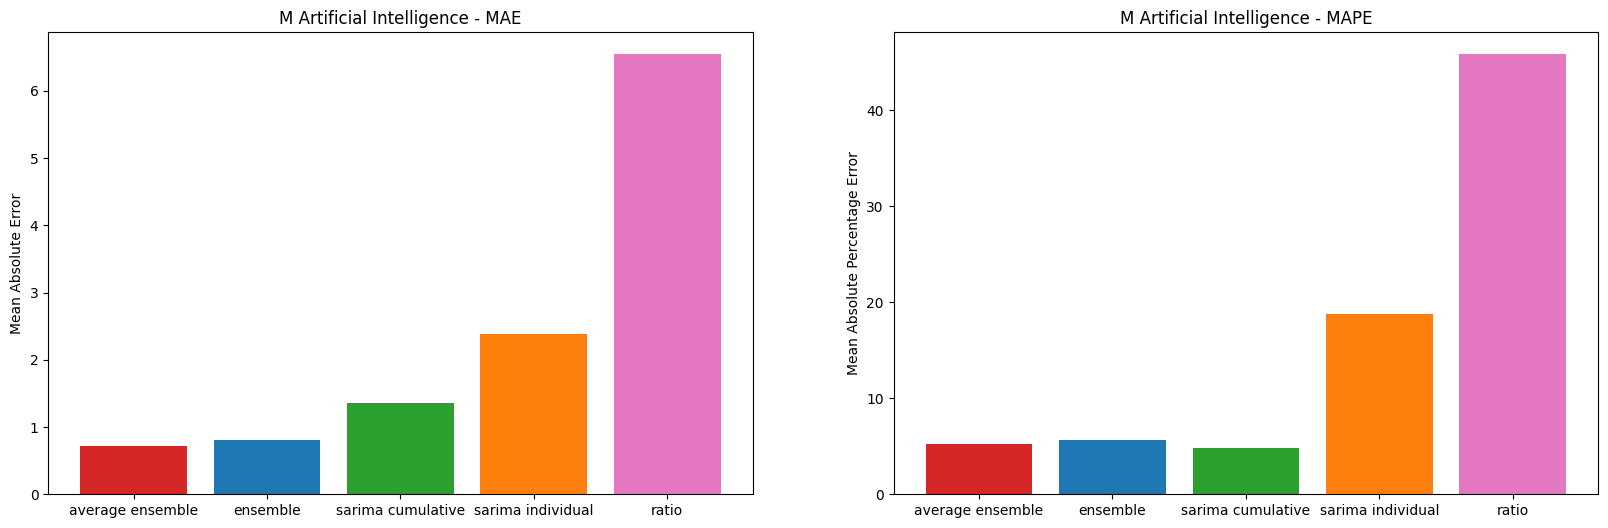

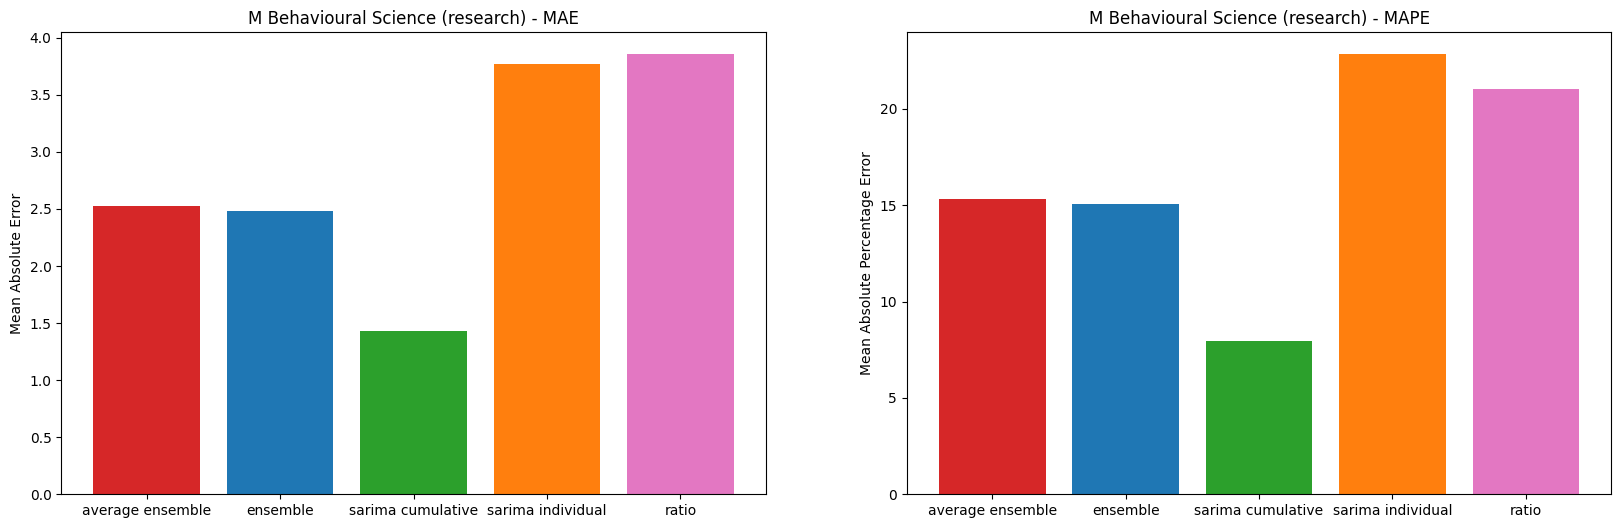

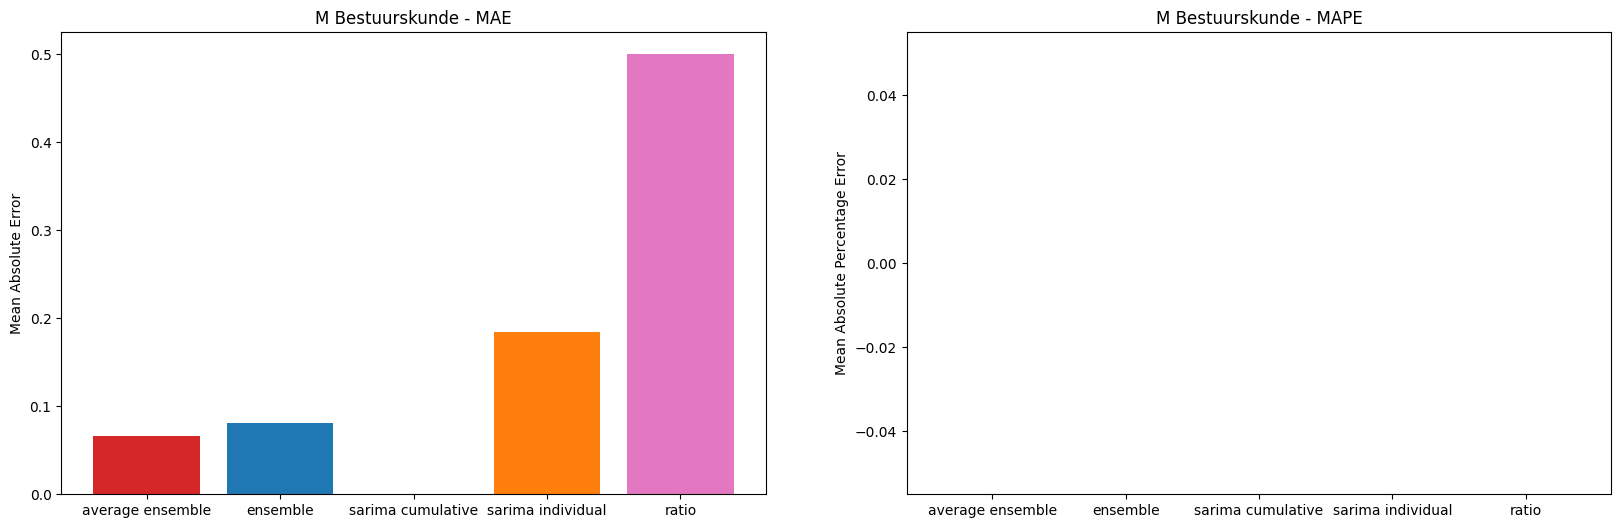

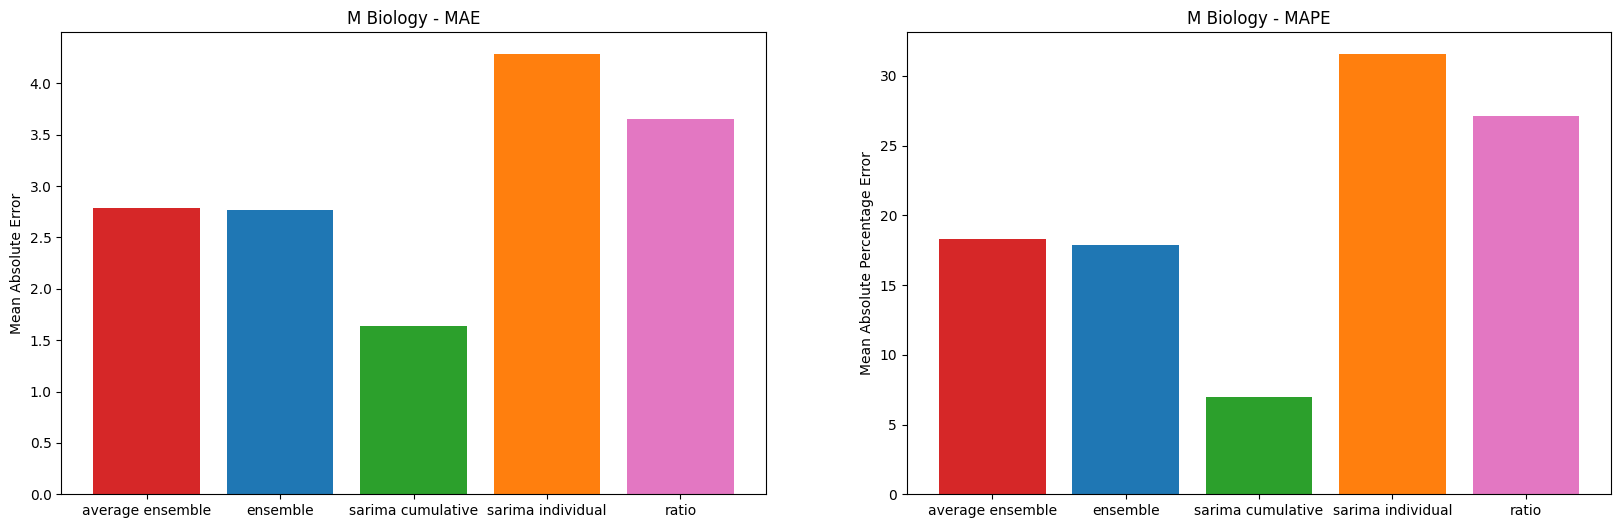

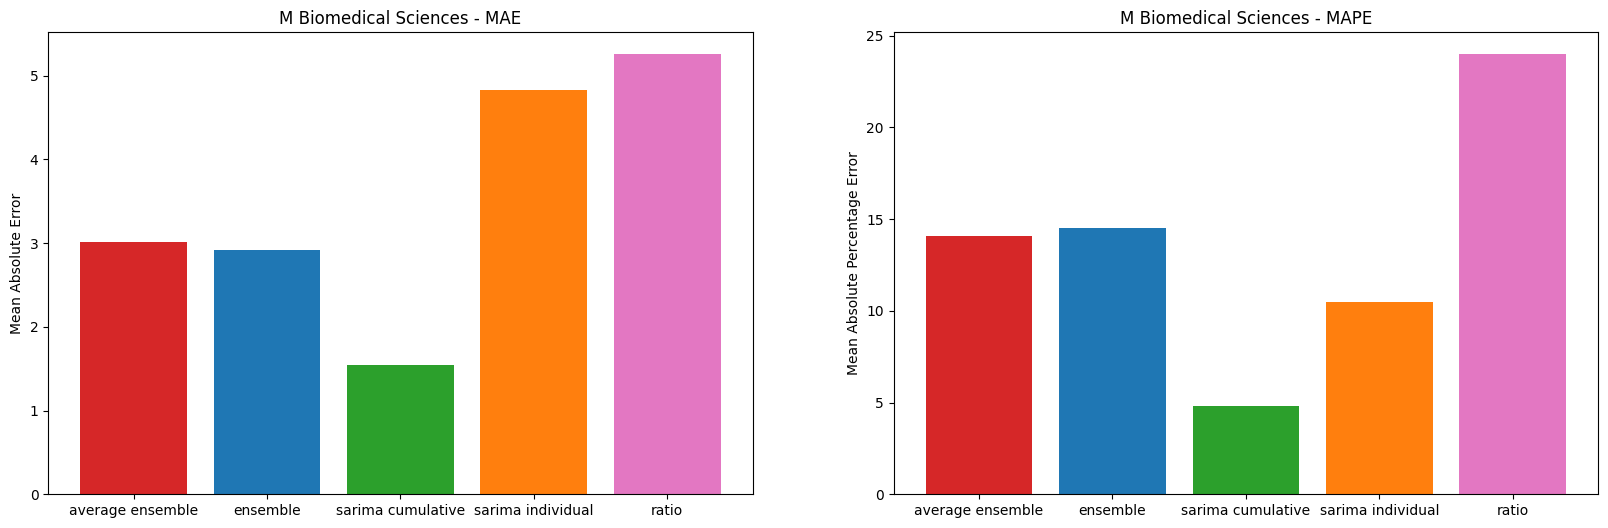

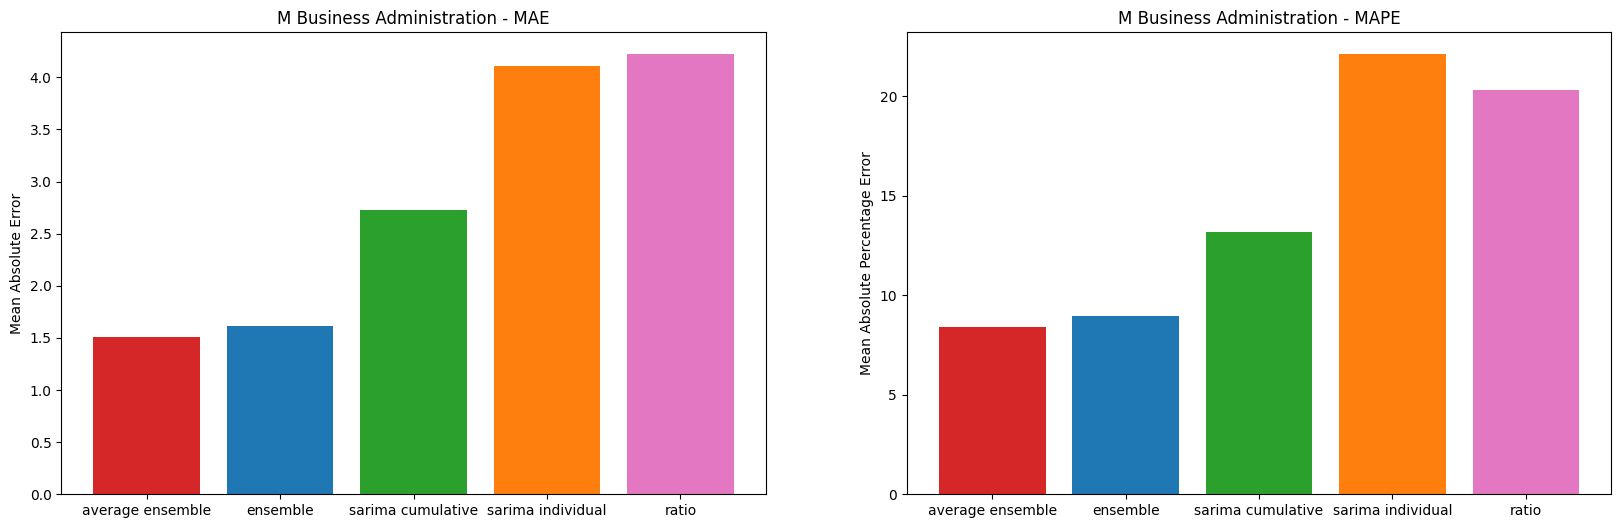

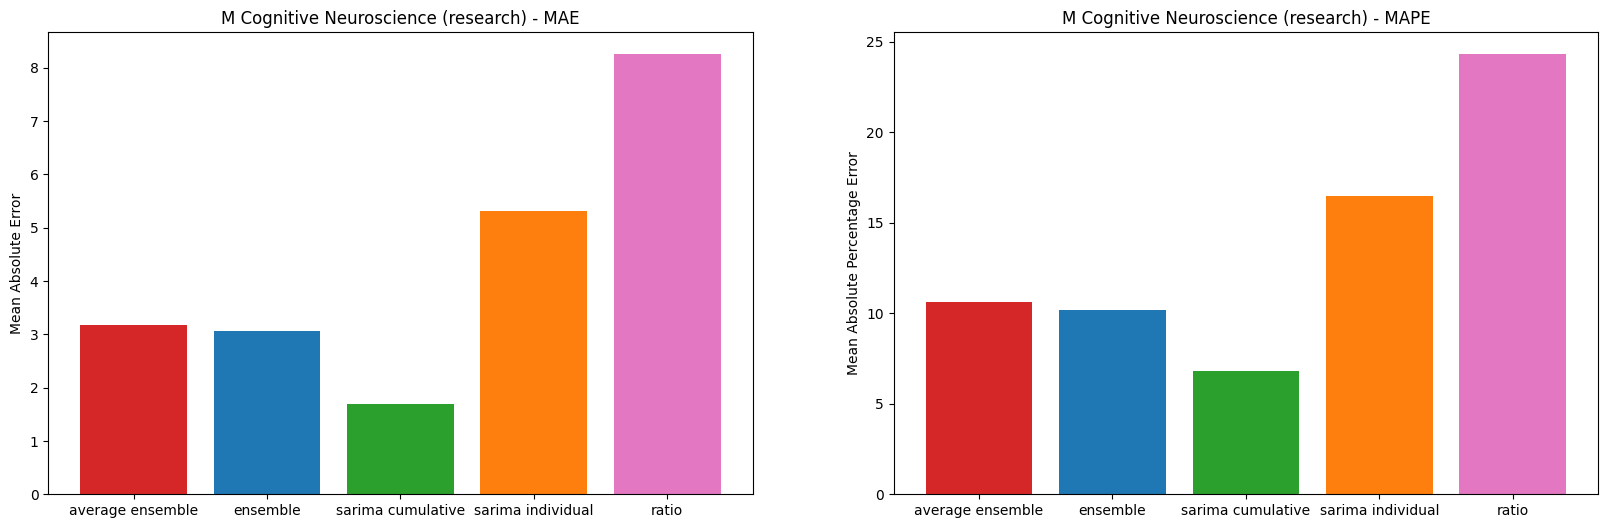

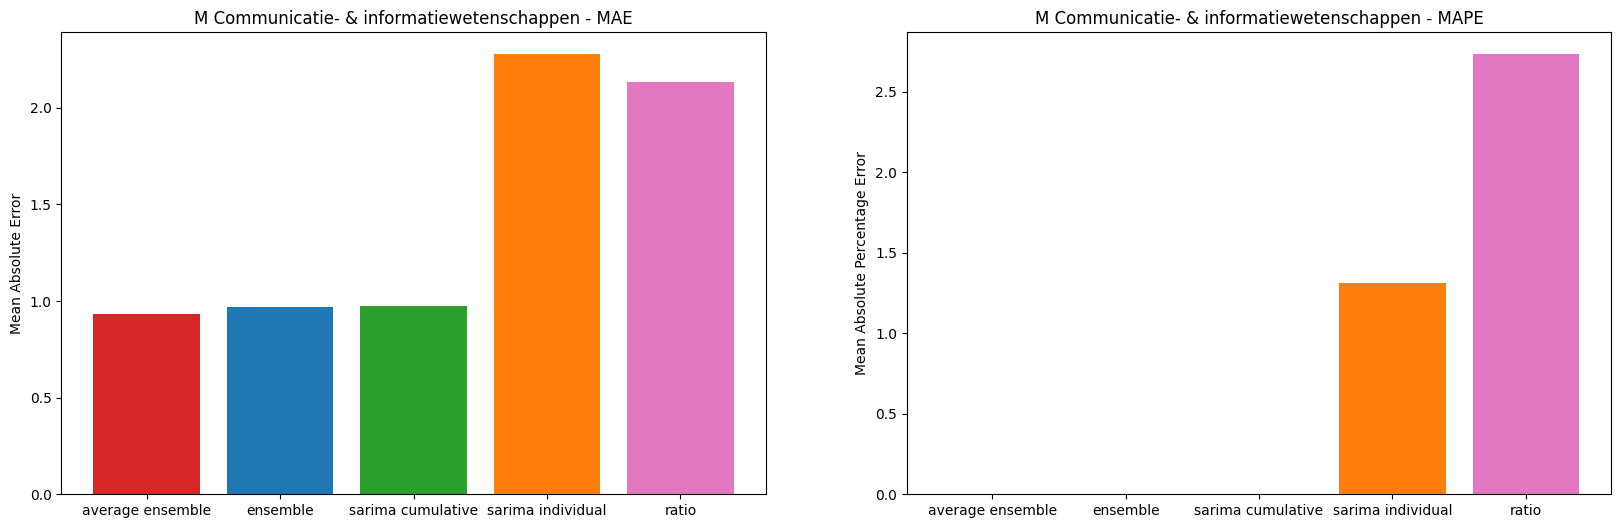

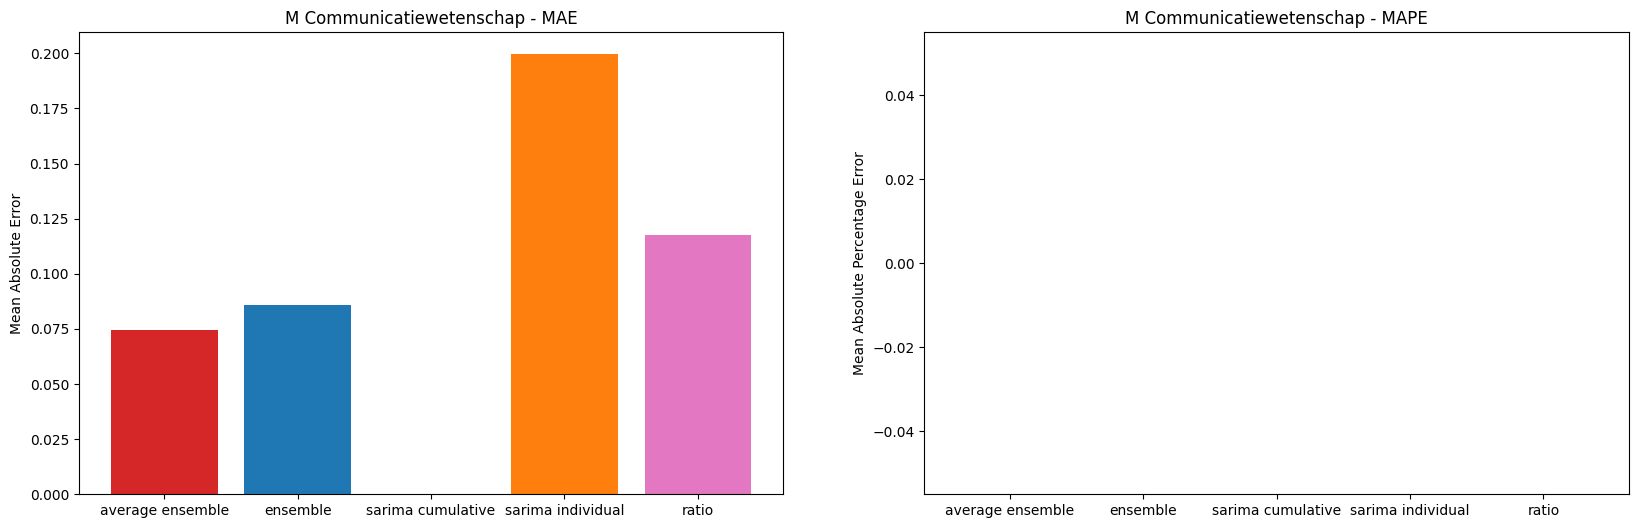

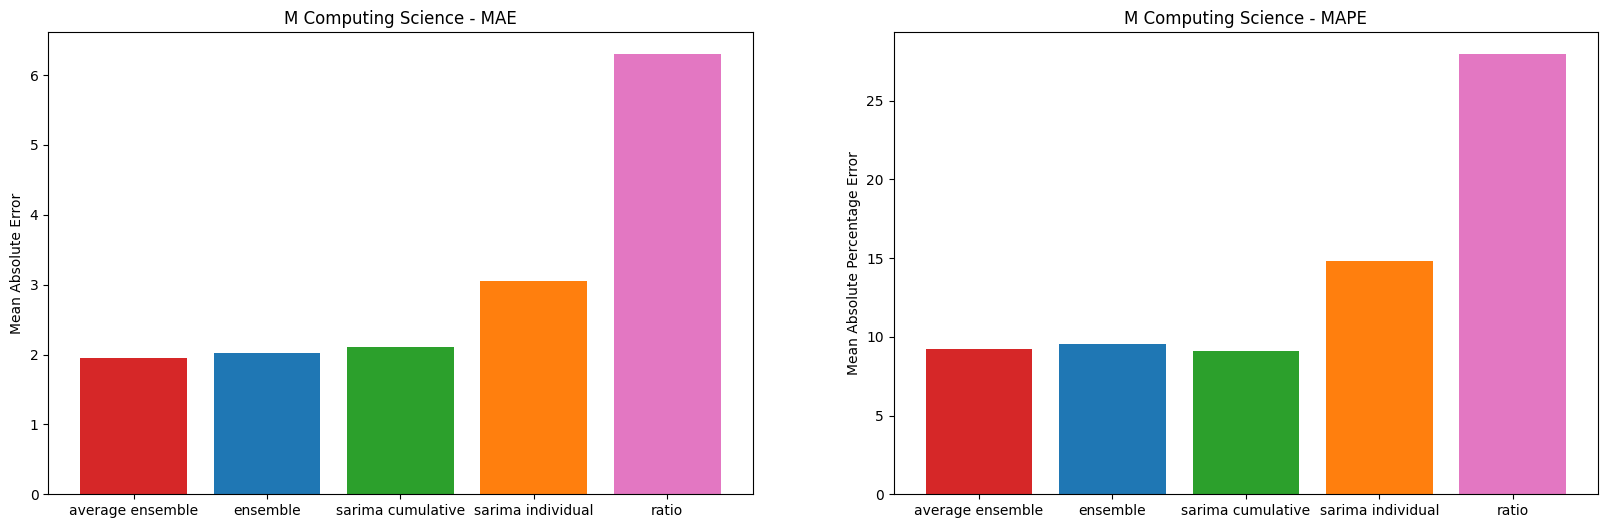

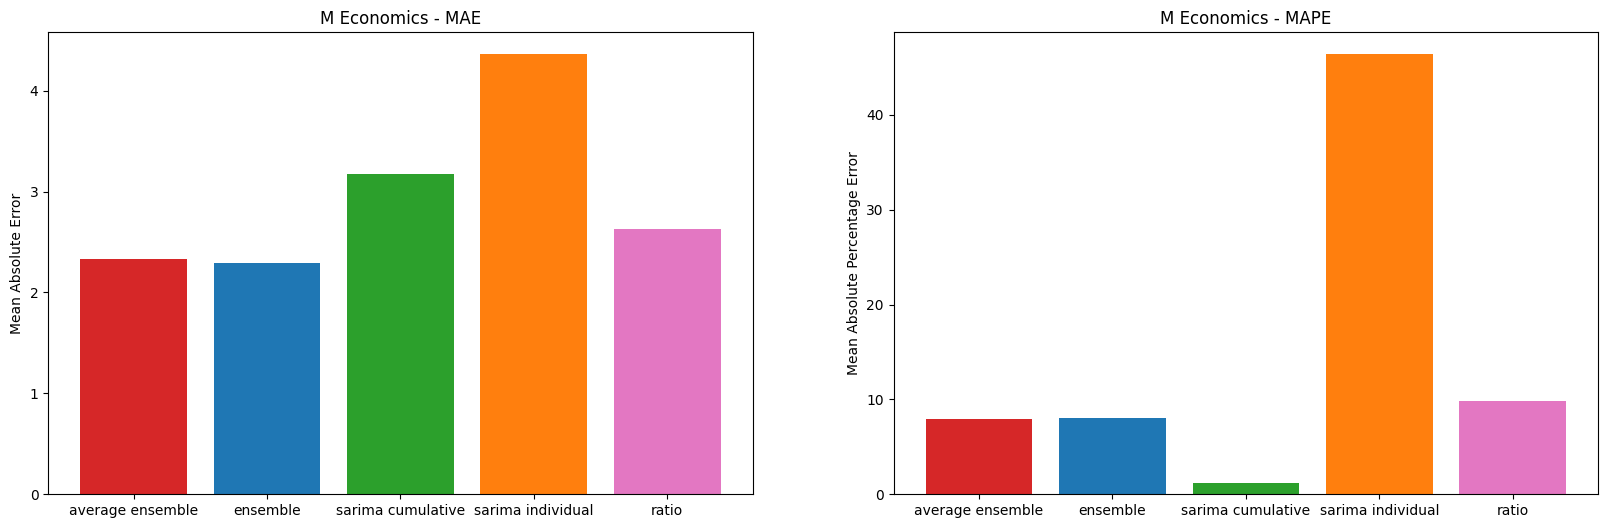

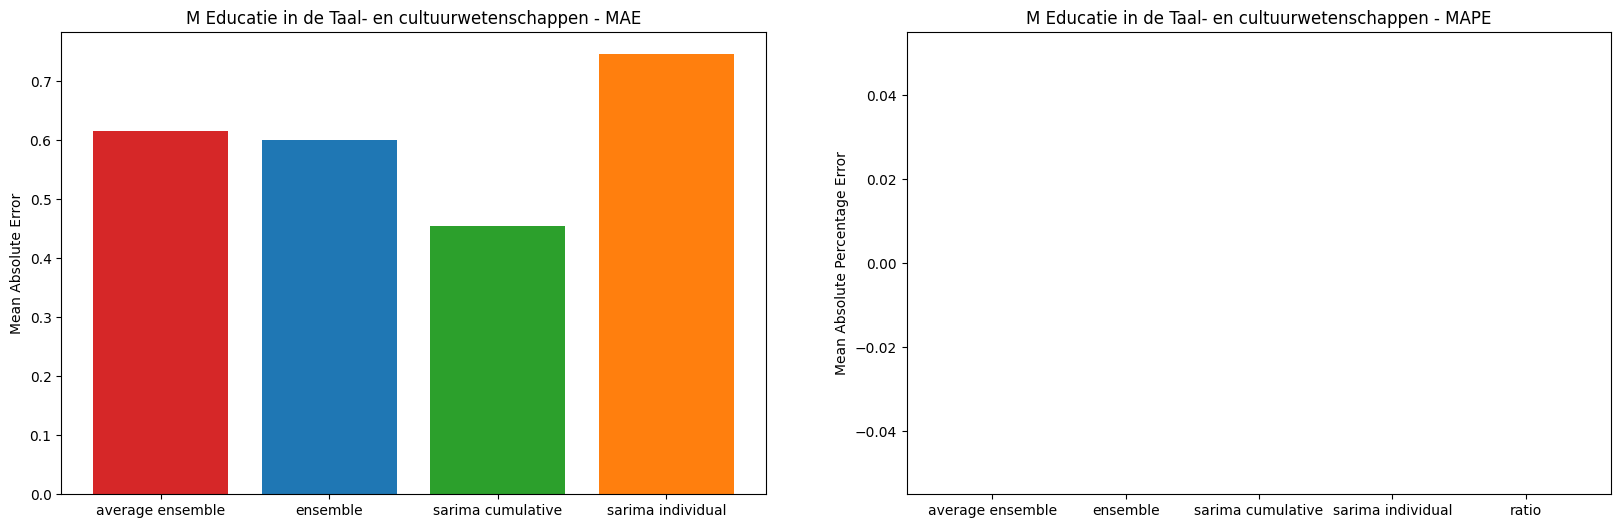

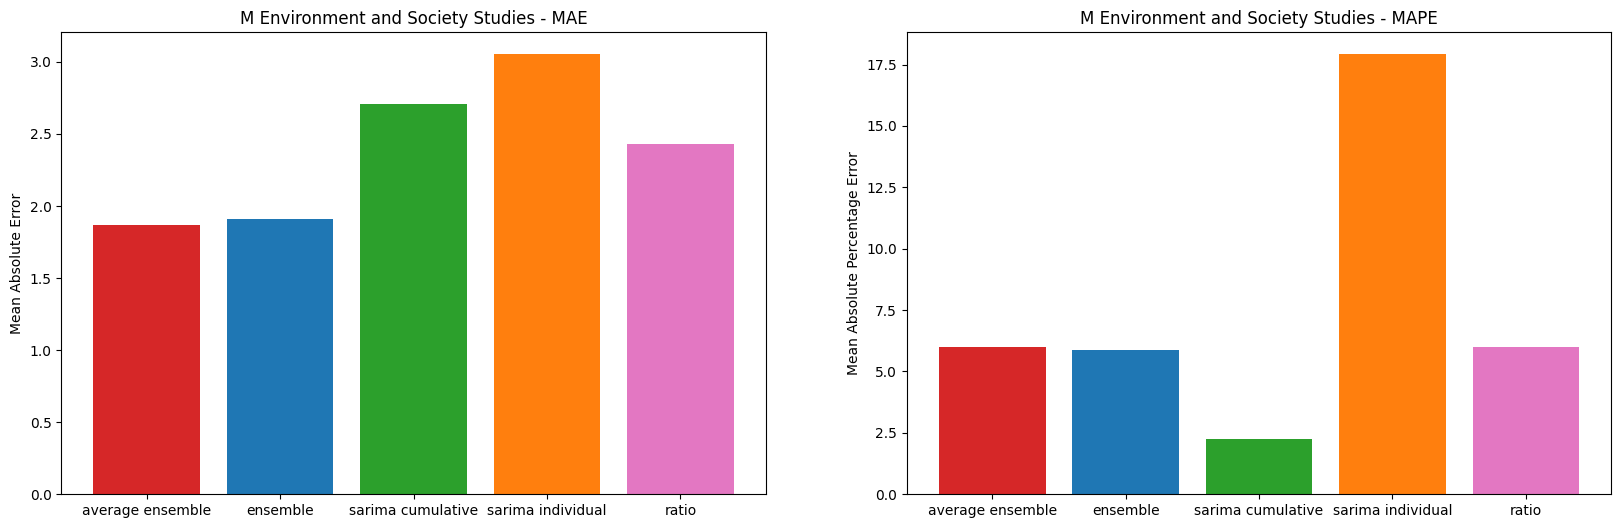

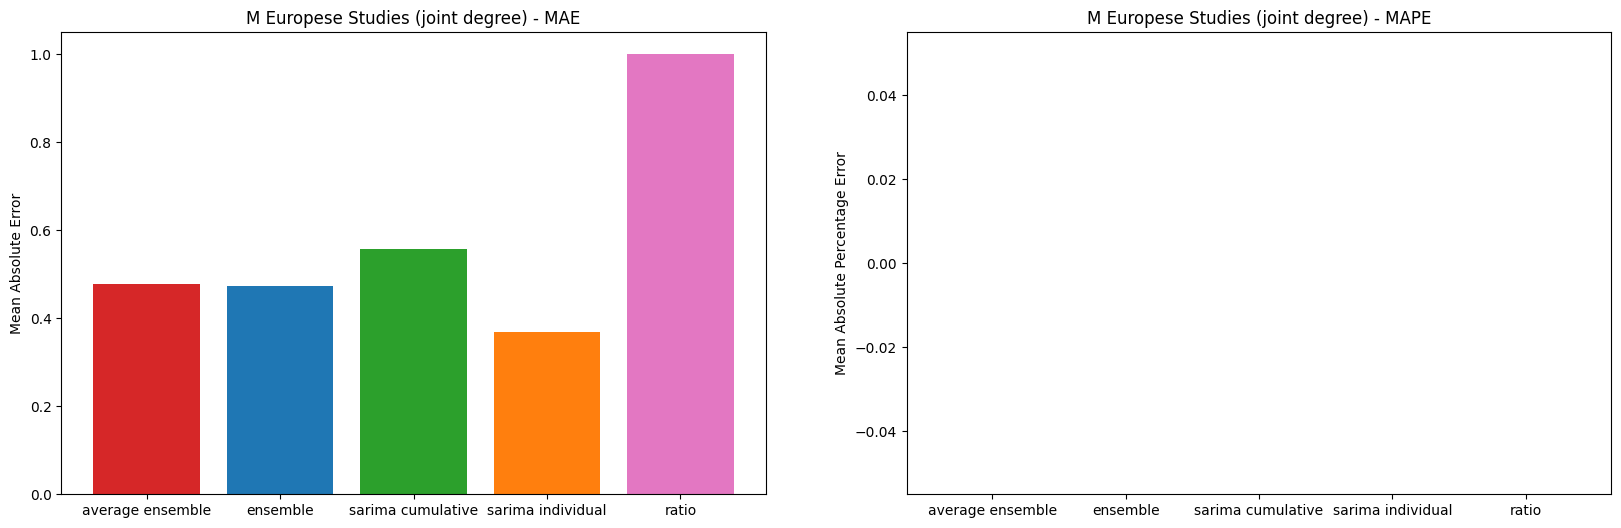

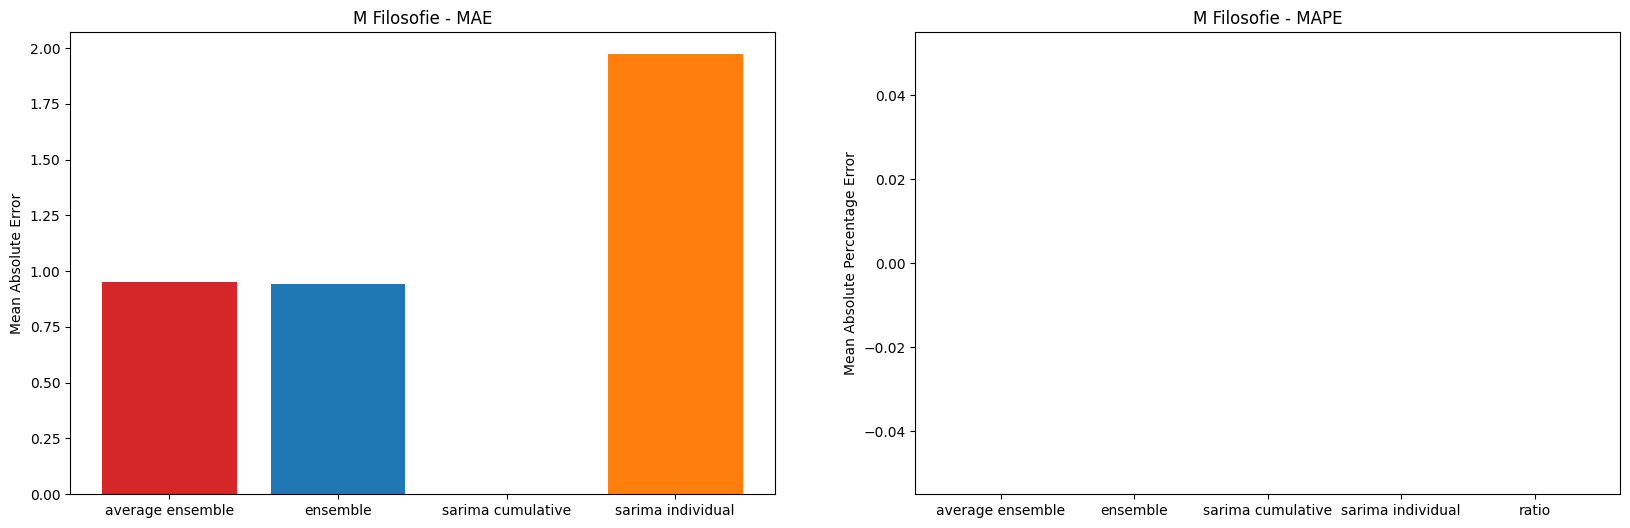

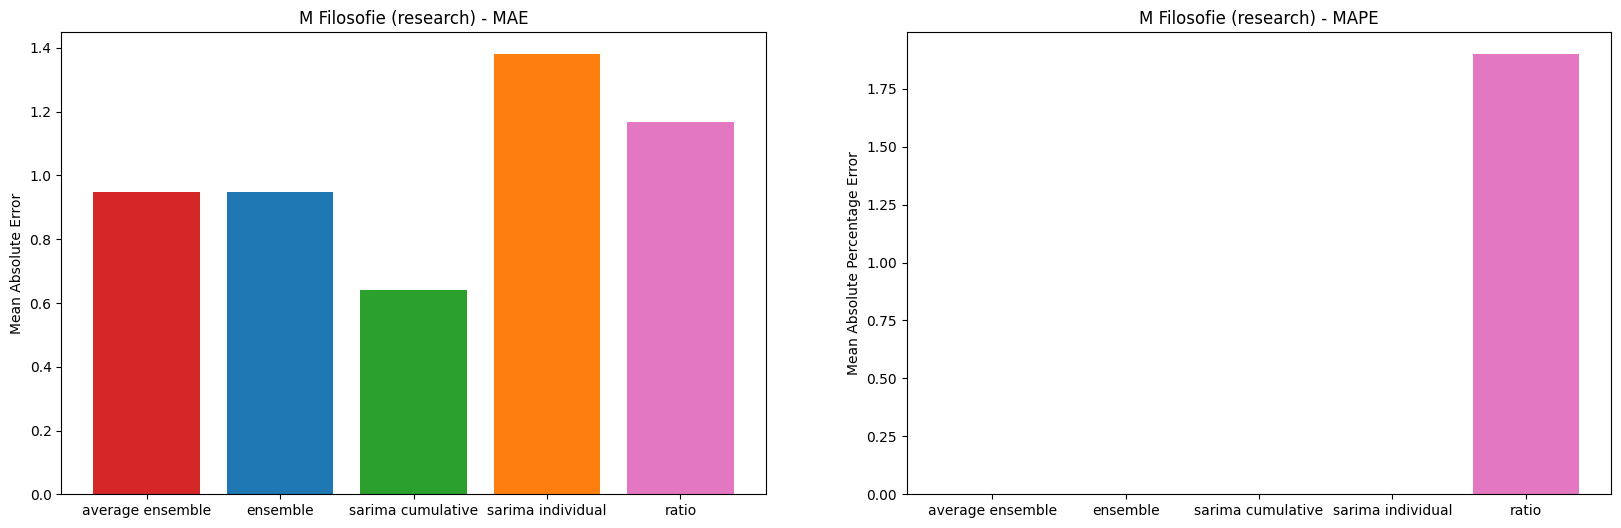

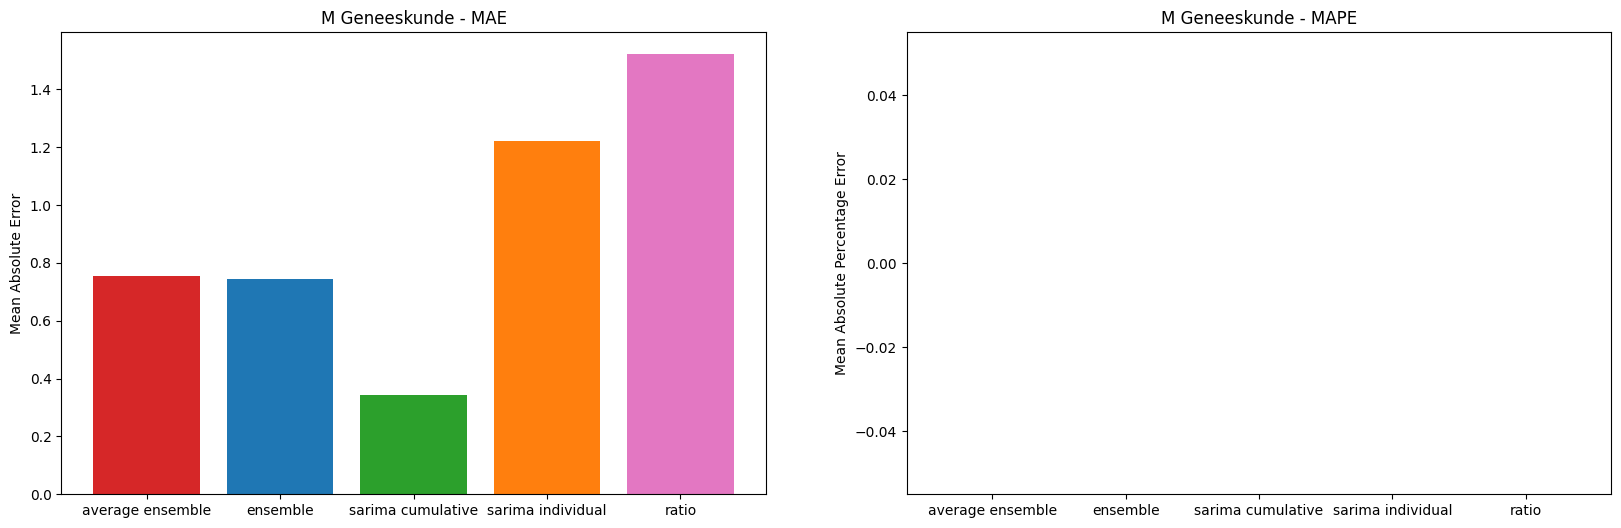

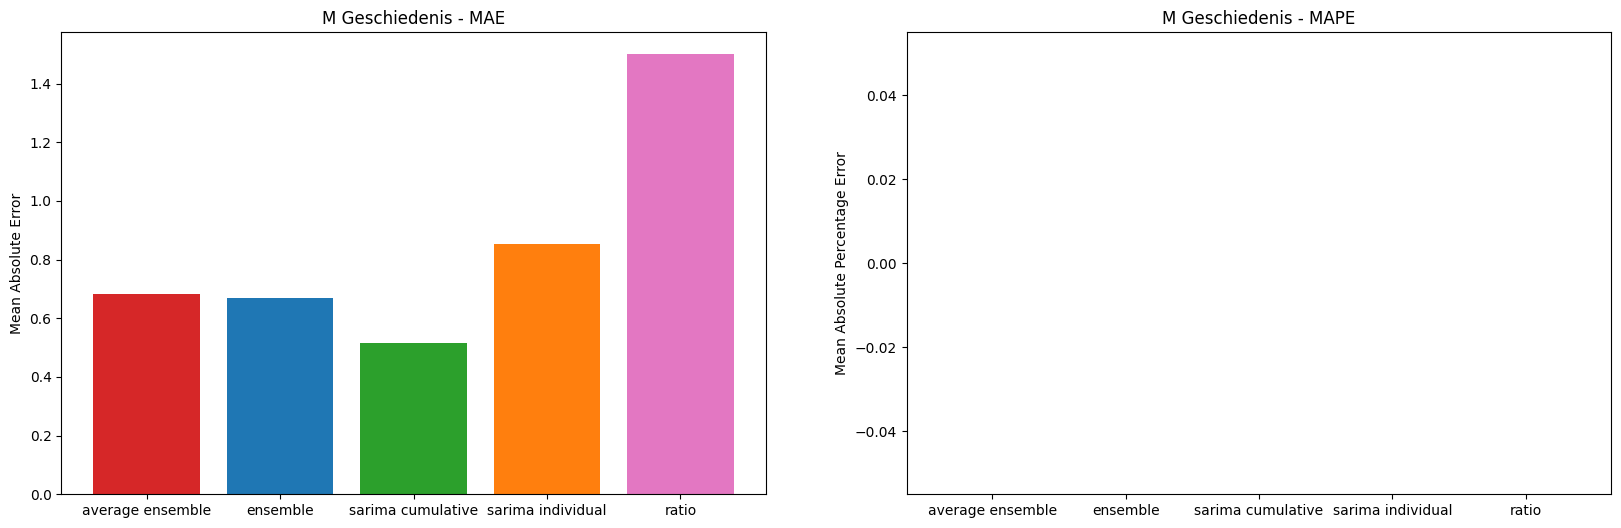

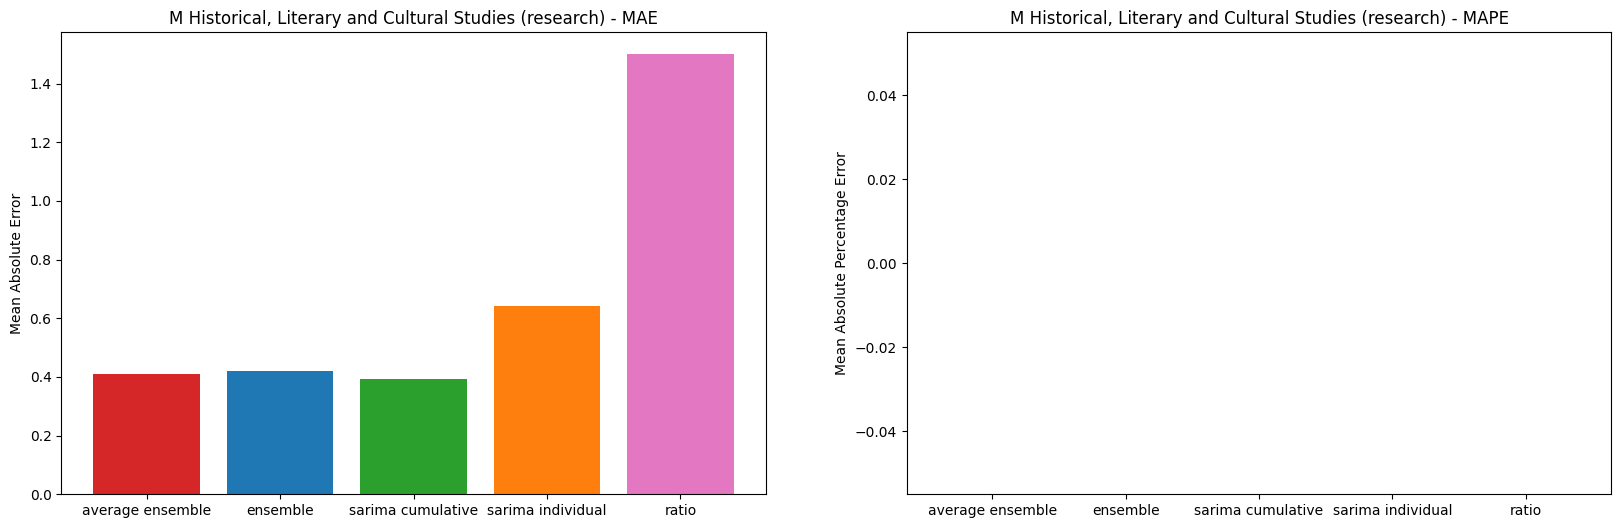

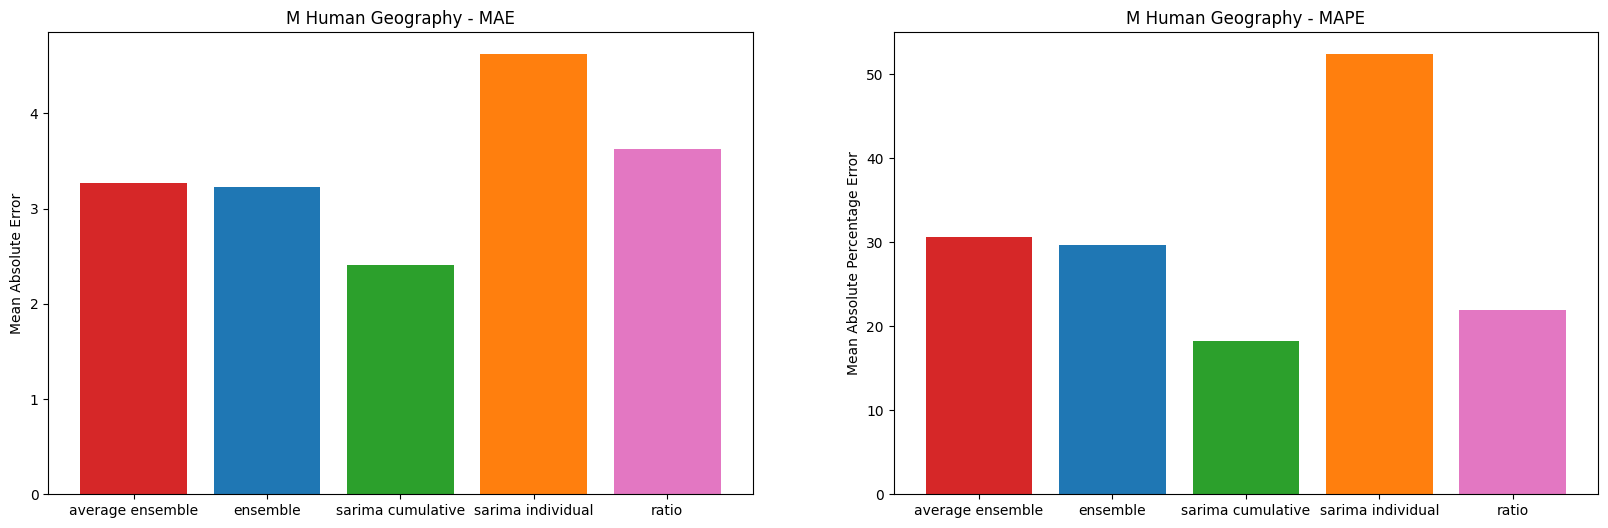

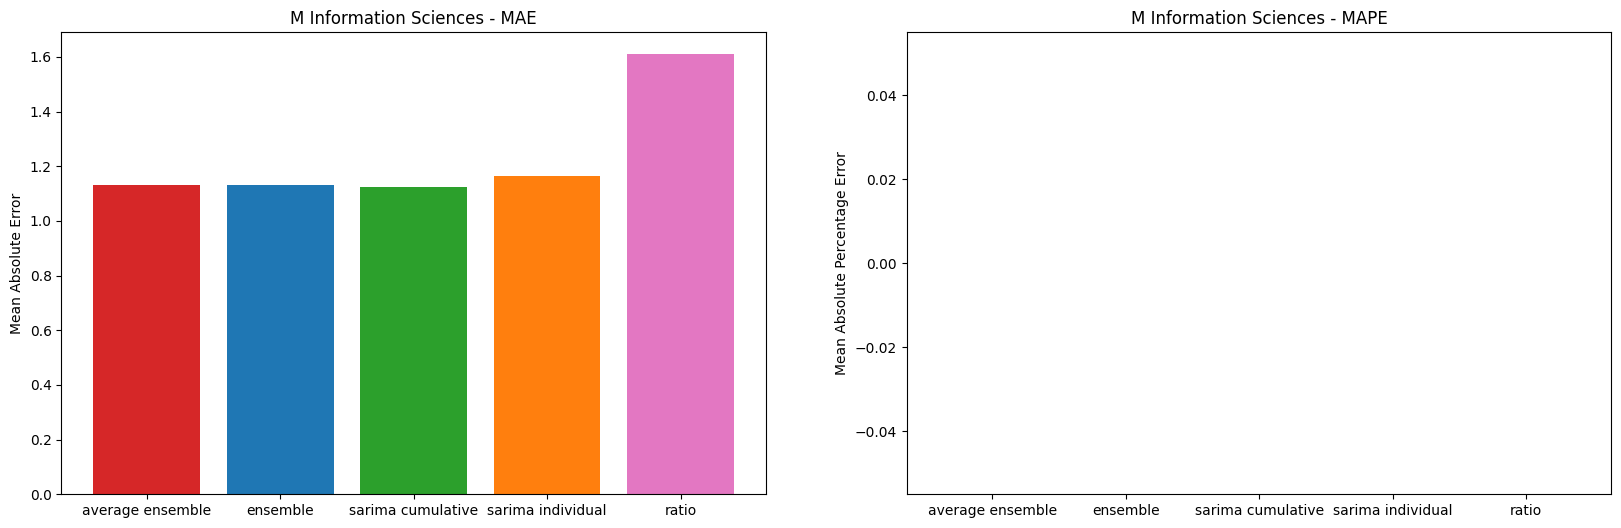

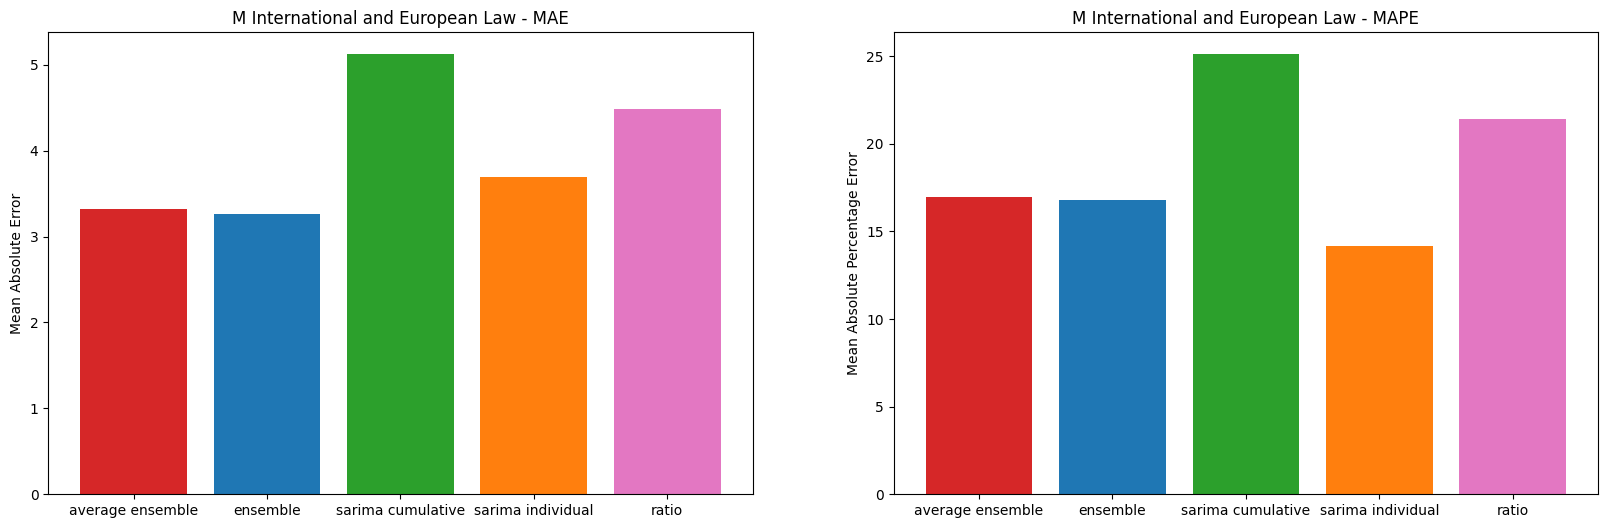

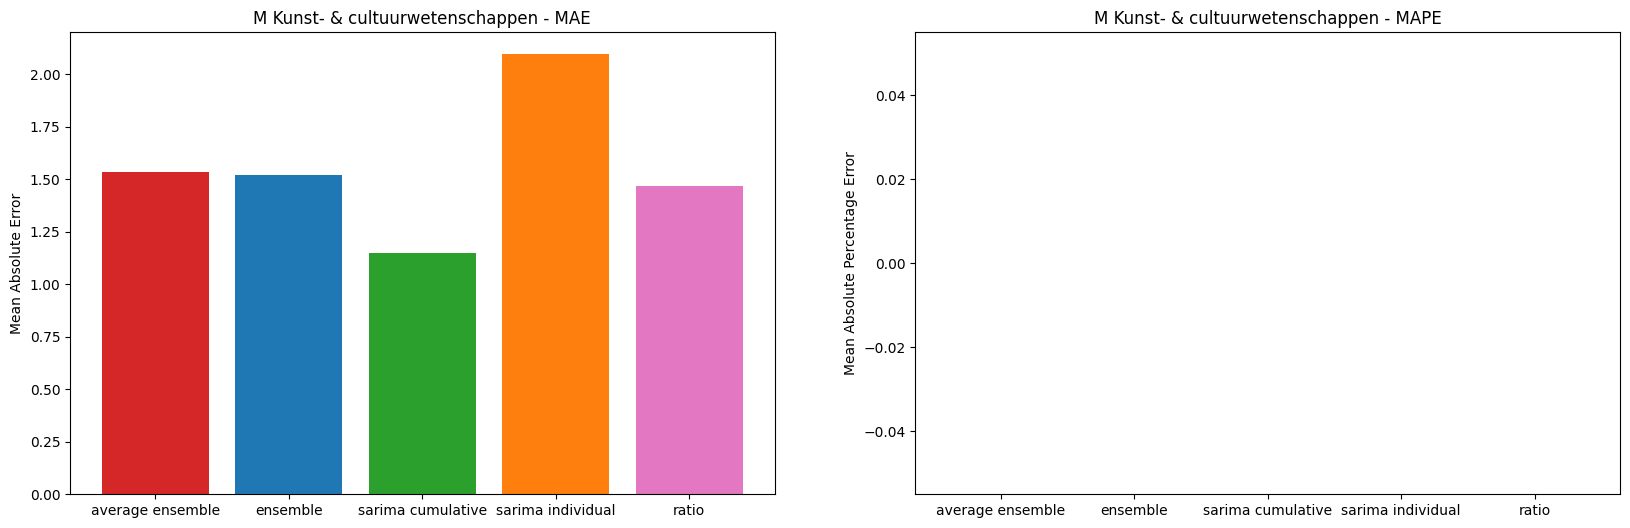

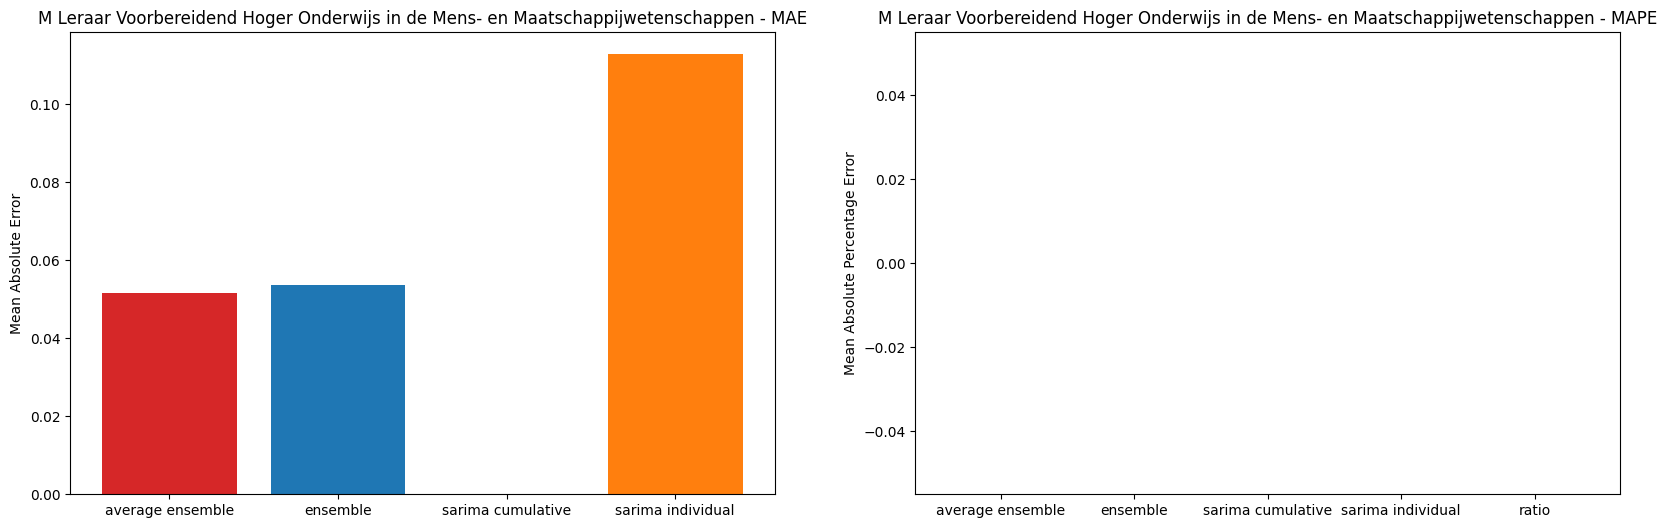

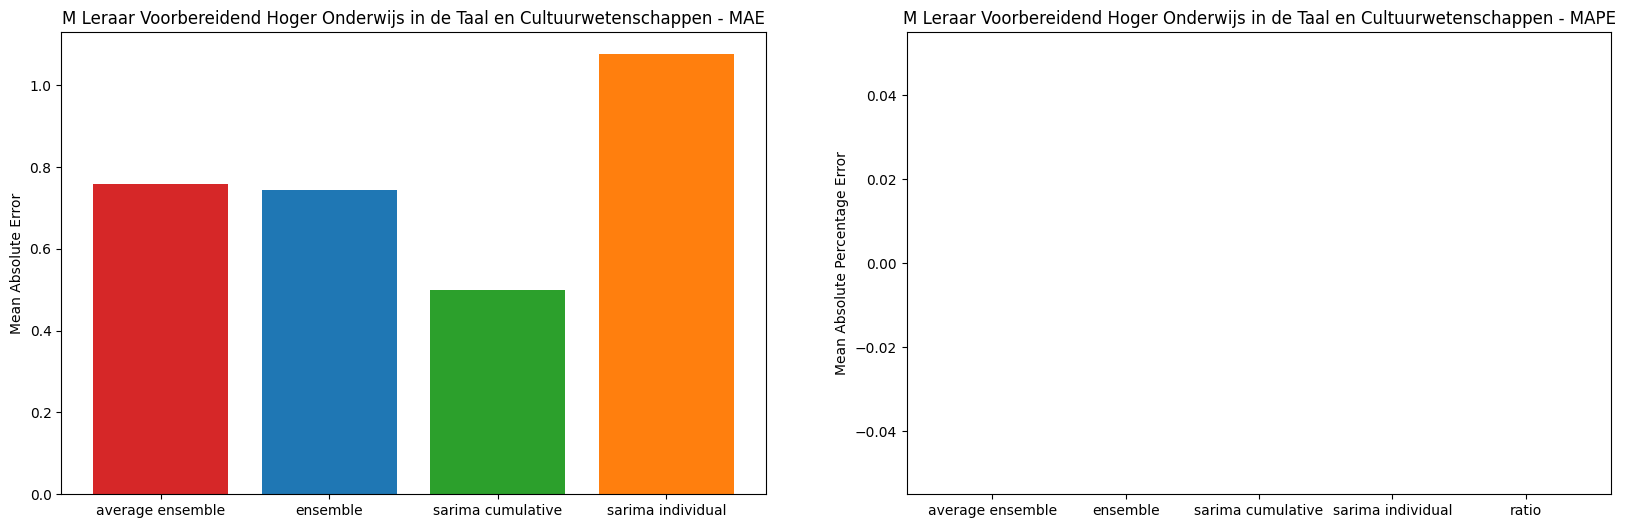

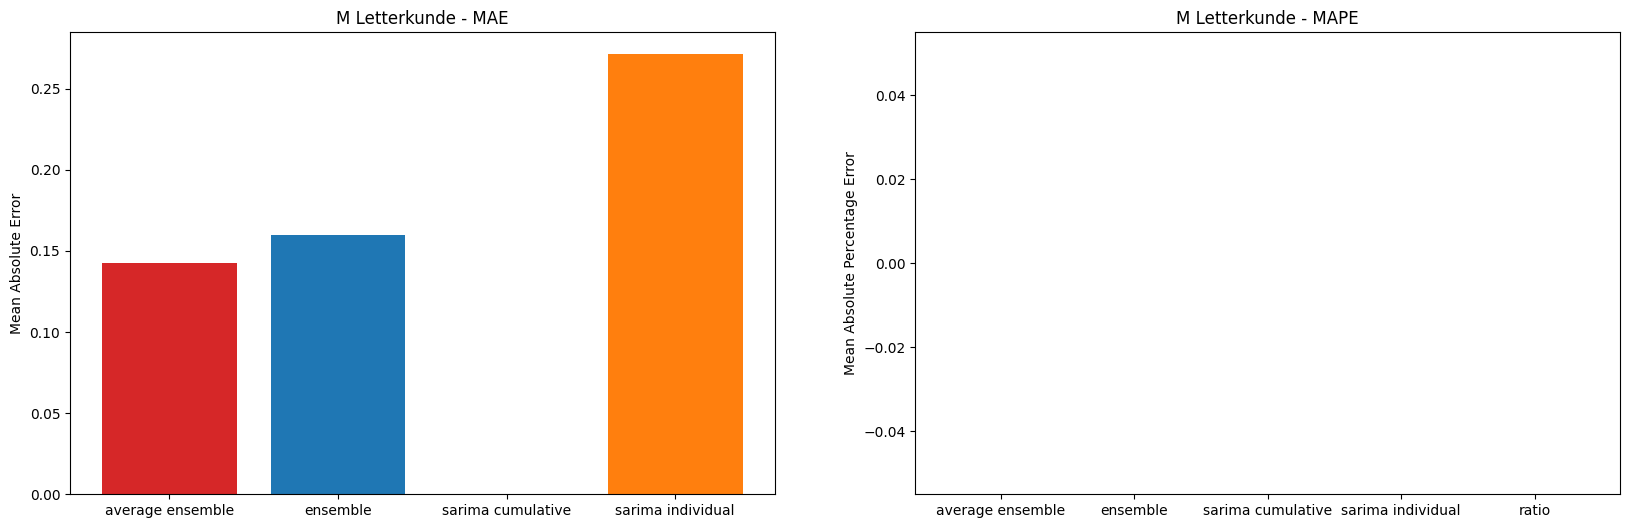

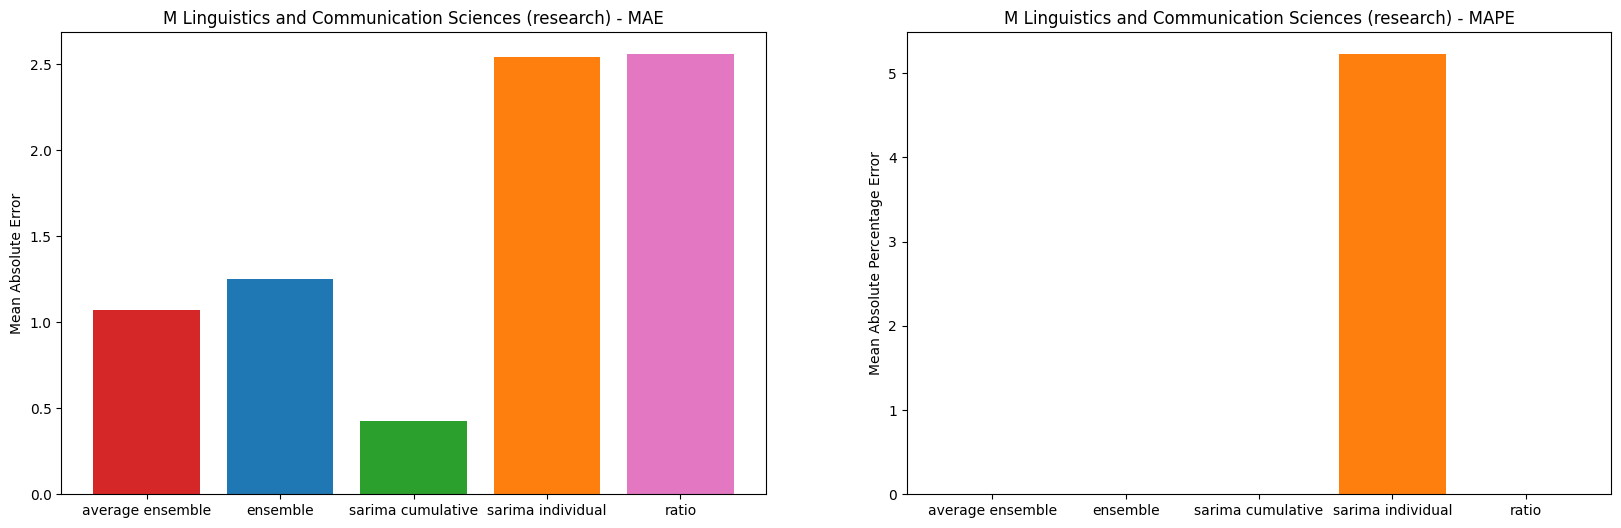

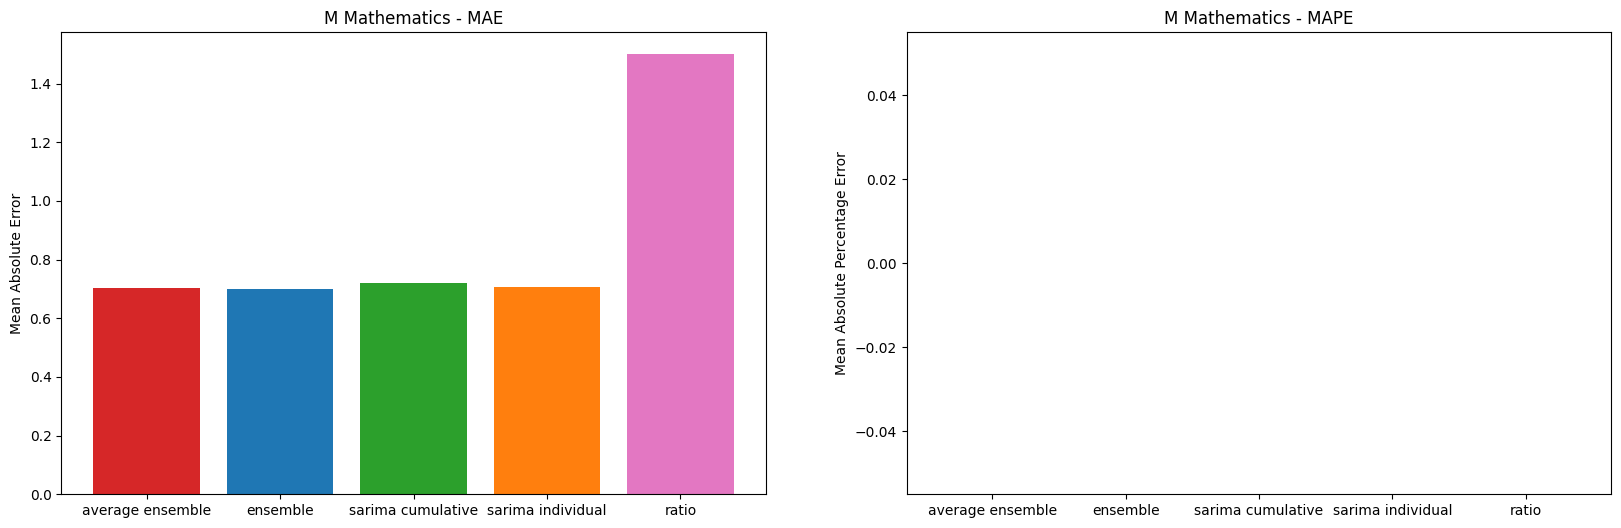

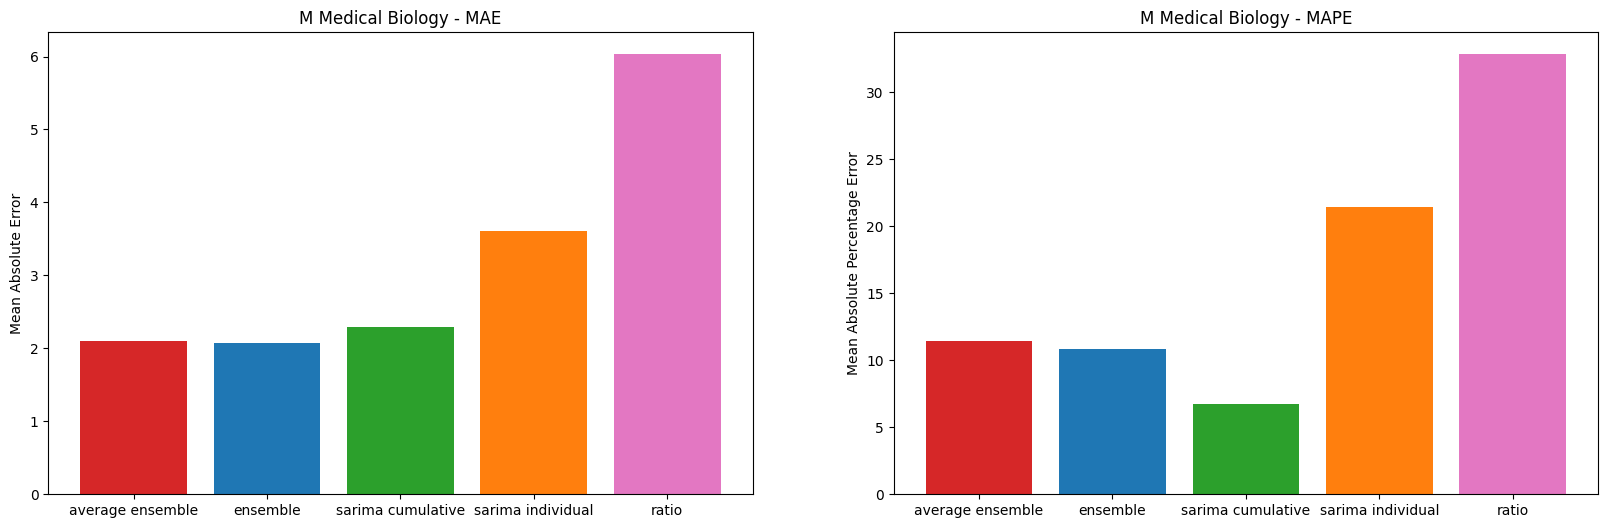

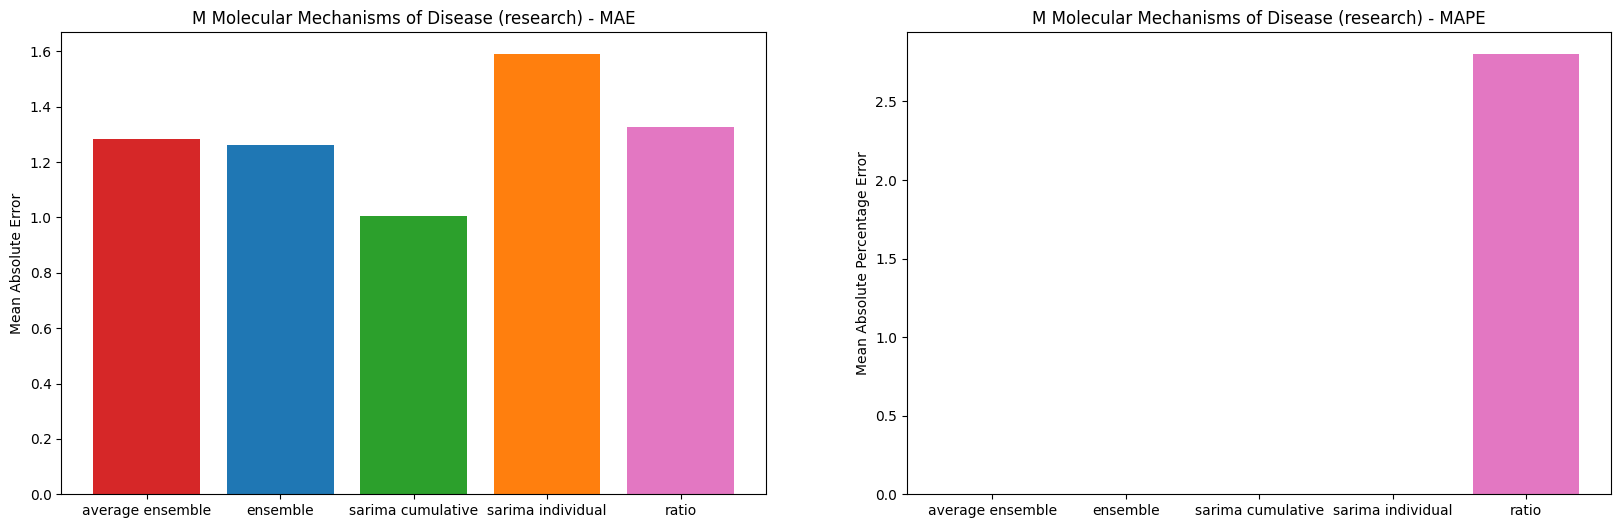

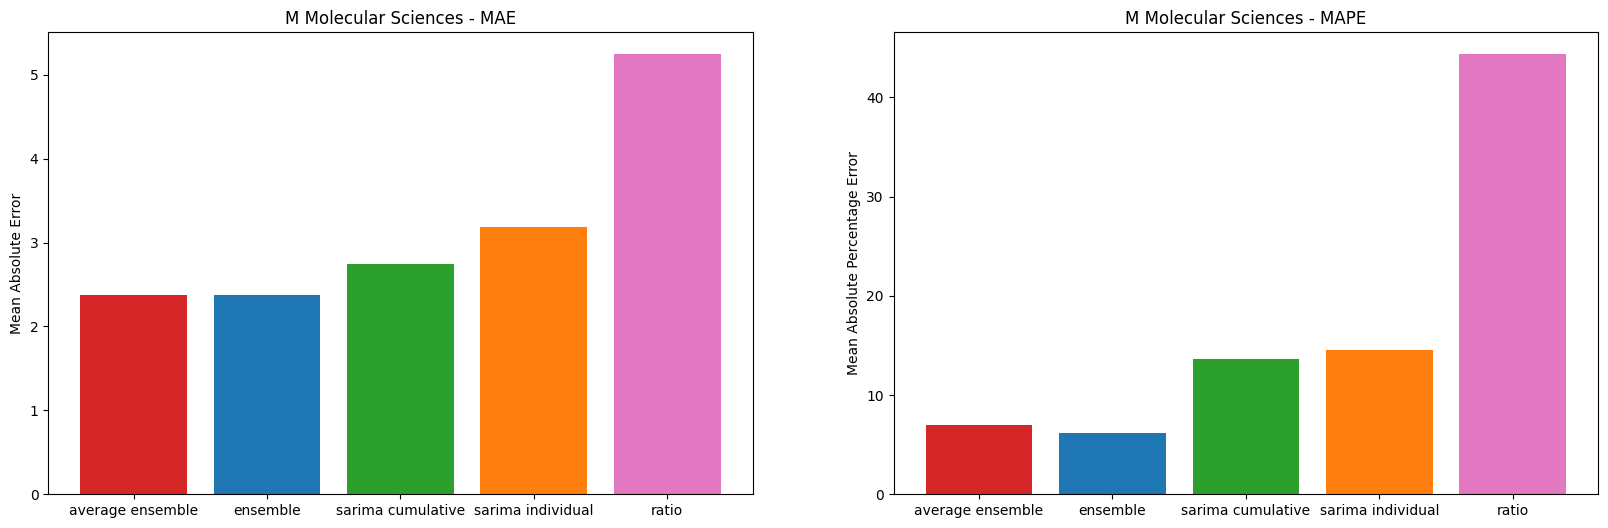

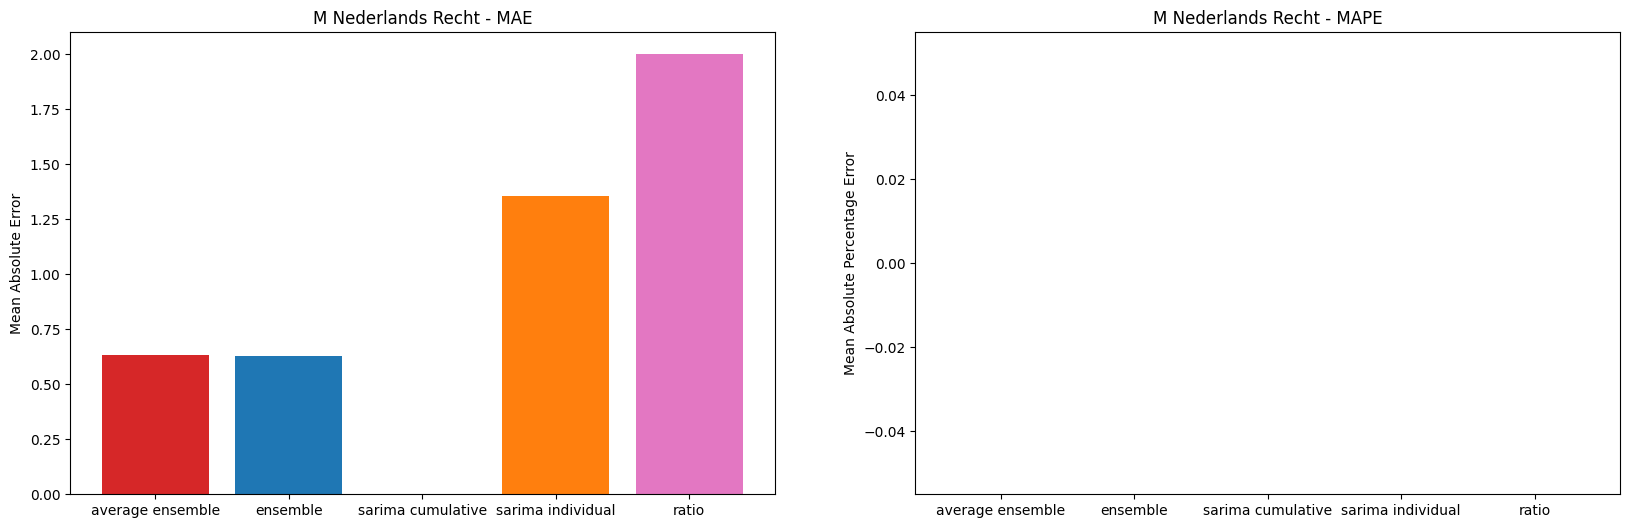

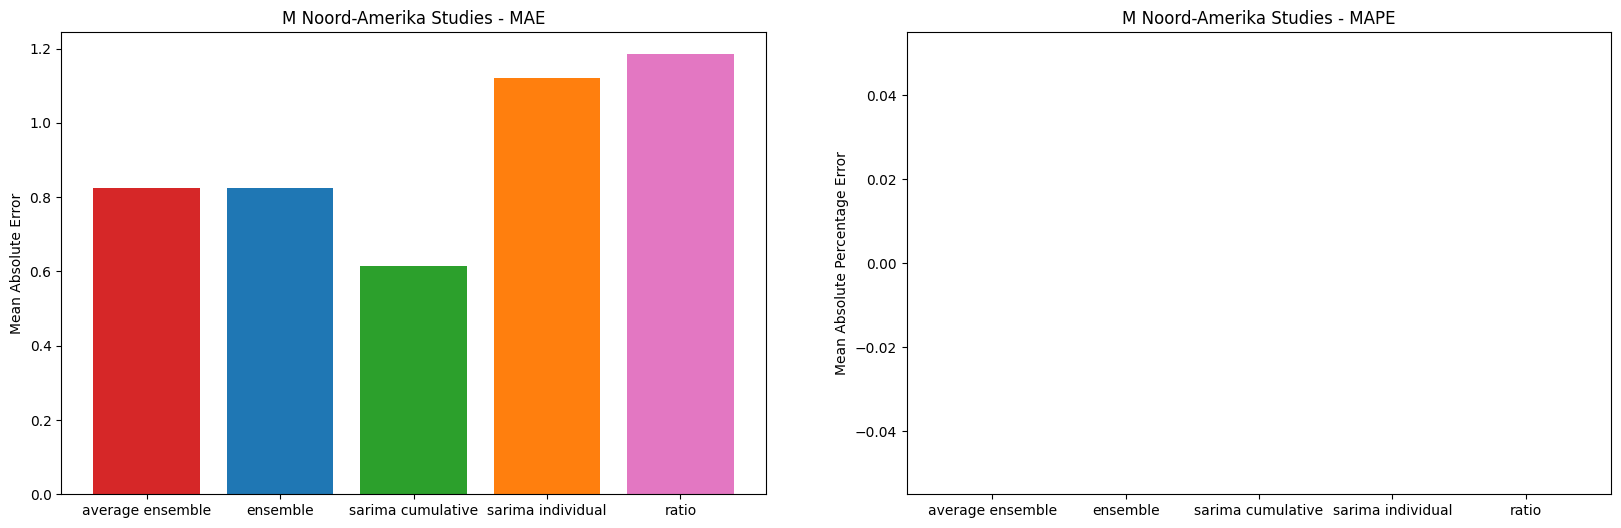

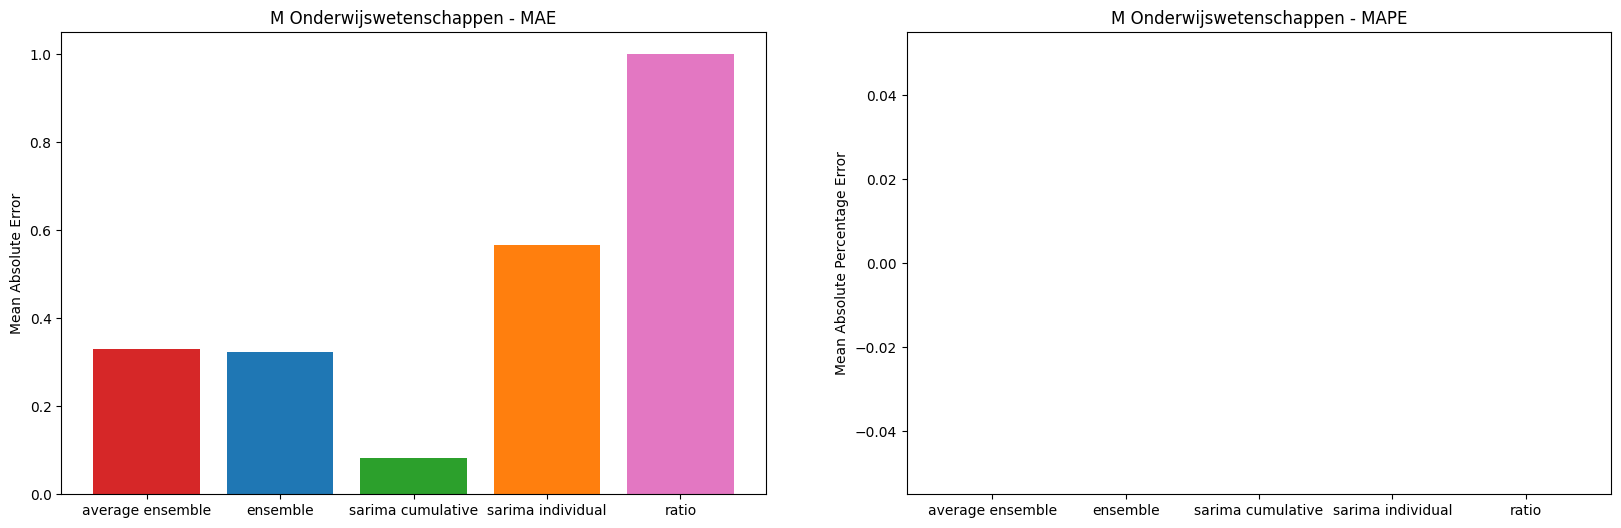

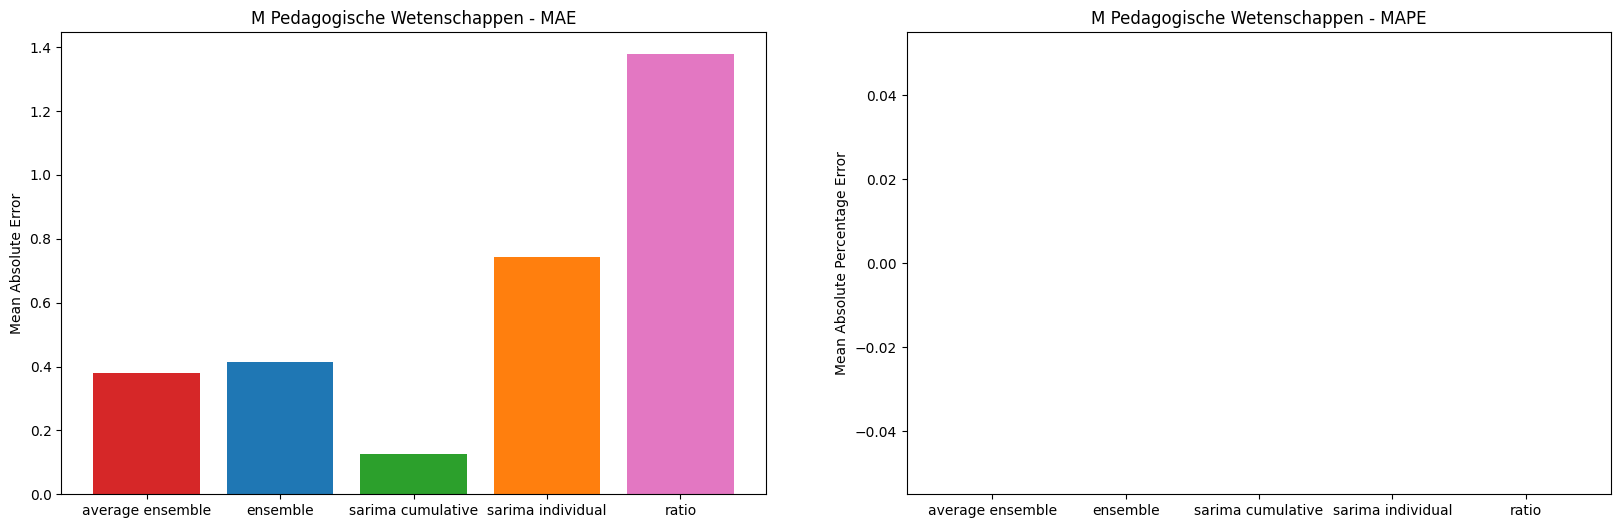

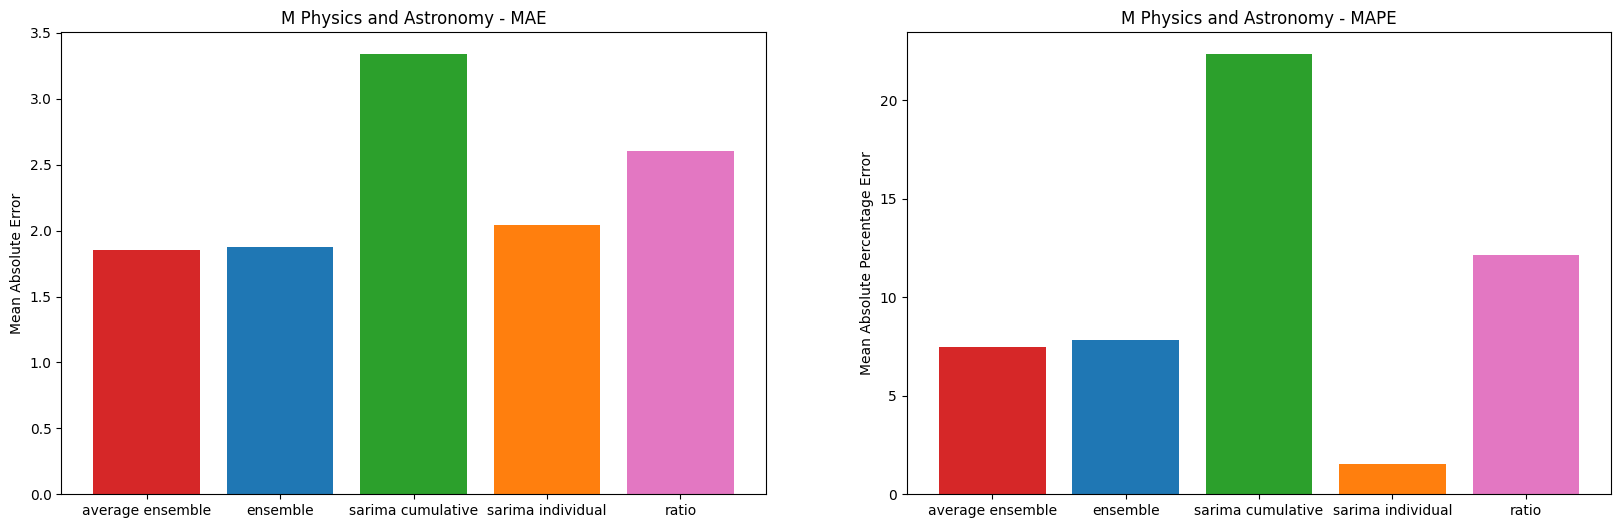

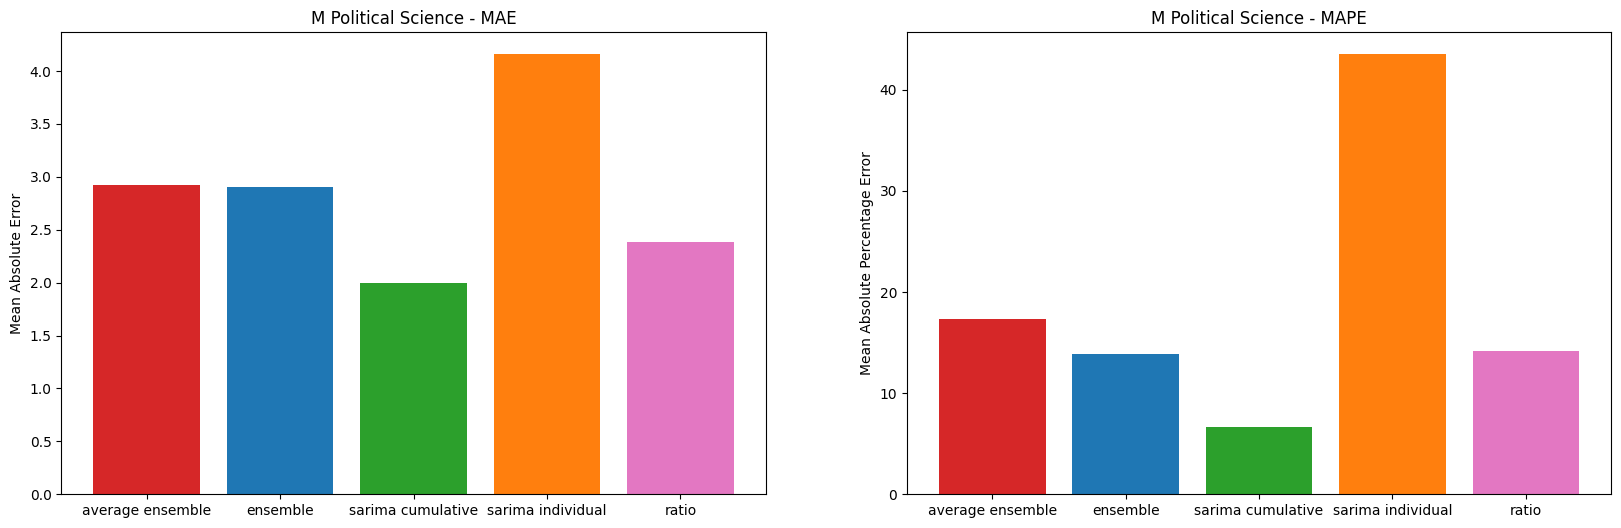

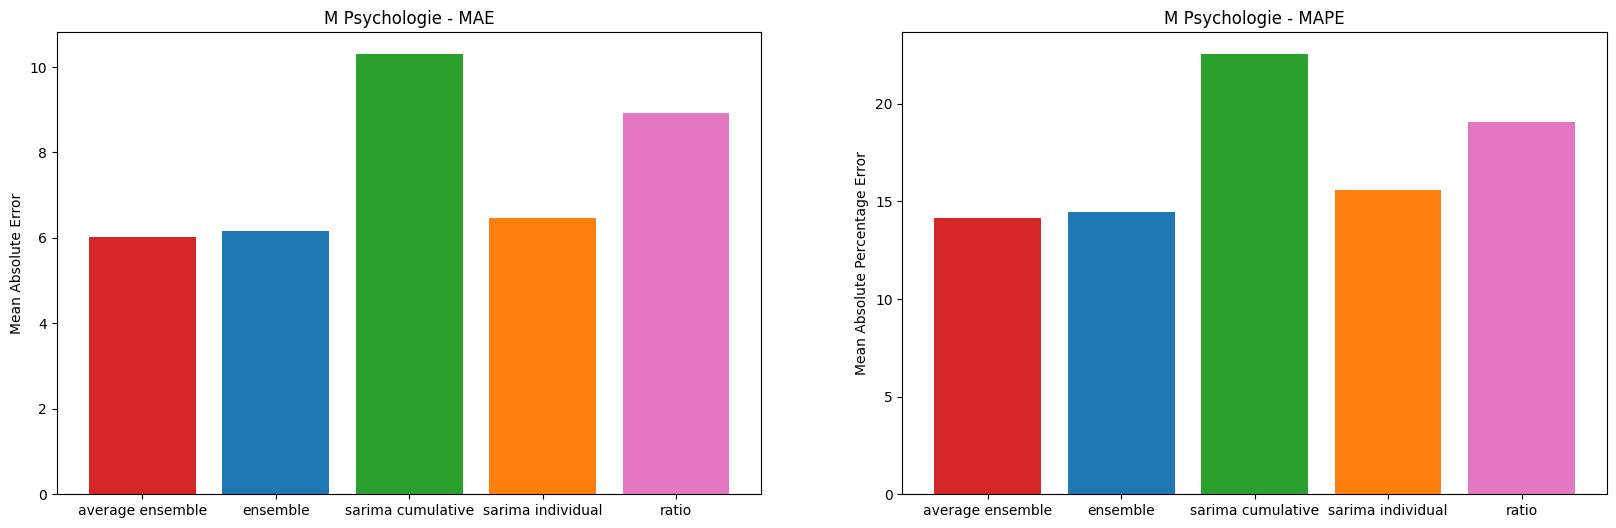

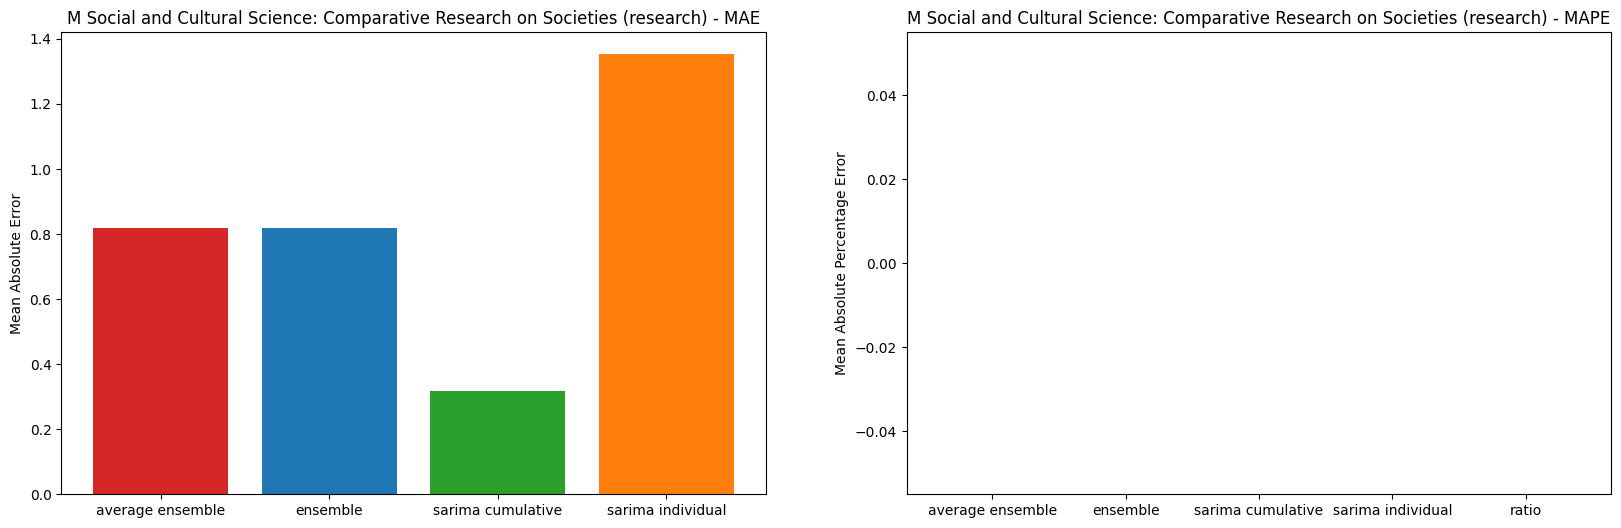

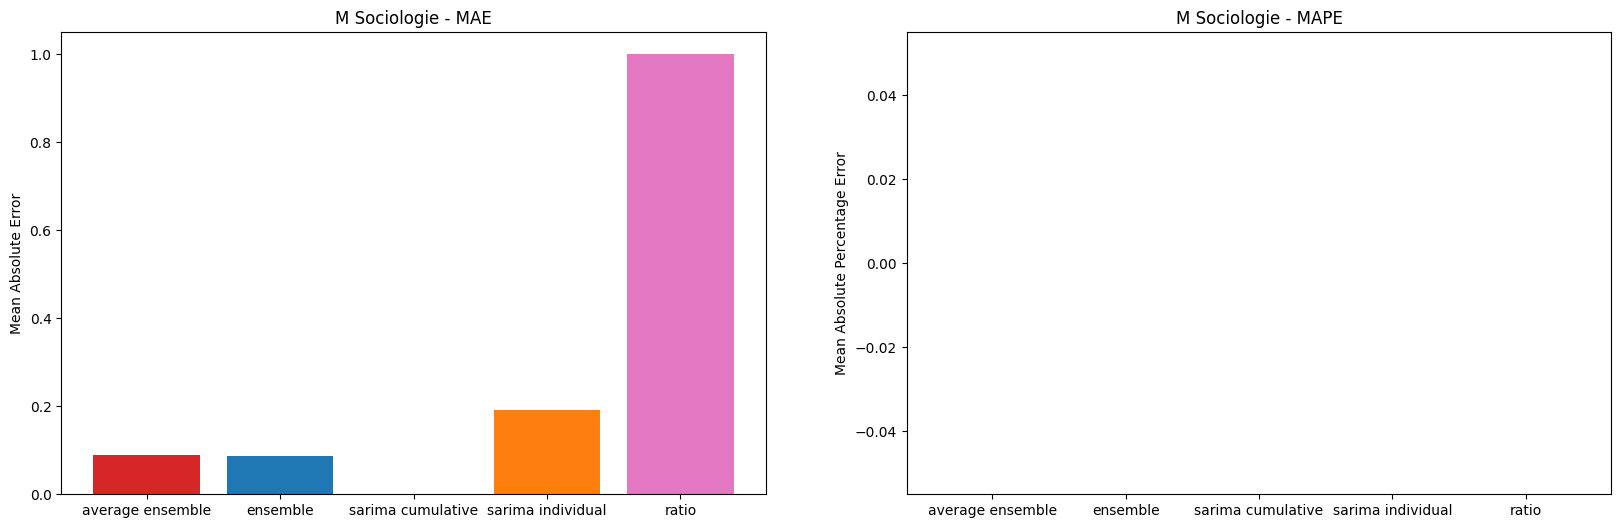

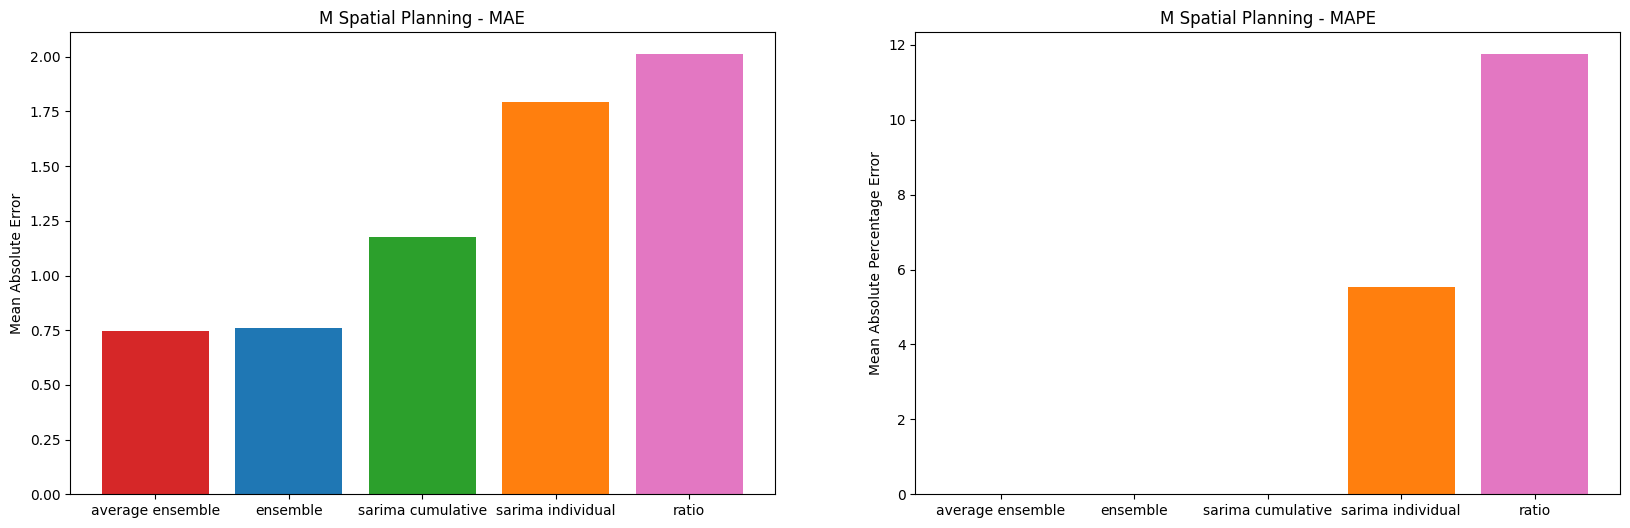

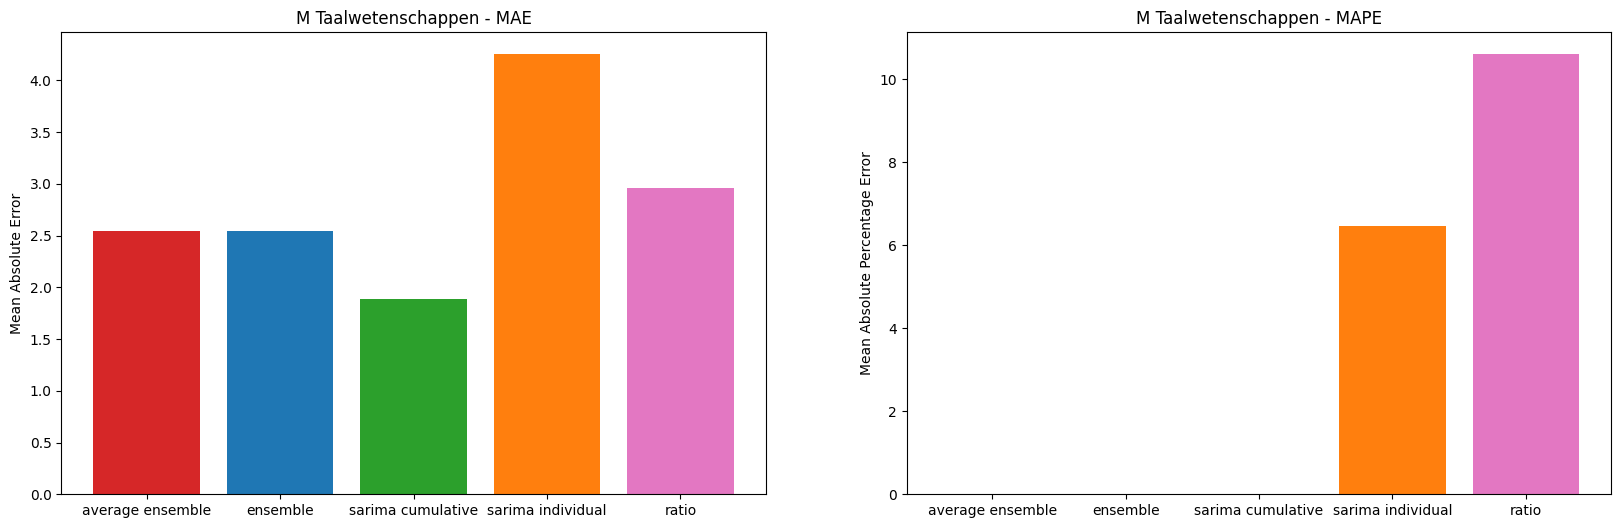

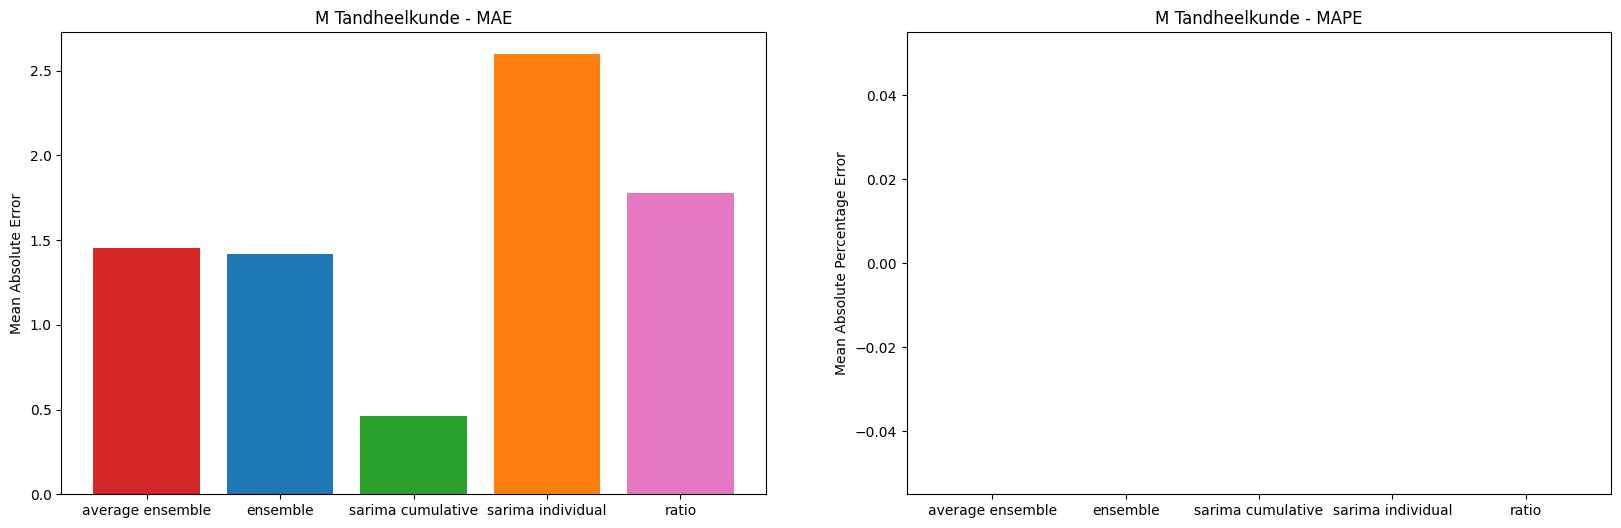

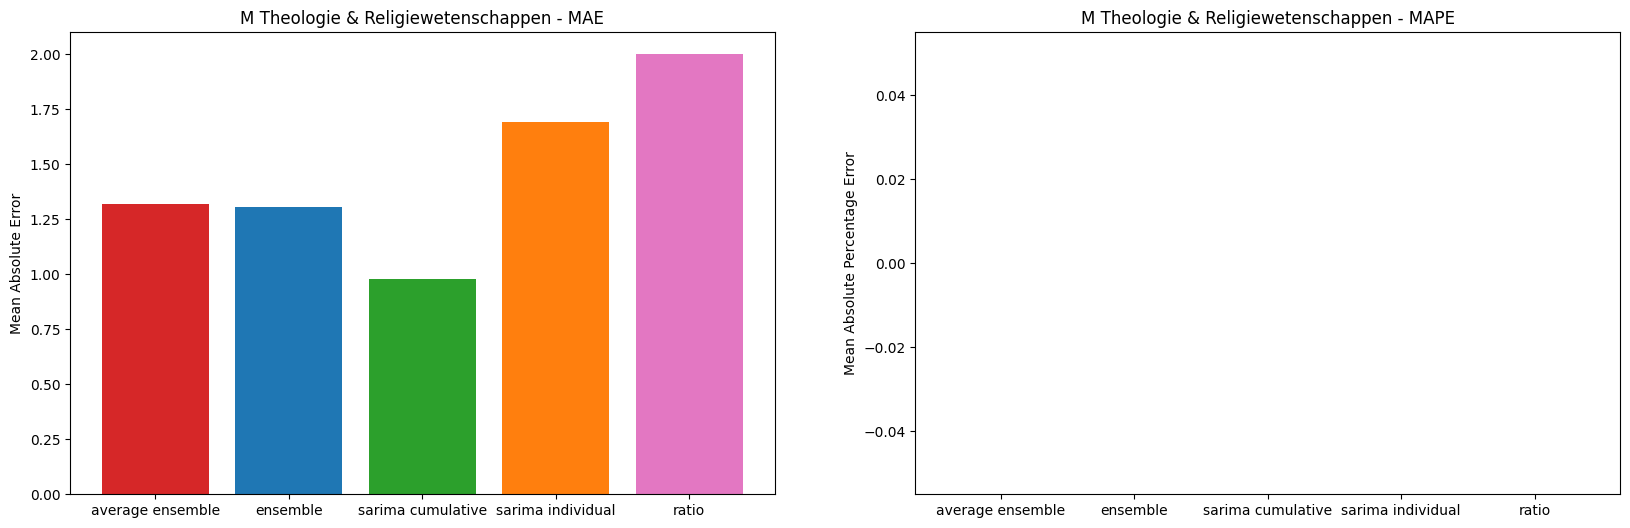

In [7]:
plot_per_heritage("EER")

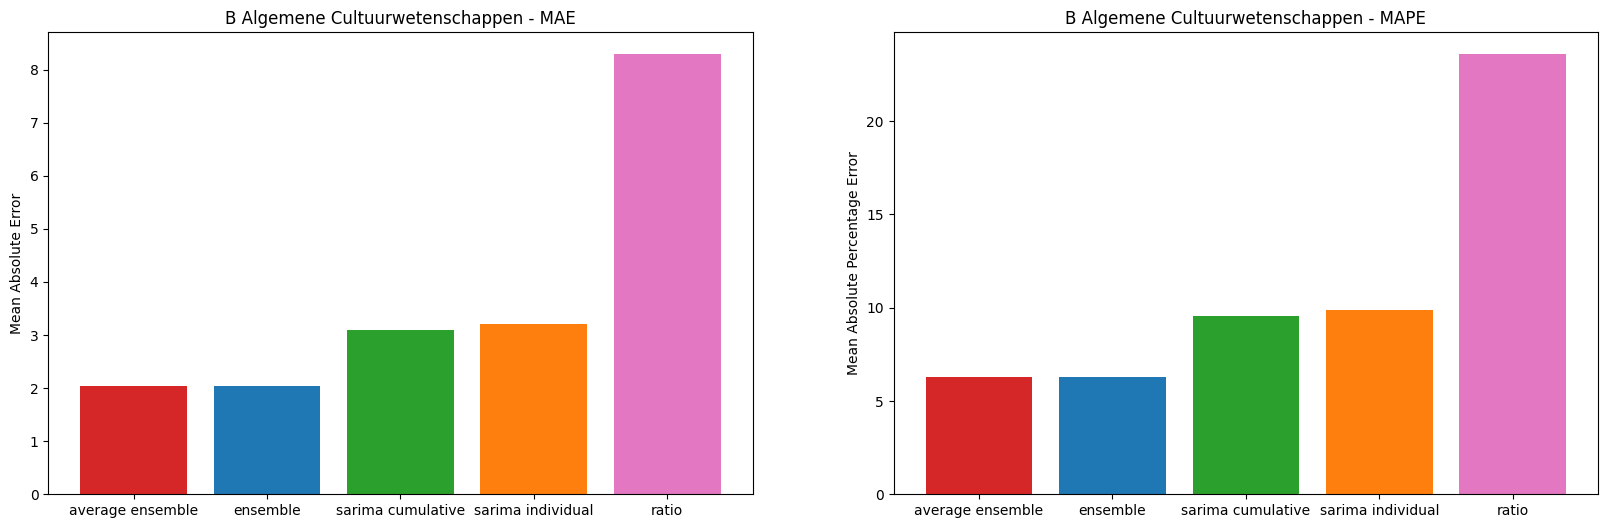

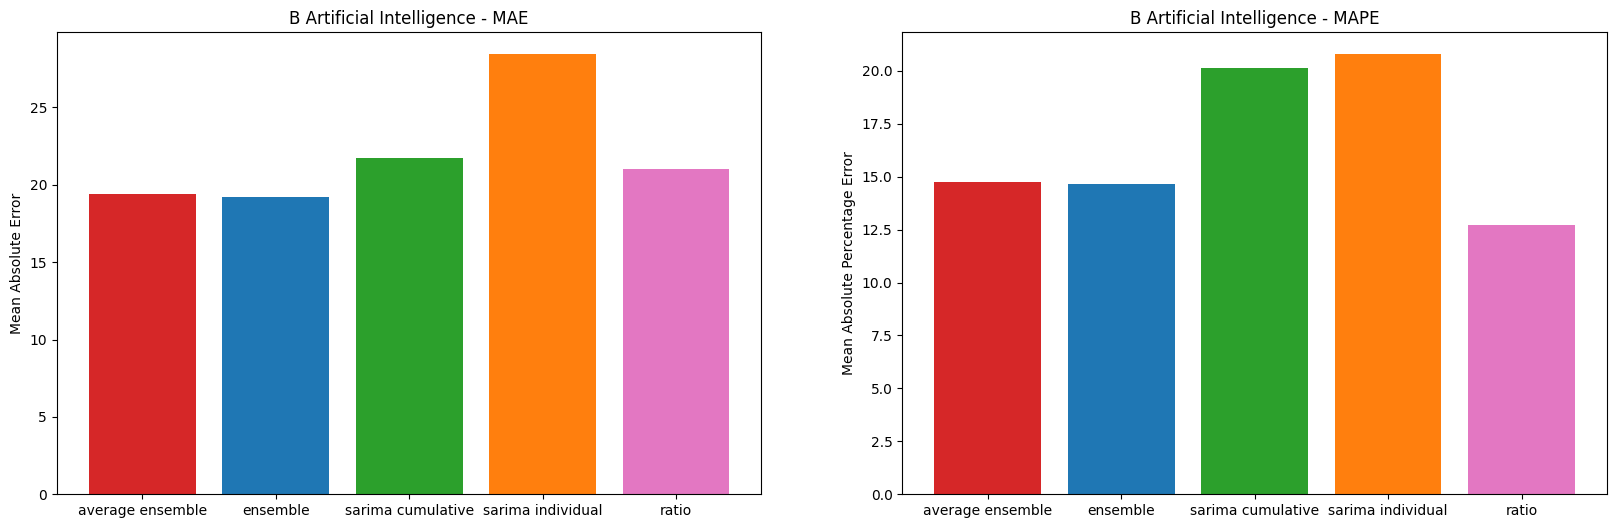

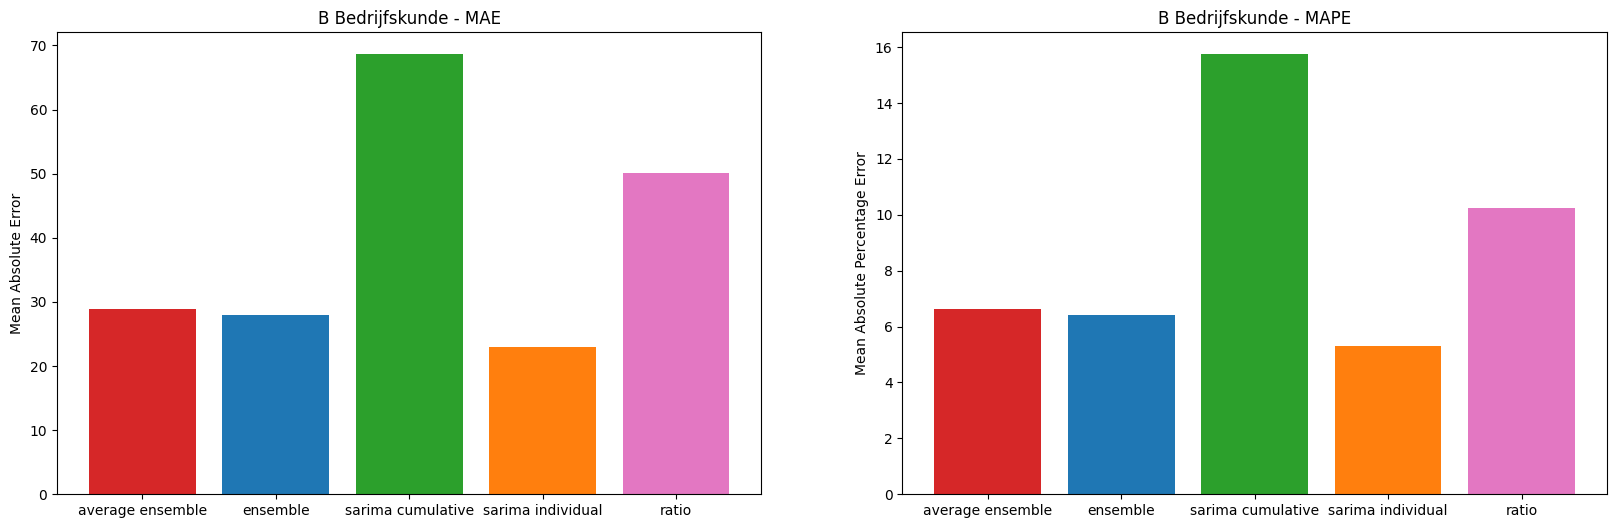

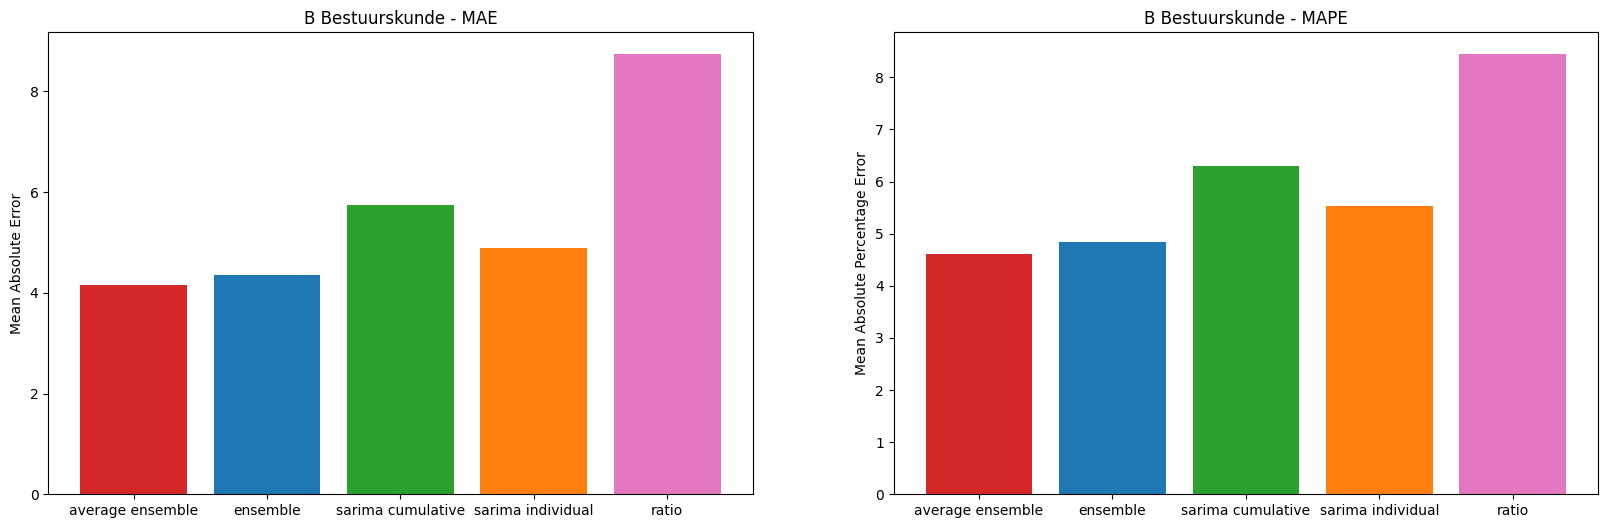

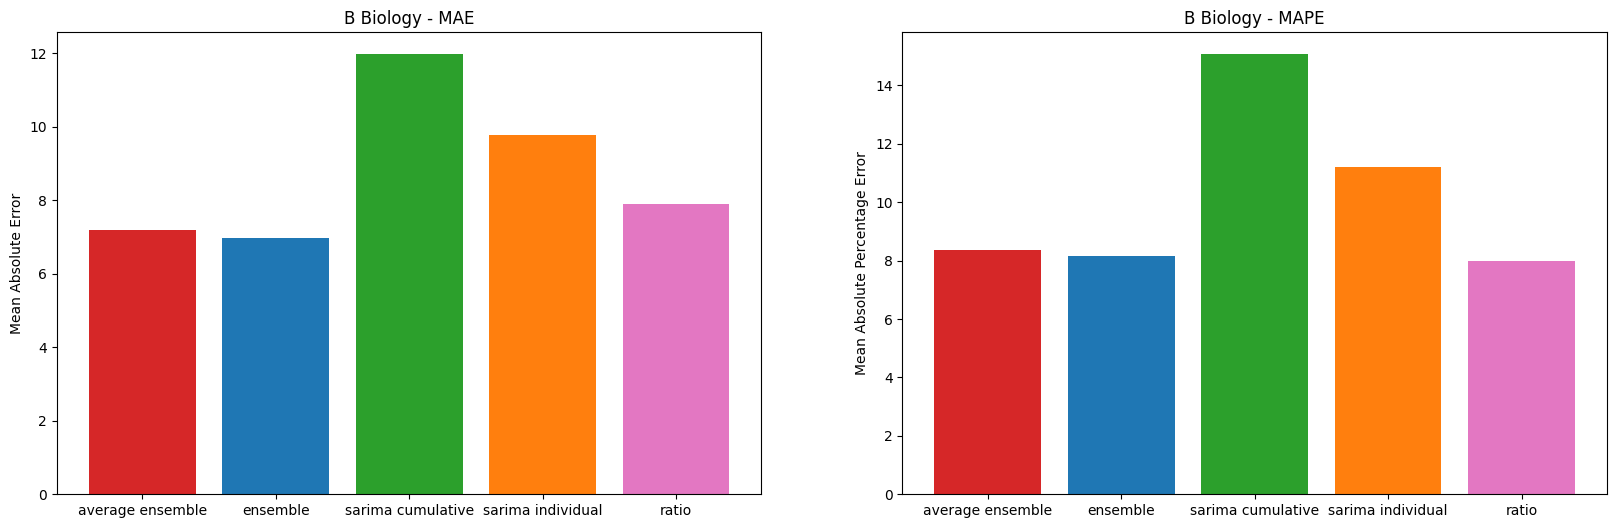

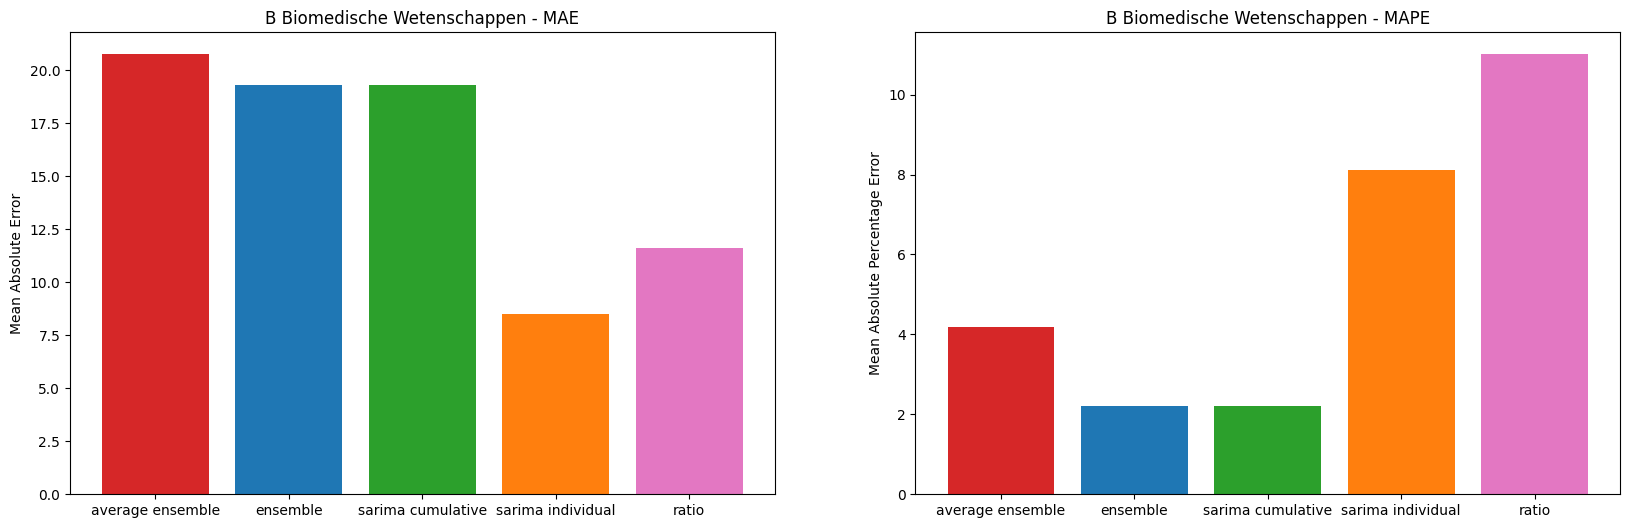

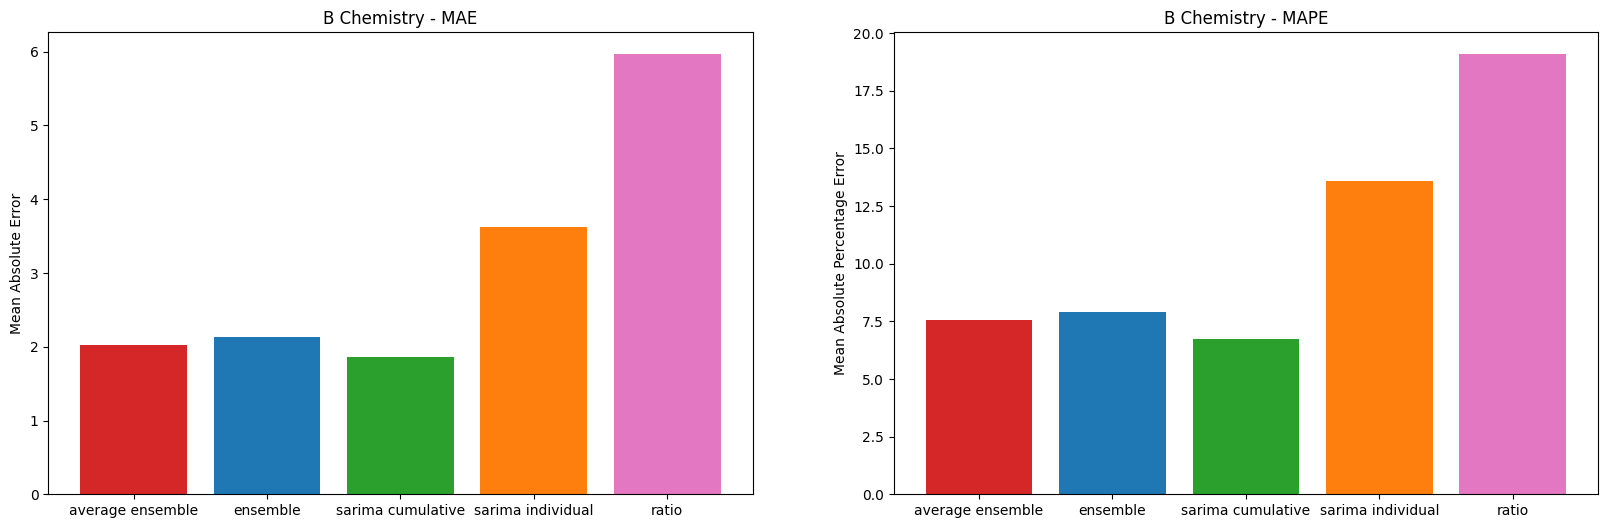

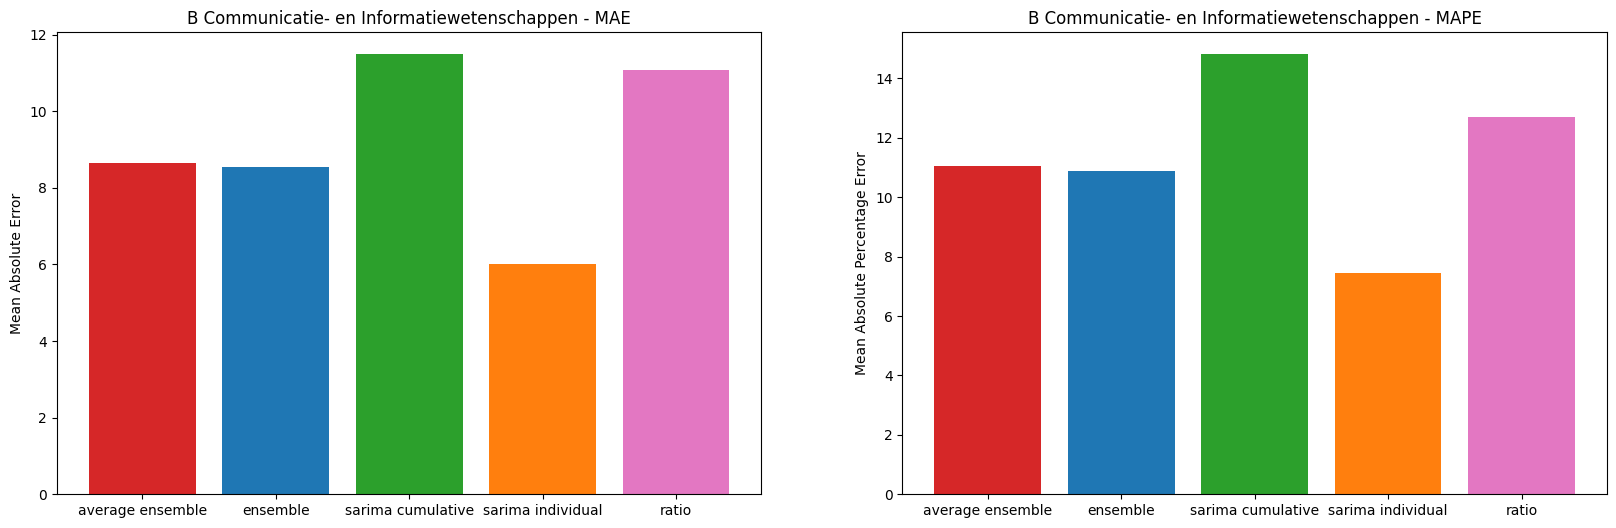

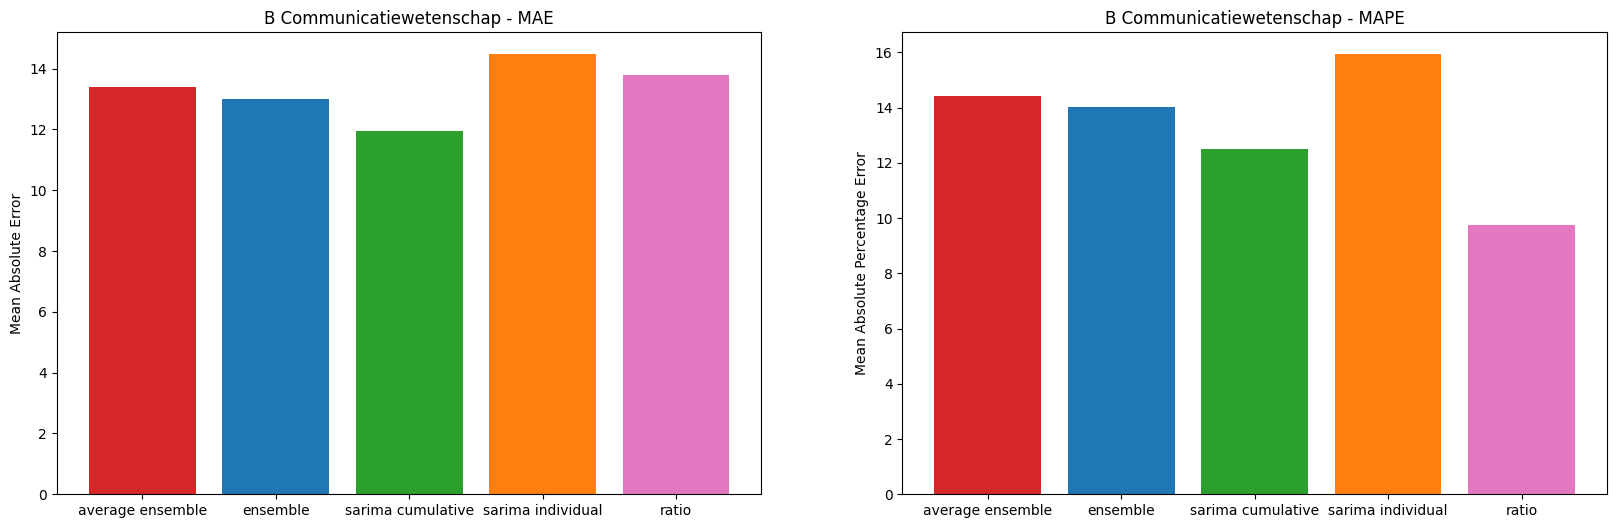

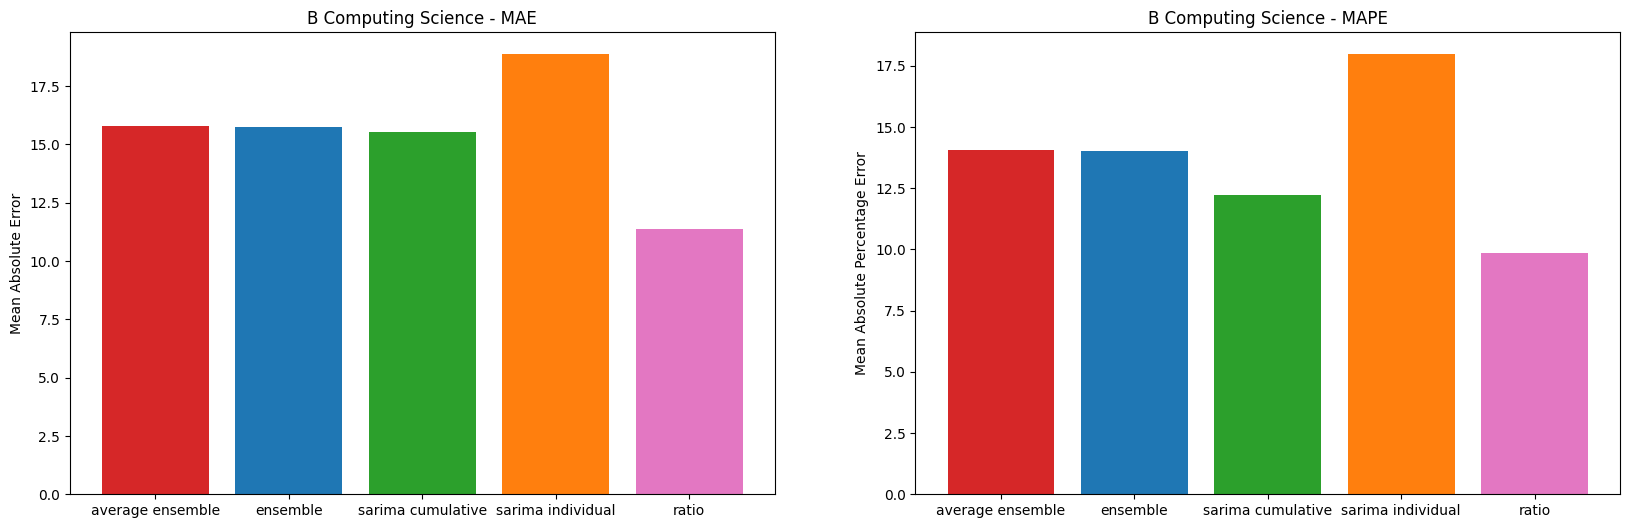

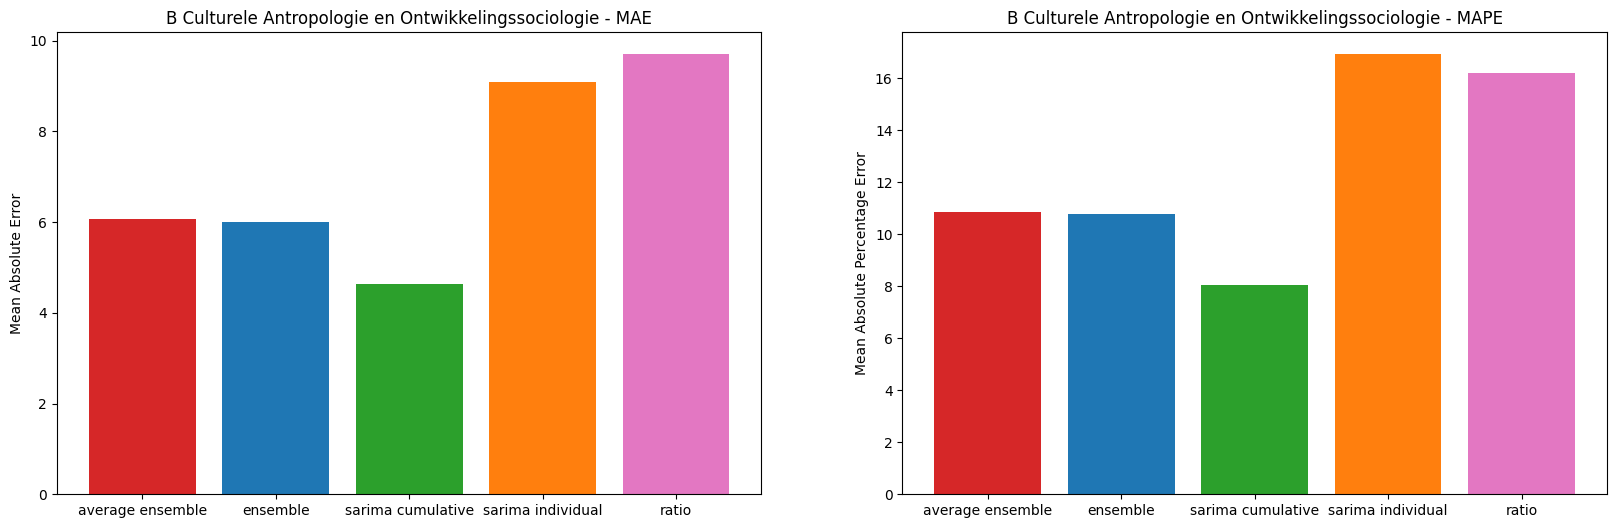

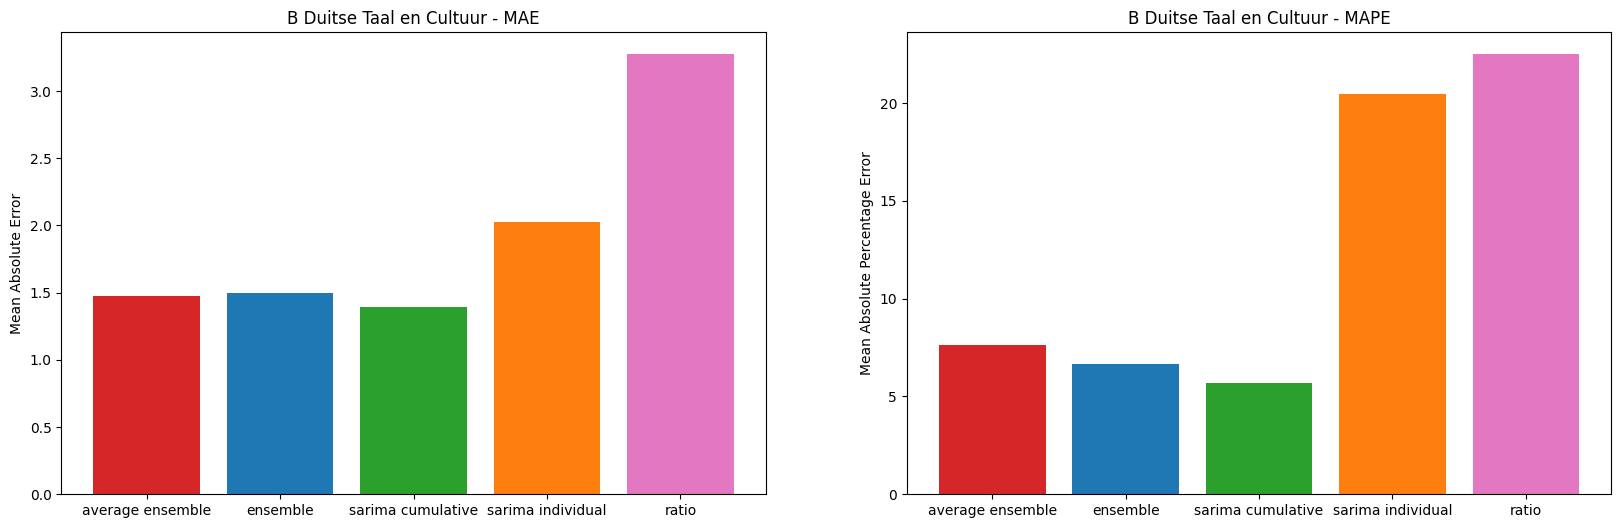

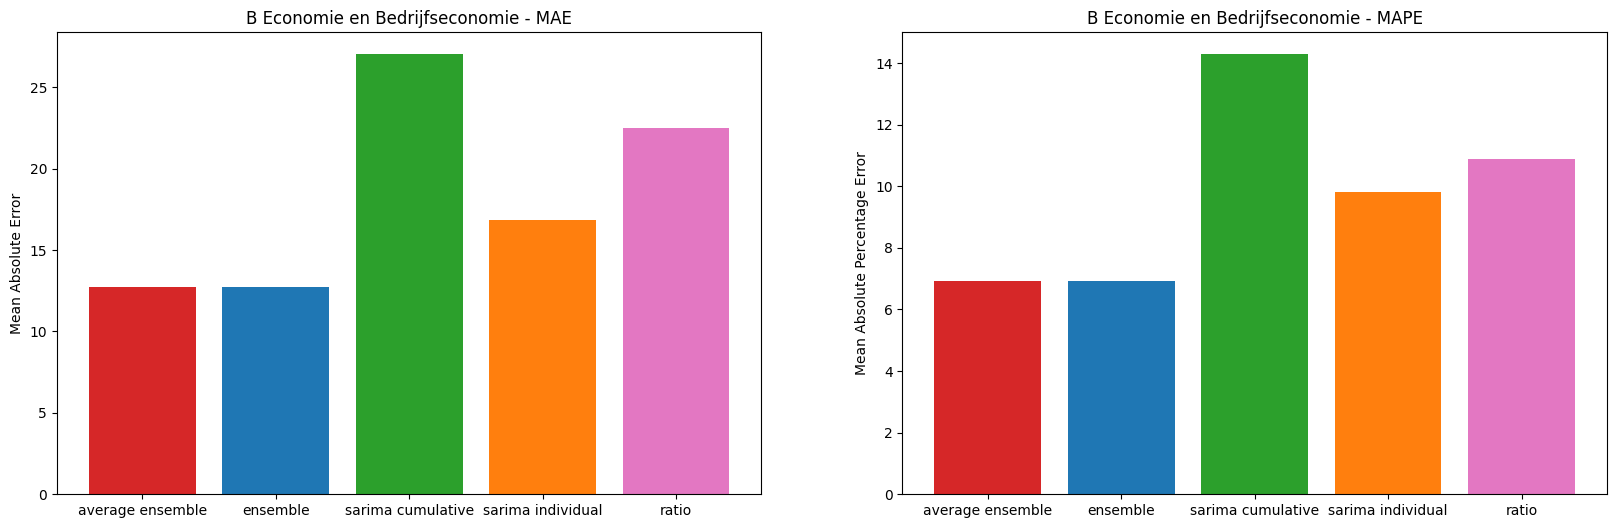

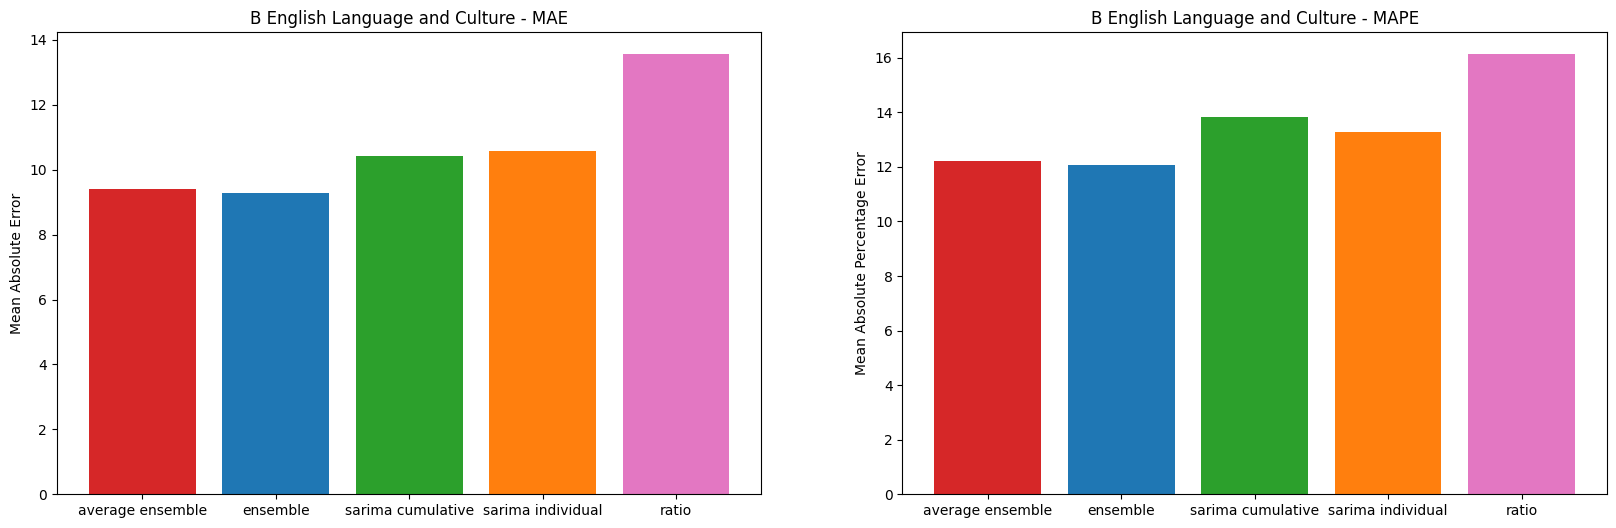

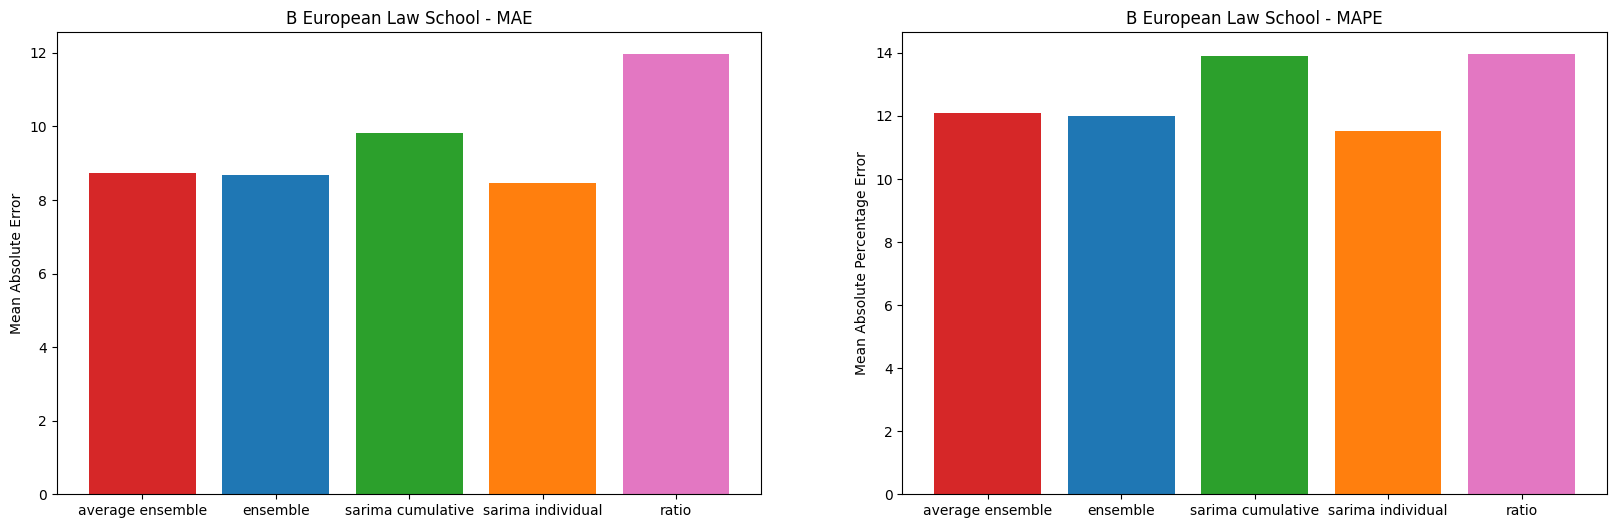

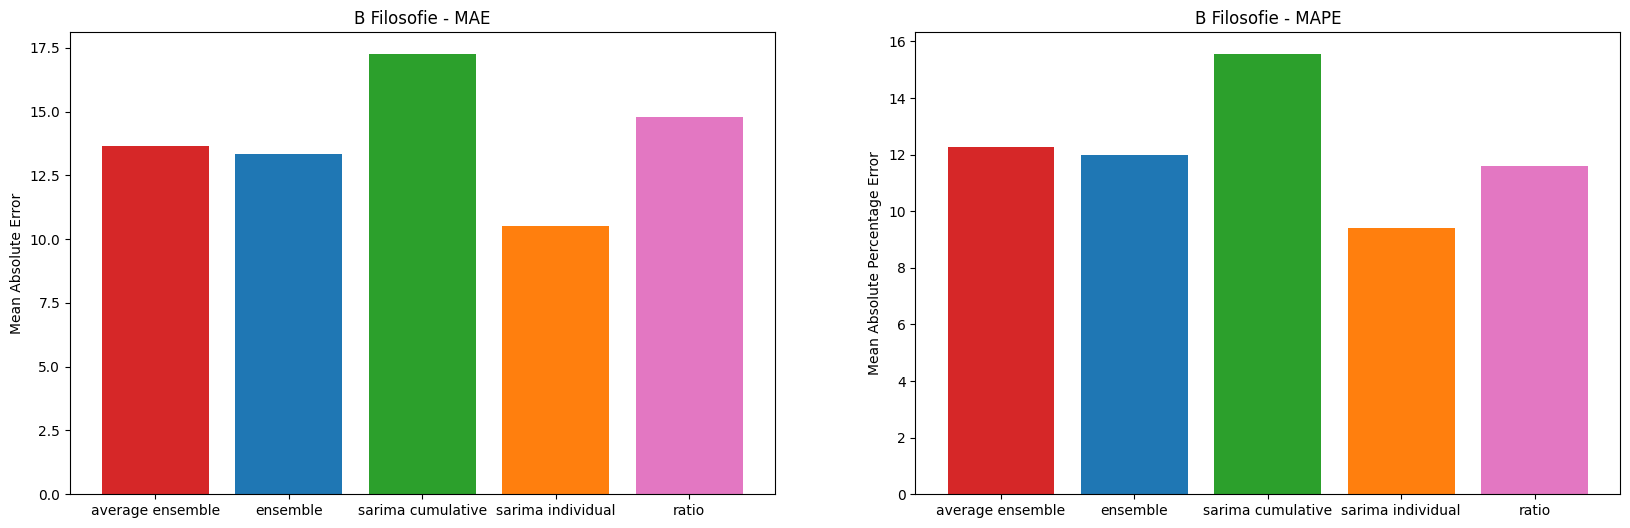

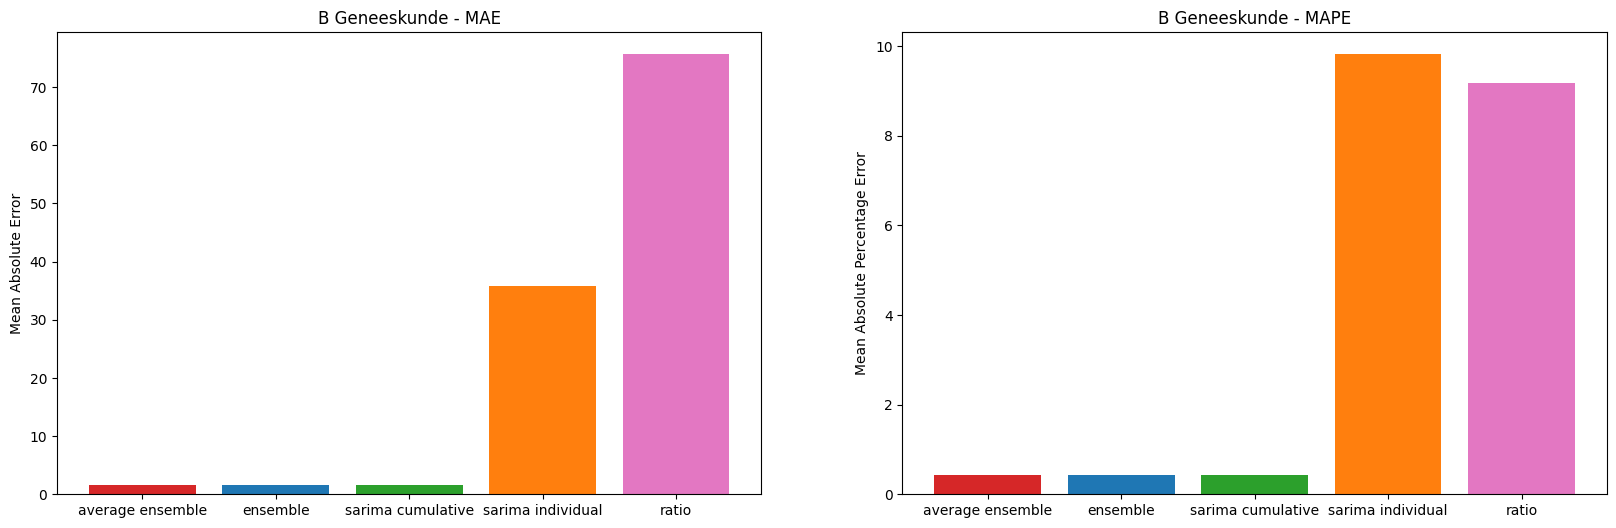

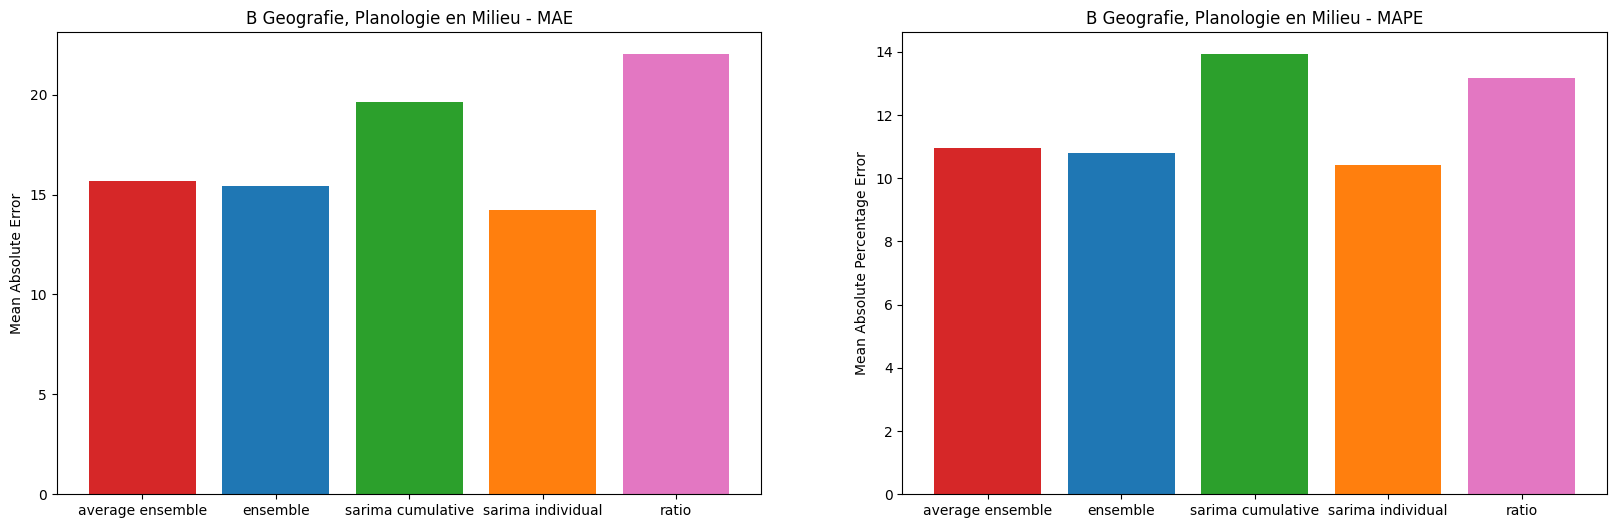

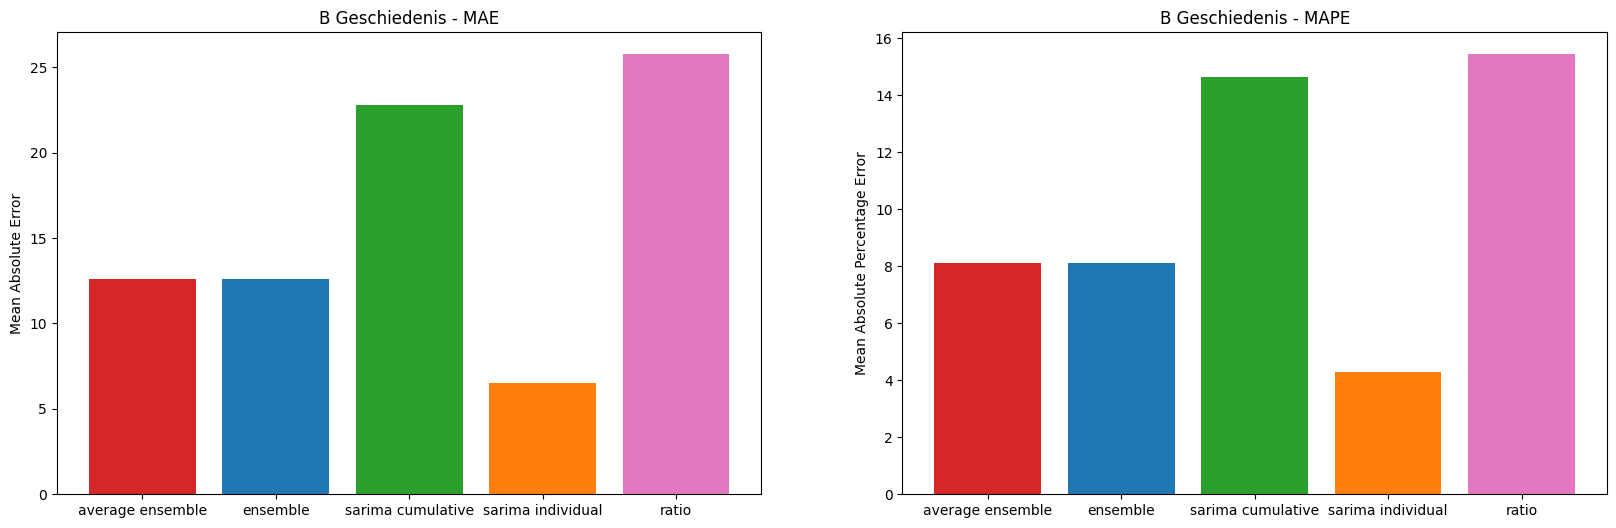

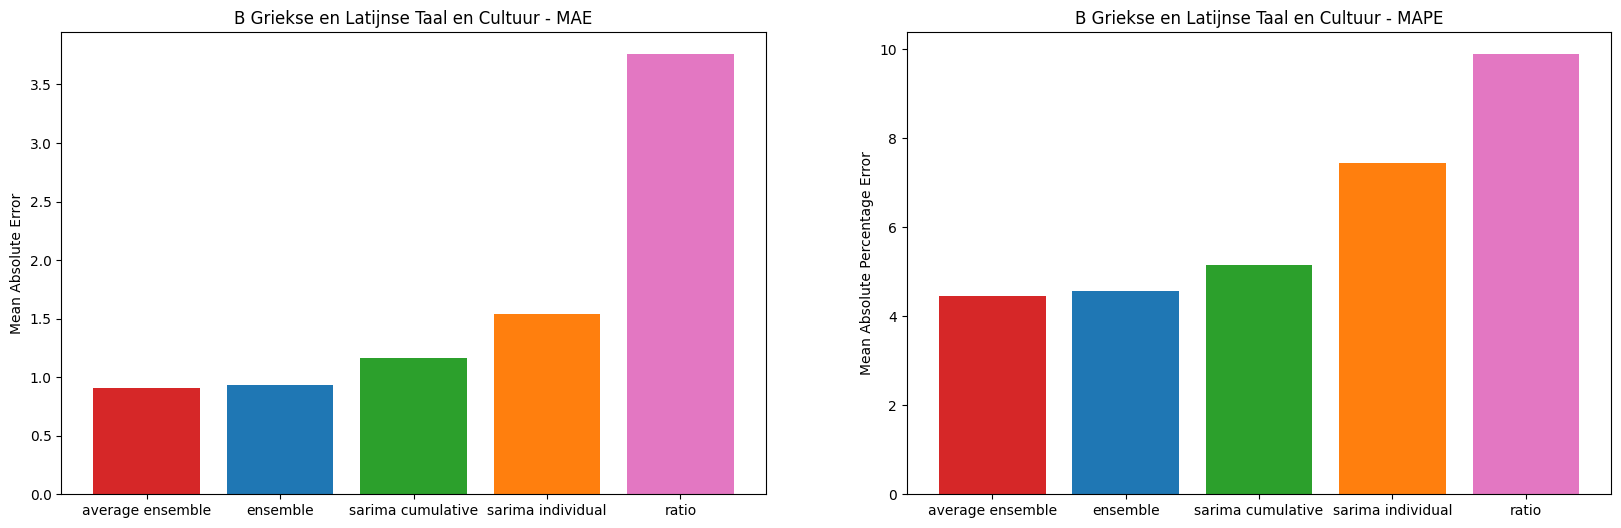

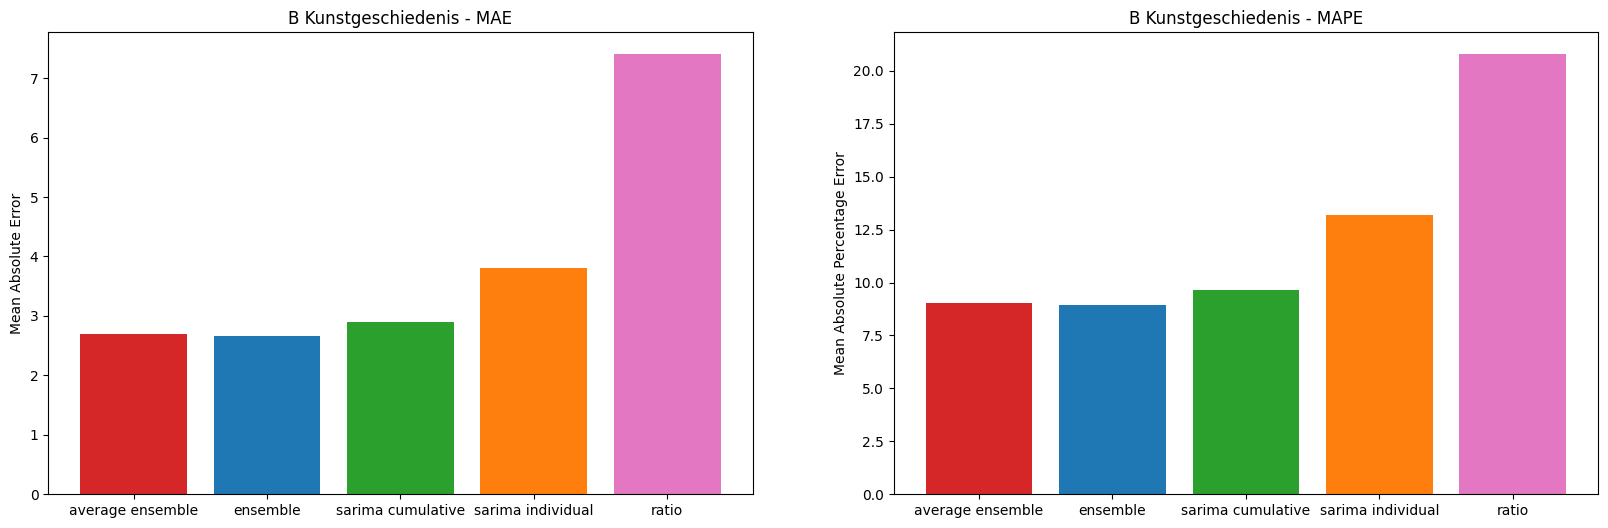

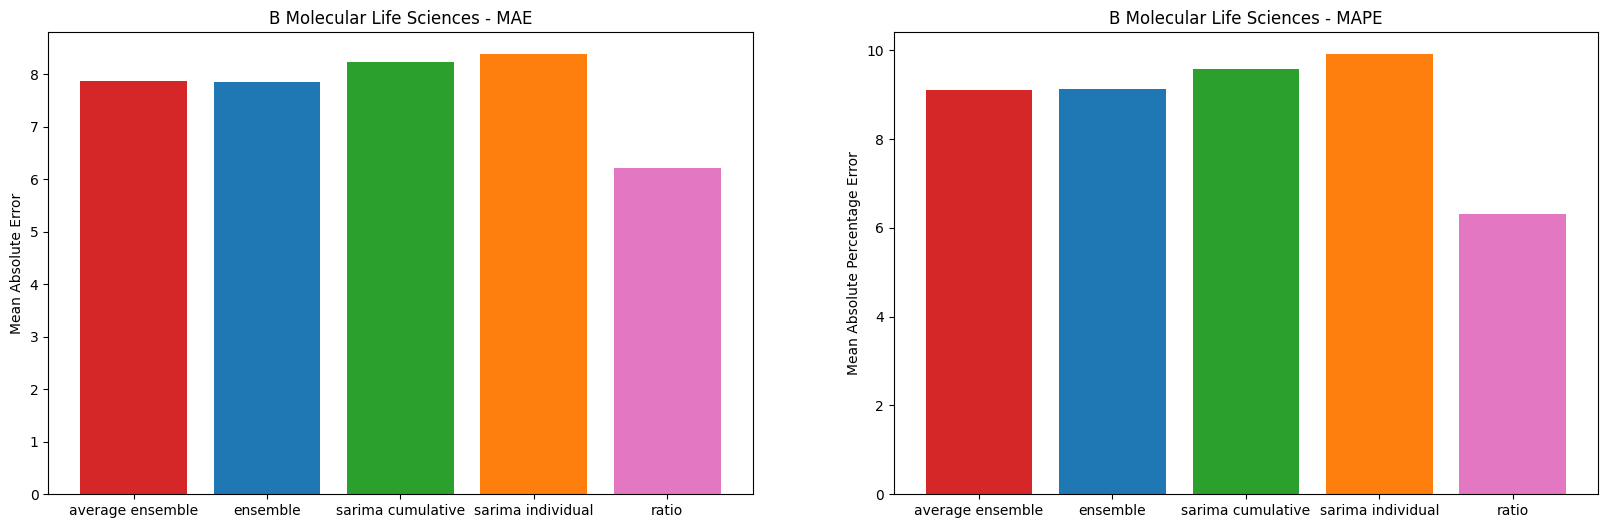

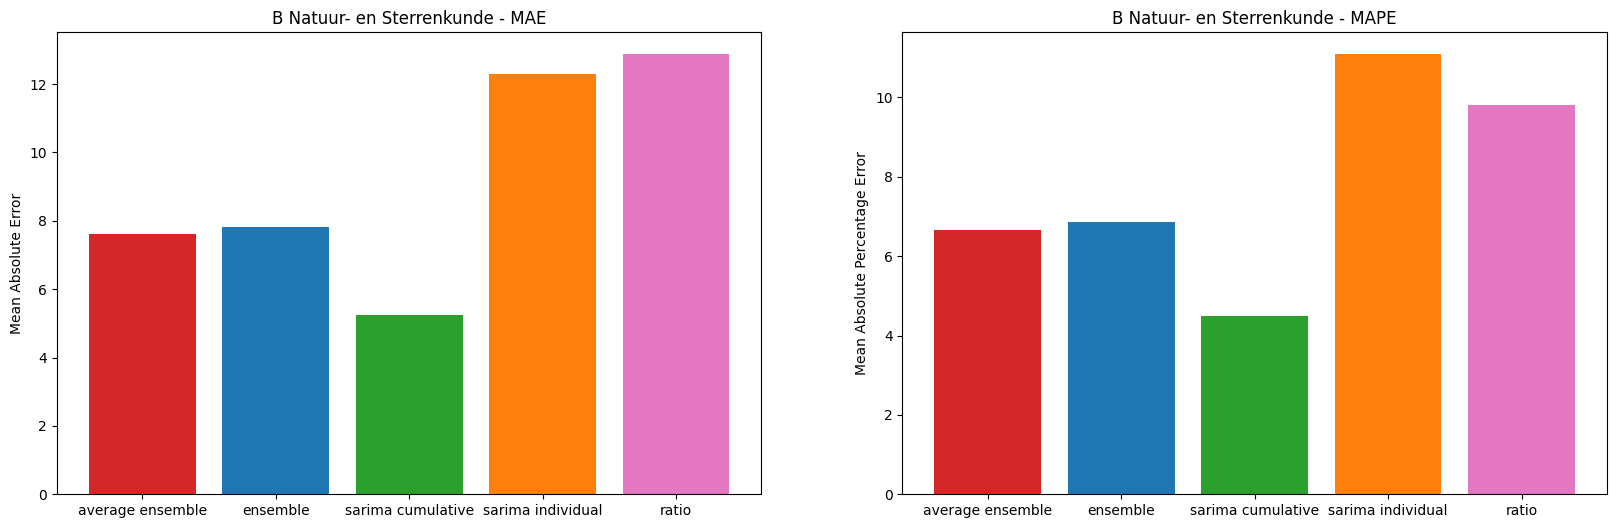

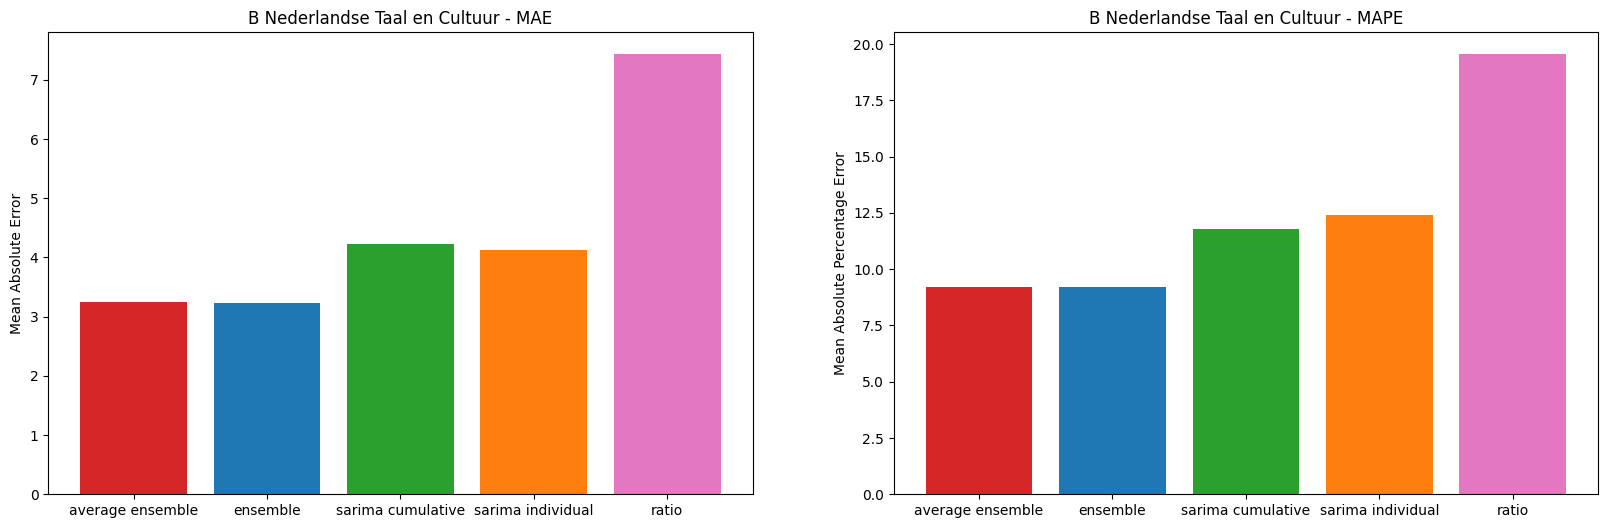

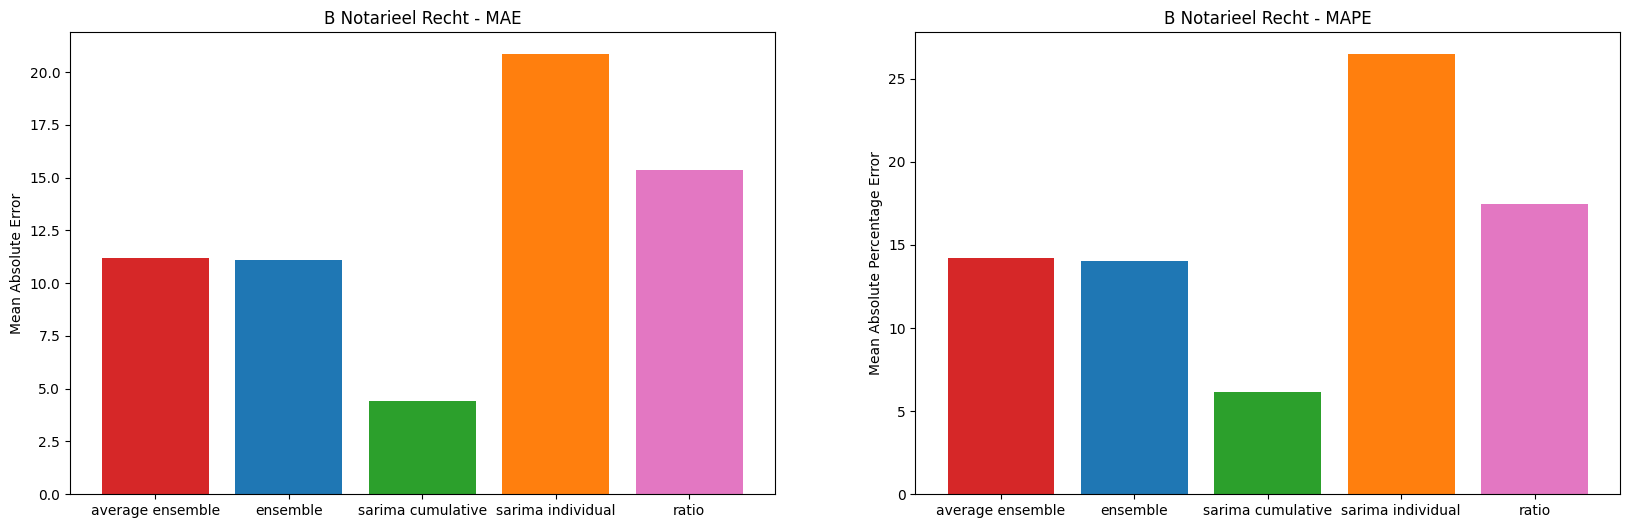

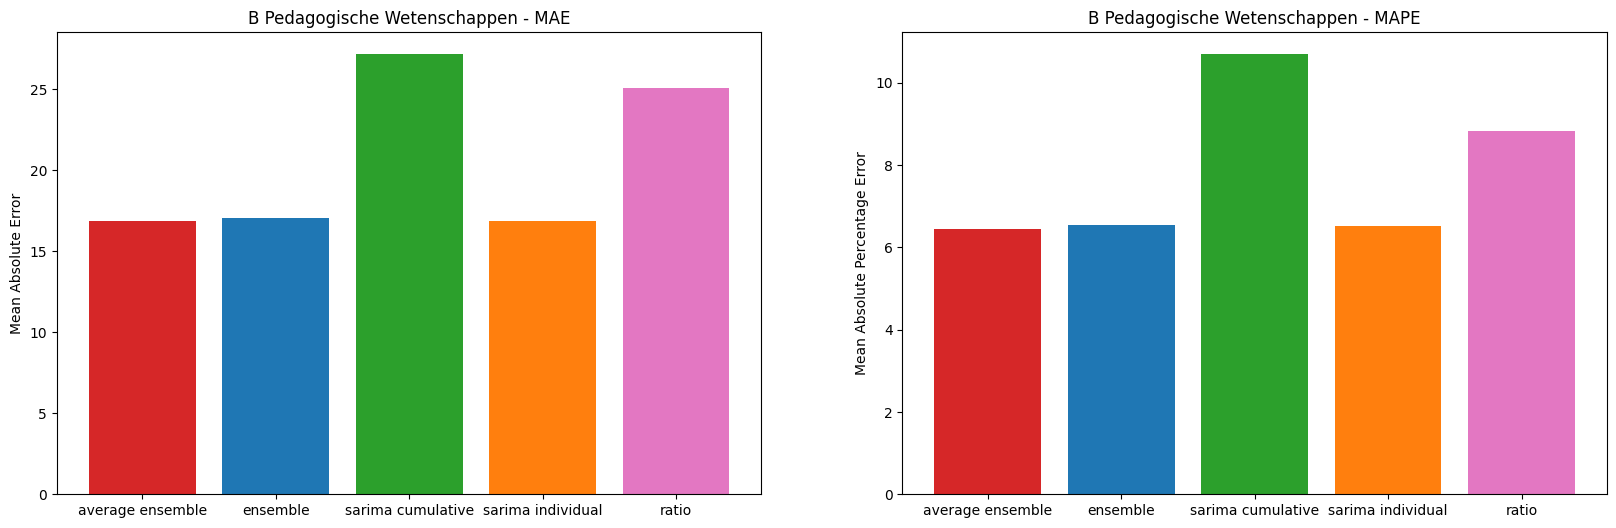

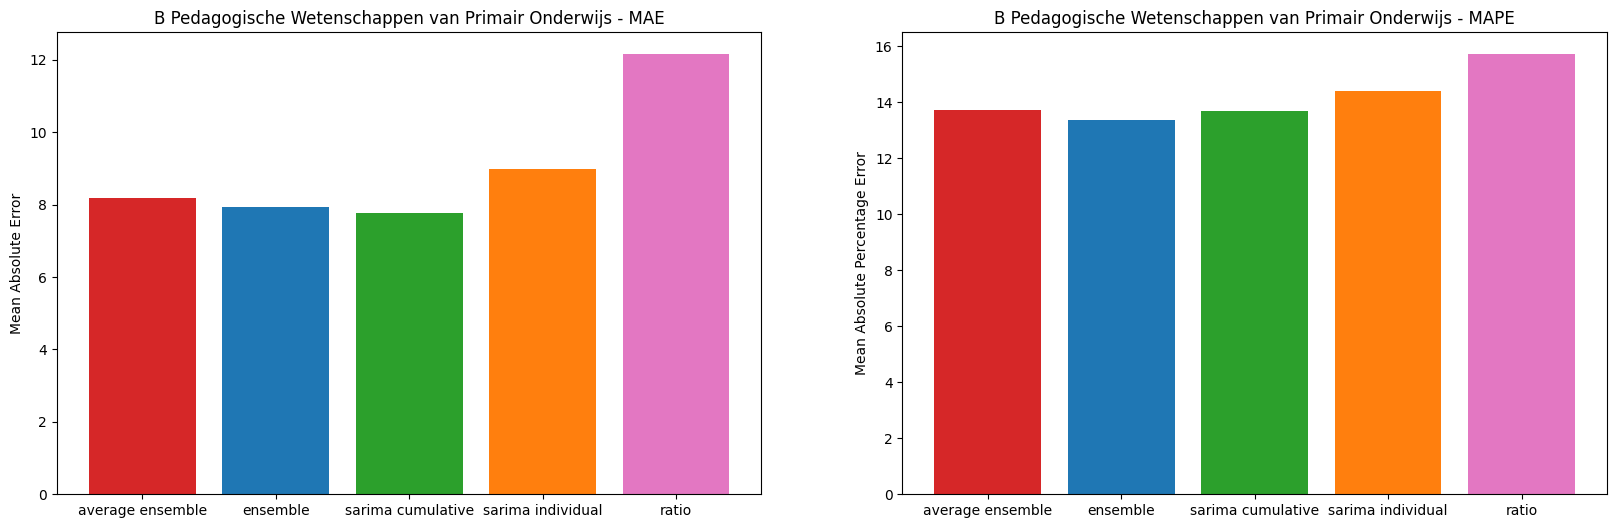

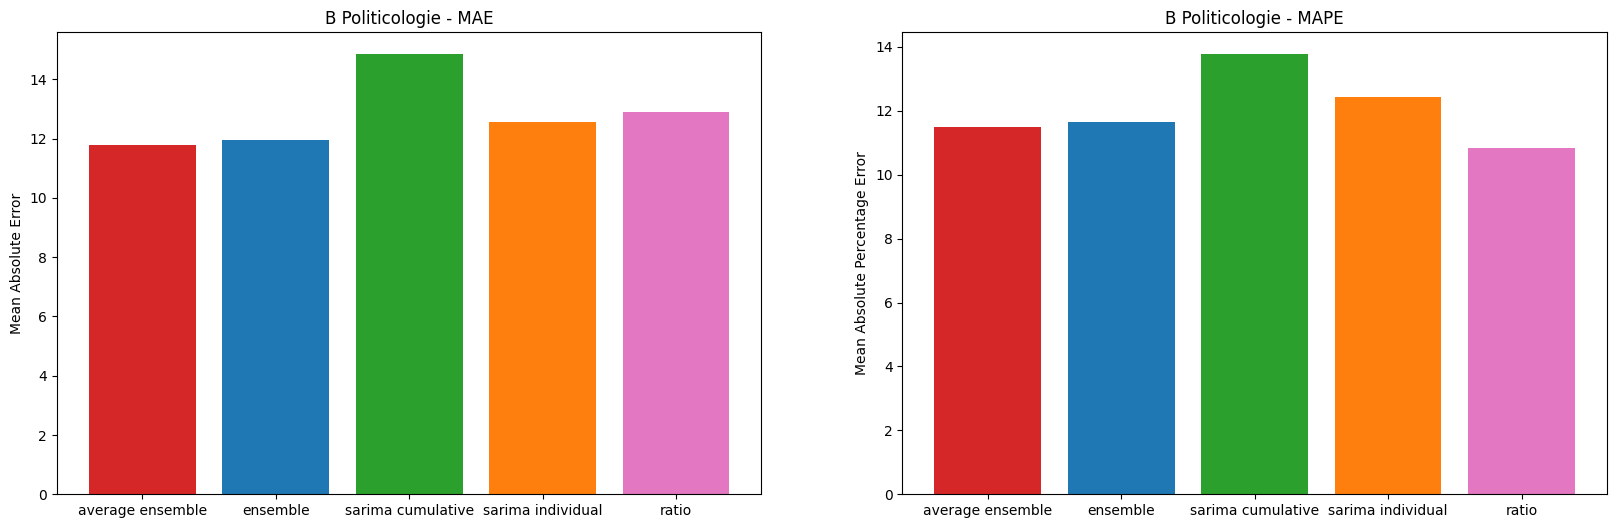

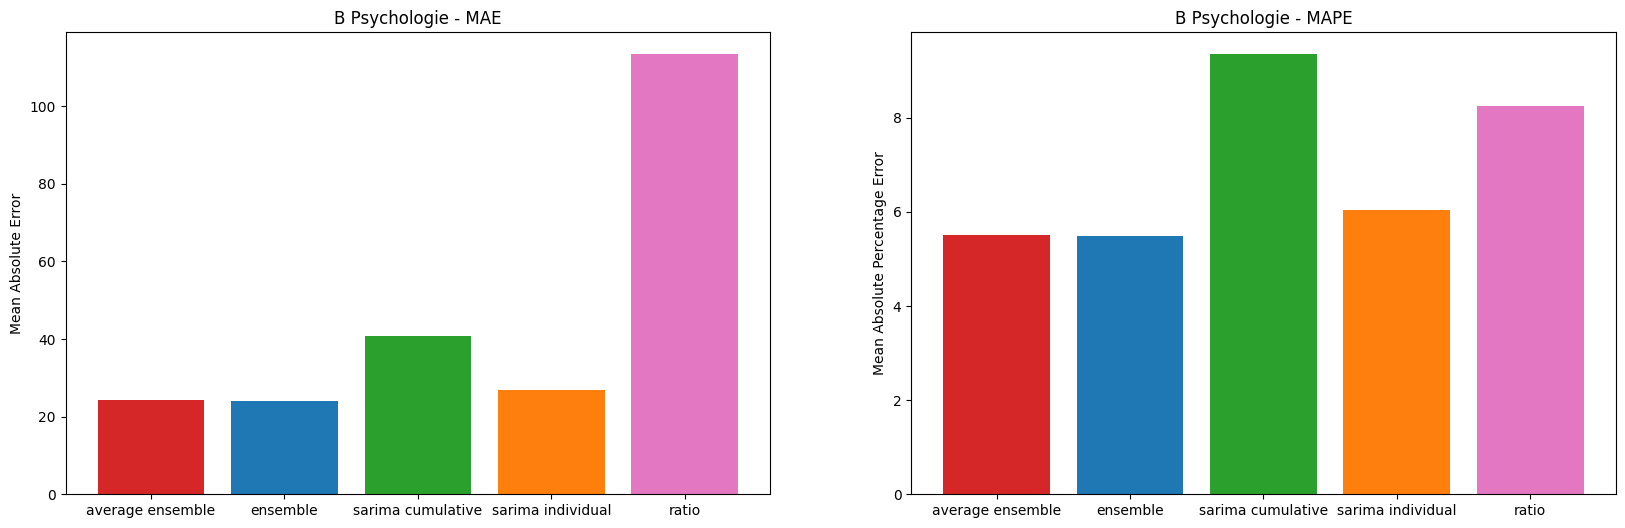

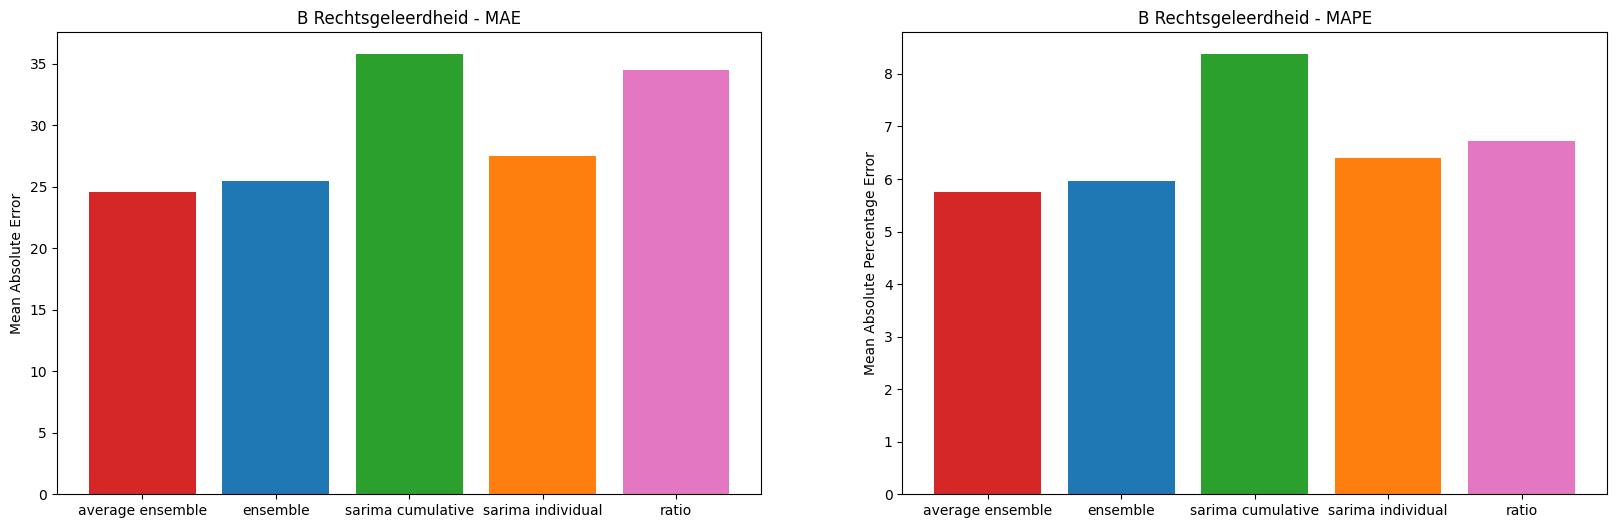

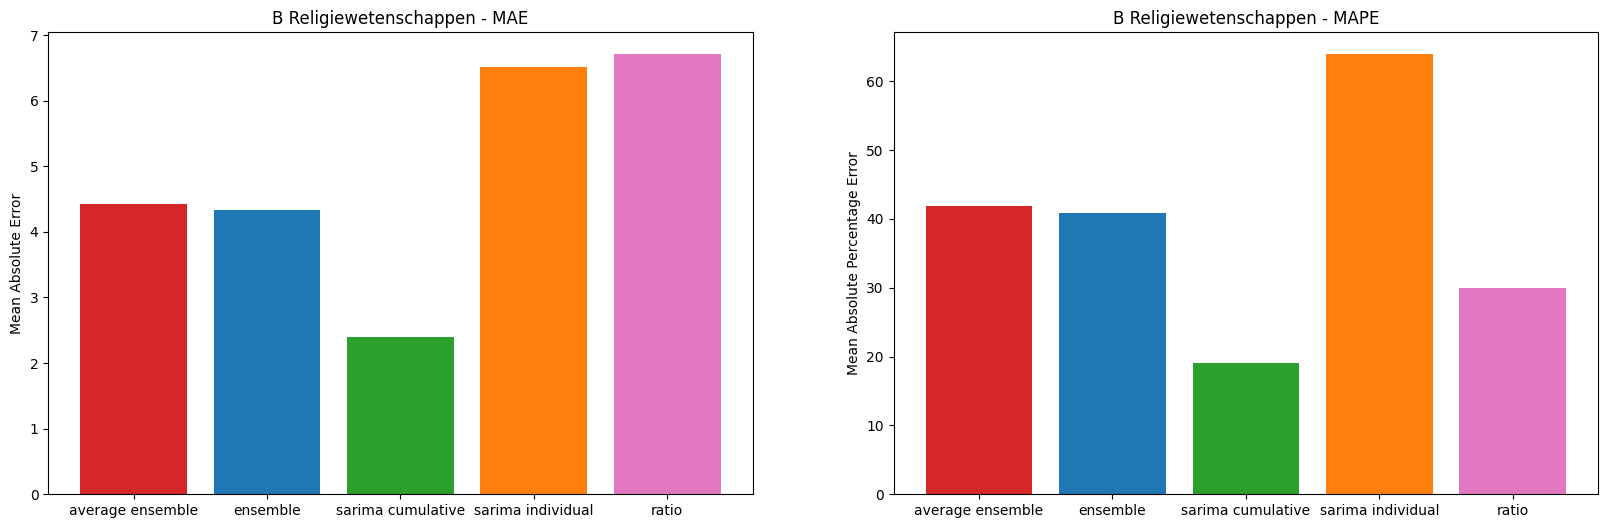

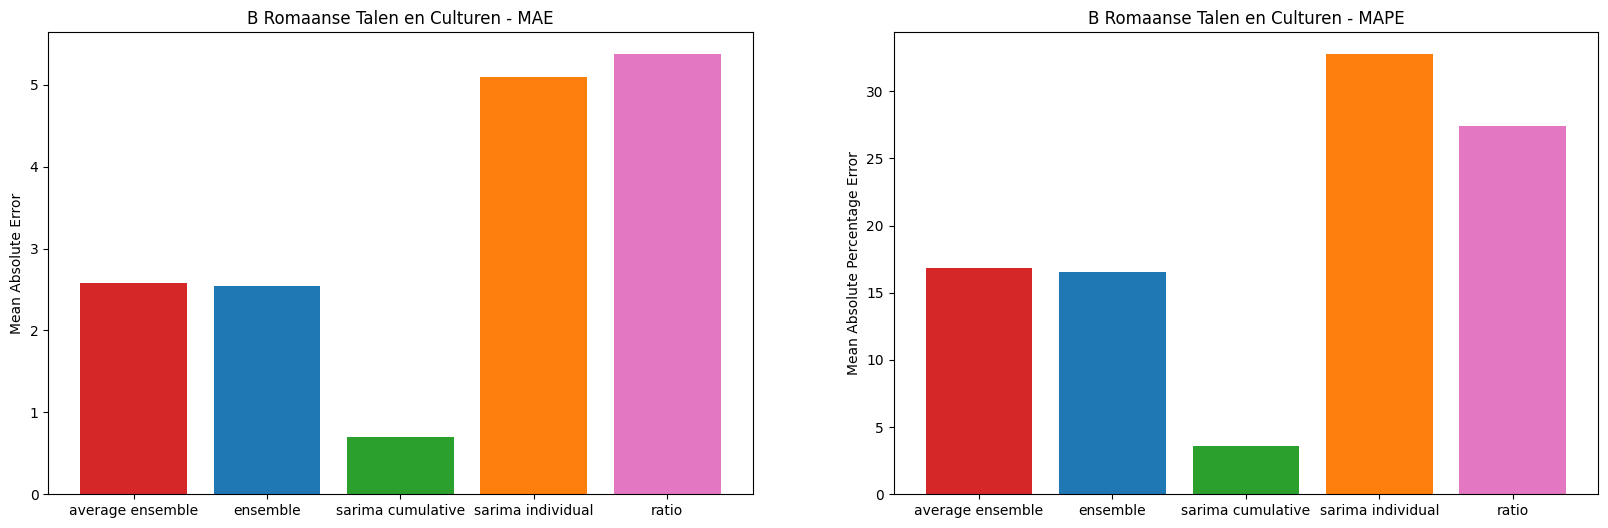

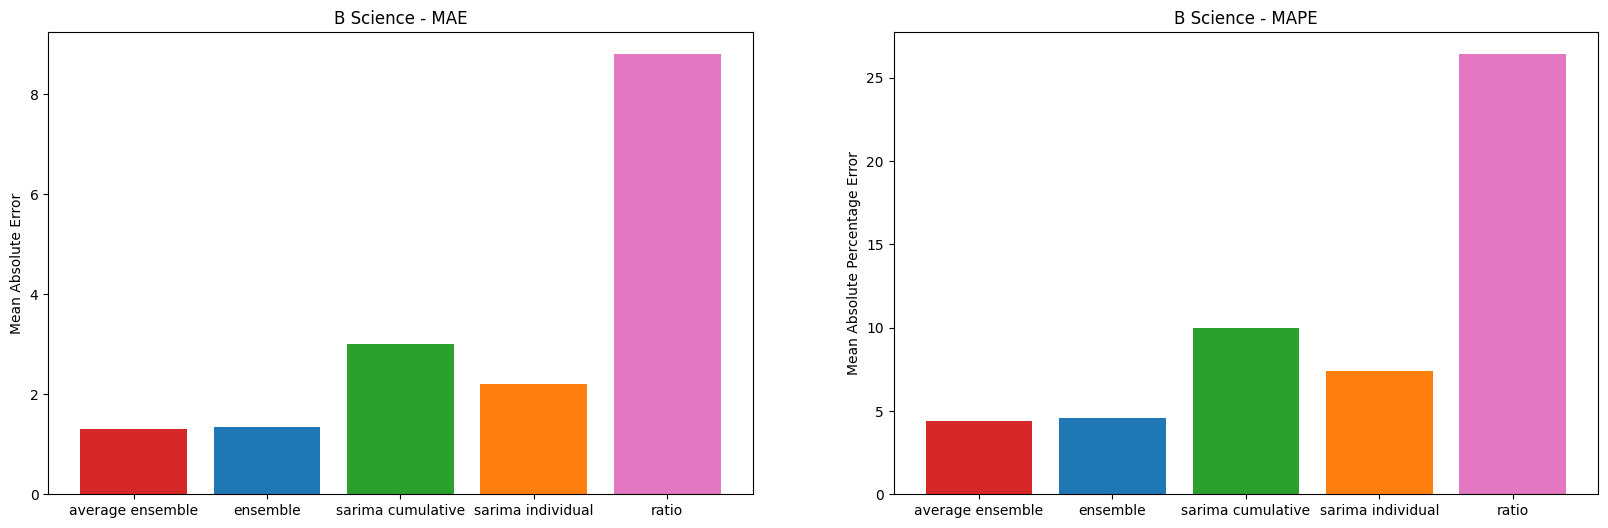

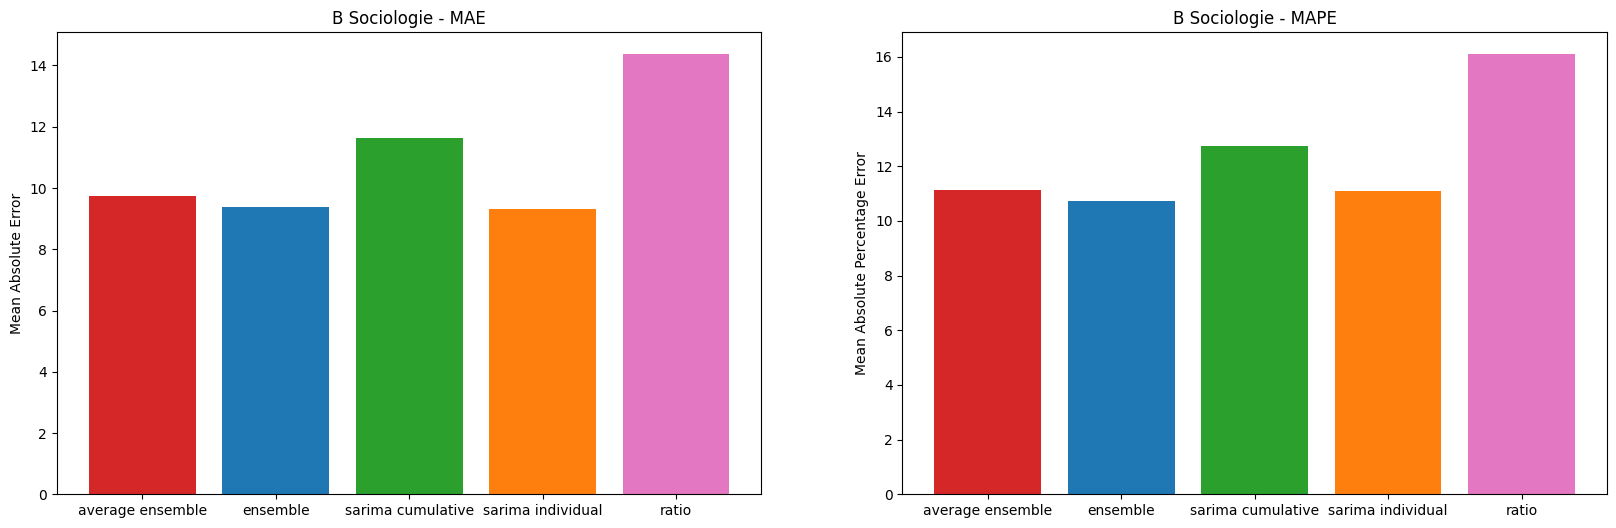

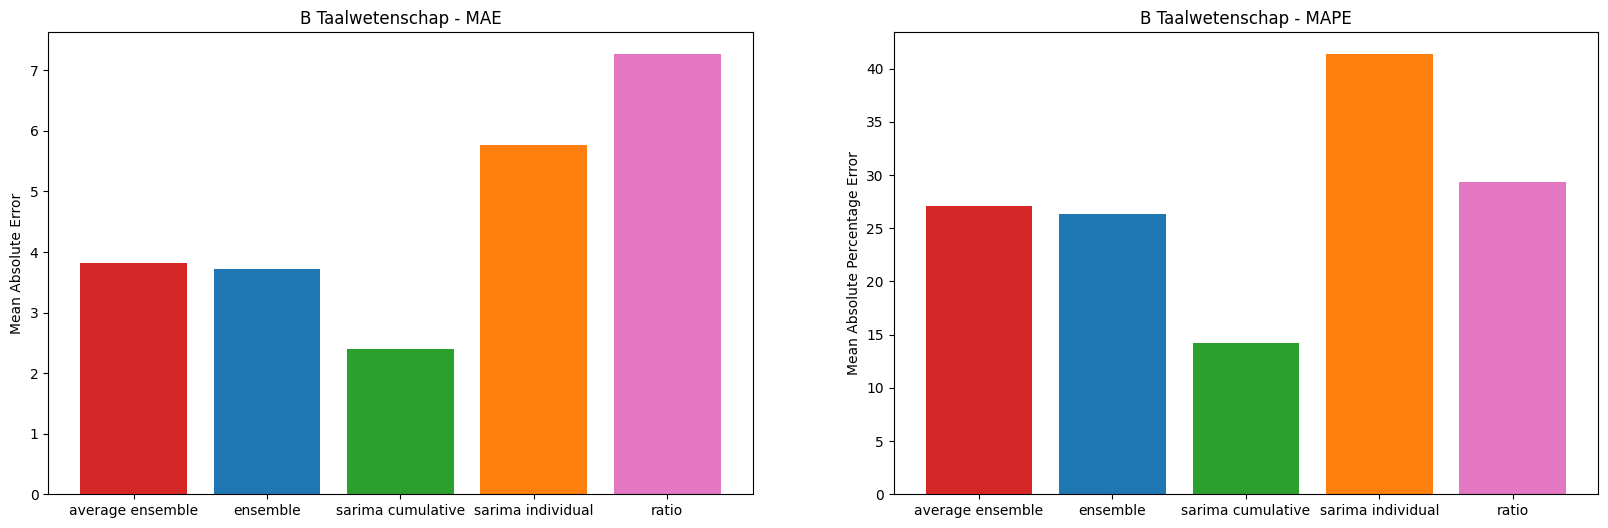

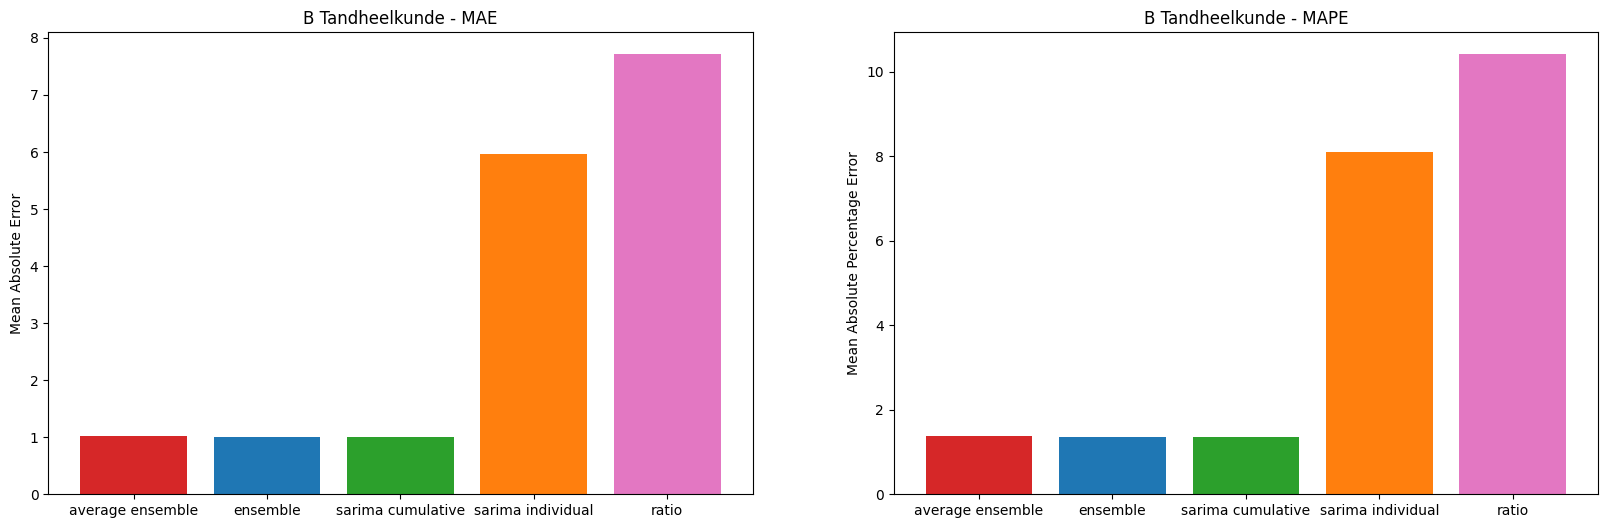

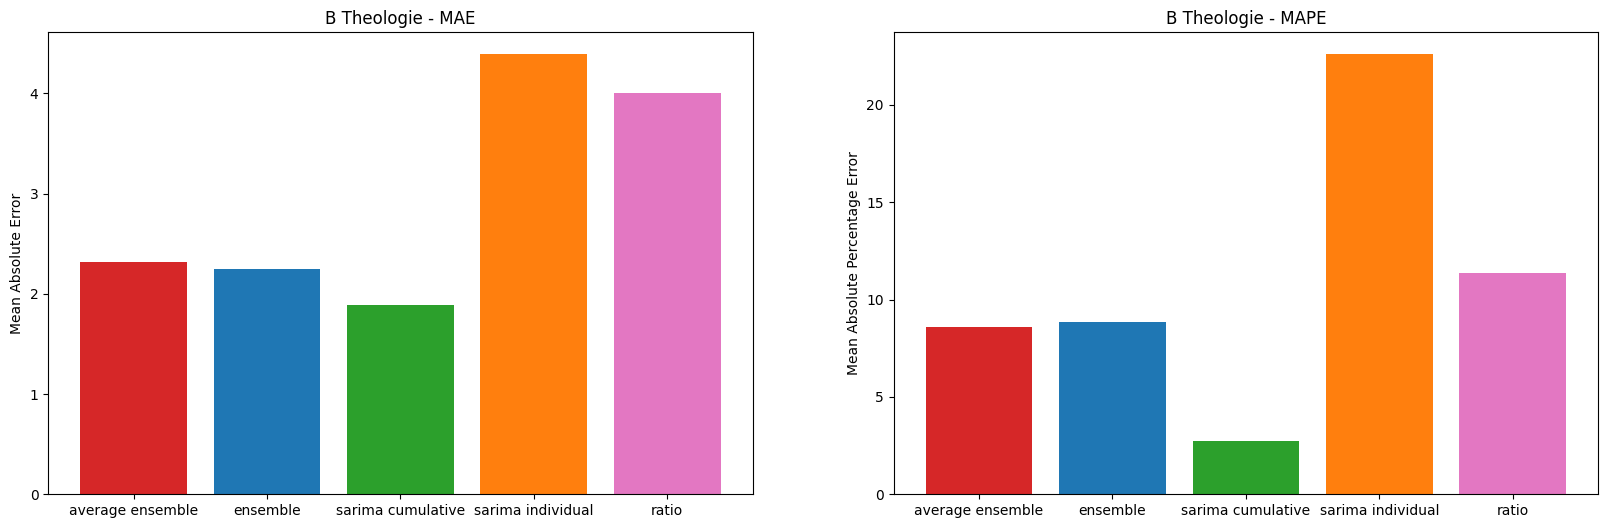

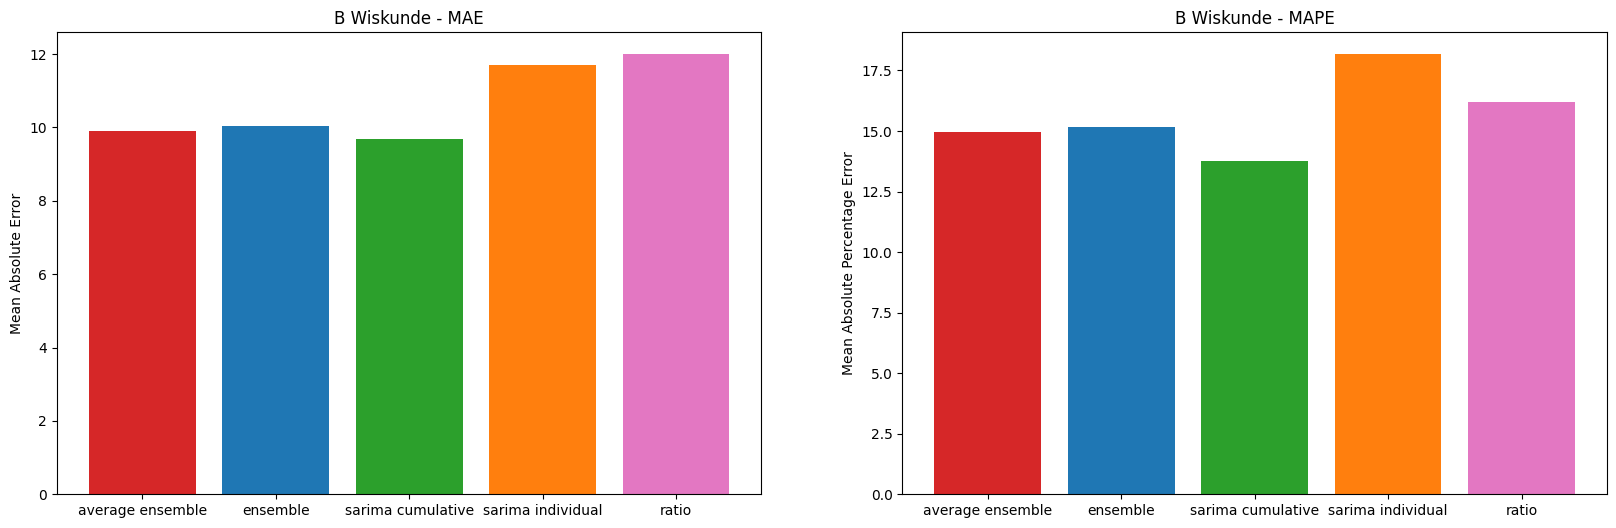

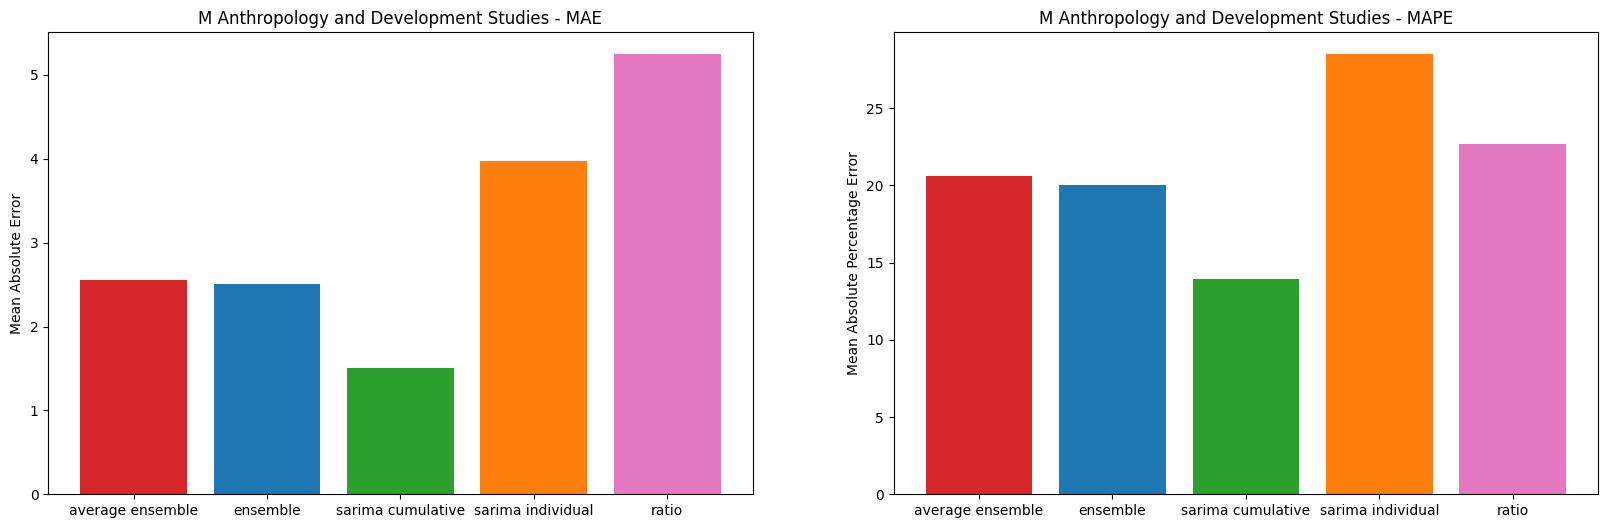

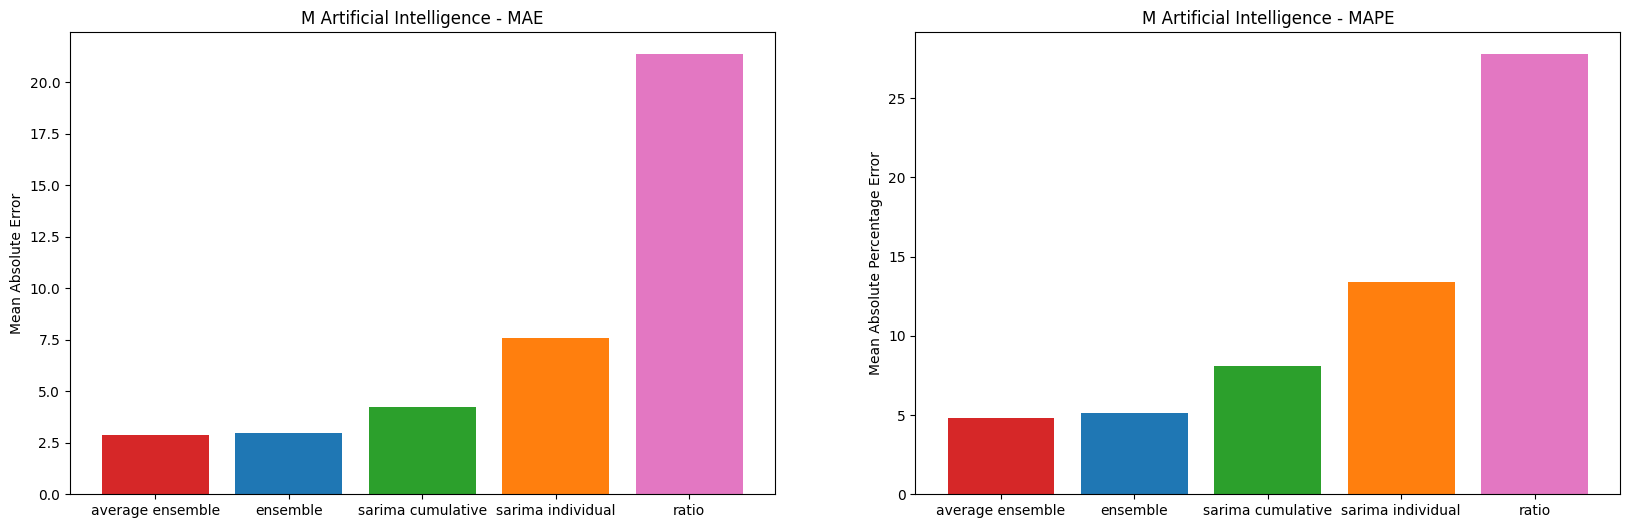

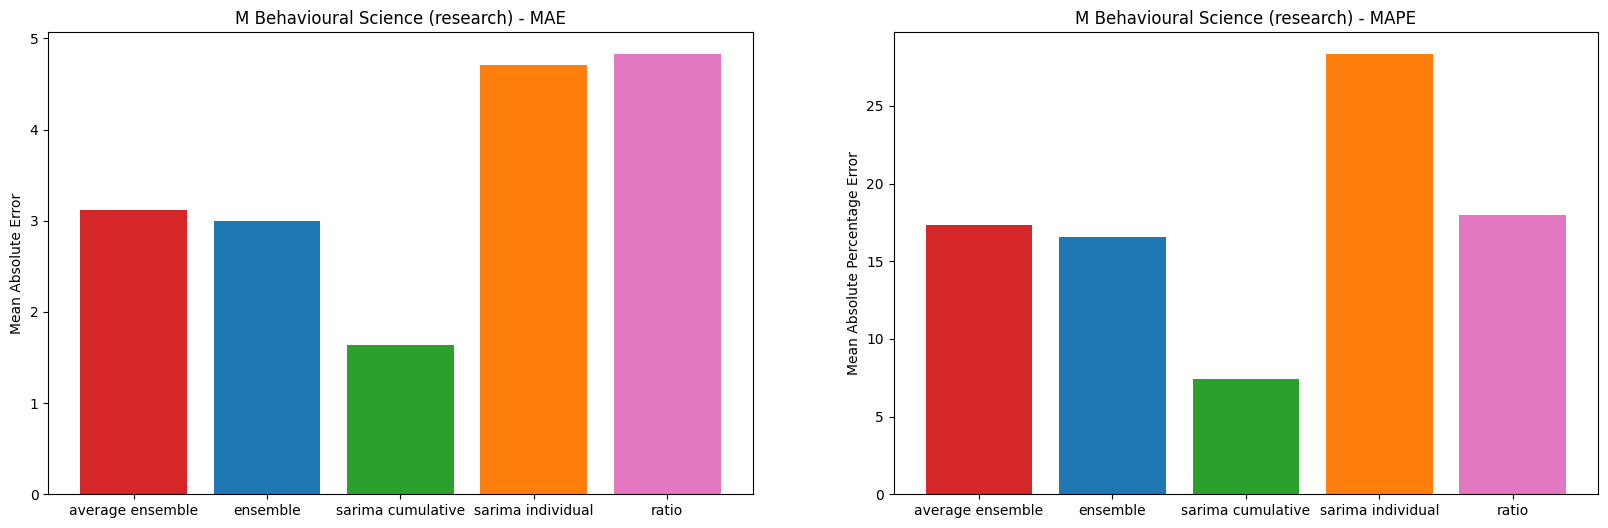

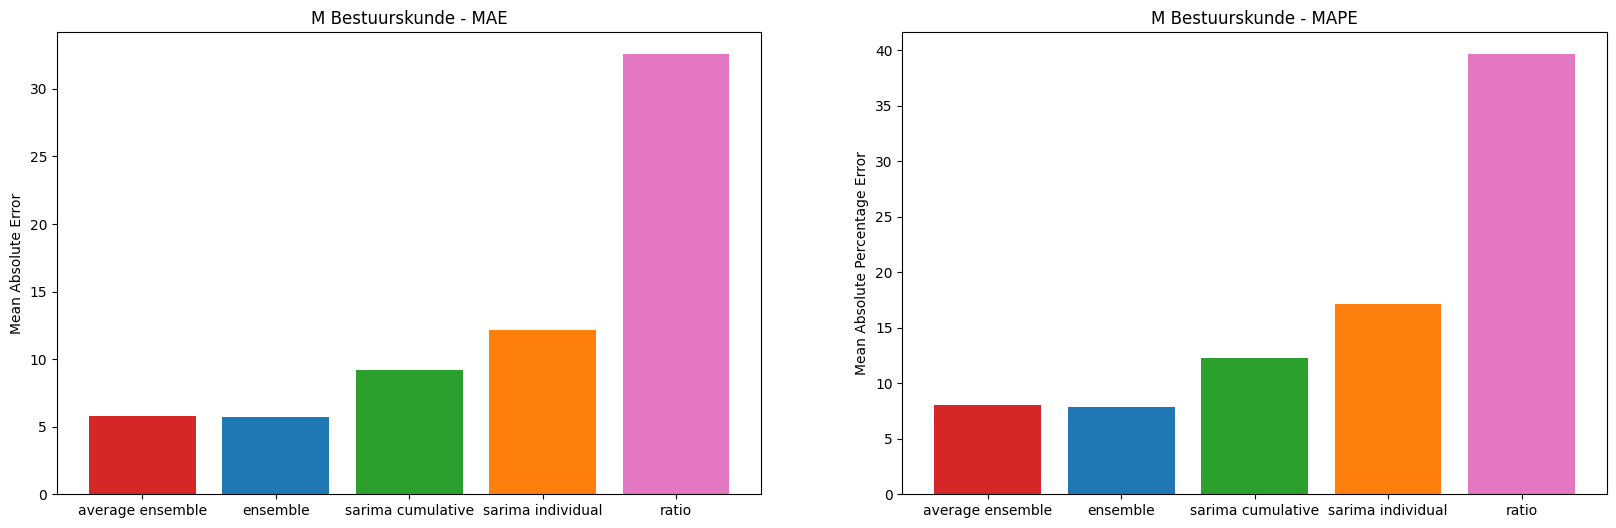

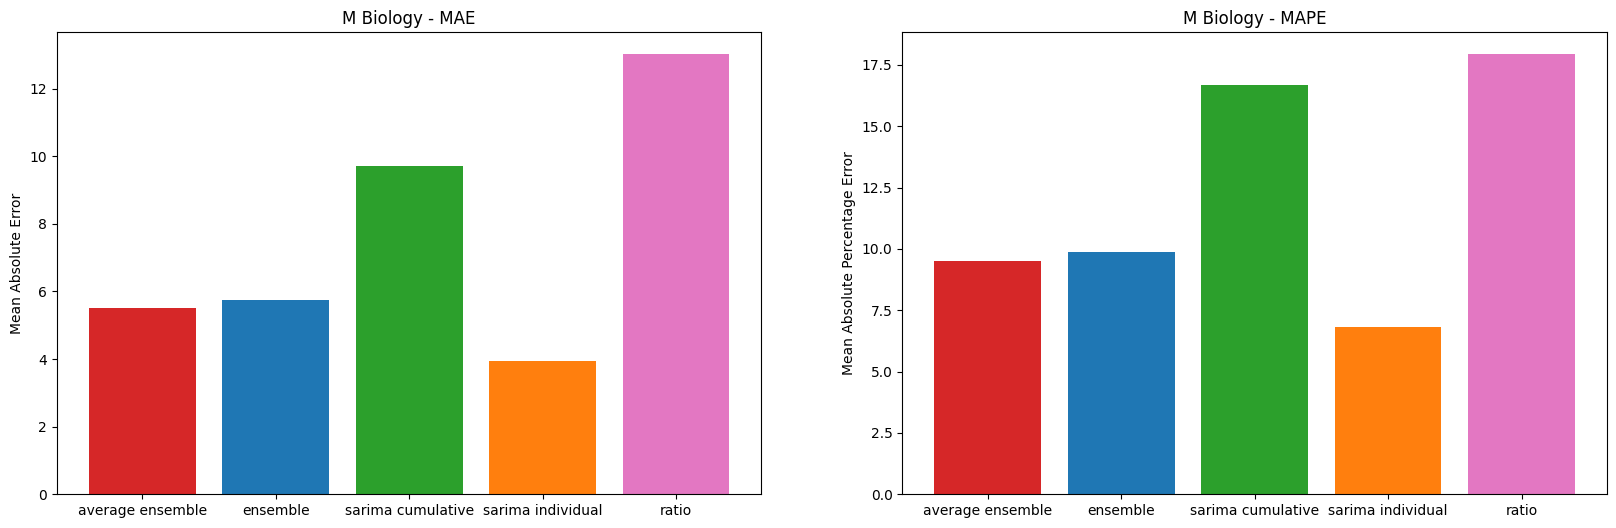

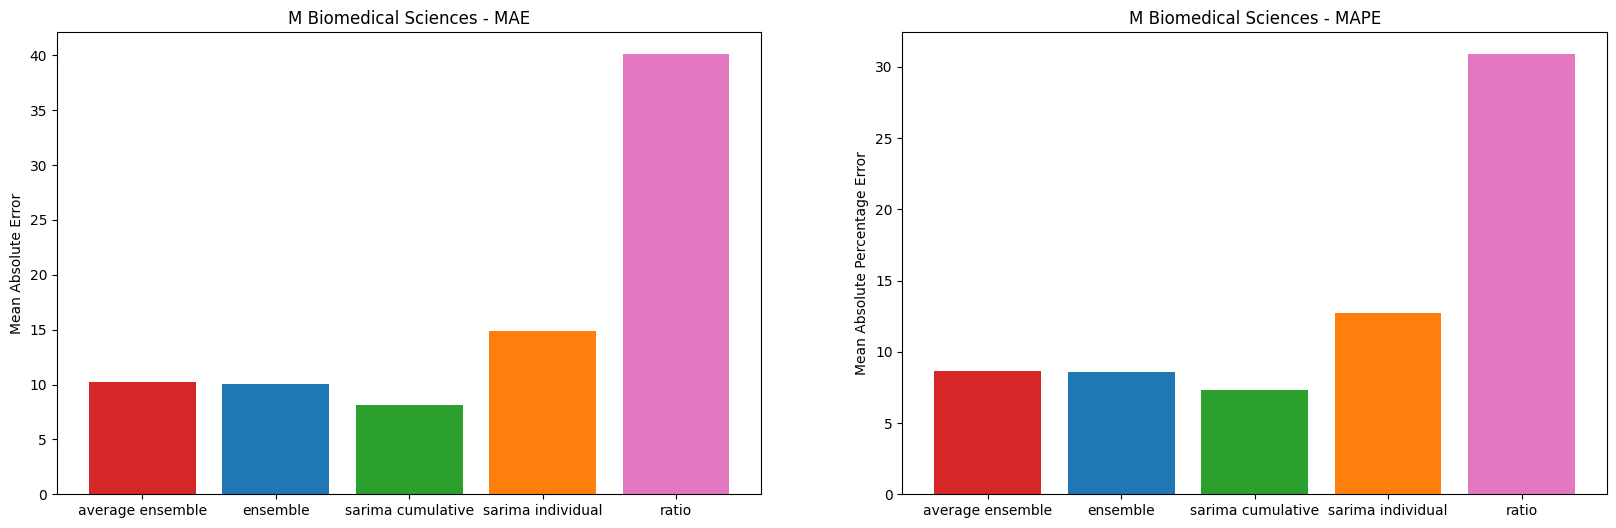

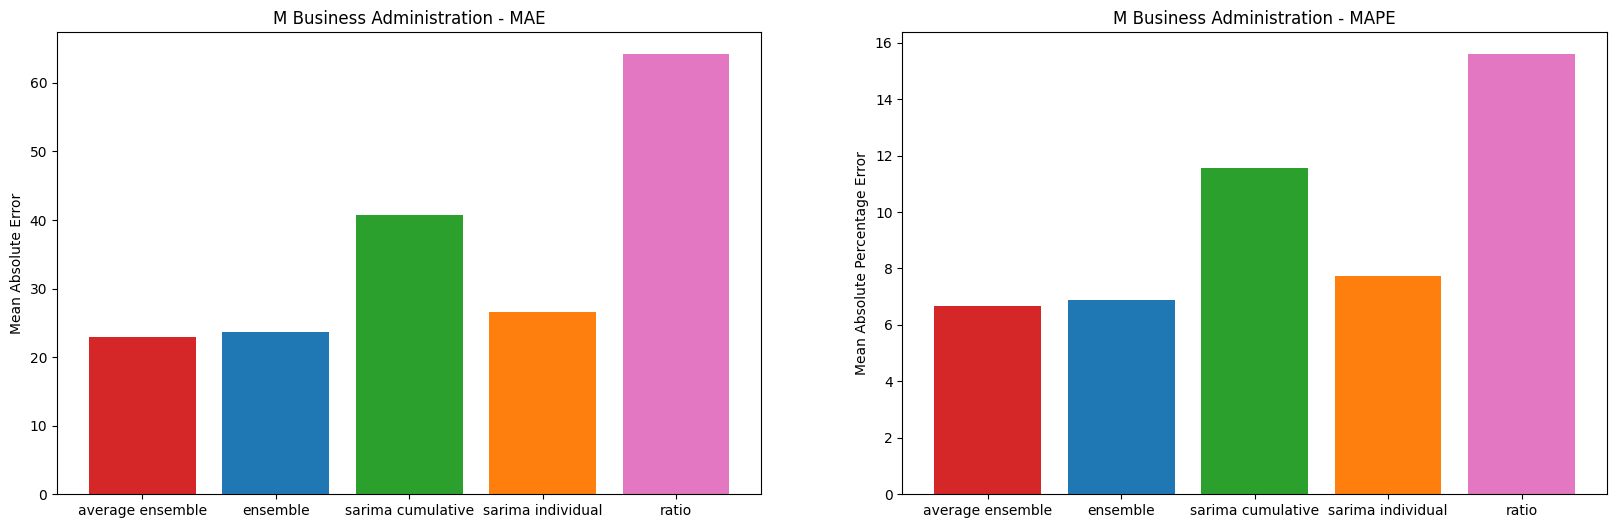

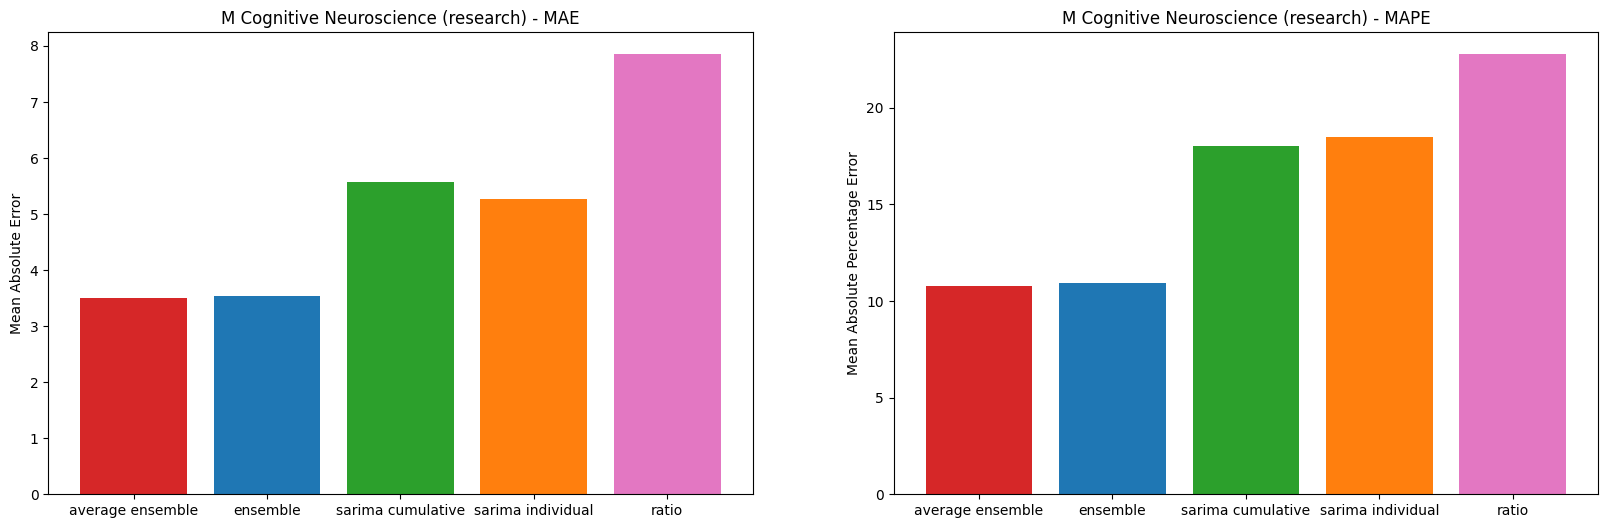

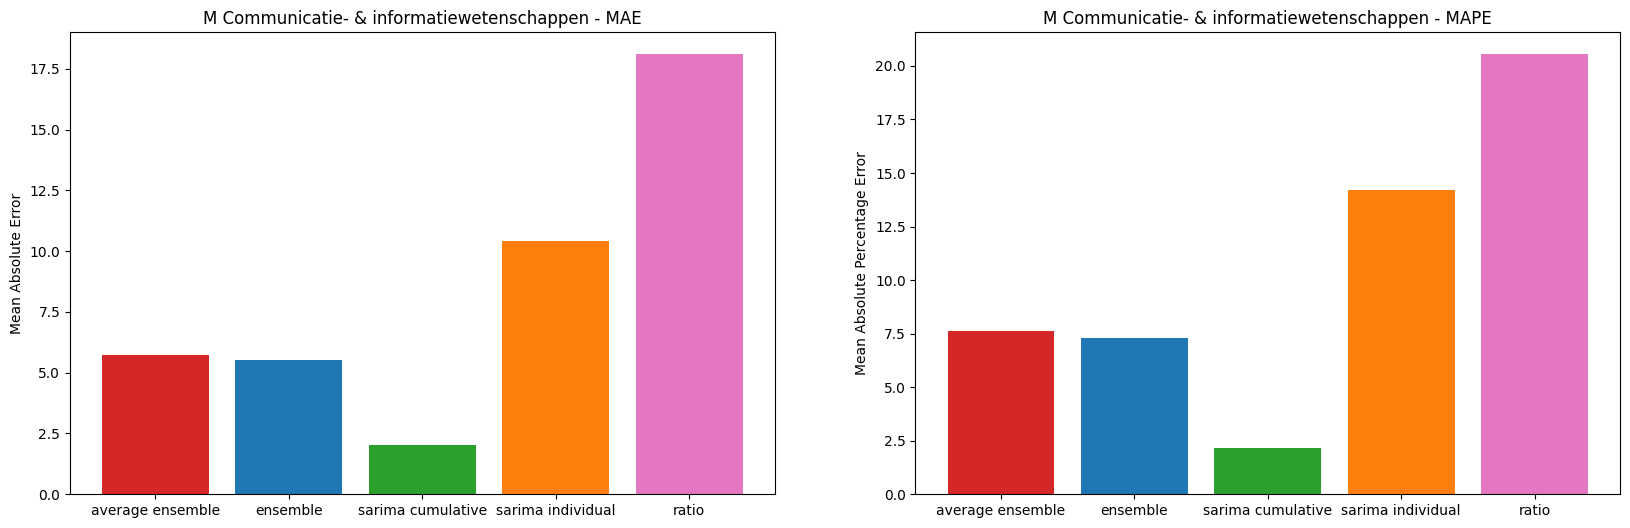

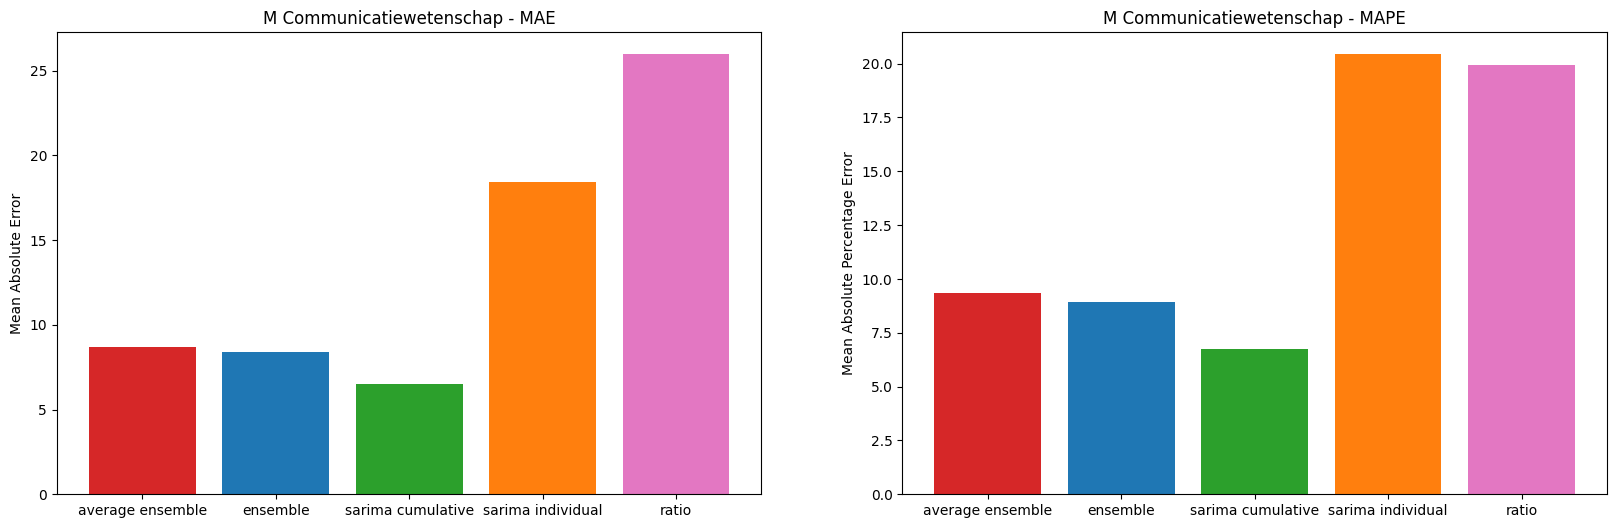

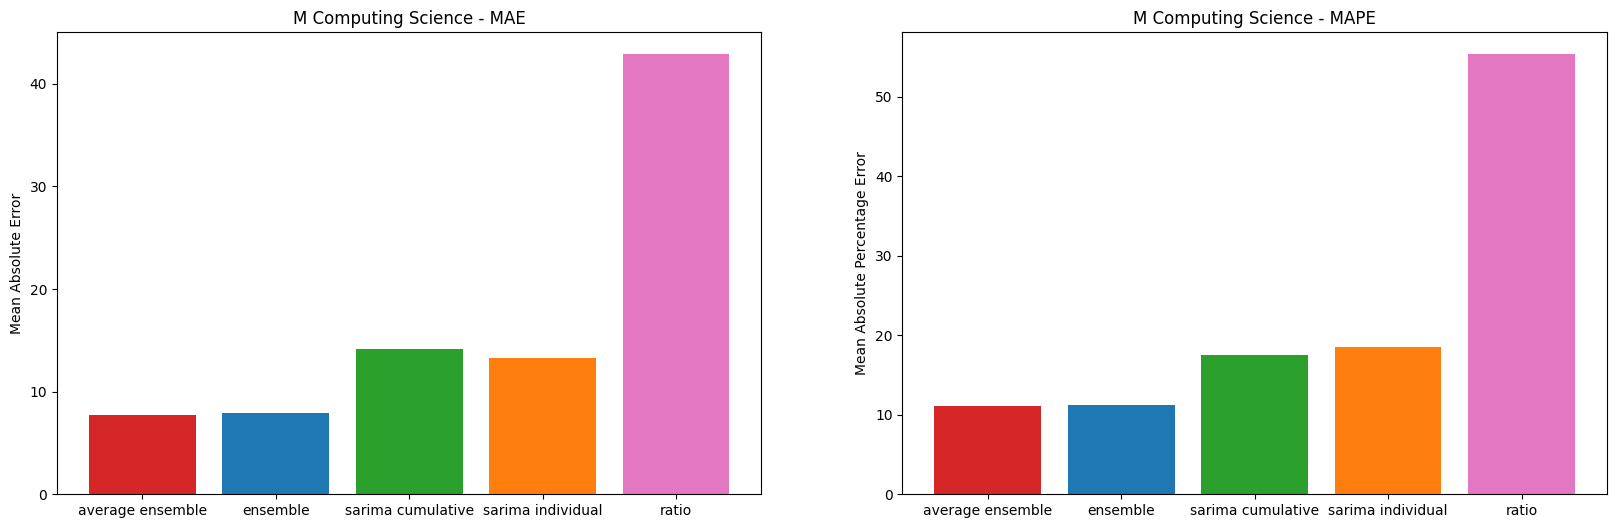

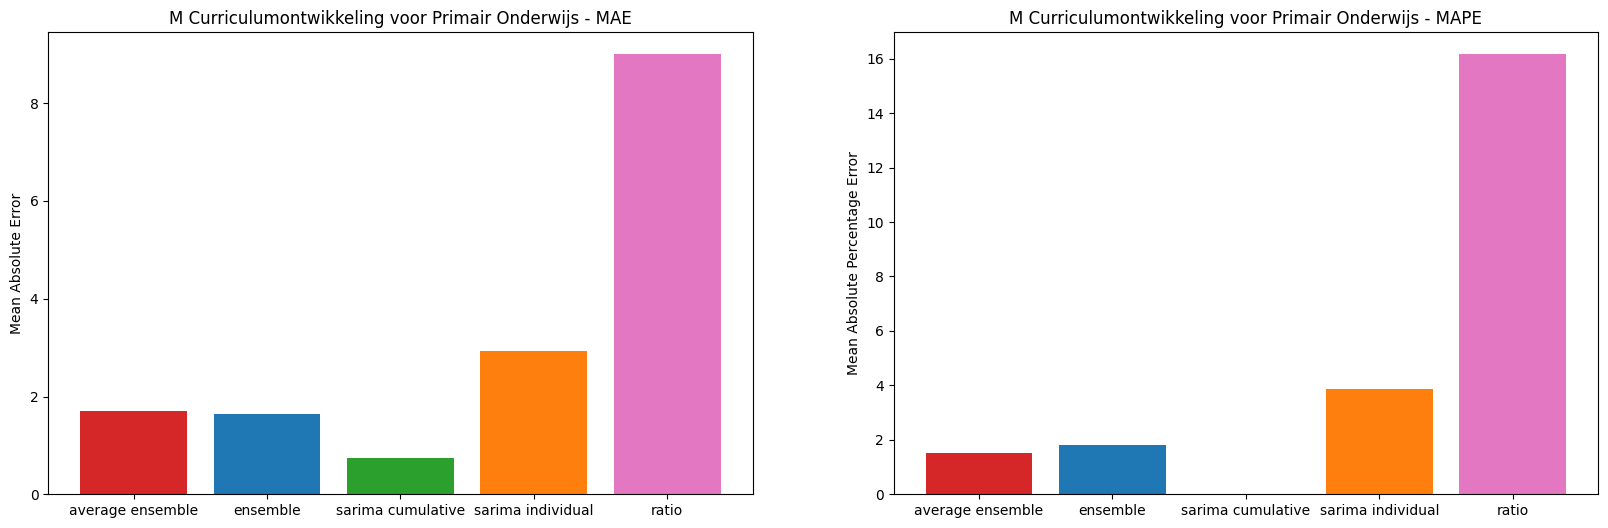

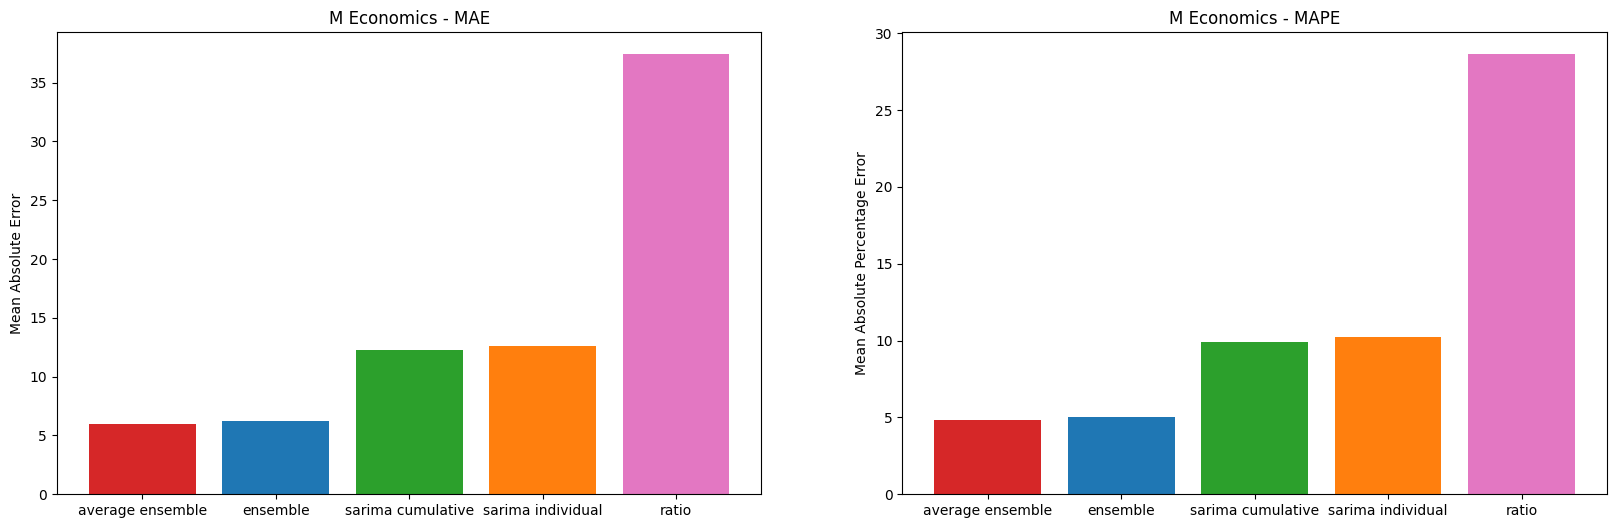

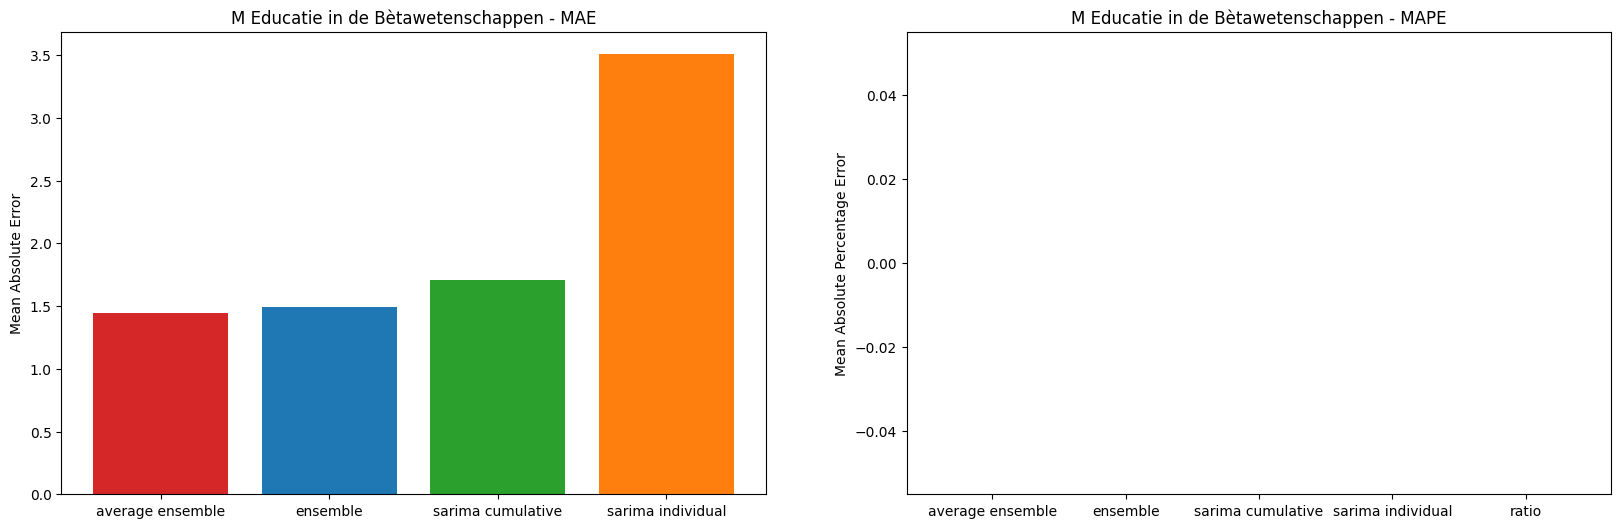

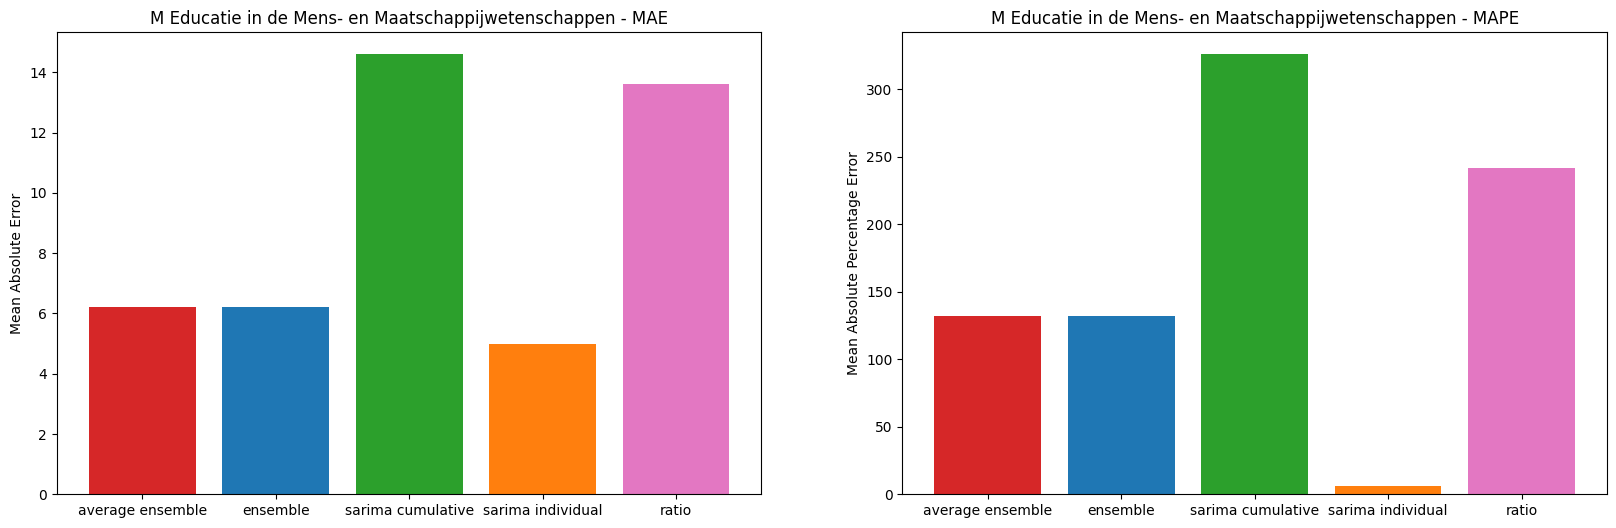

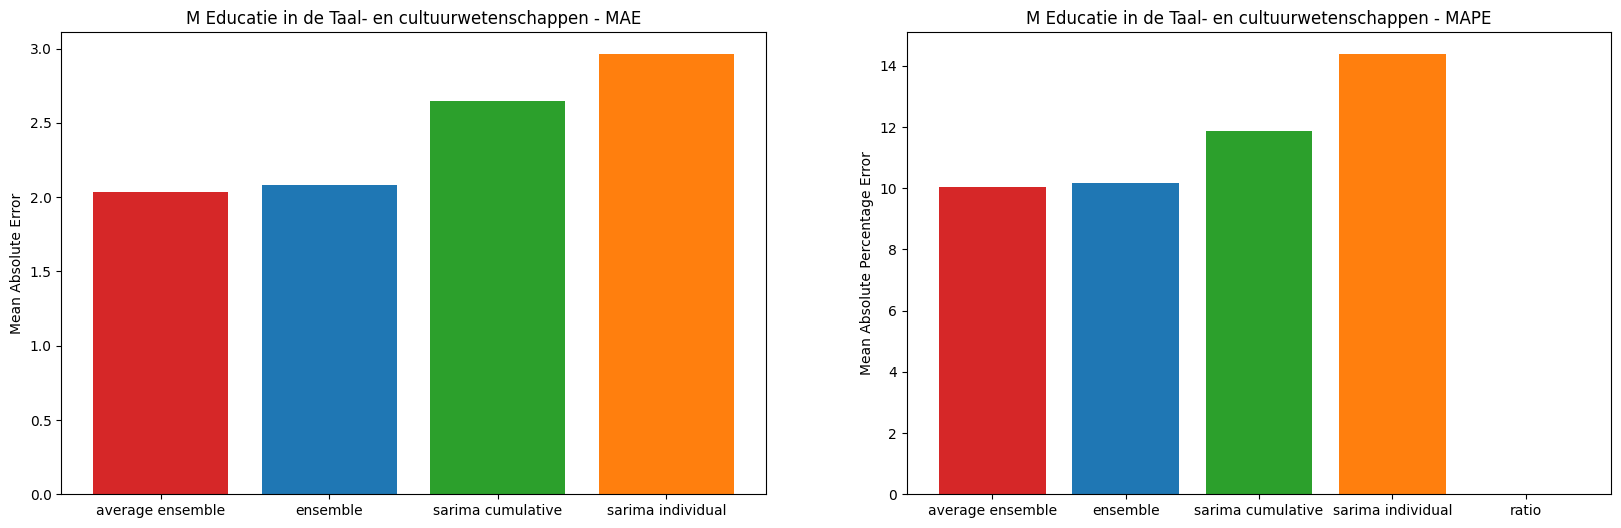

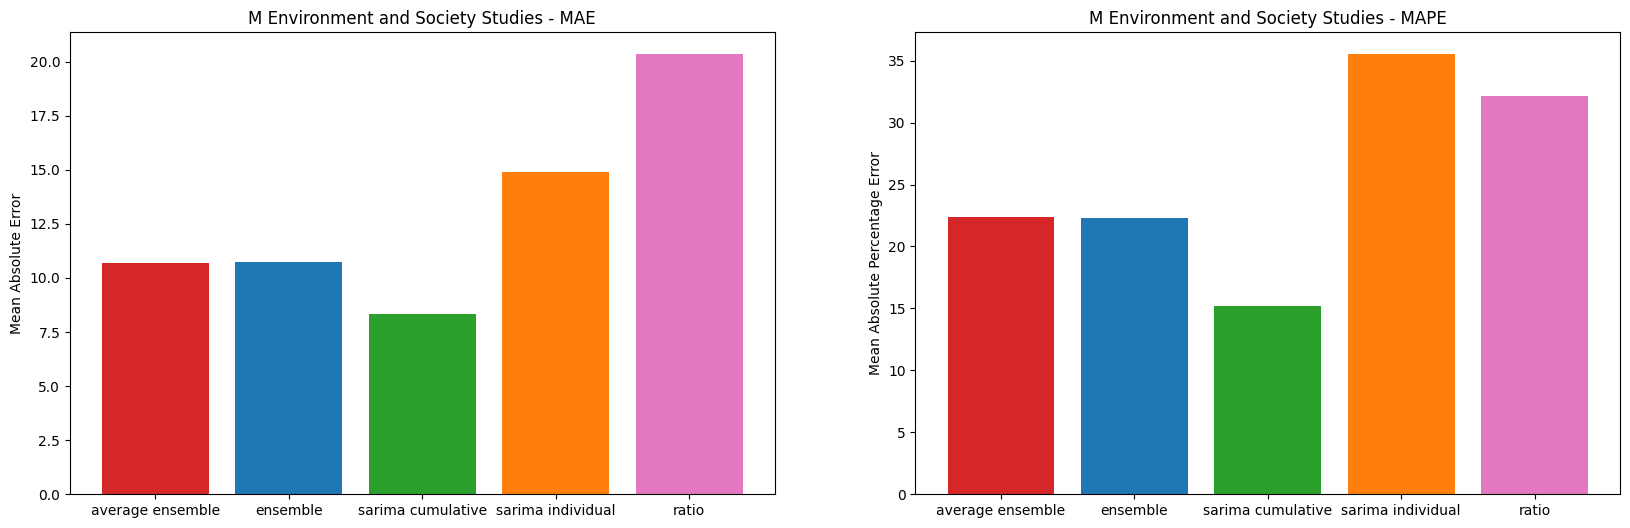

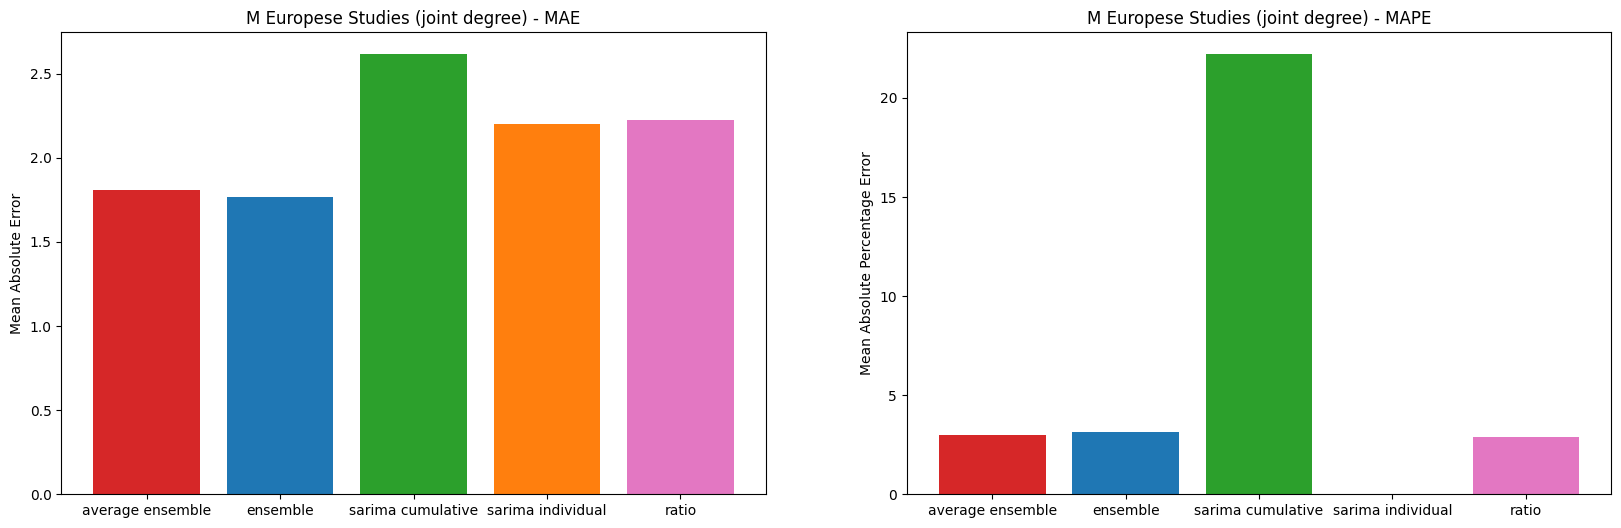

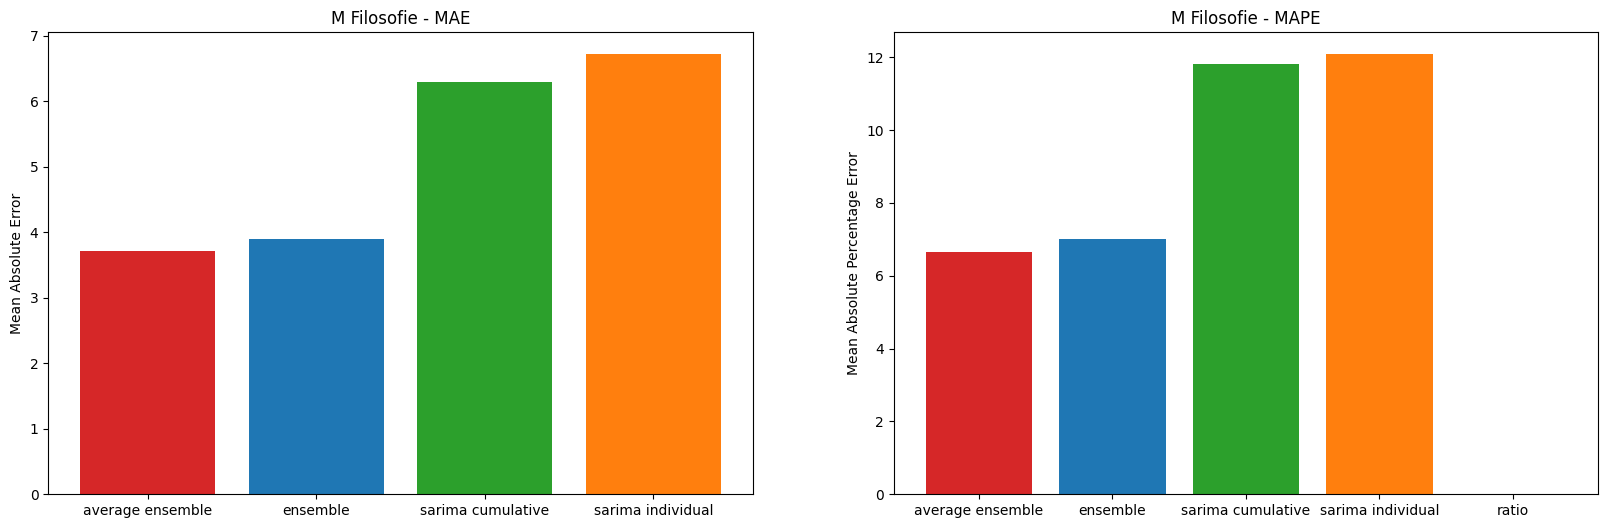

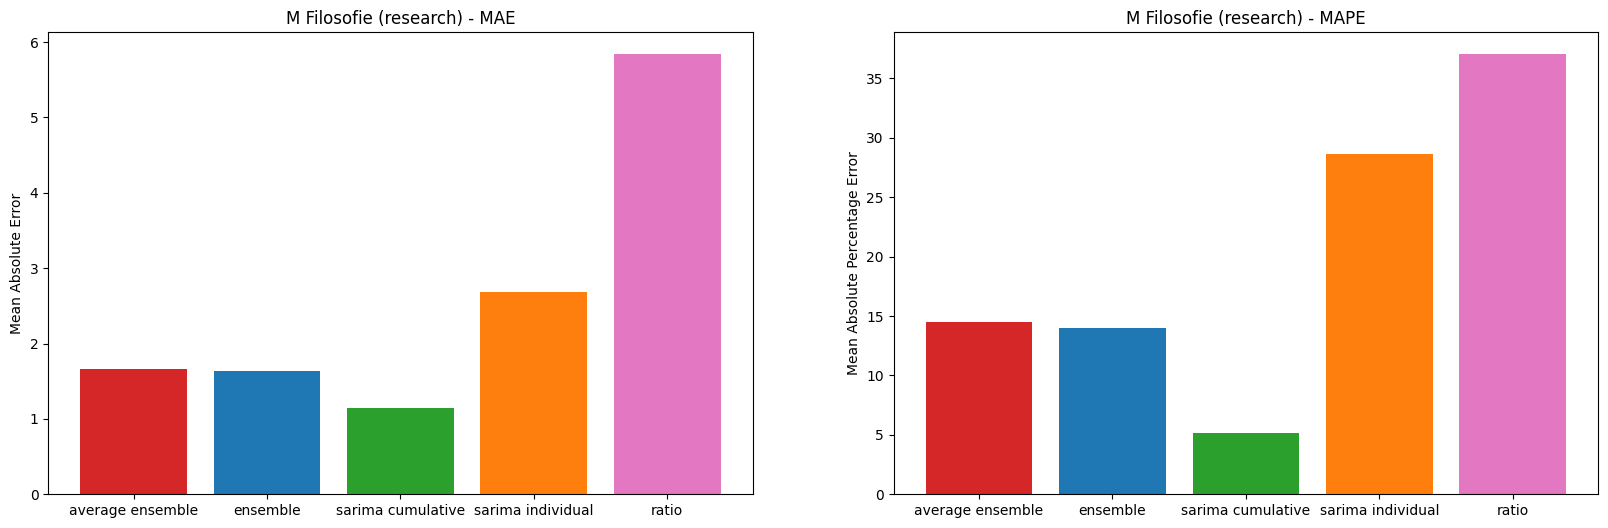

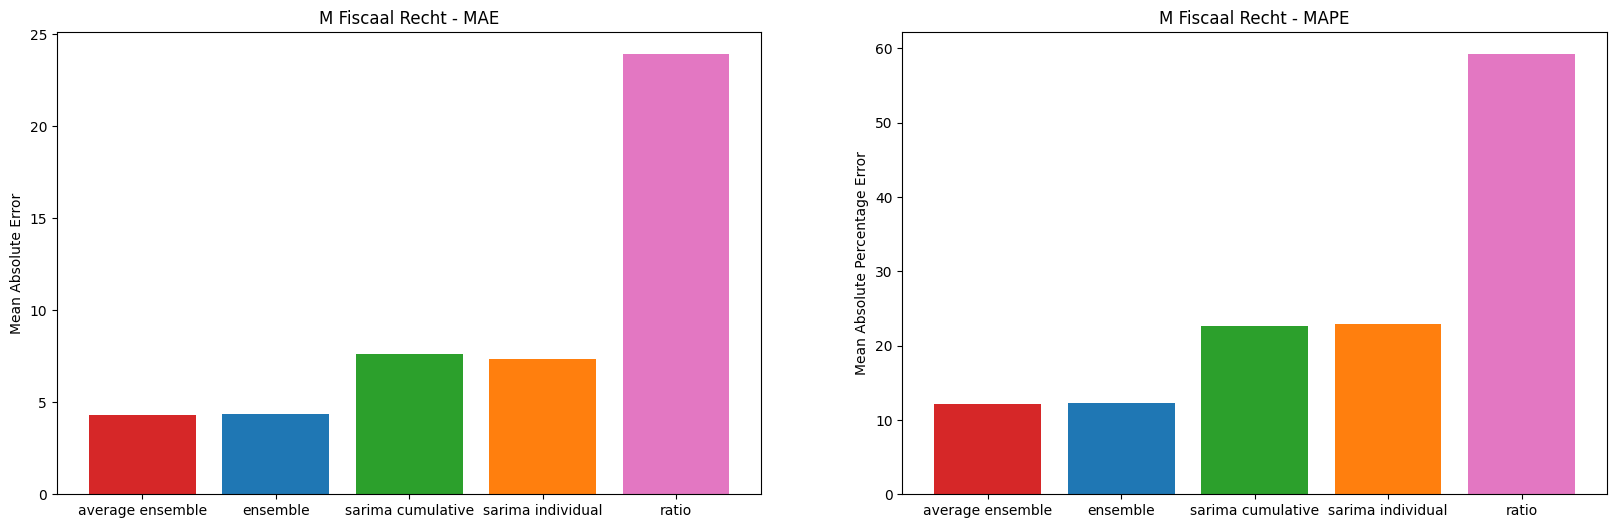

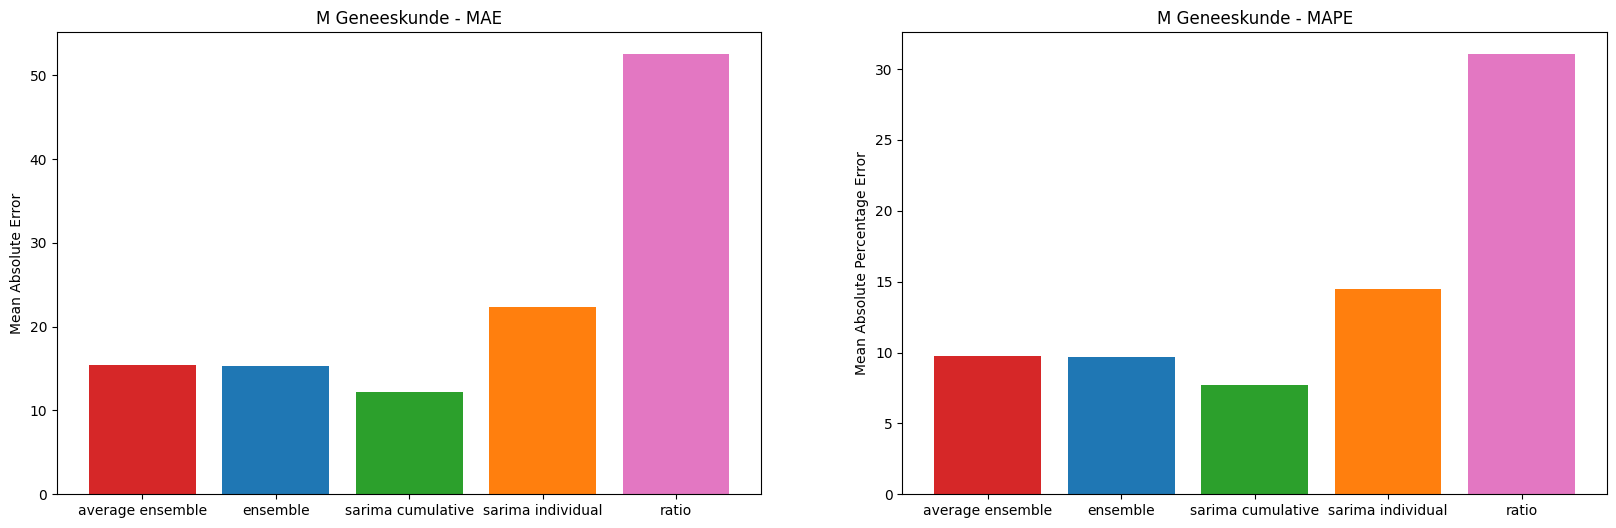

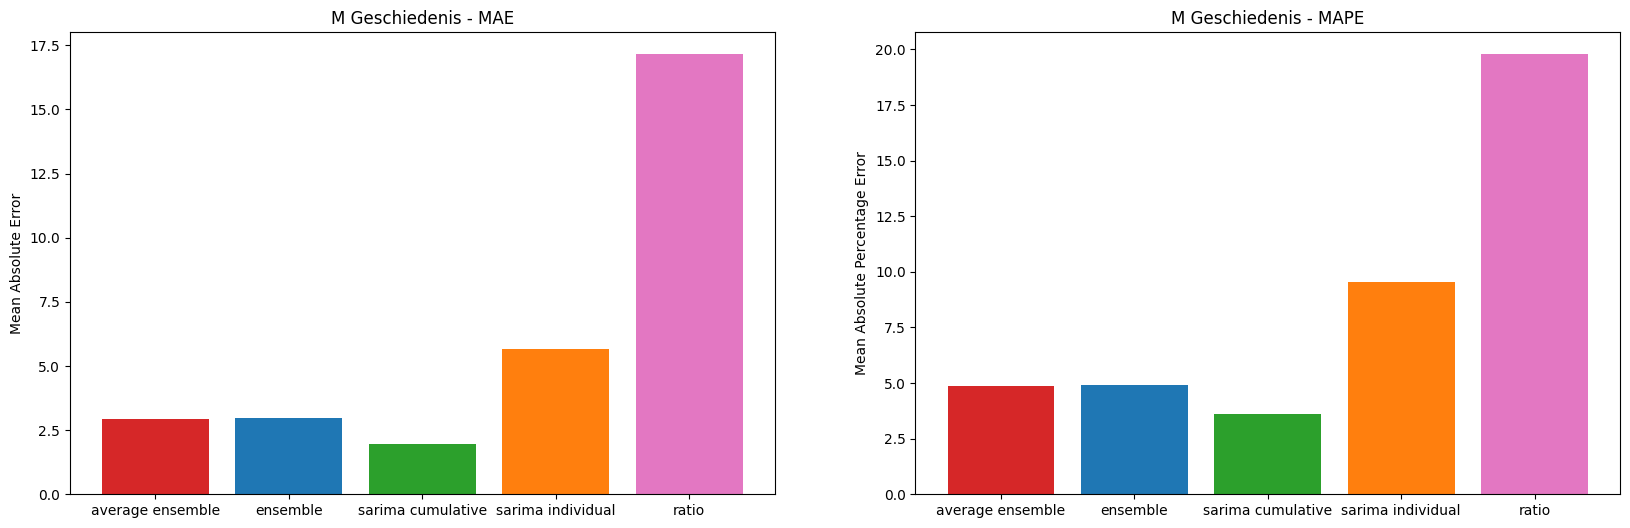

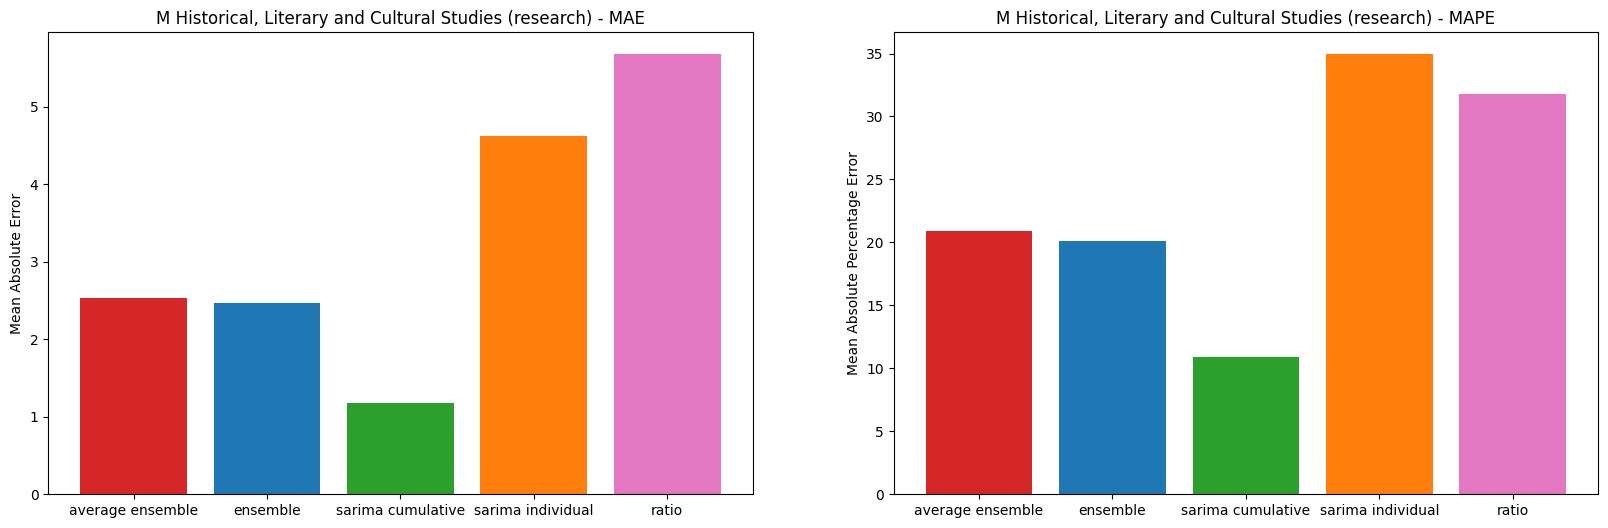

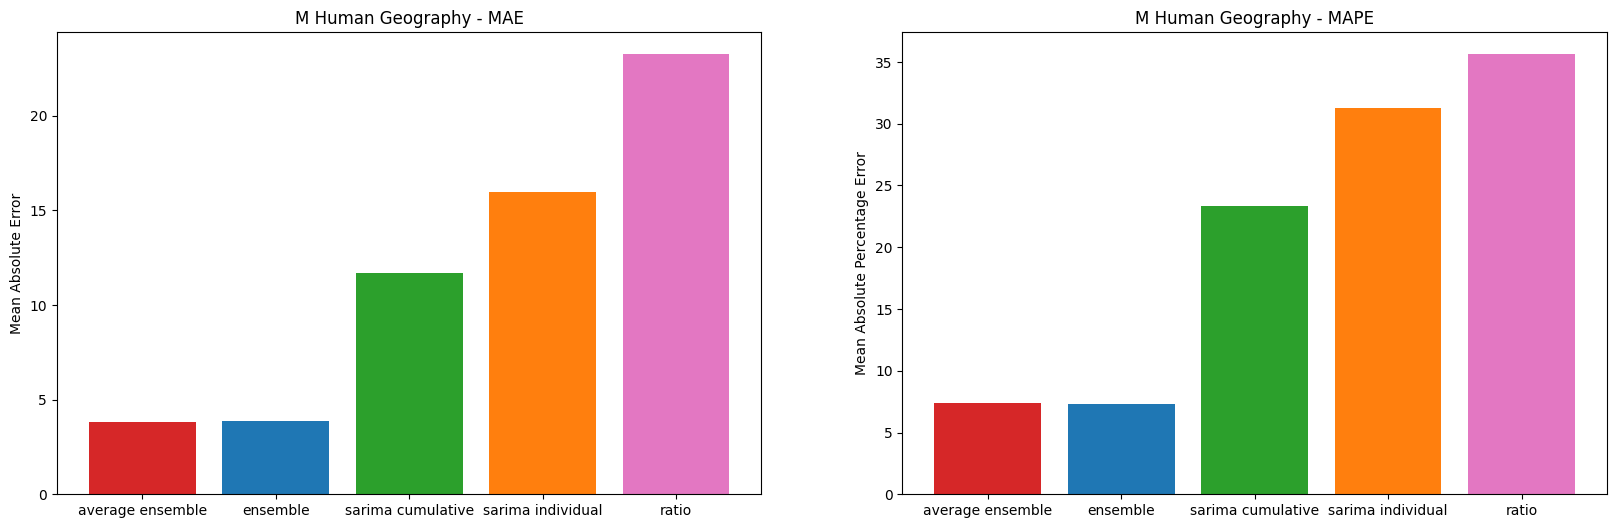

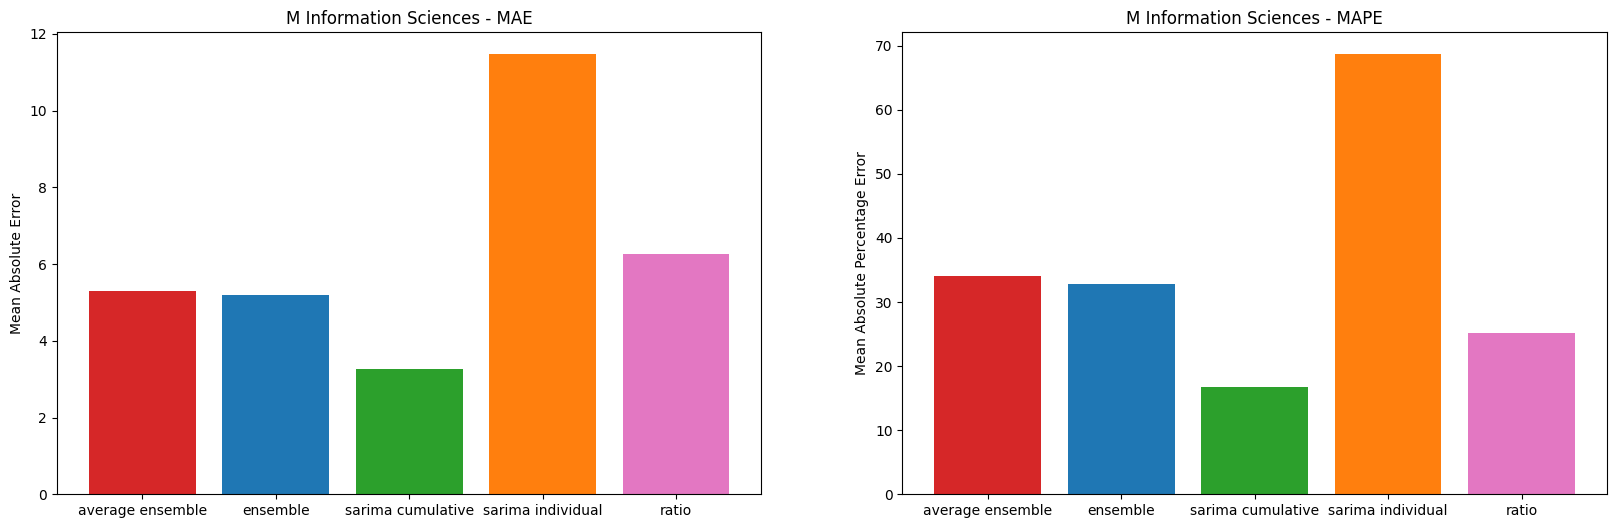

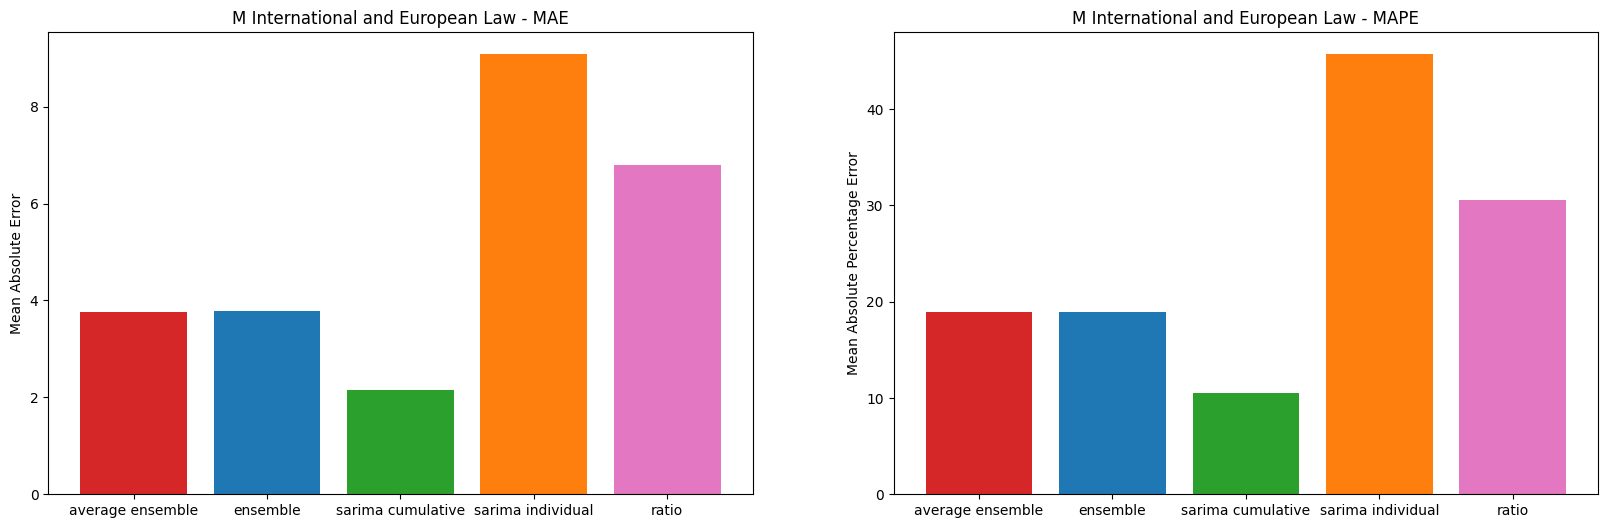

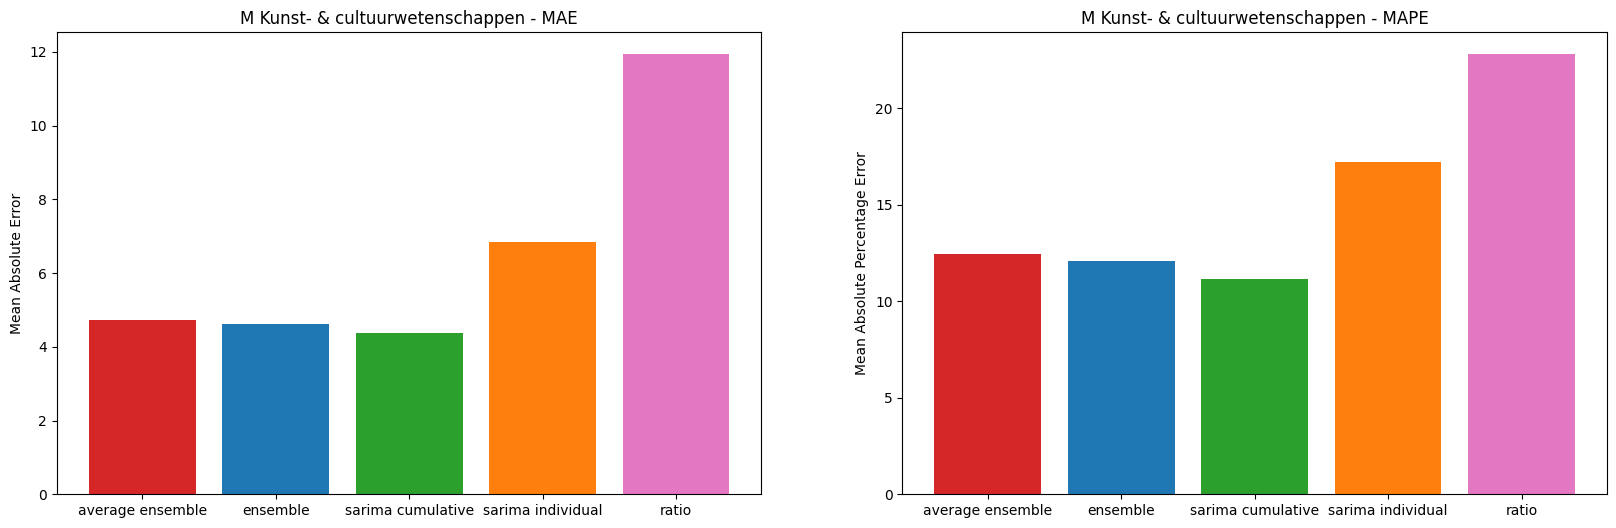

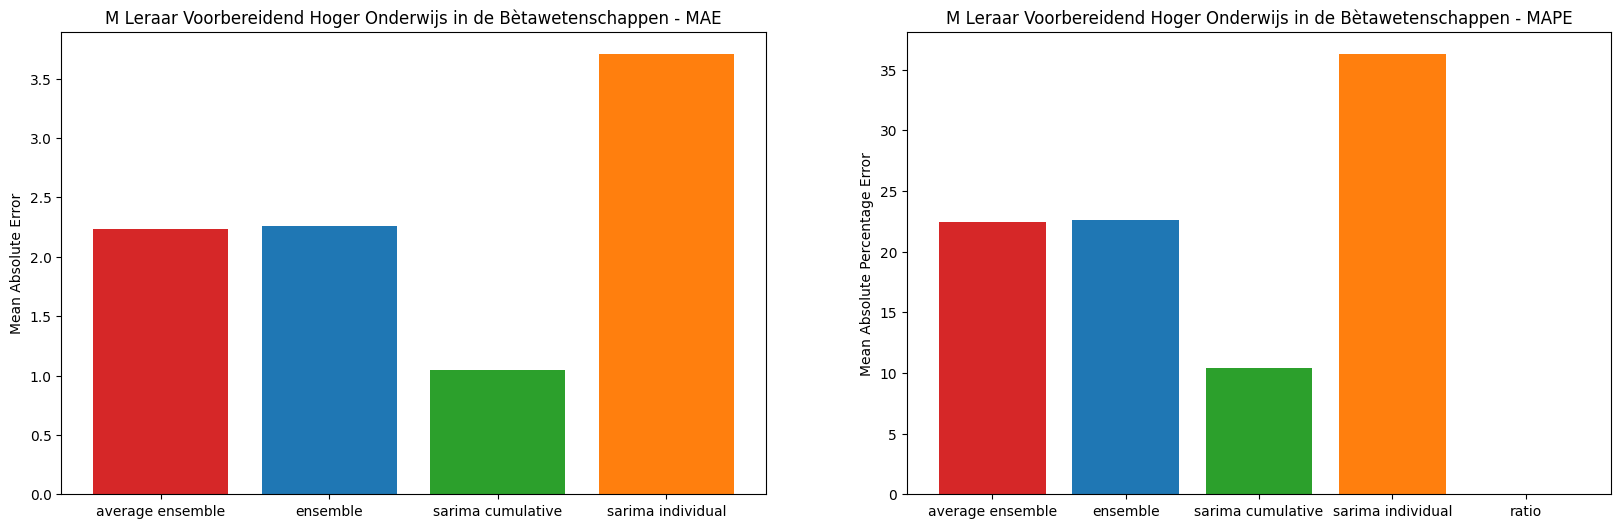

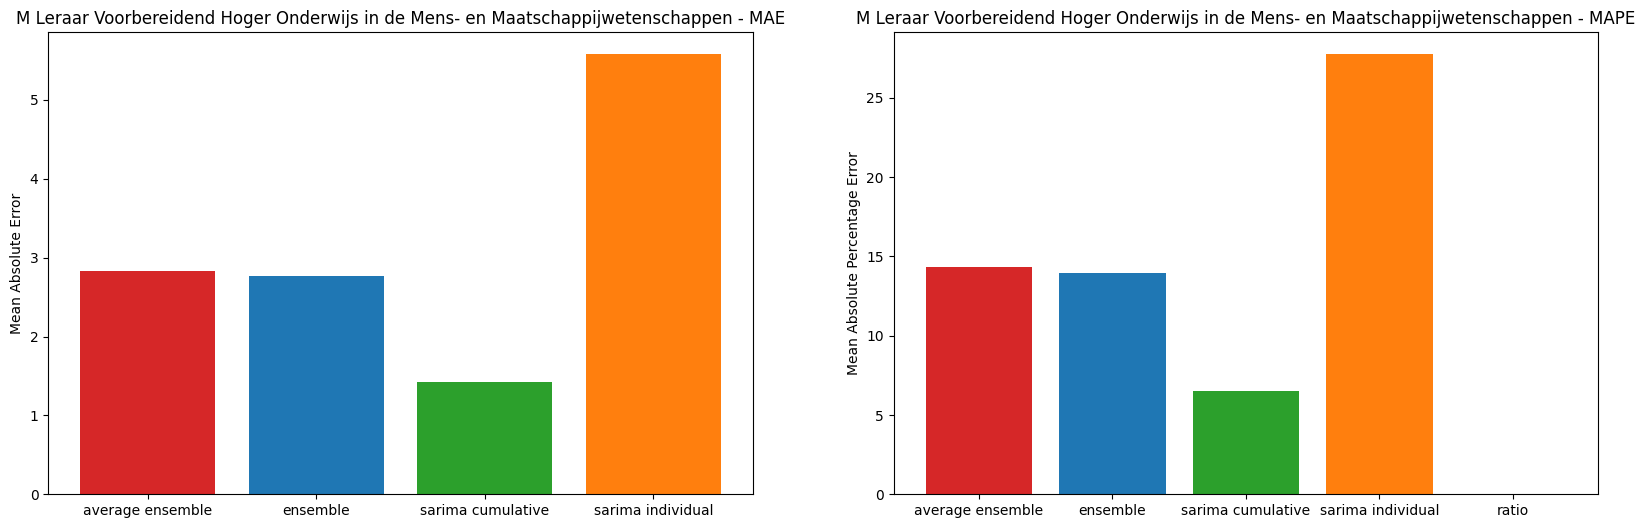

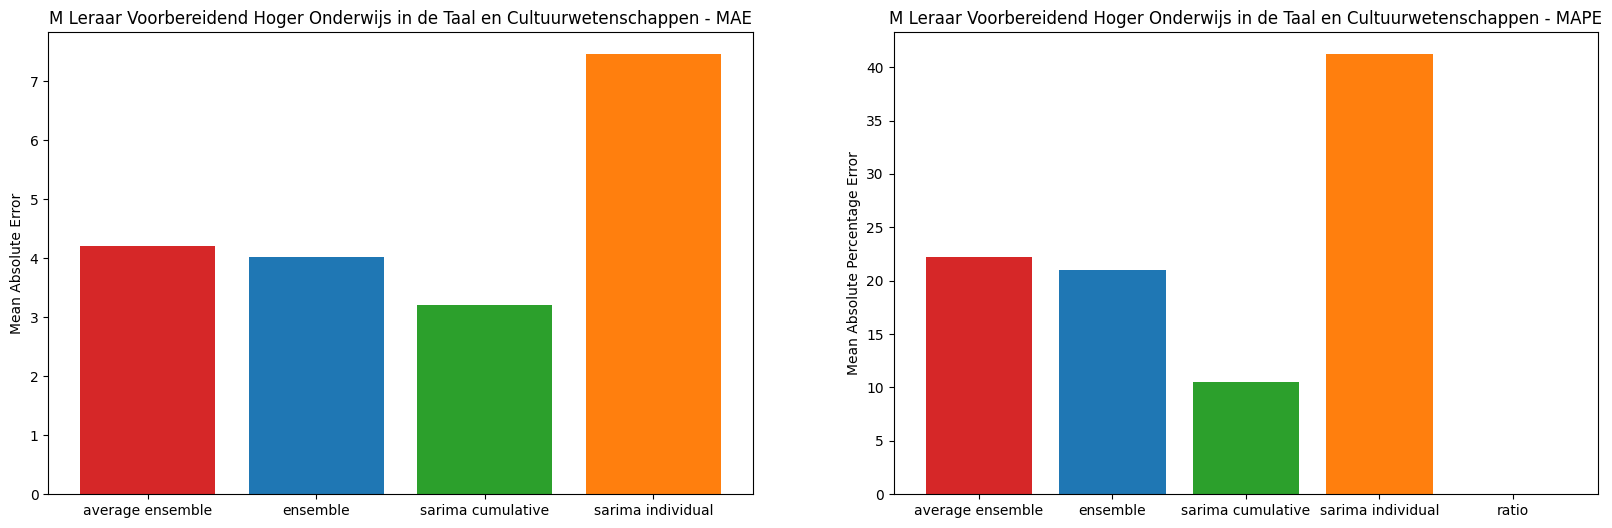

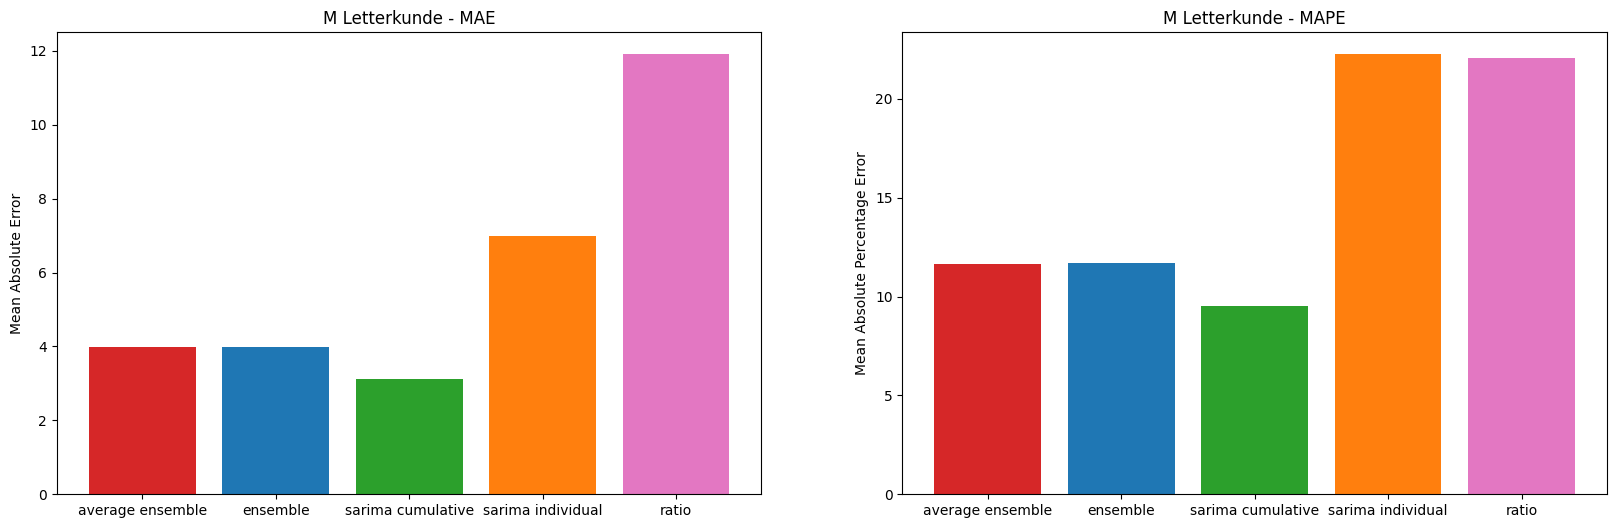

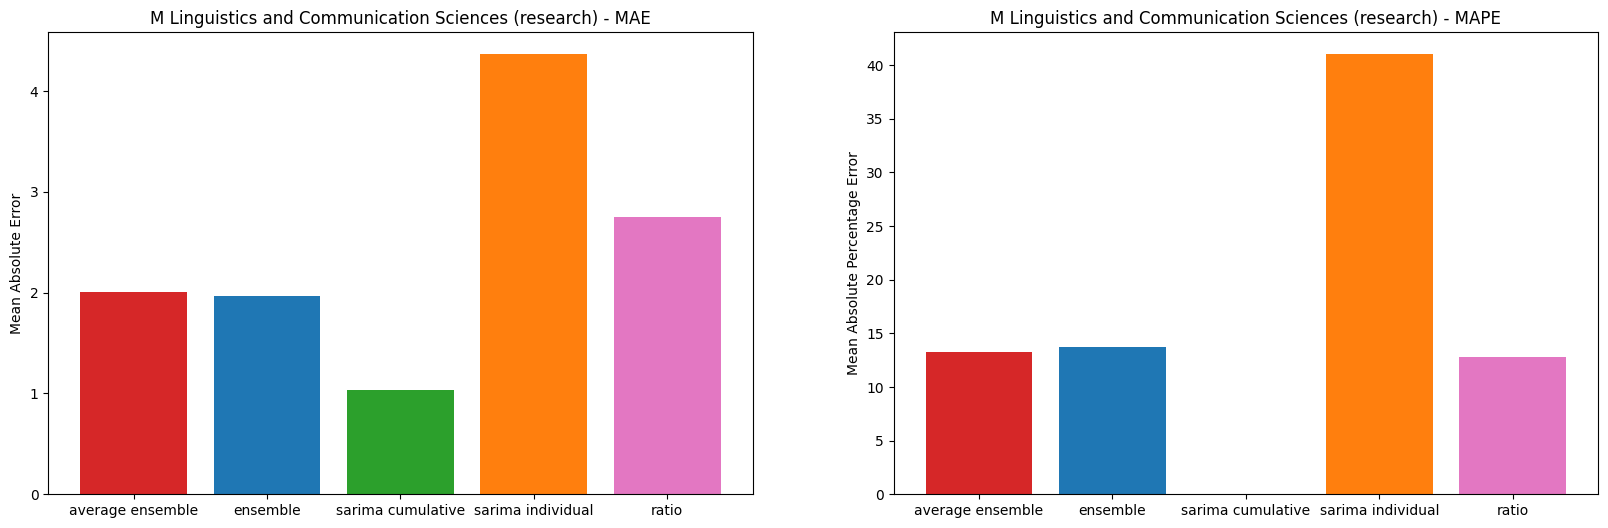

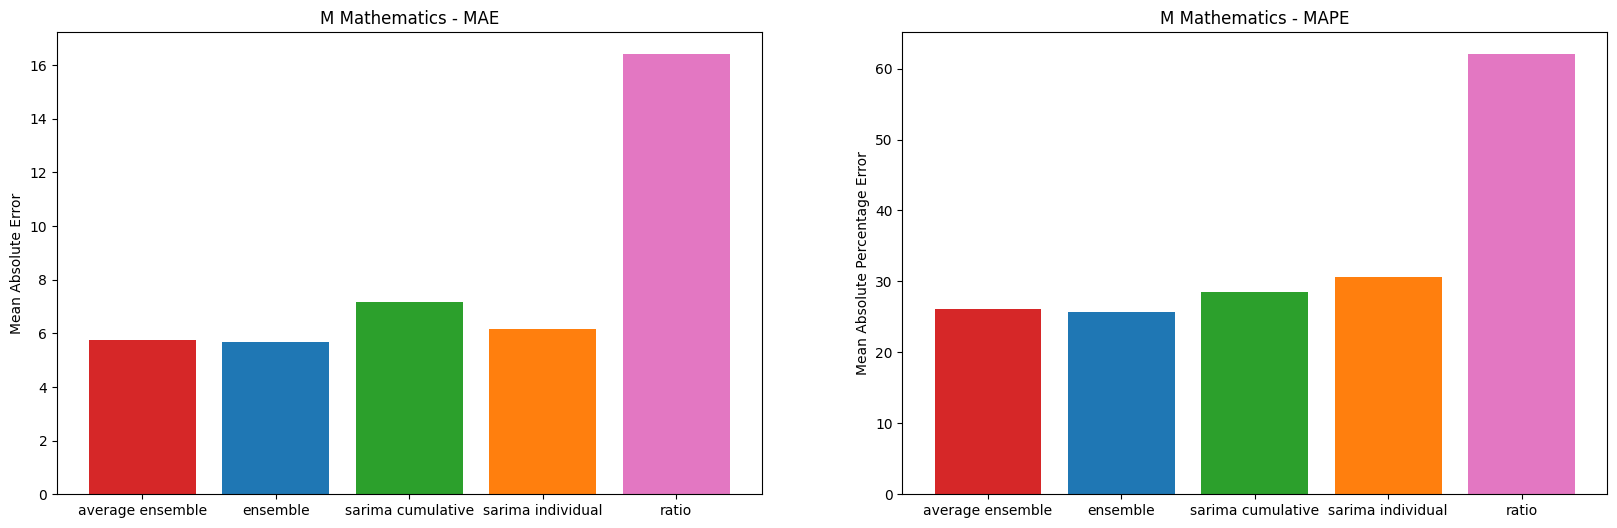

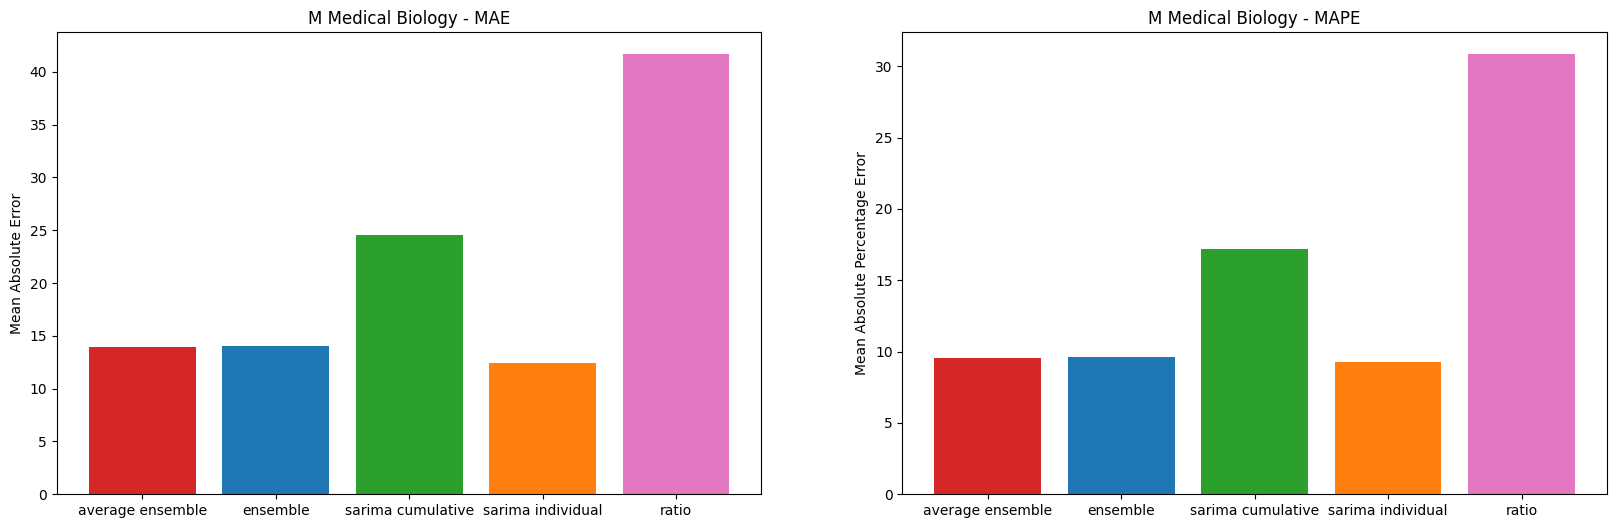

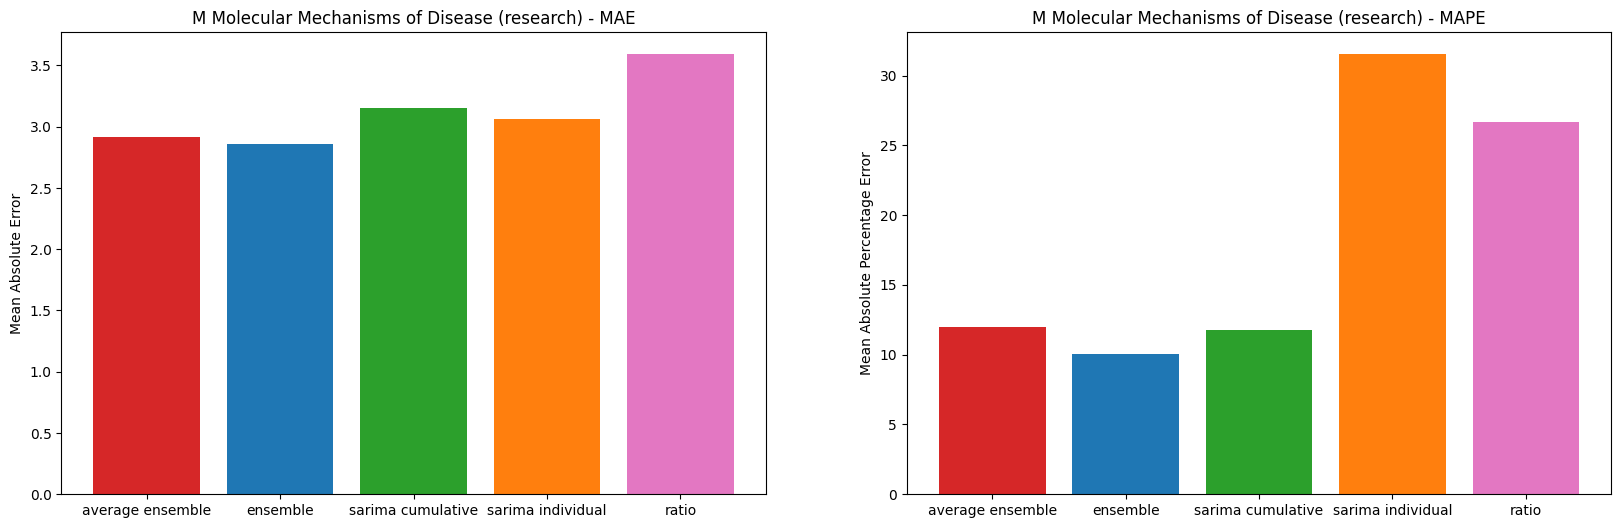

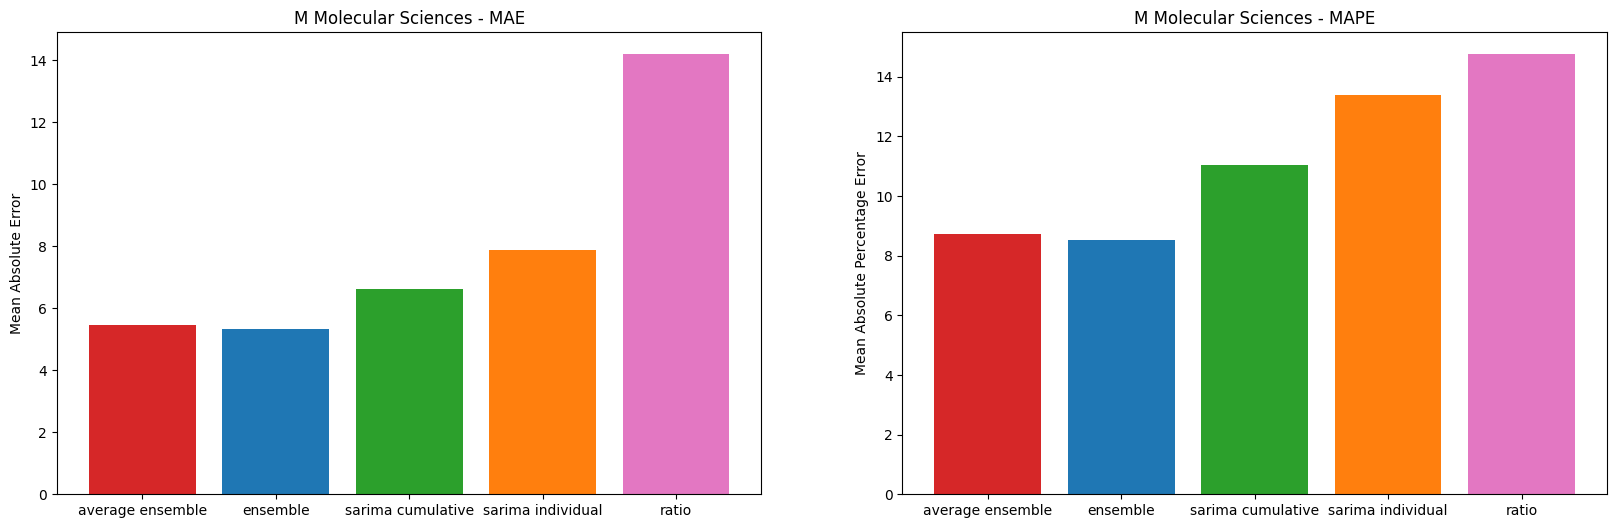

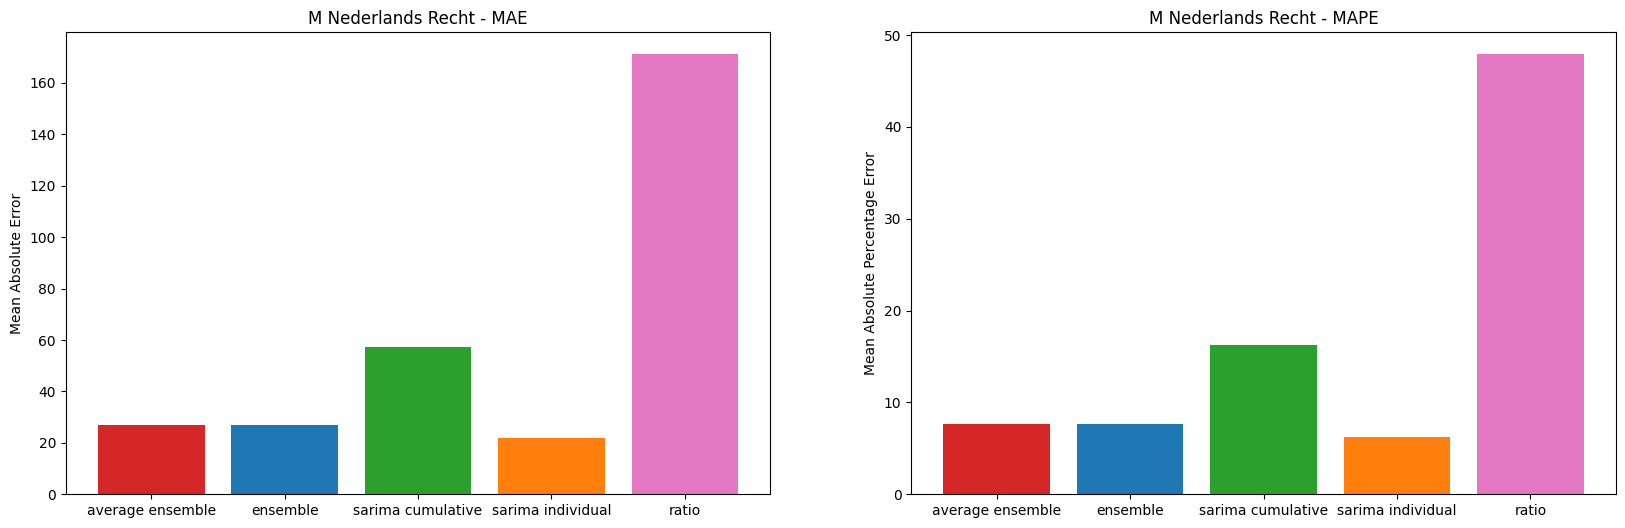

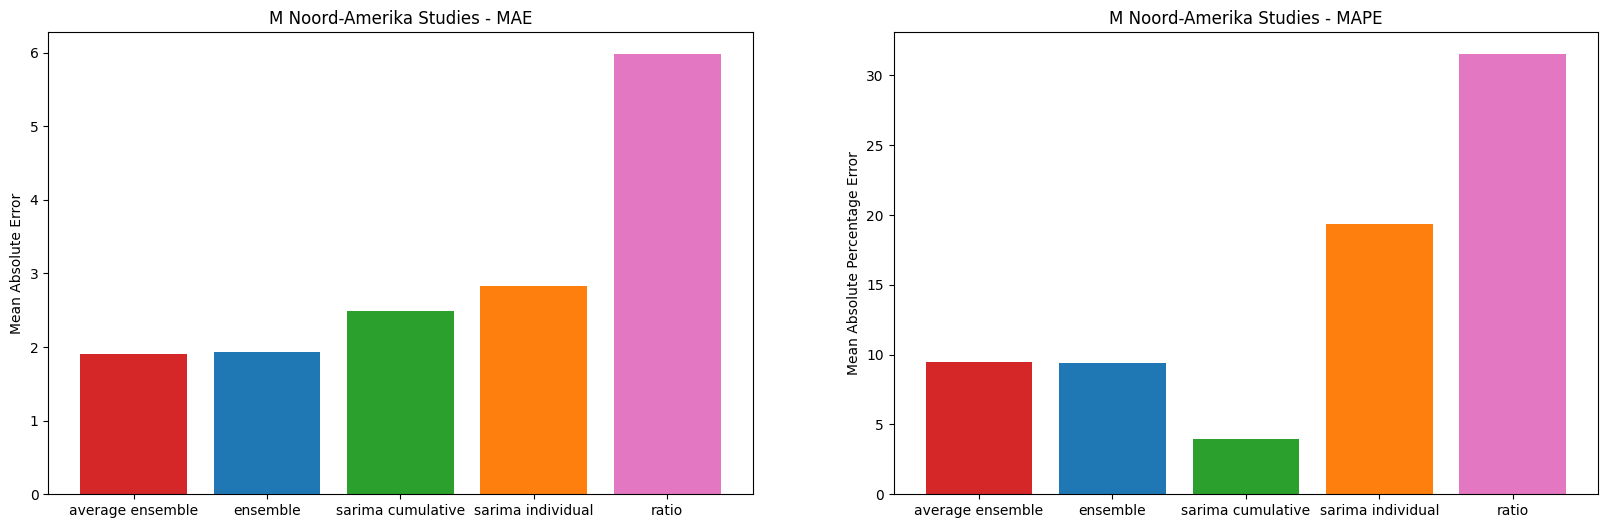

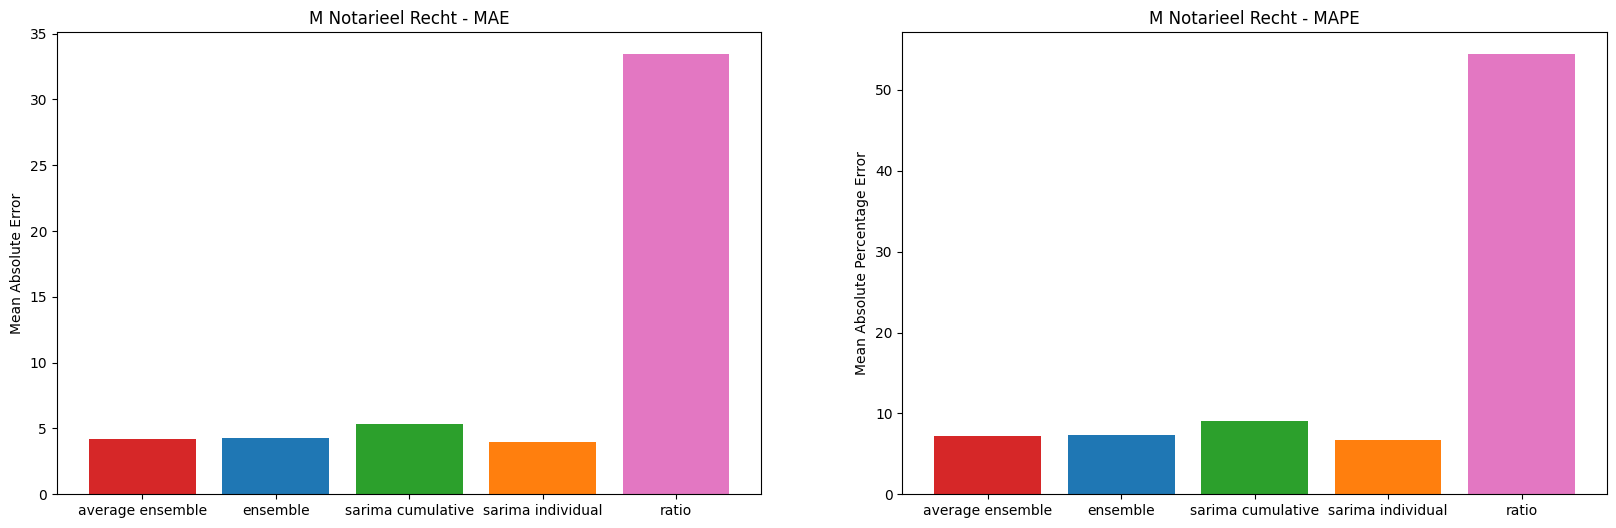

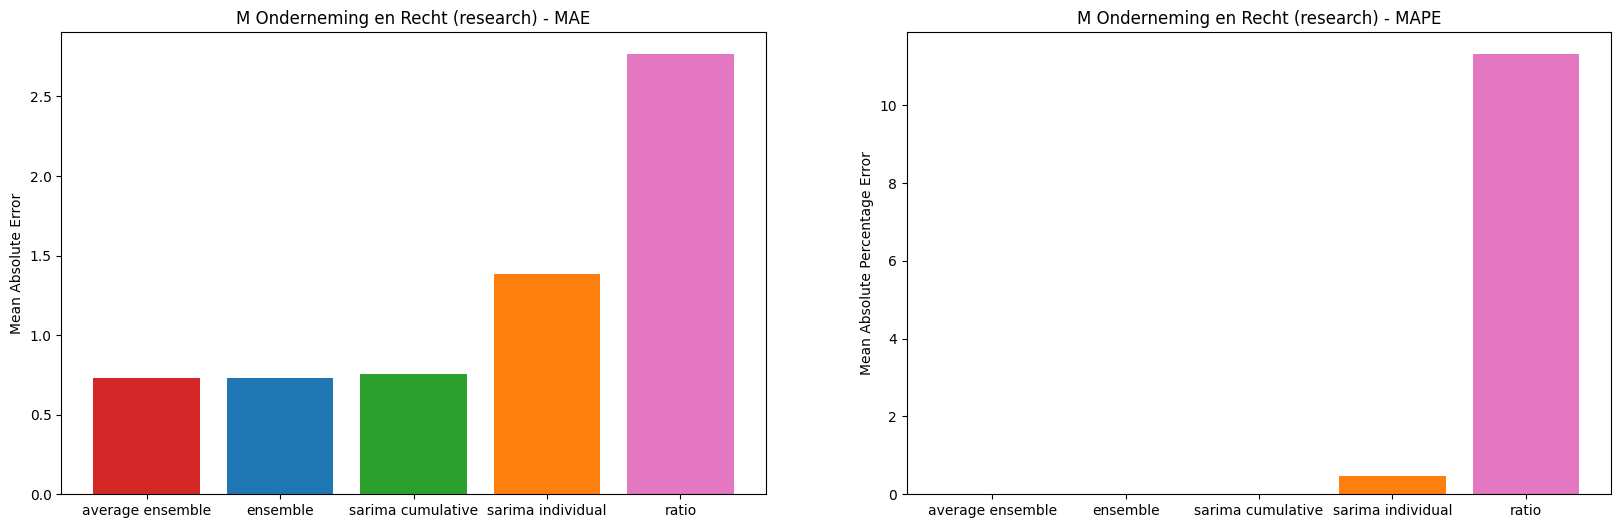

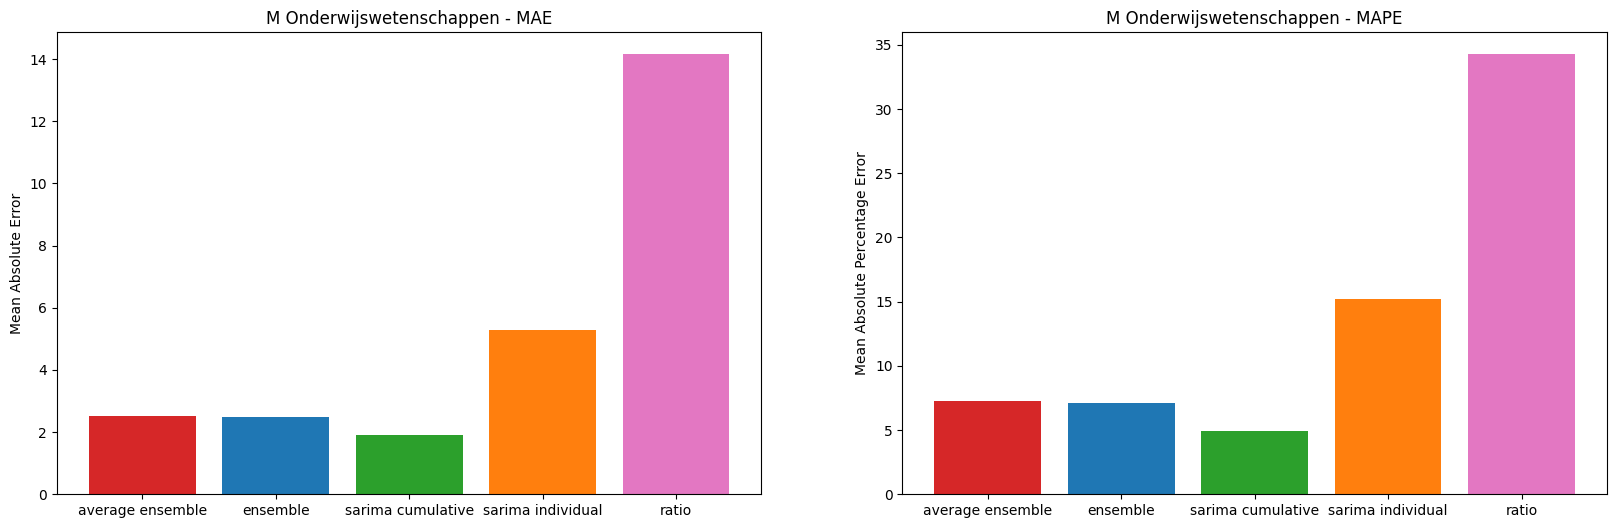

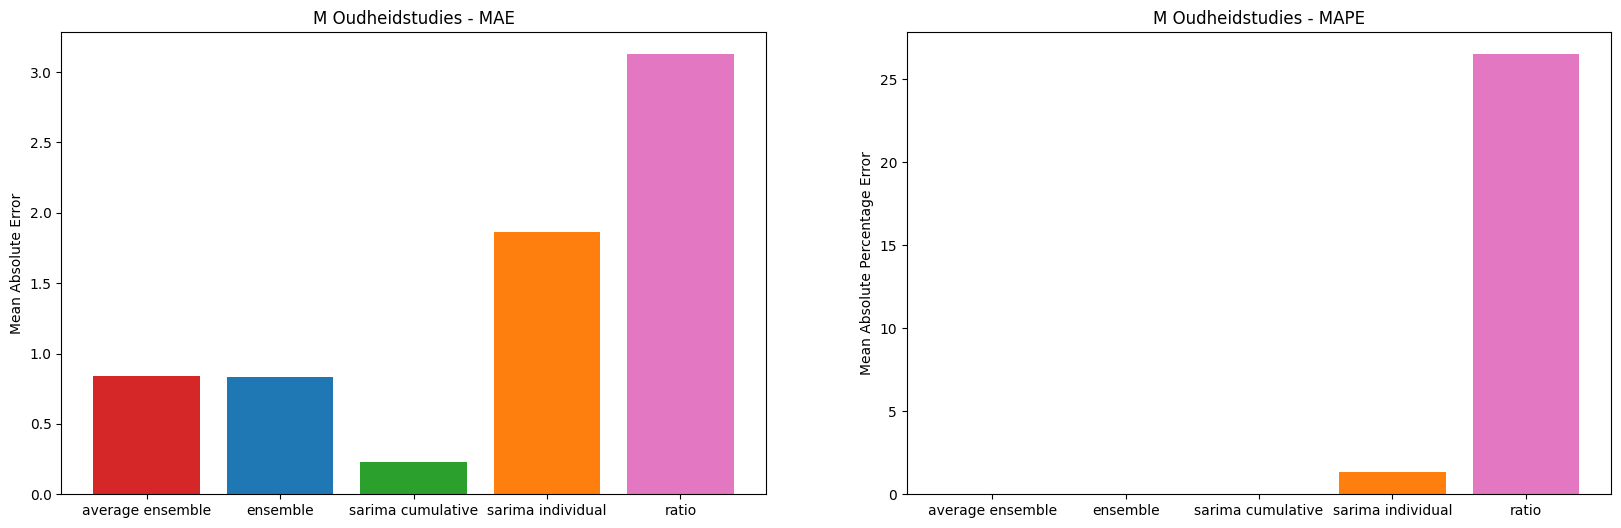

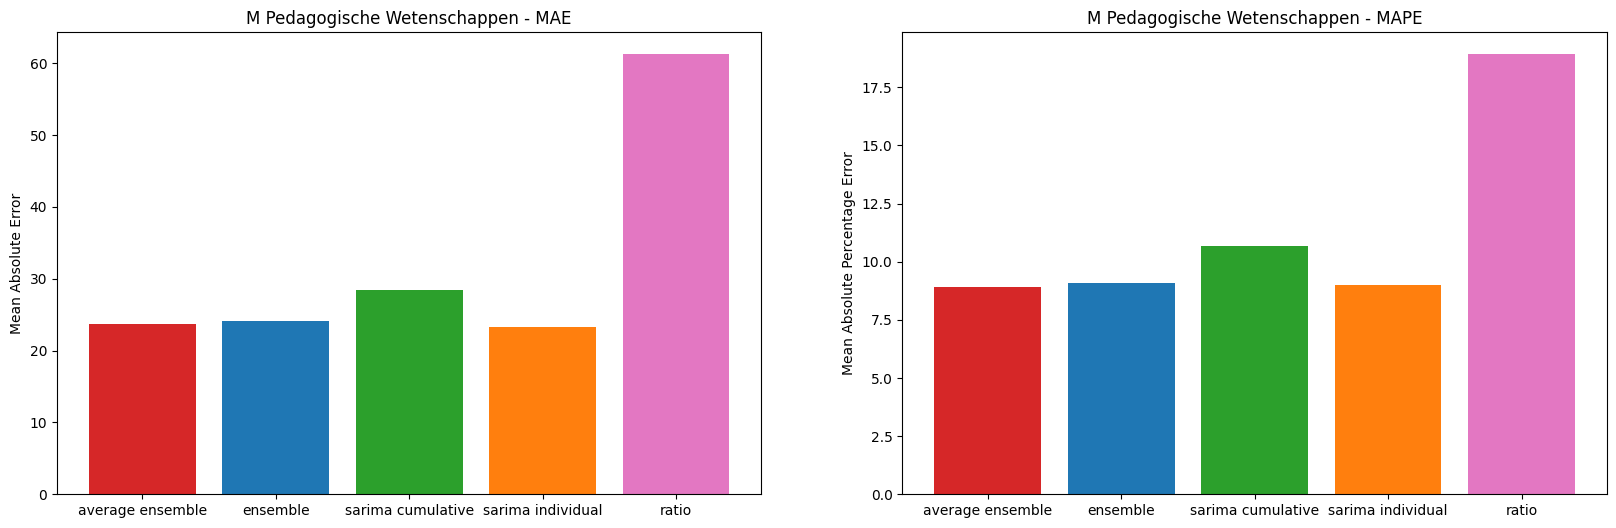

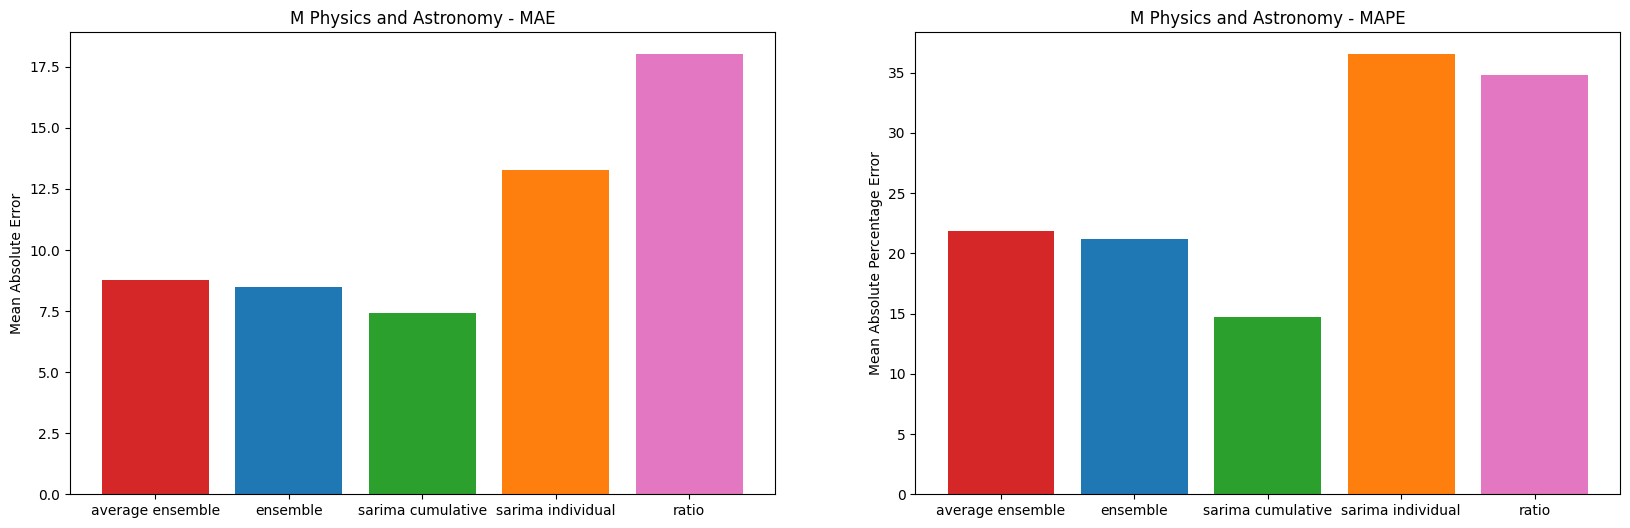

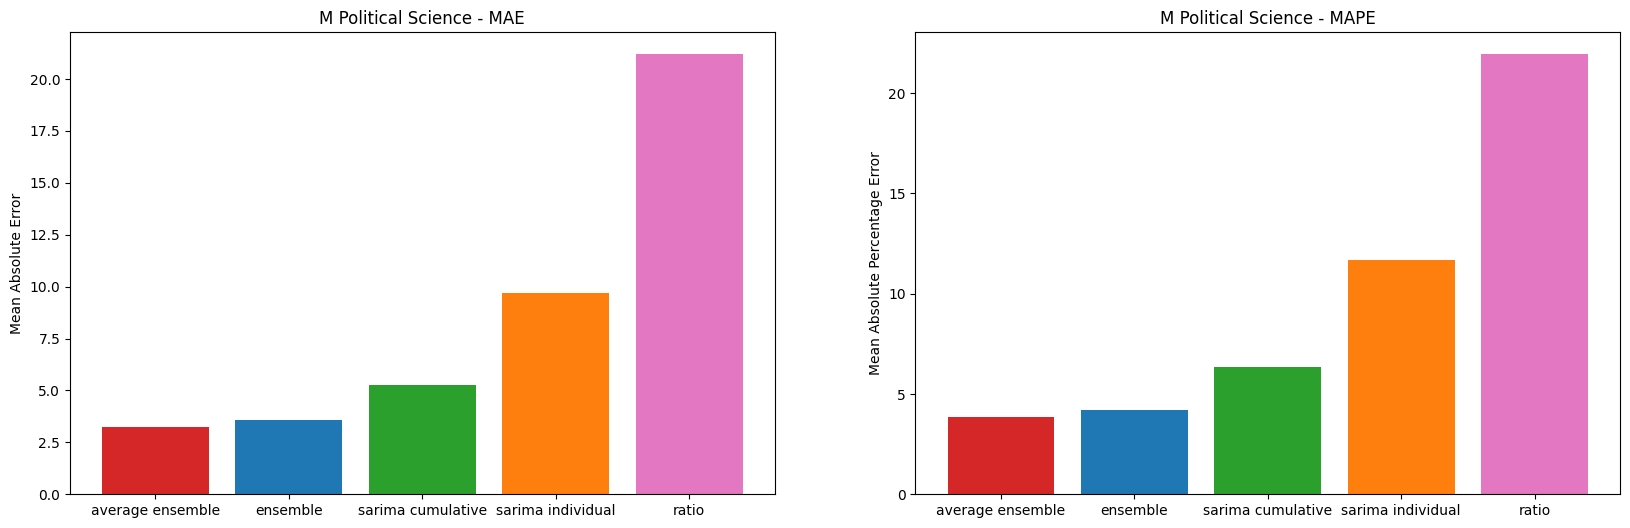

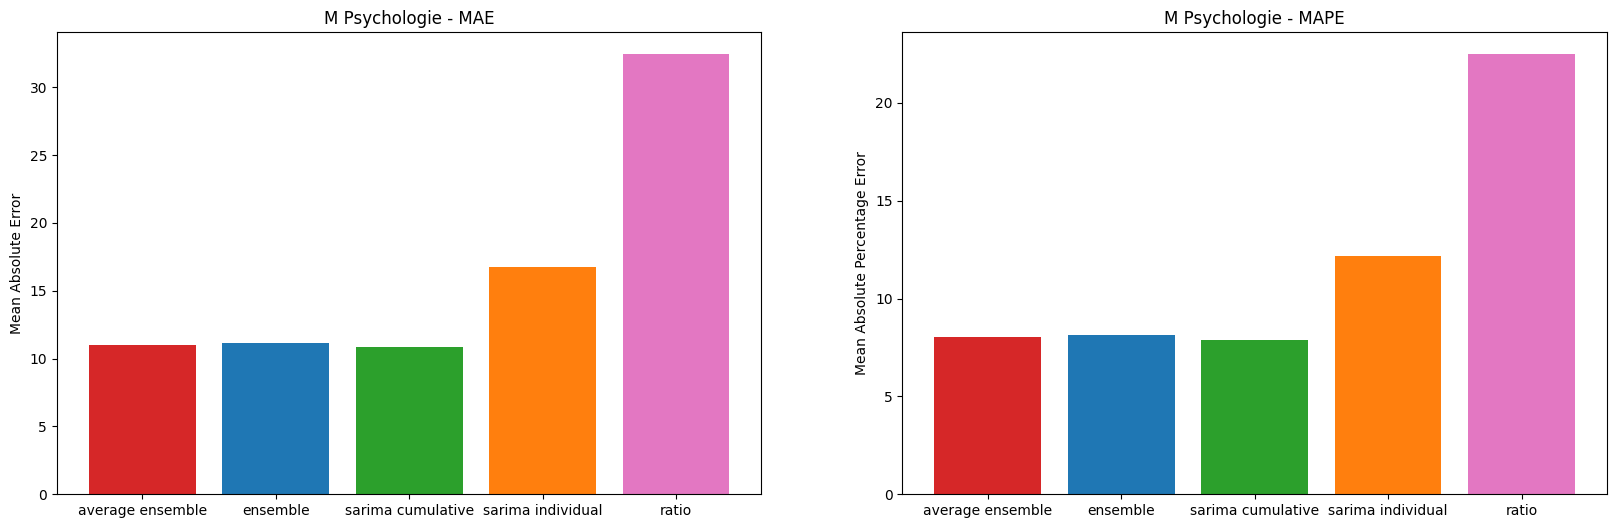

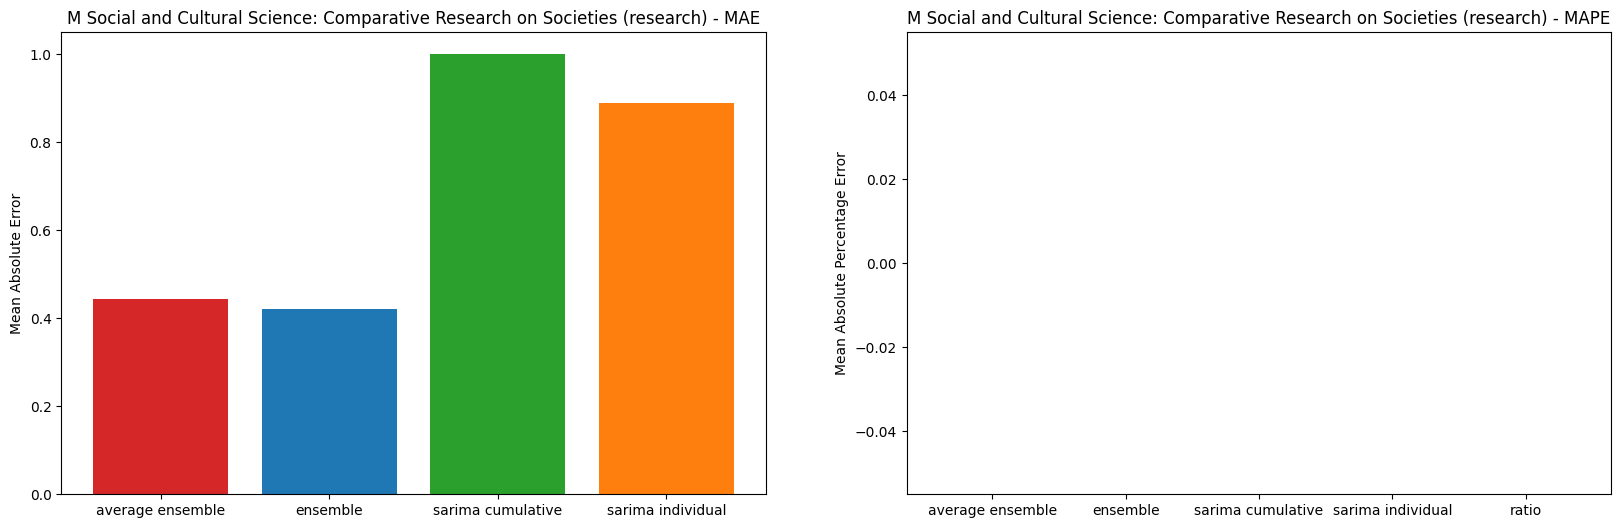

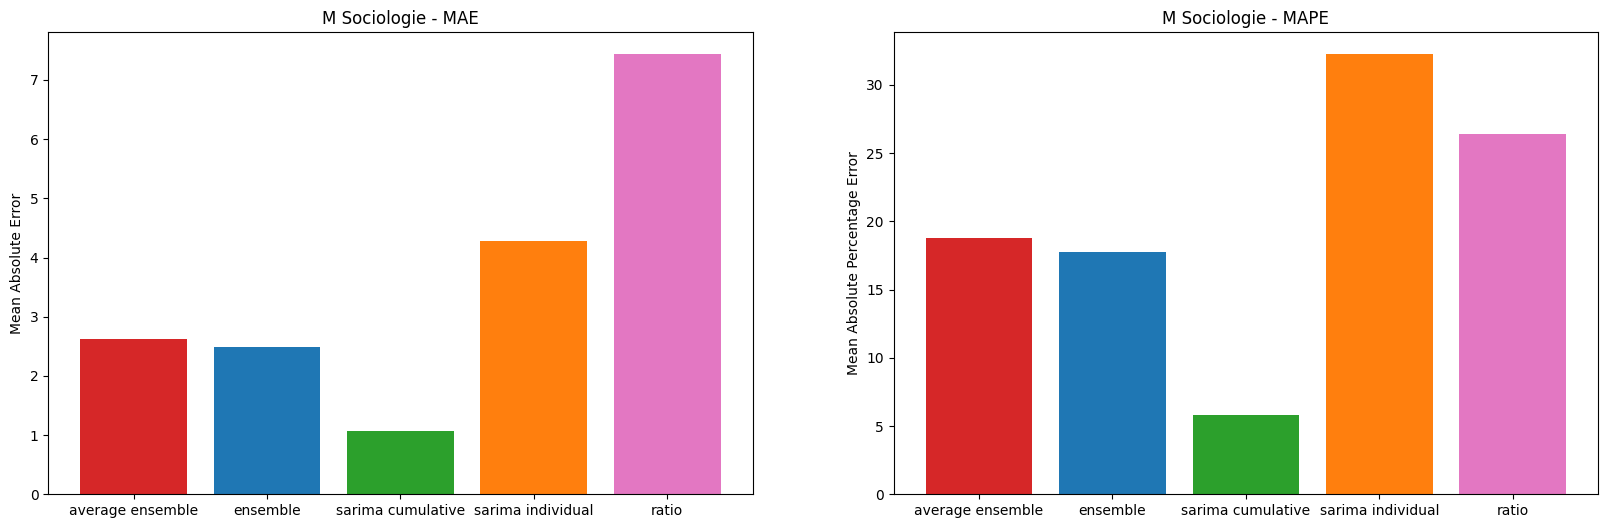

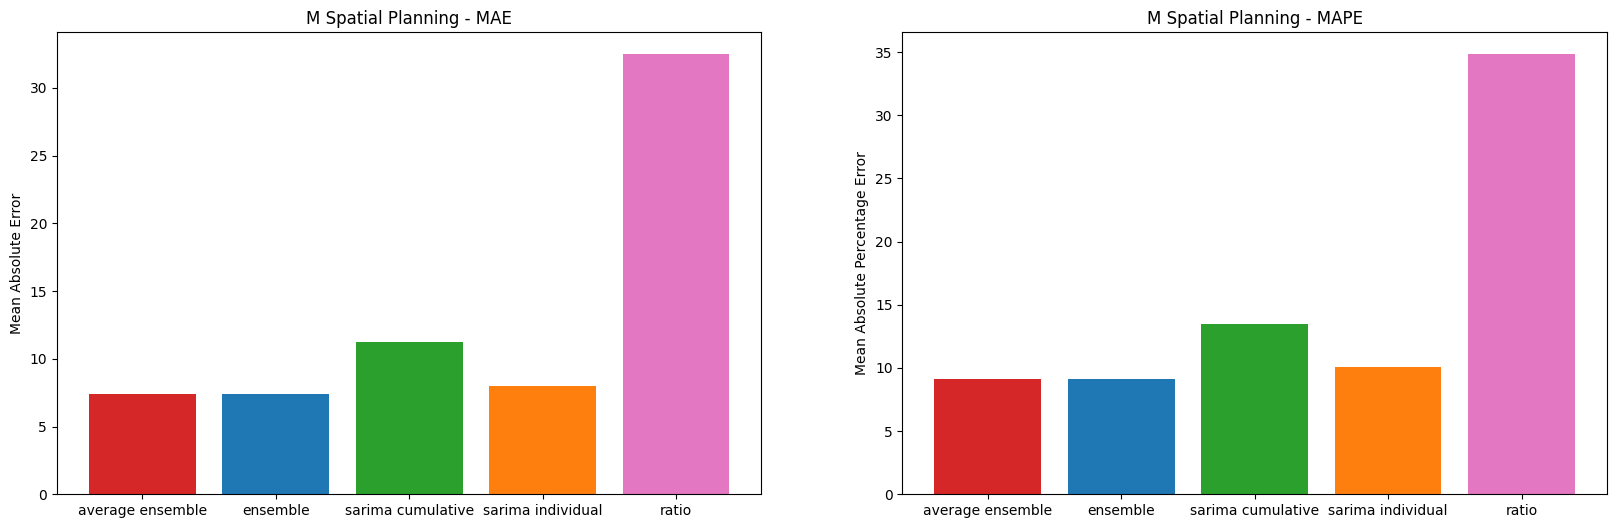

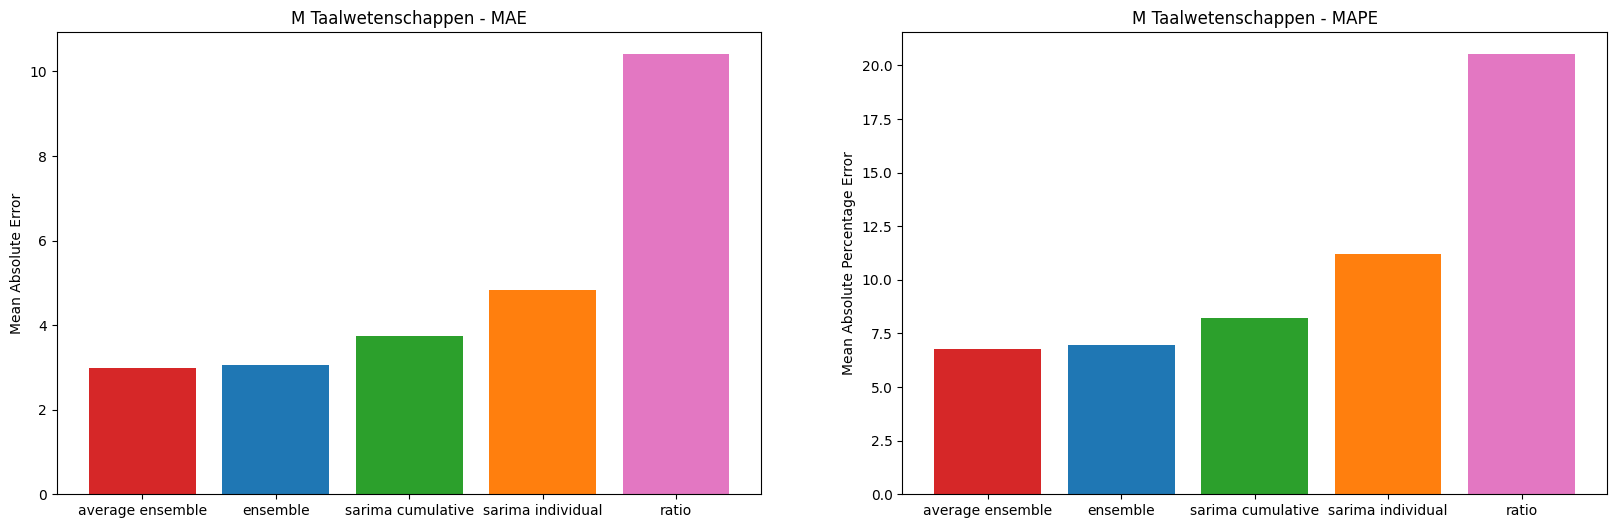

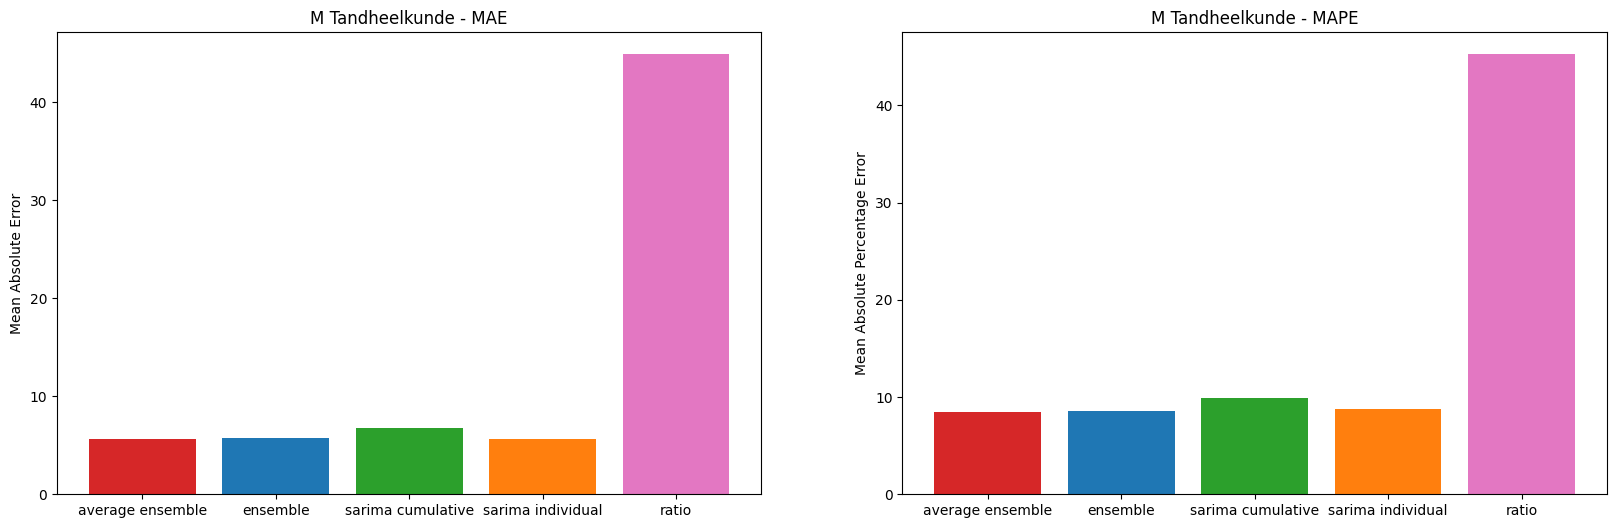

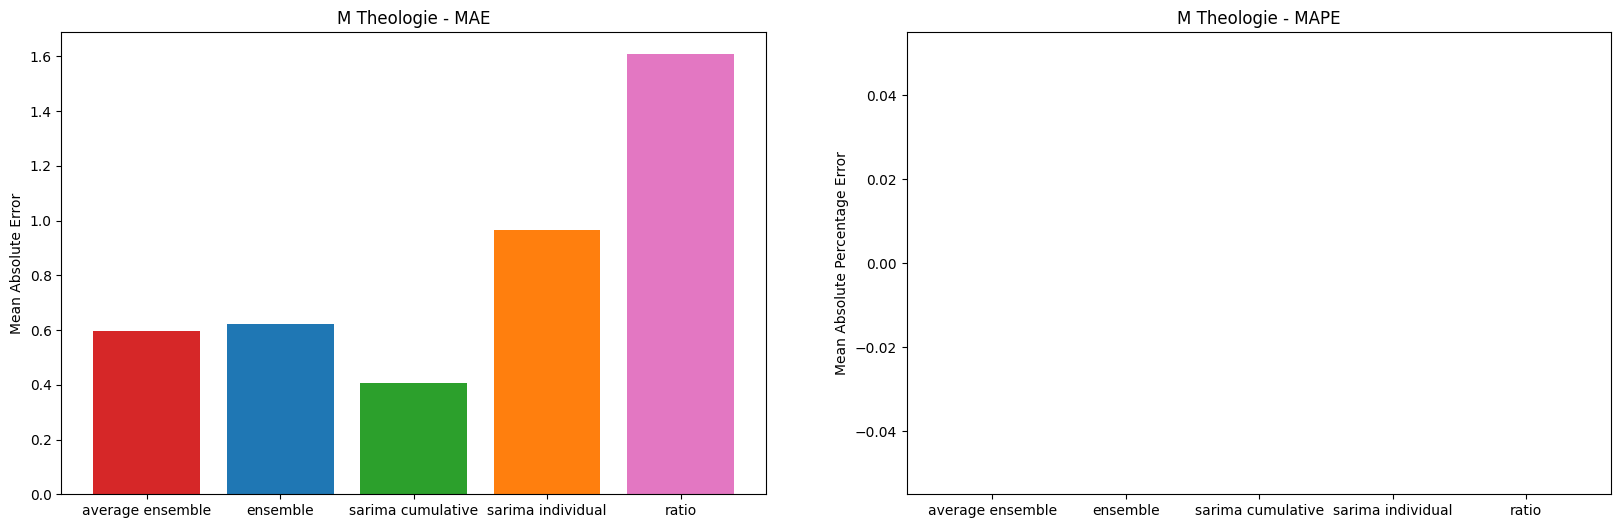

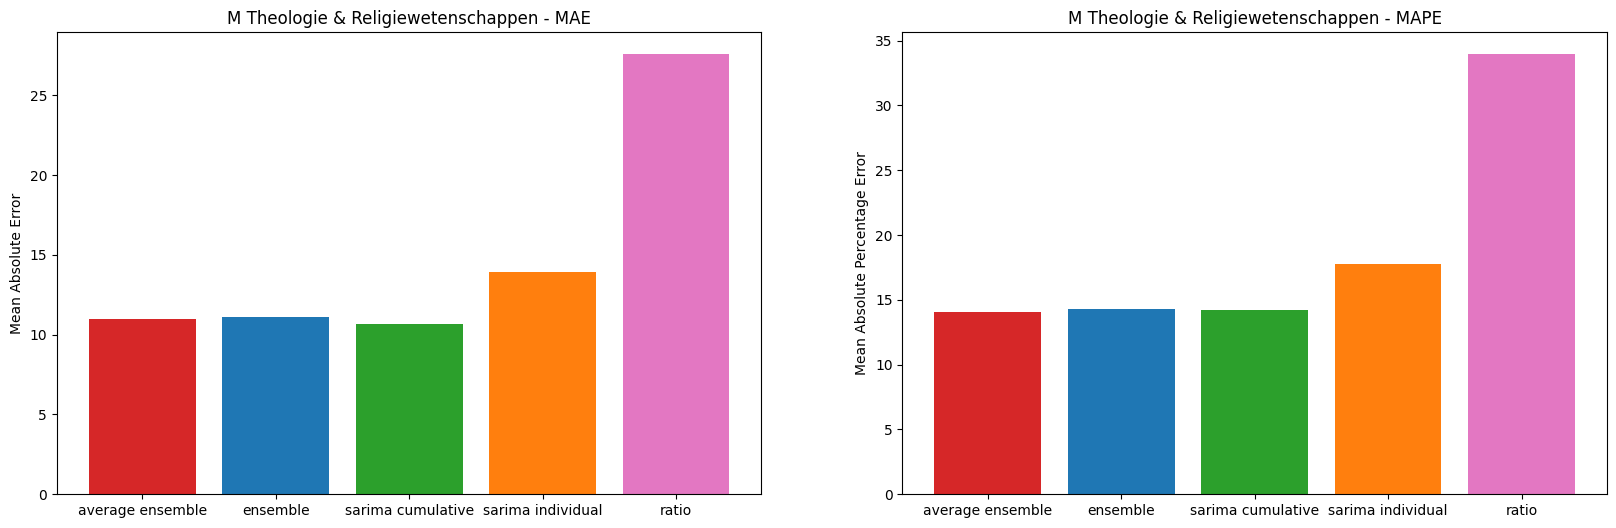

In [8]:
plot_per_heritage("NL")

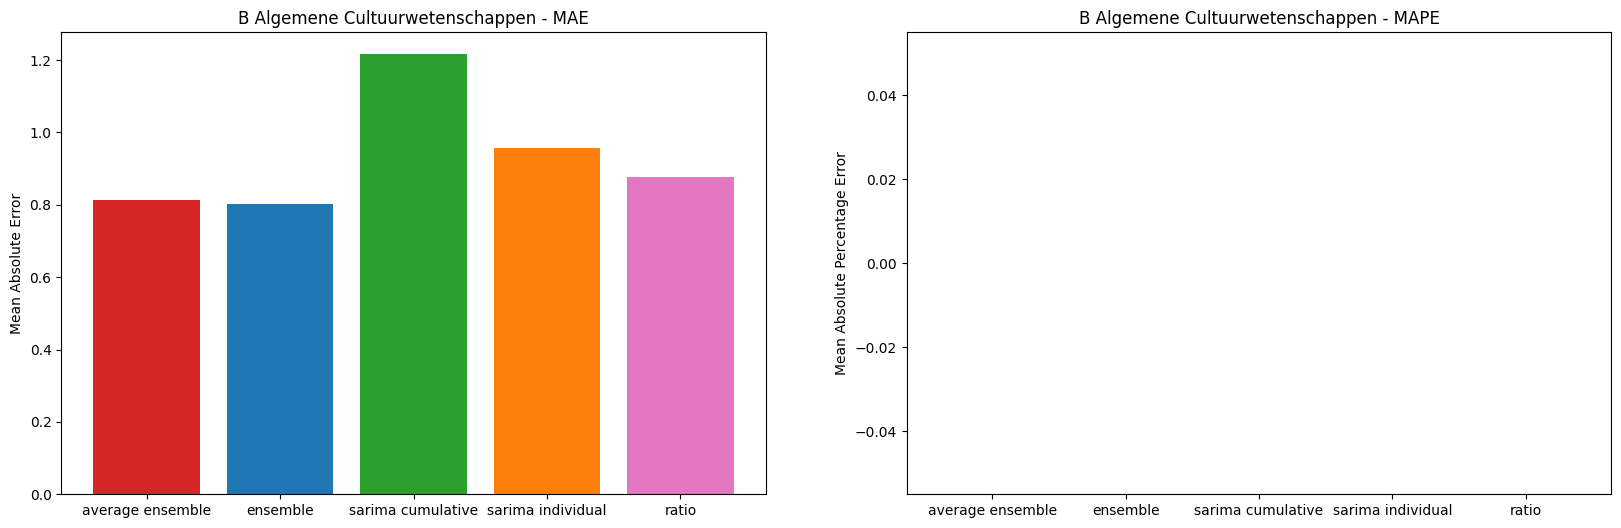

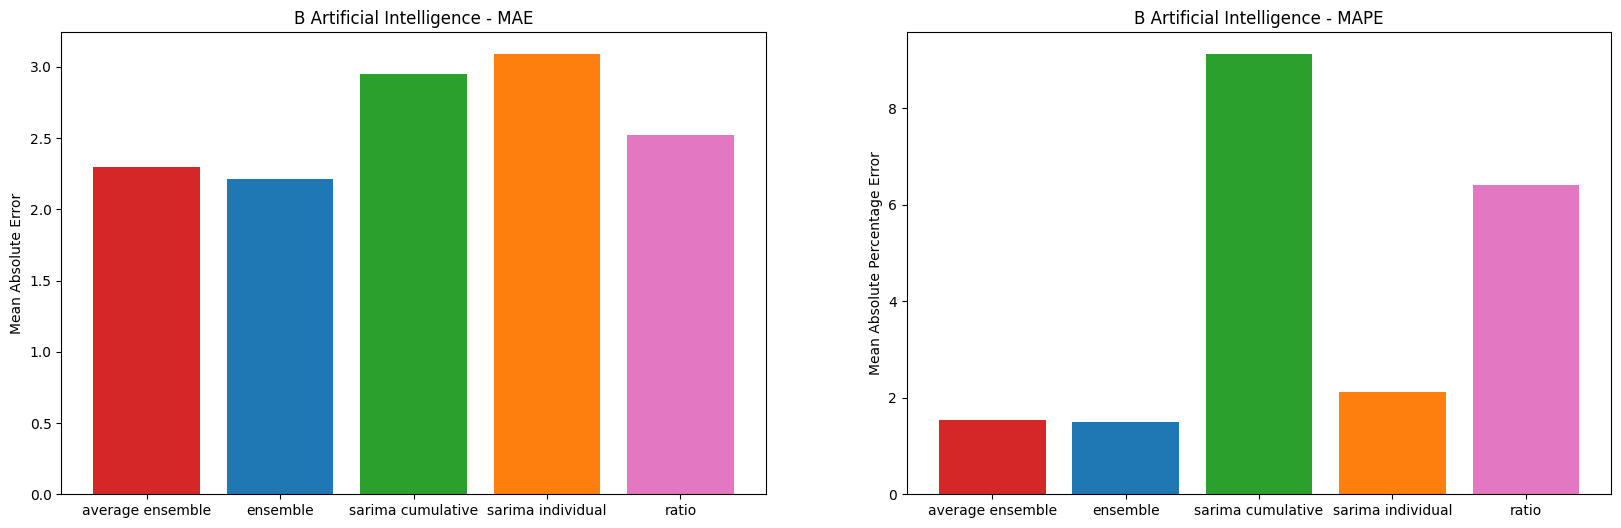

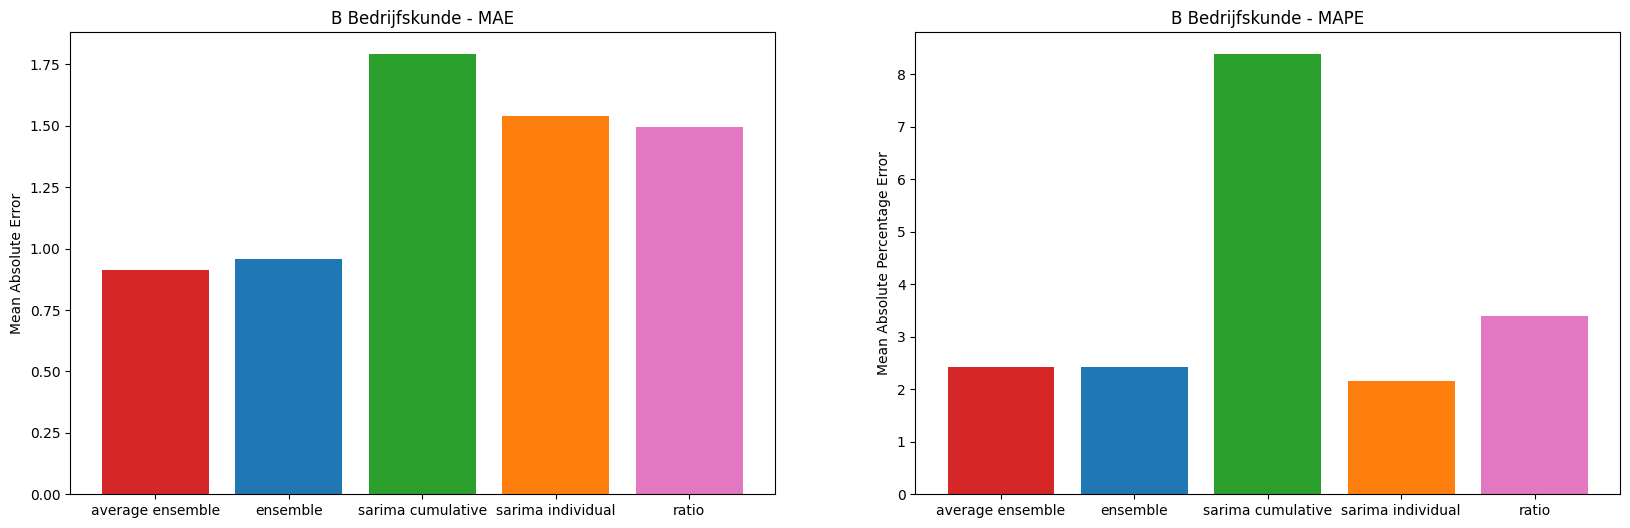

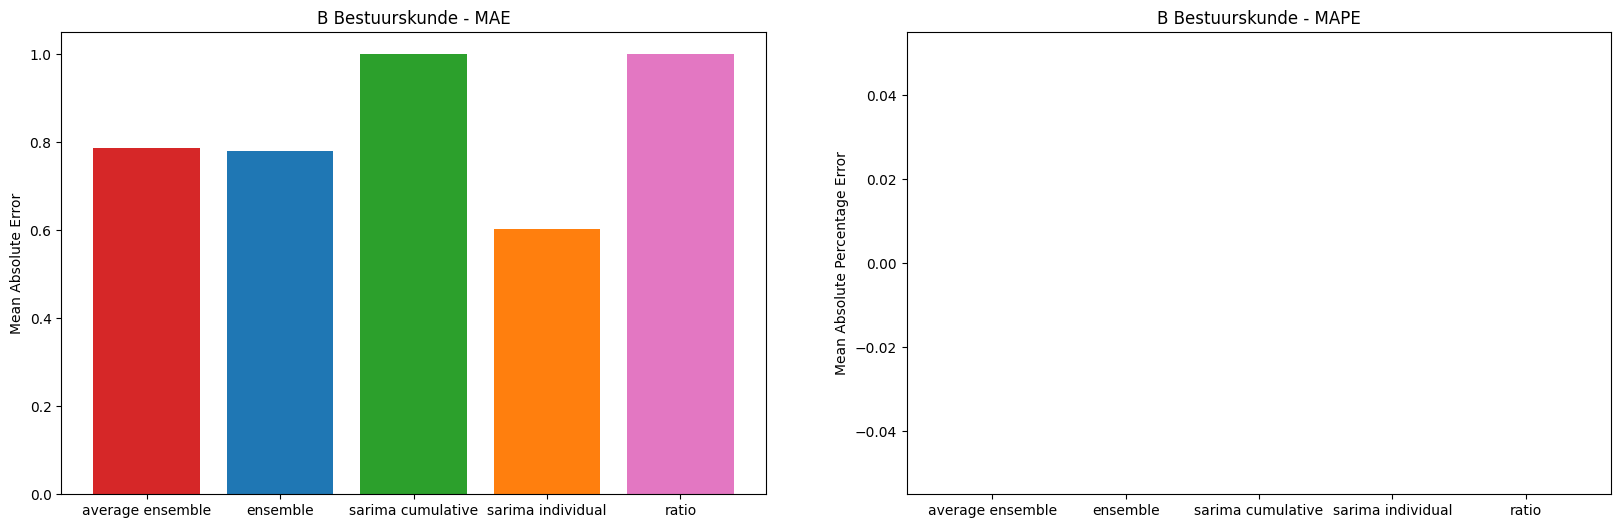

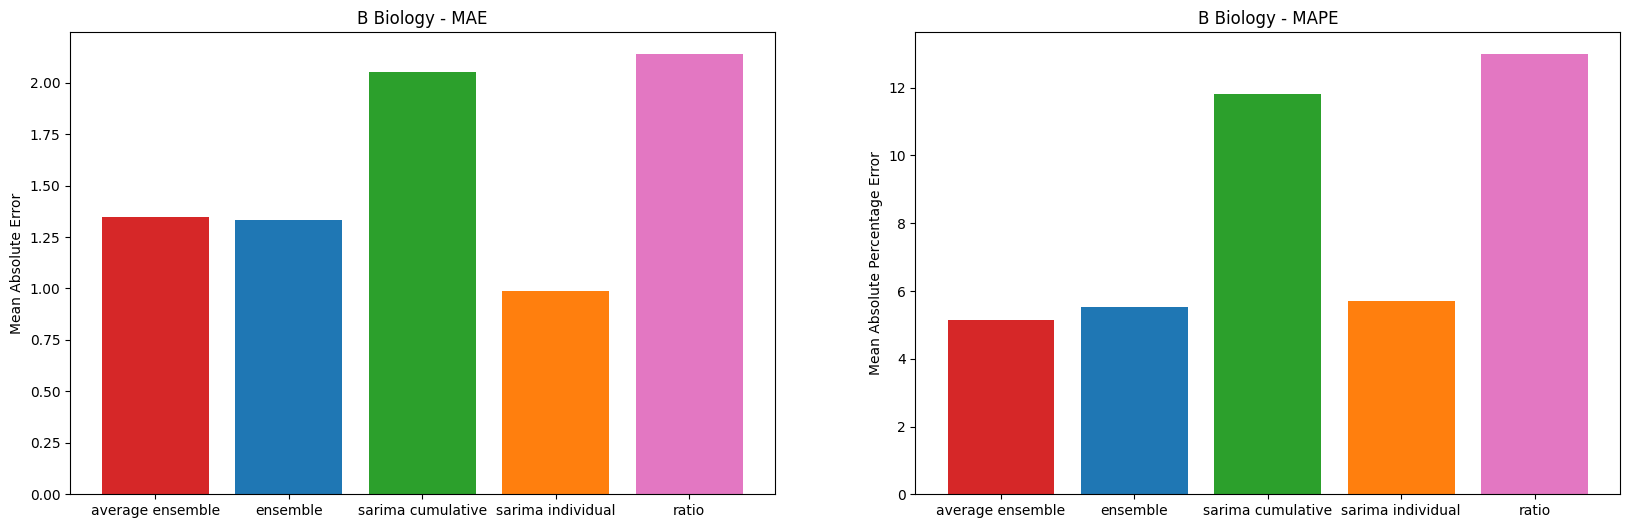

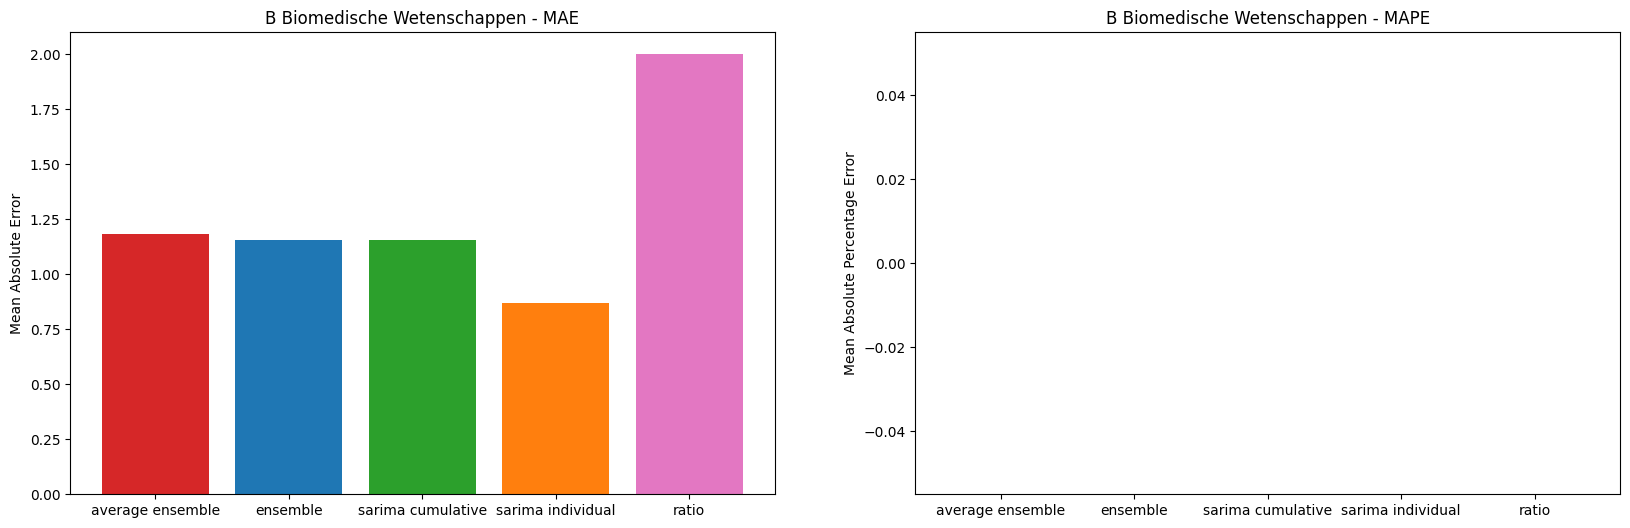

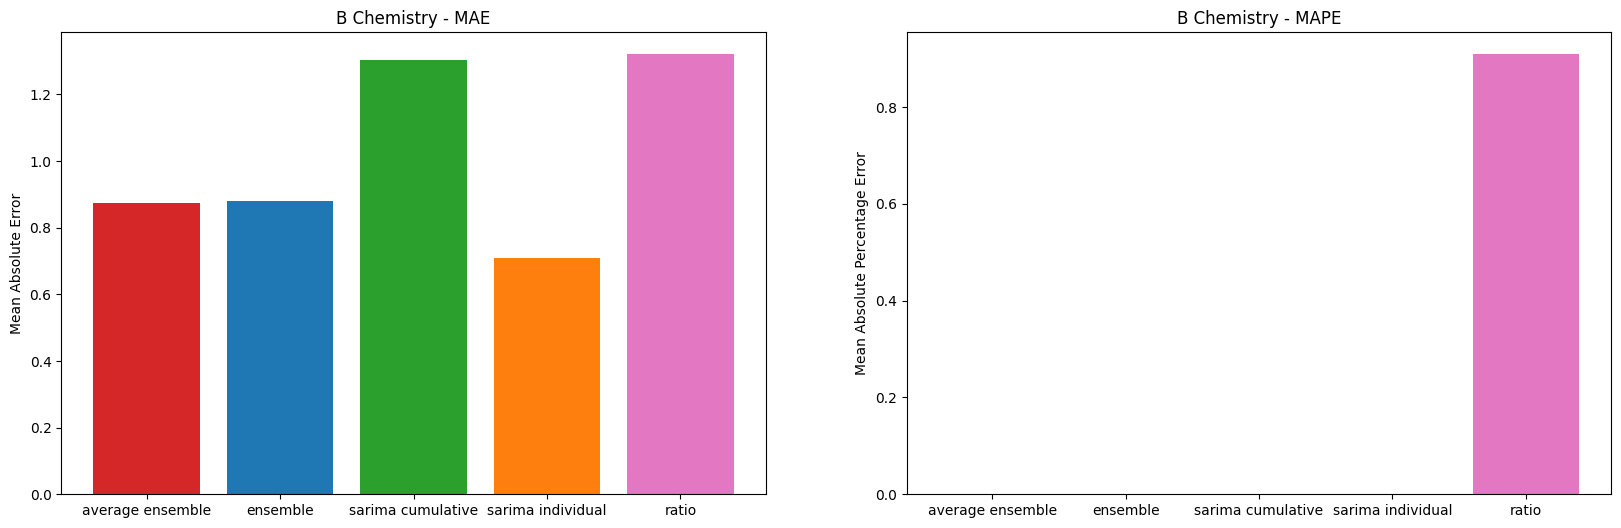

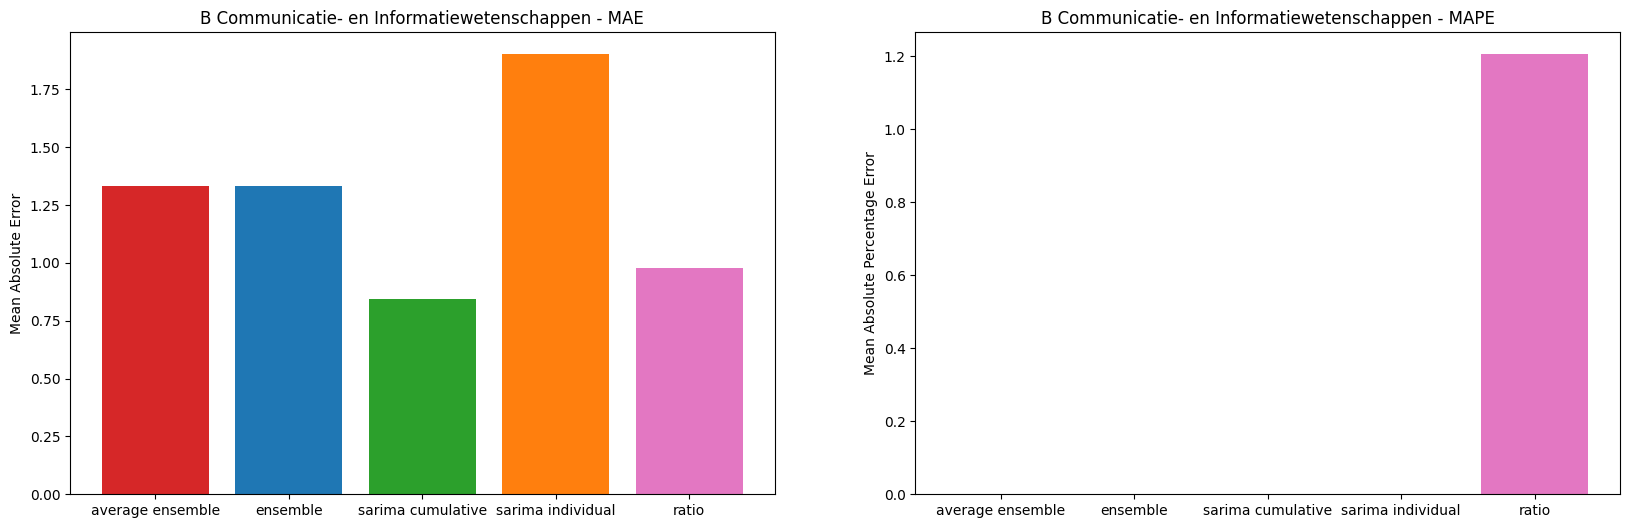

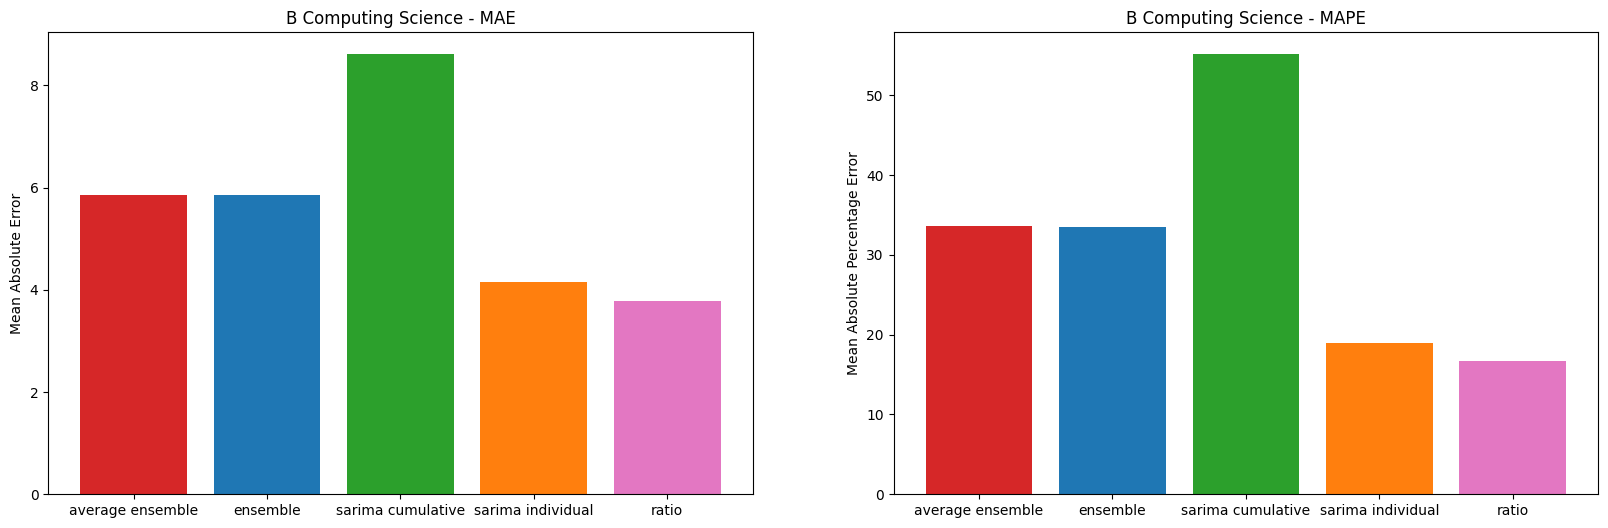

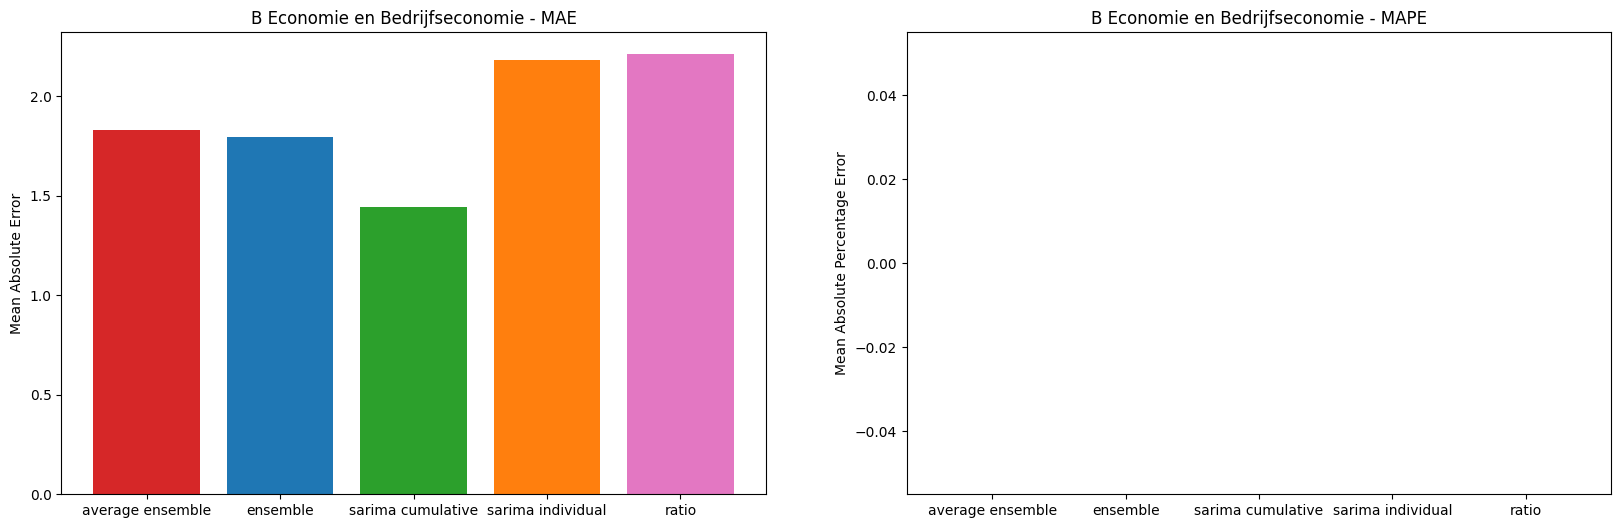

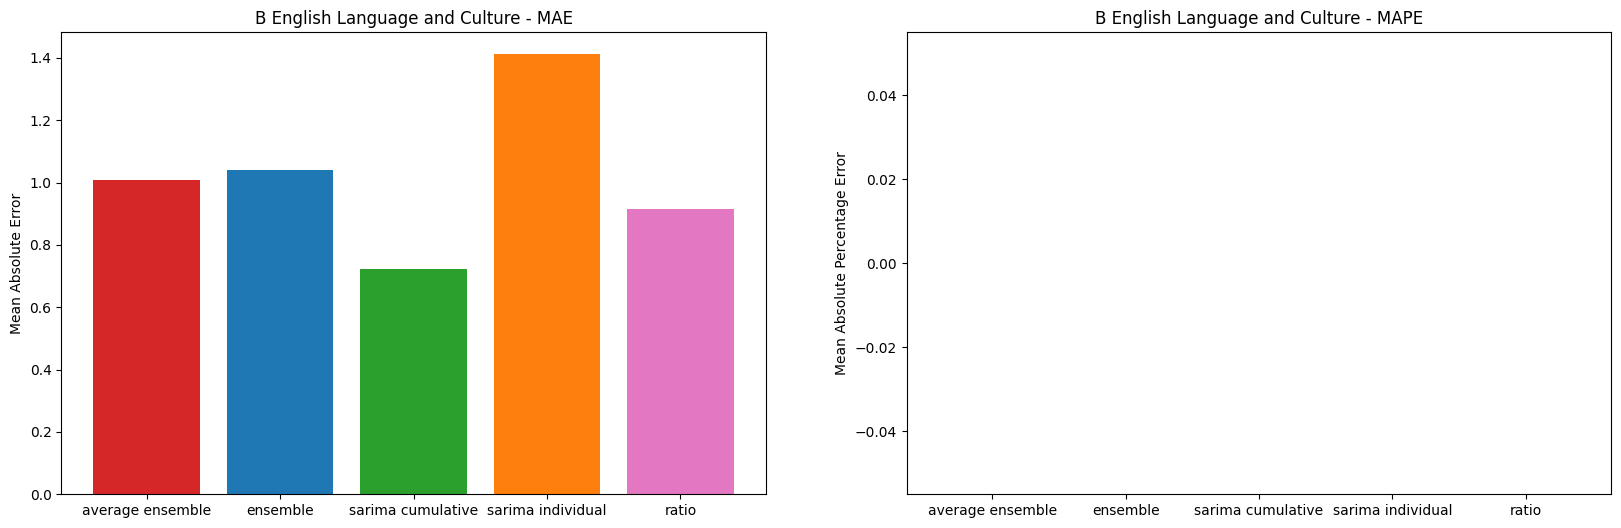

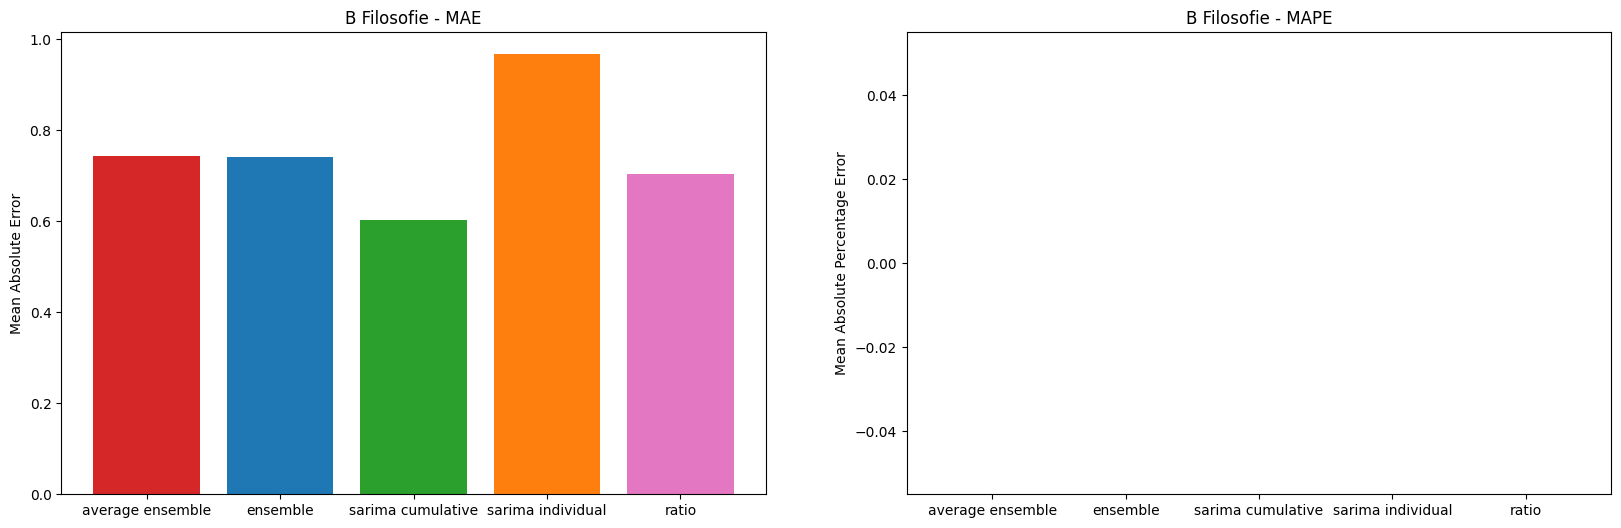

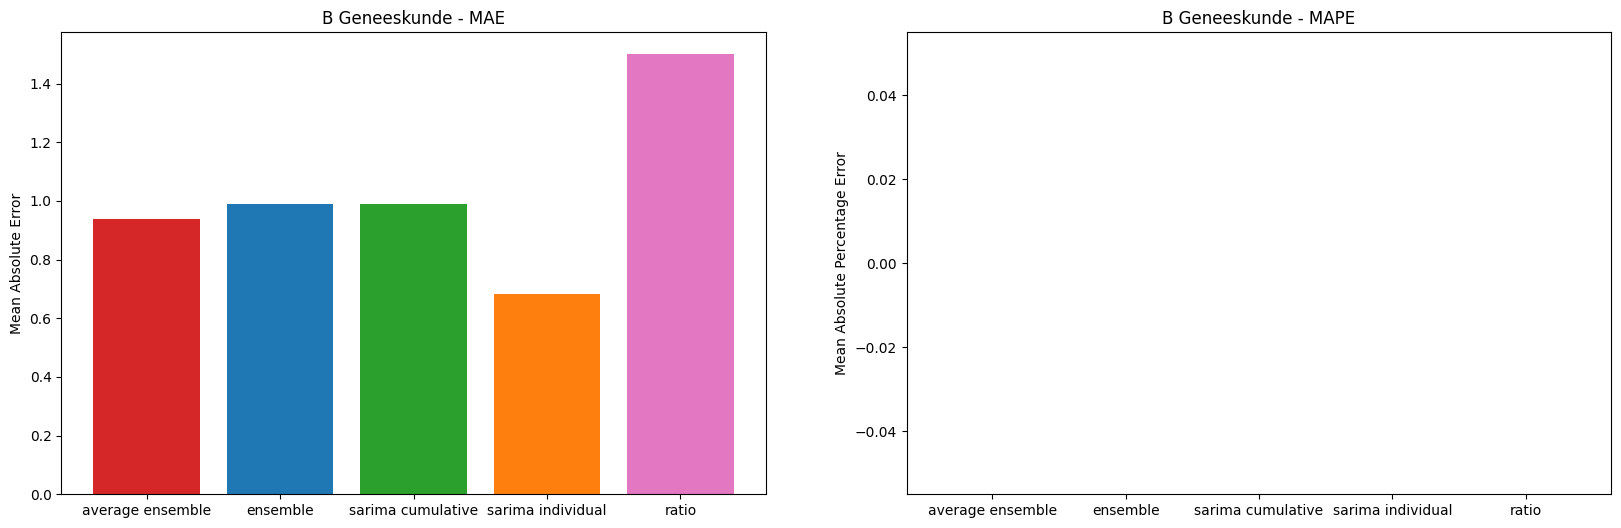

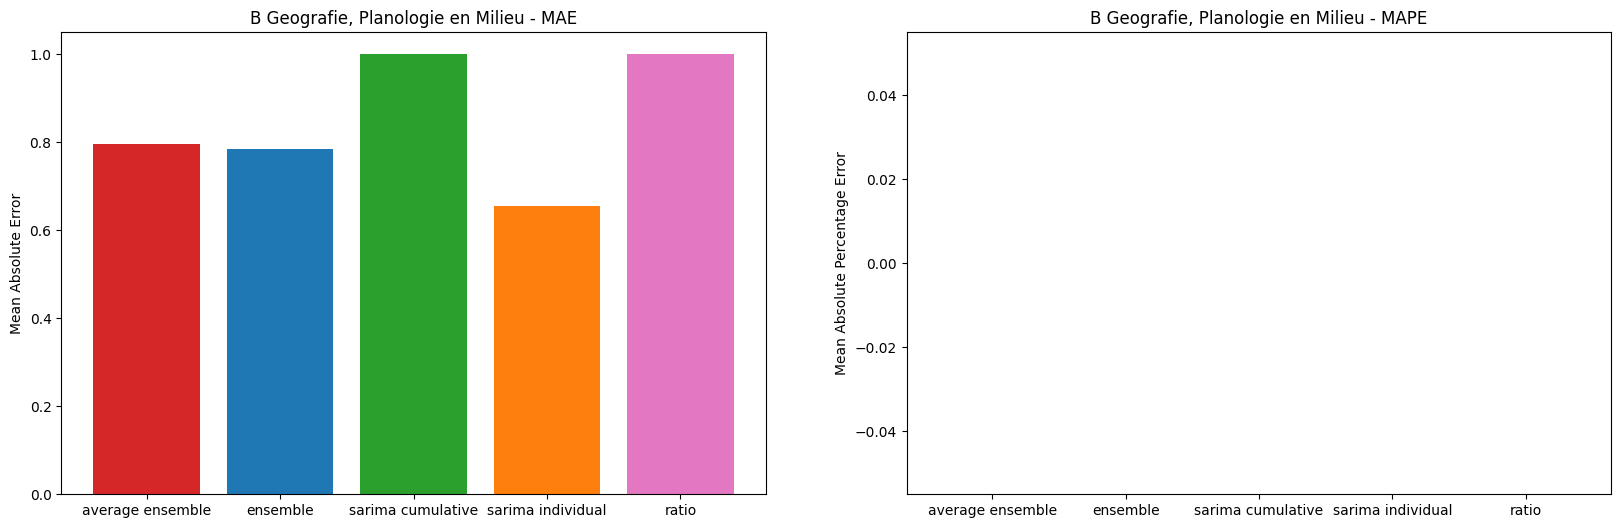

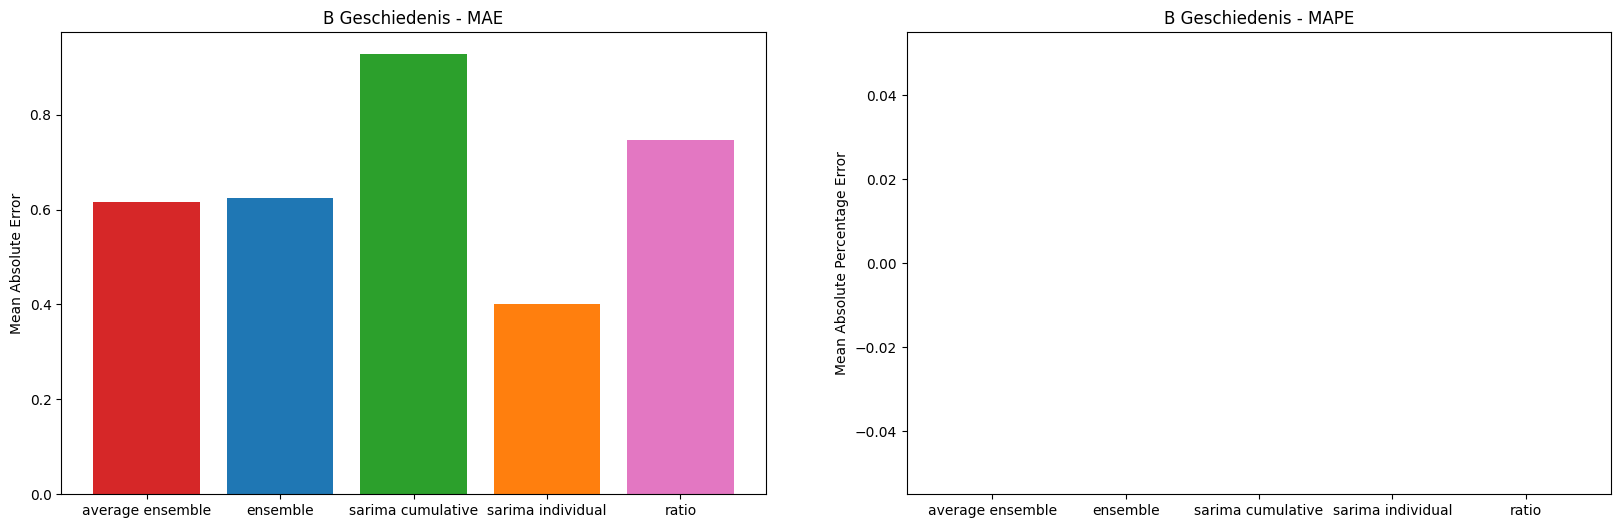

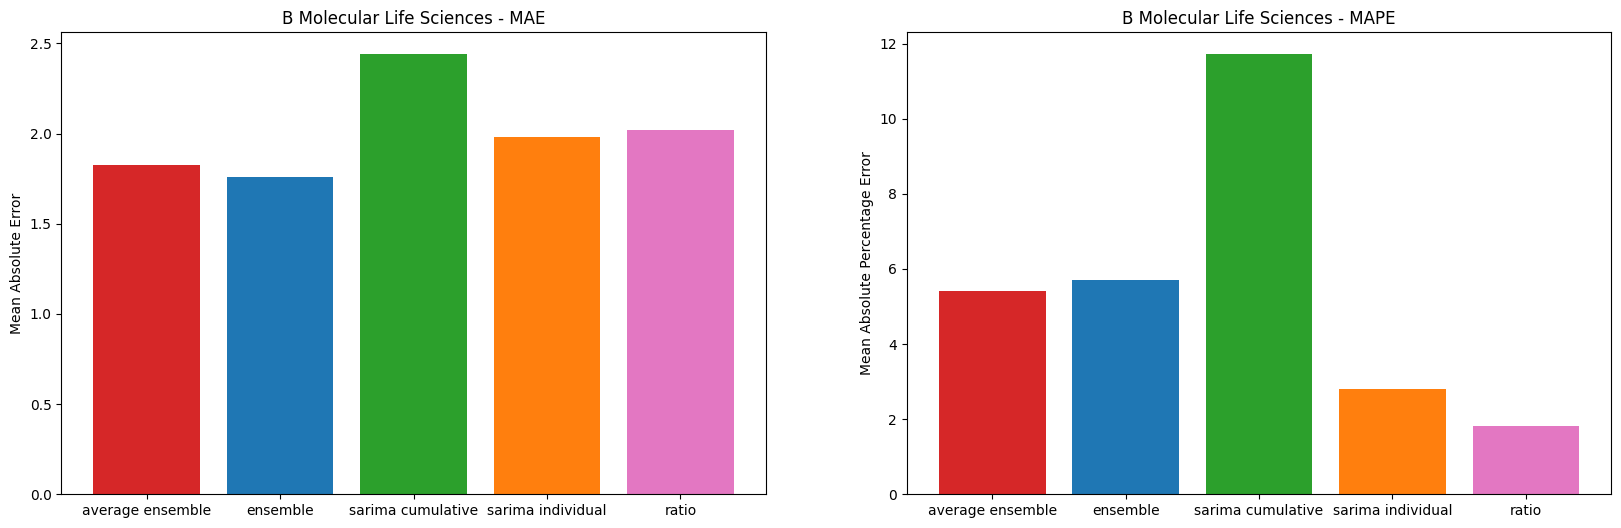

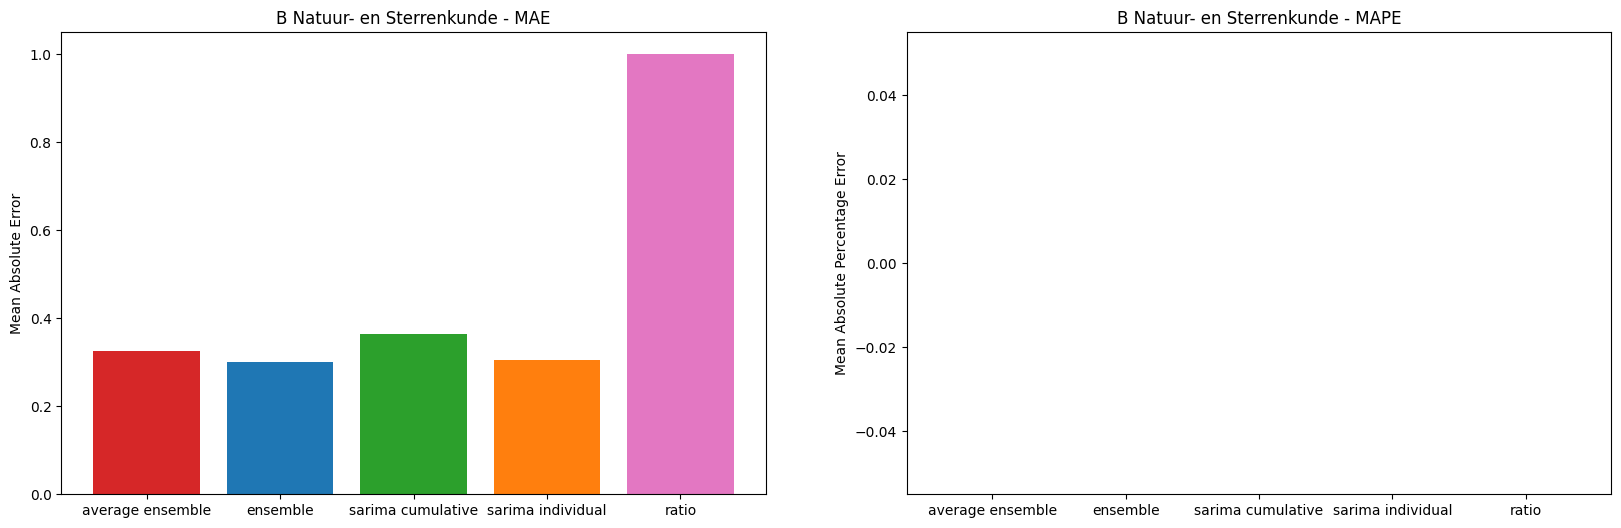

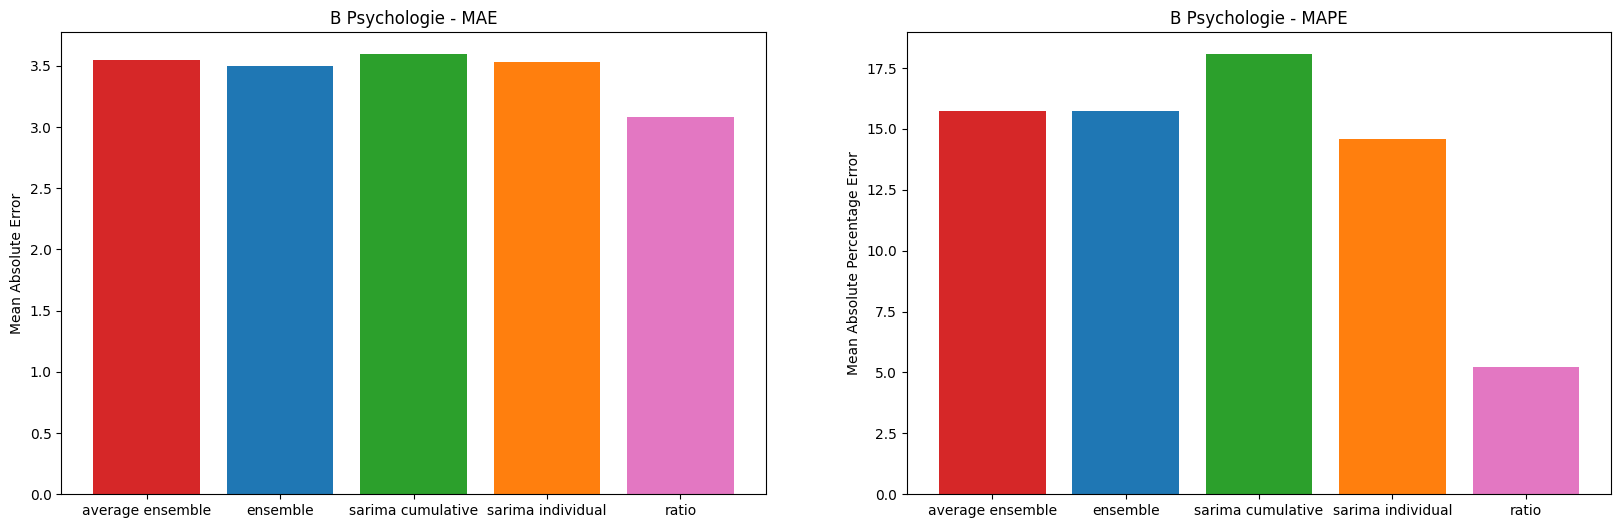

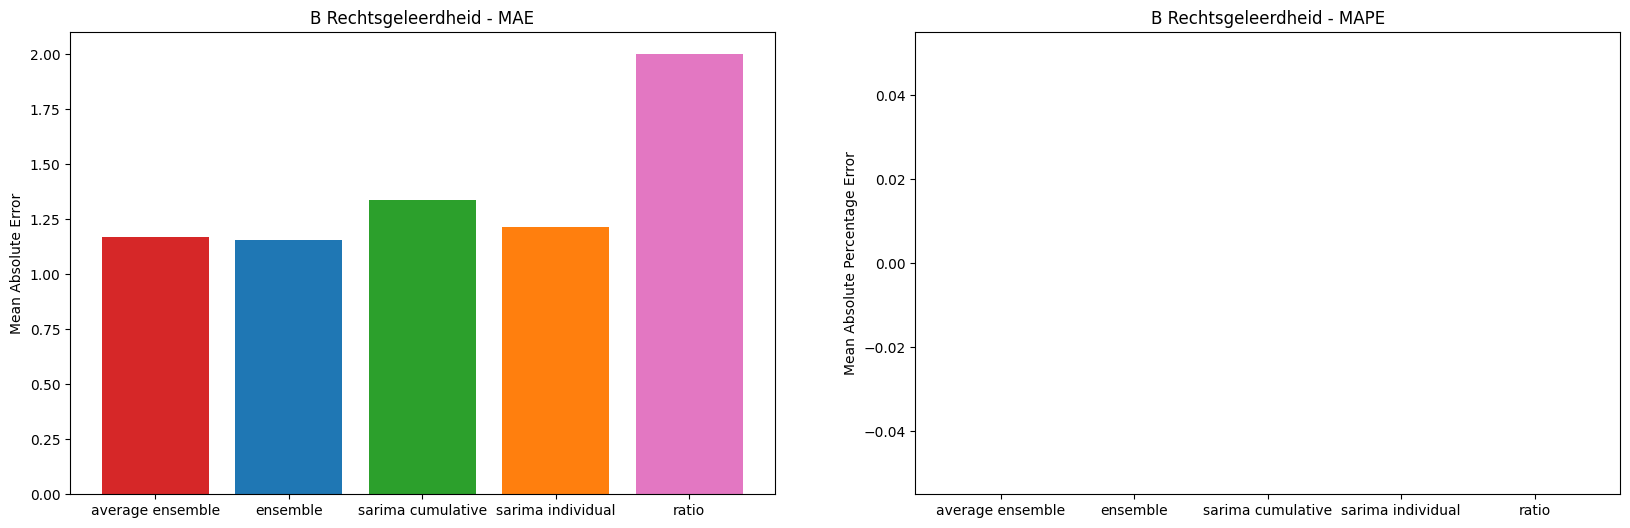

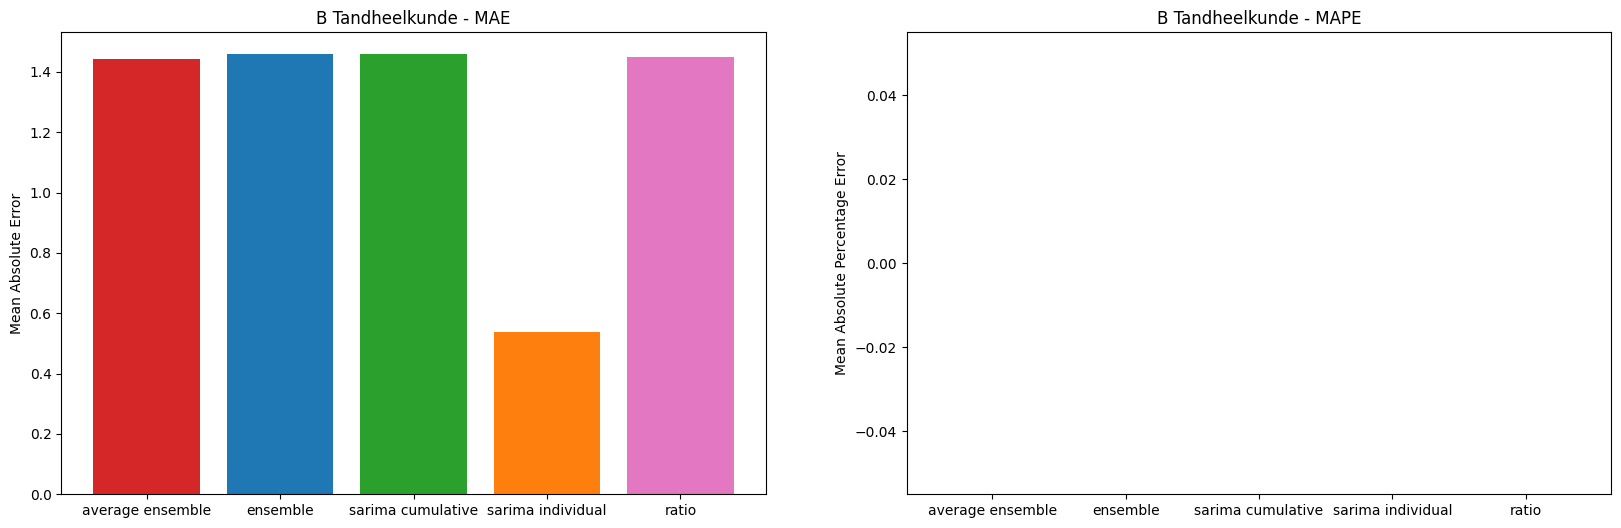

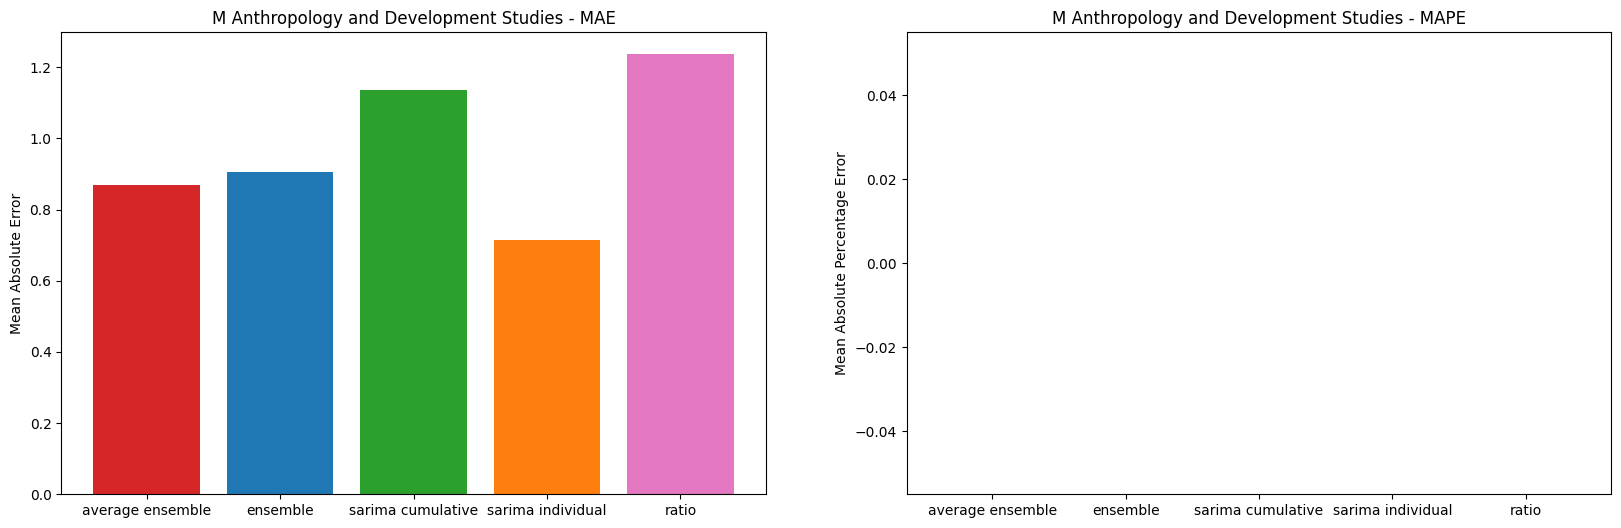

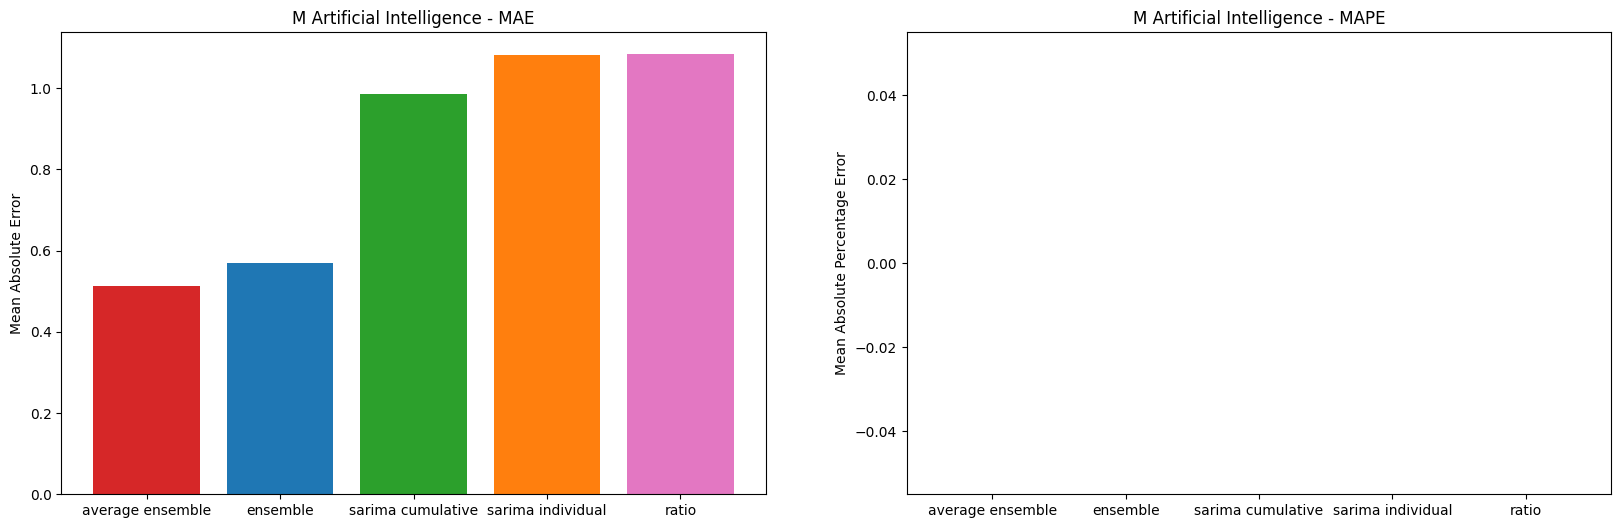

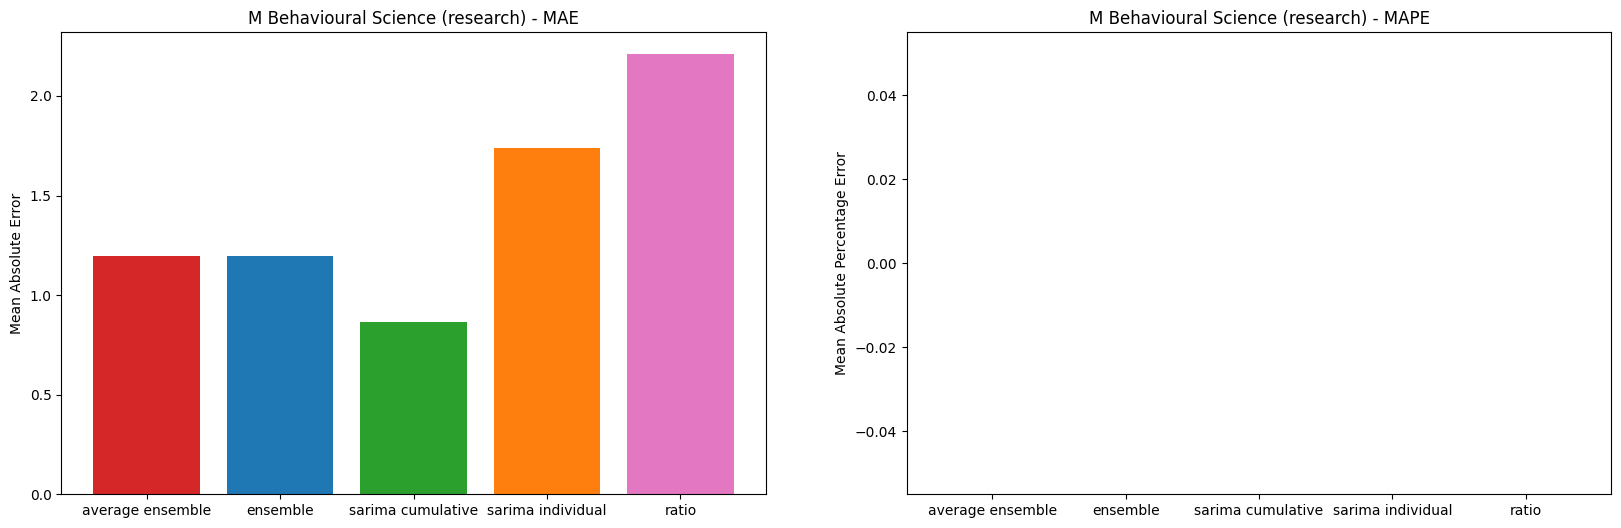

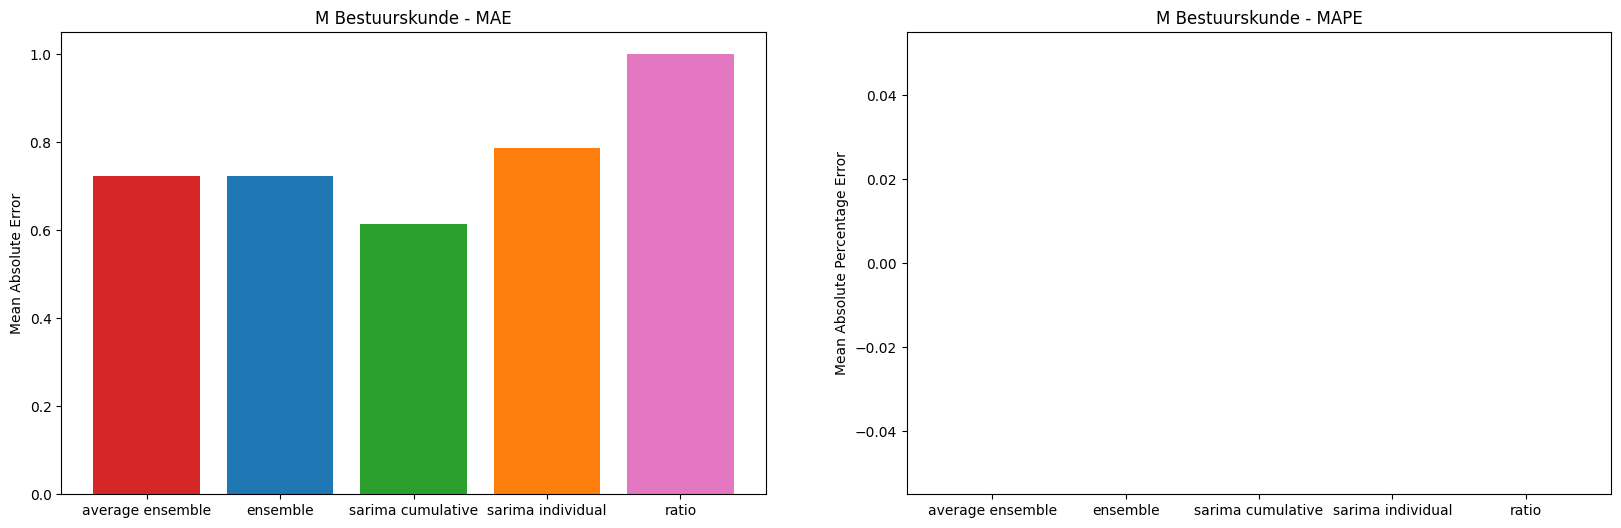

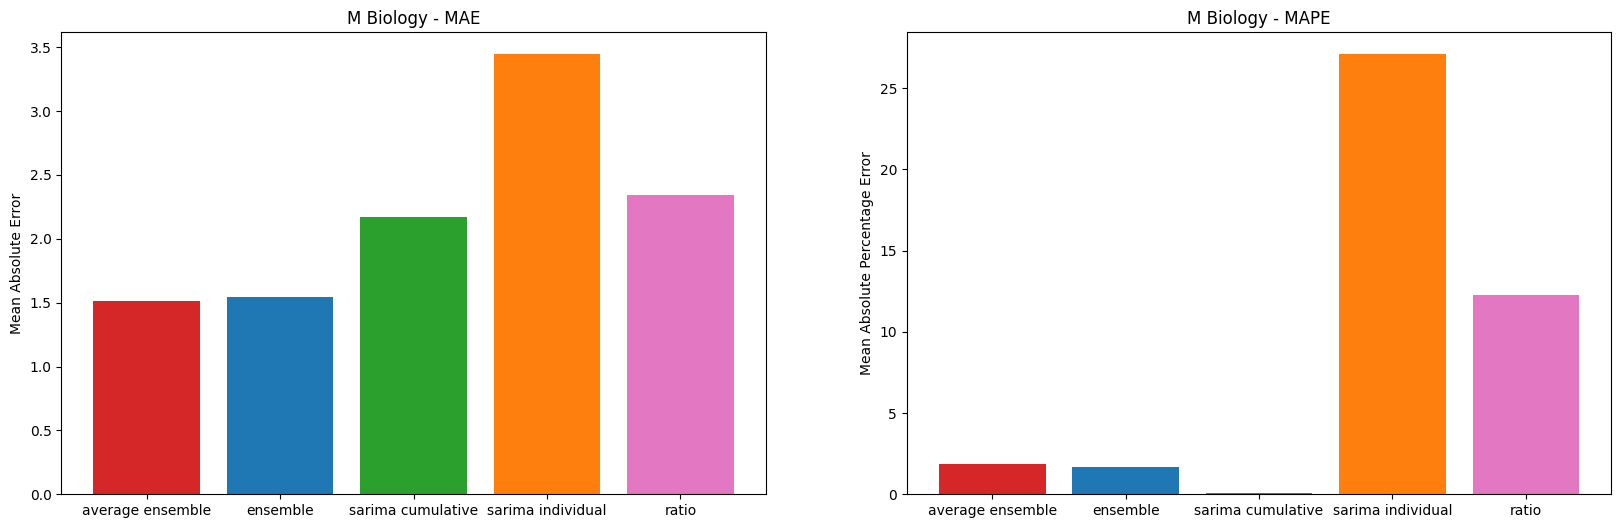

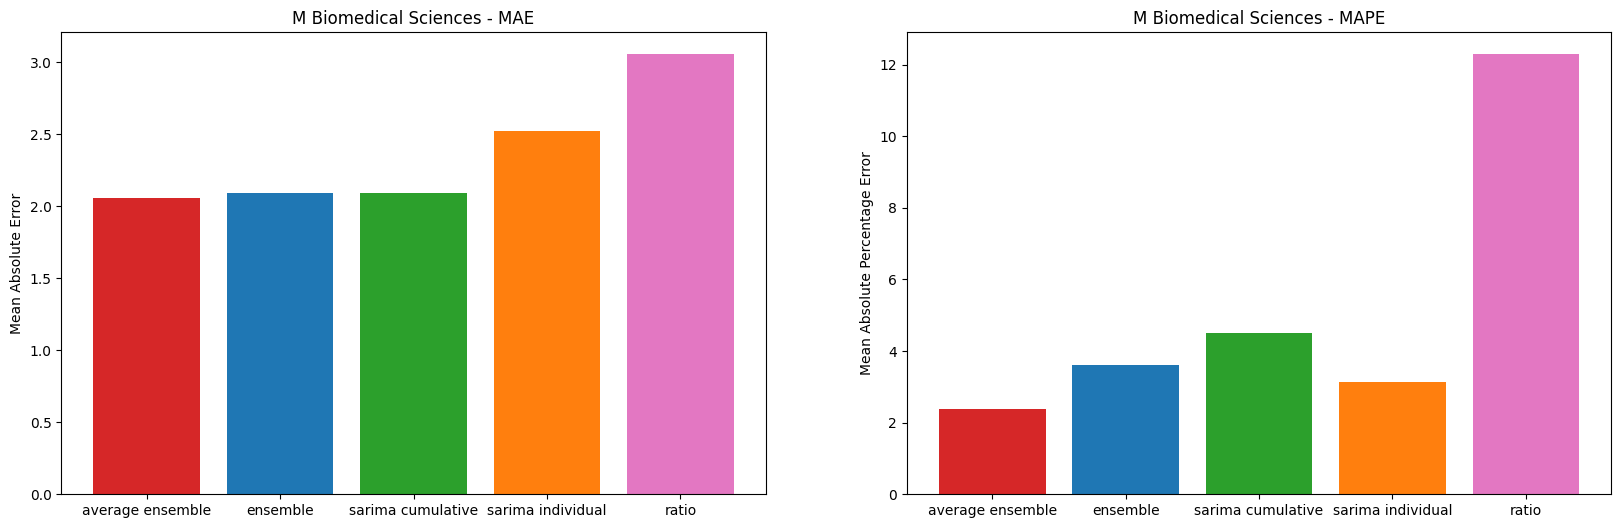

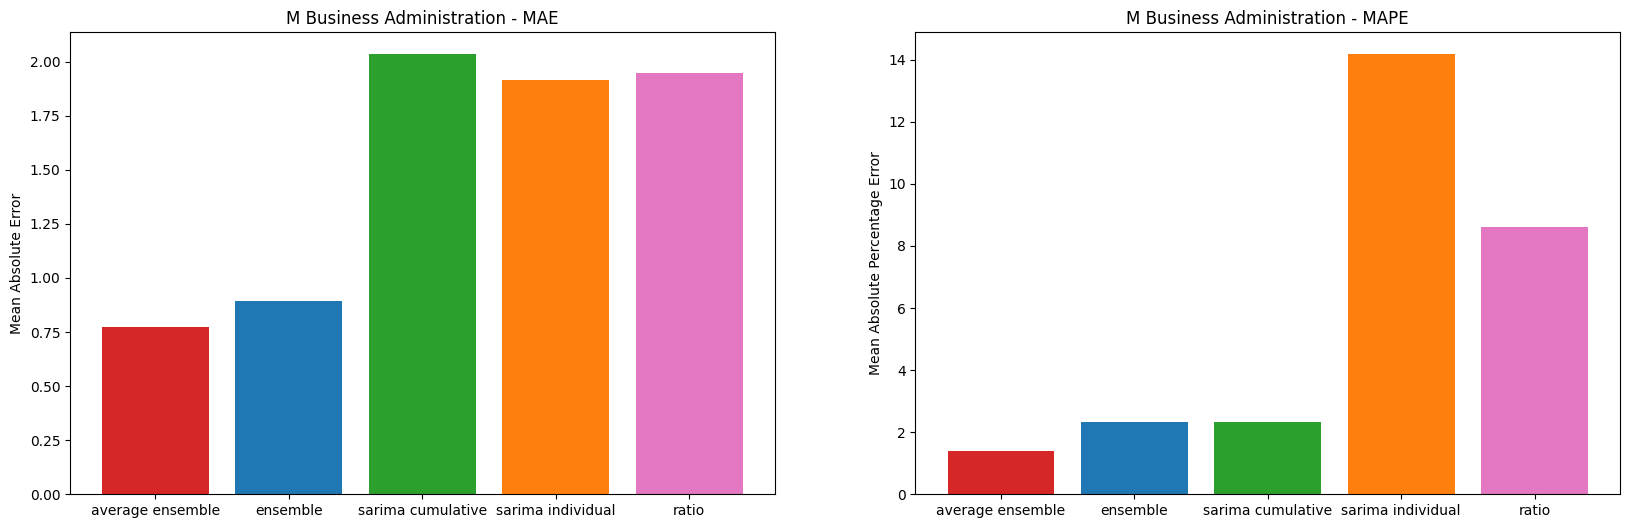

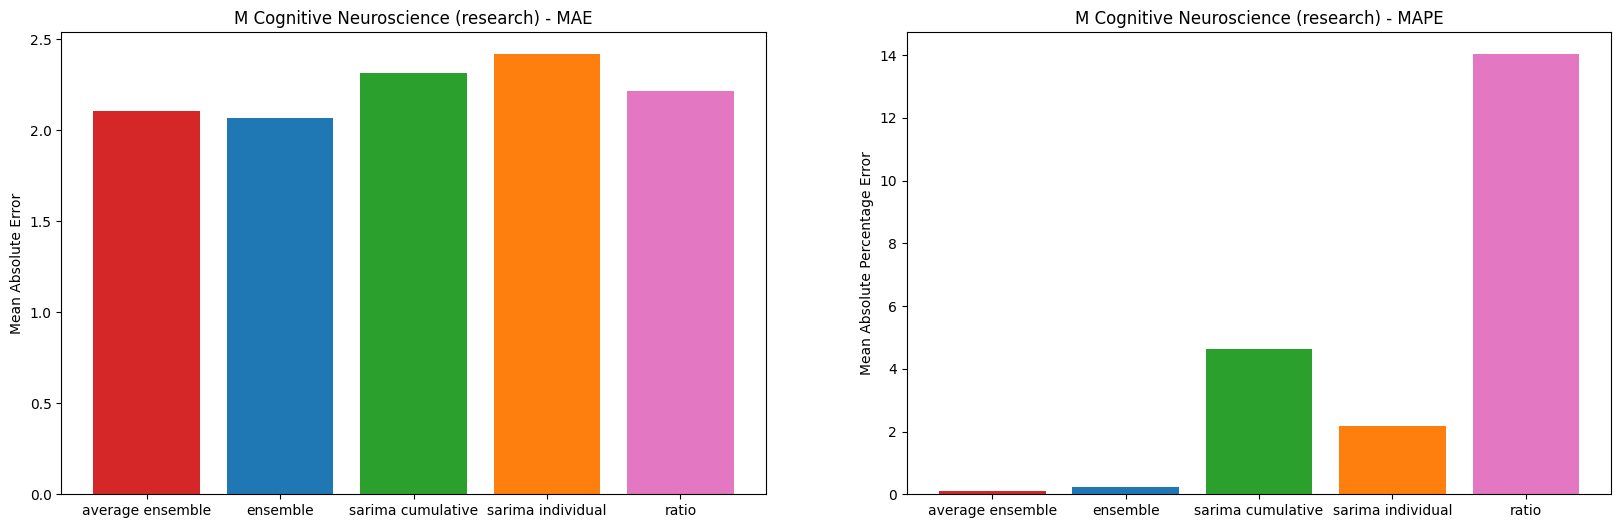

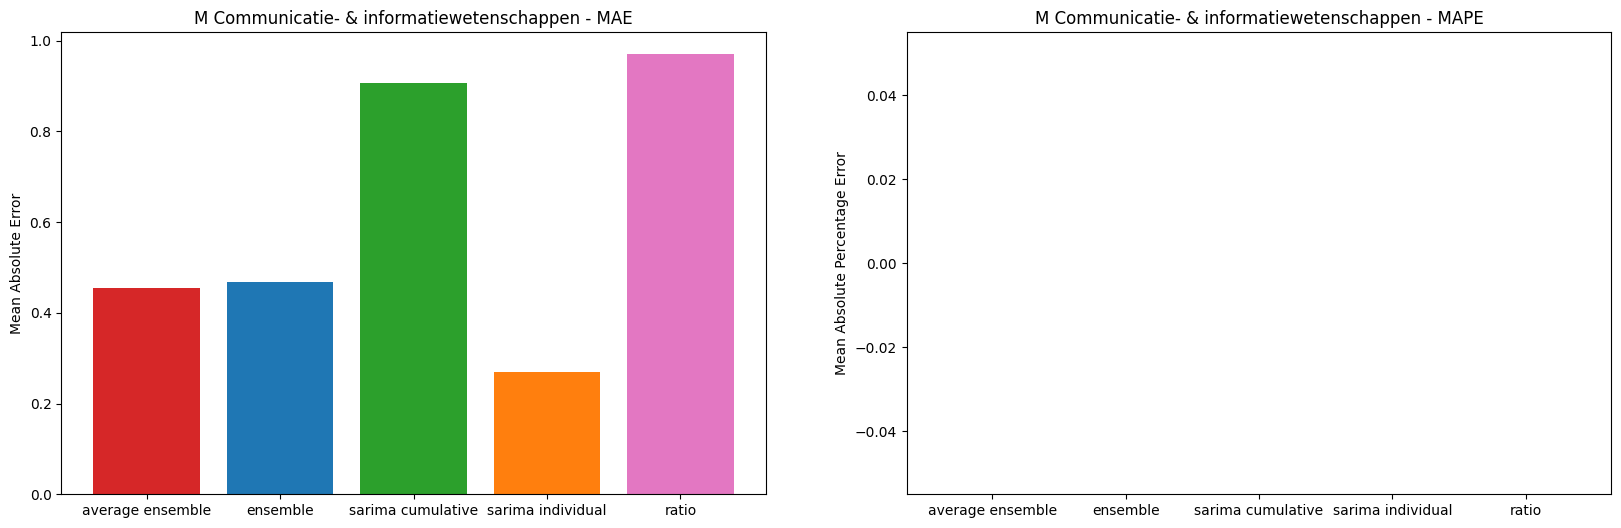

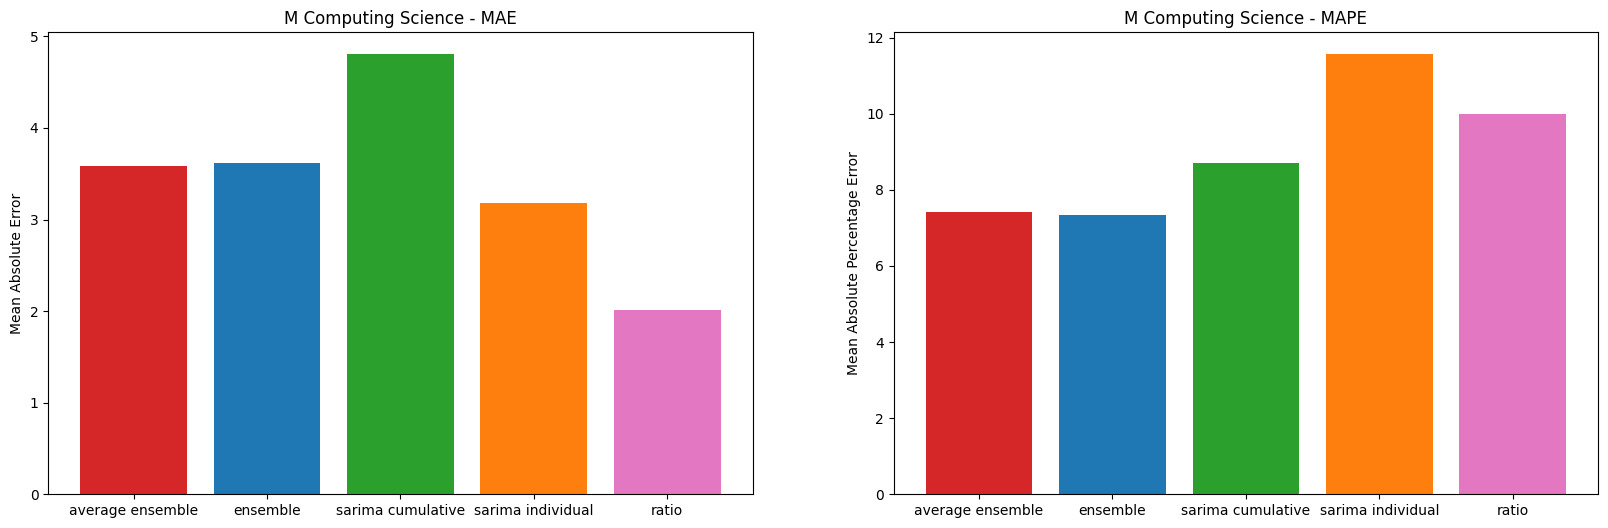

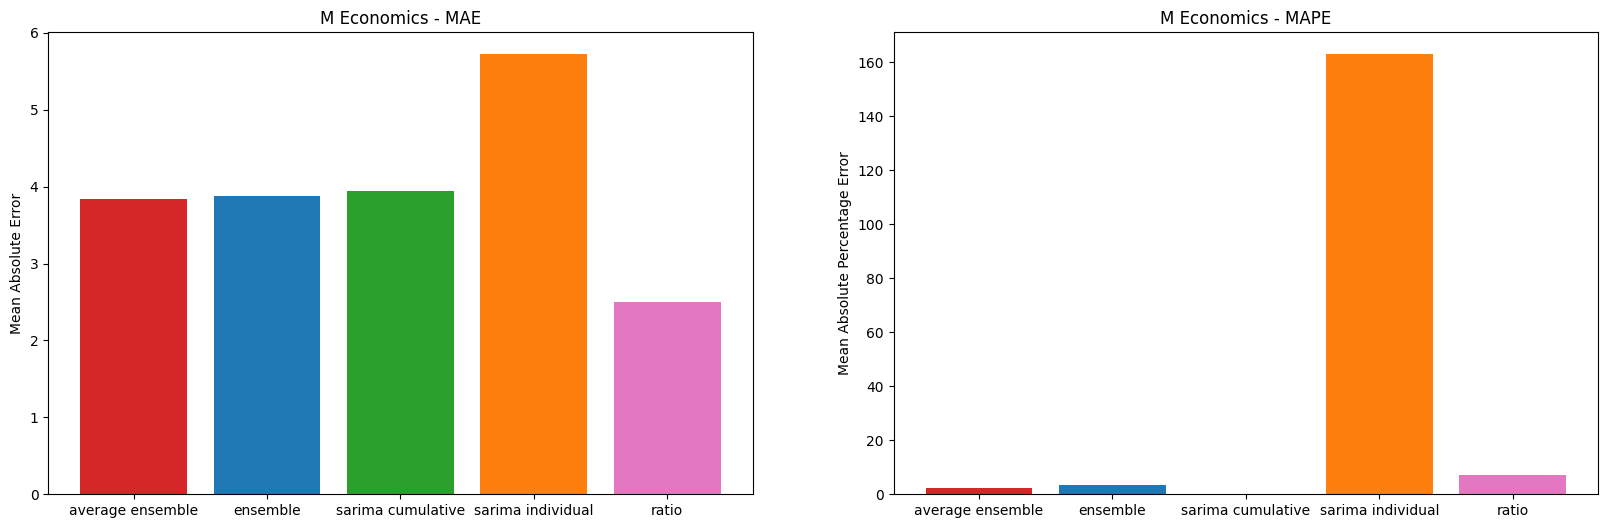

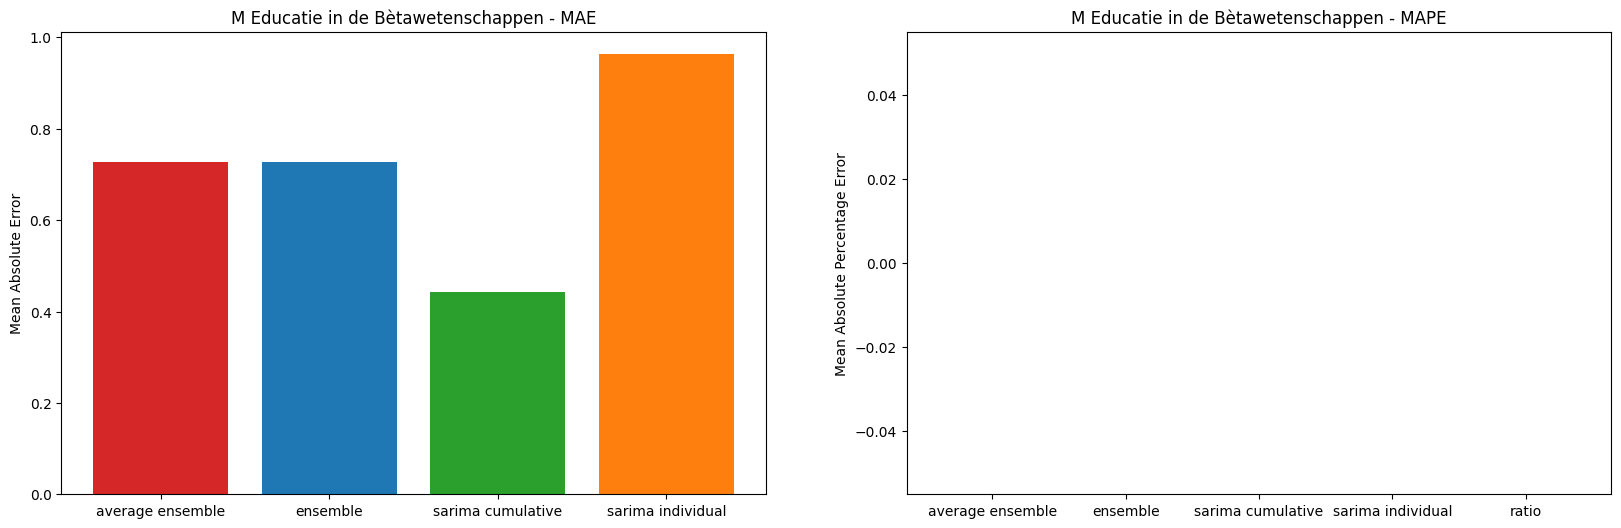

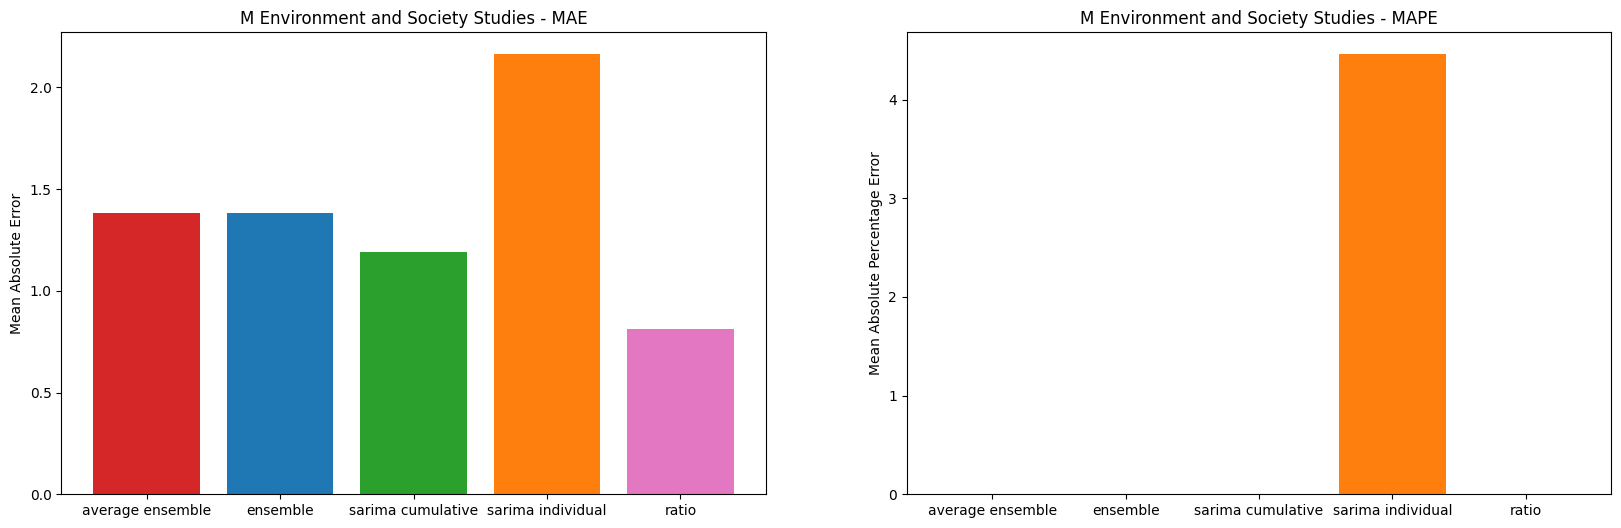

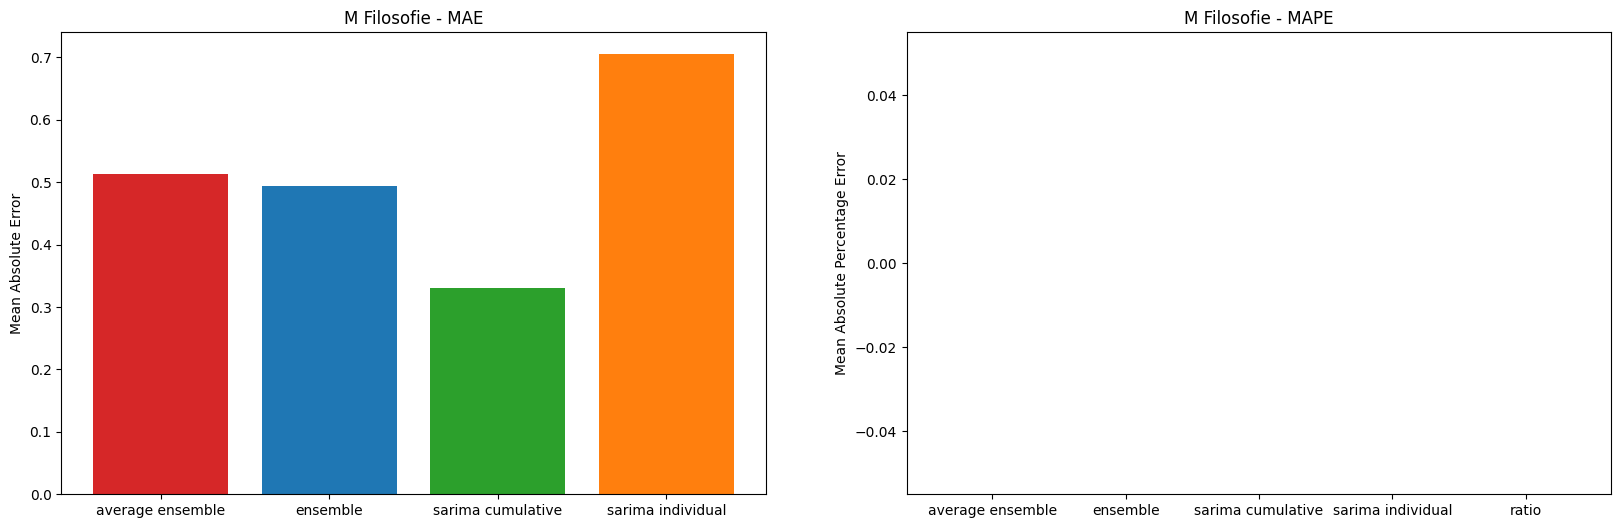

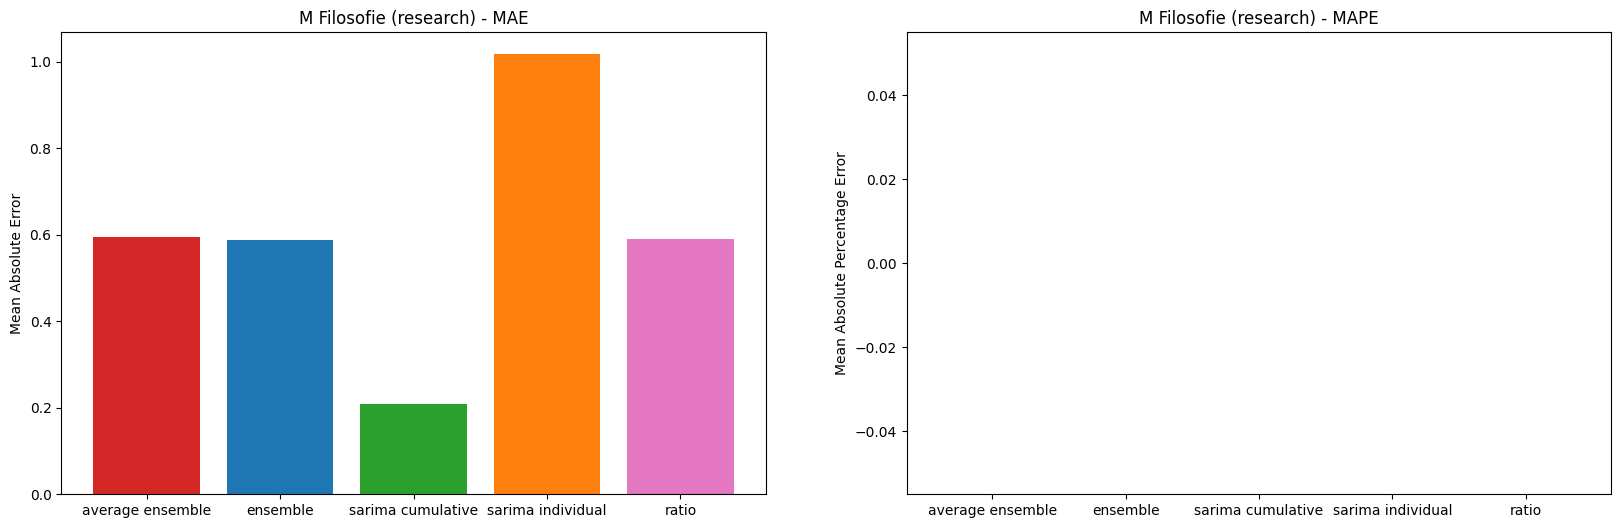

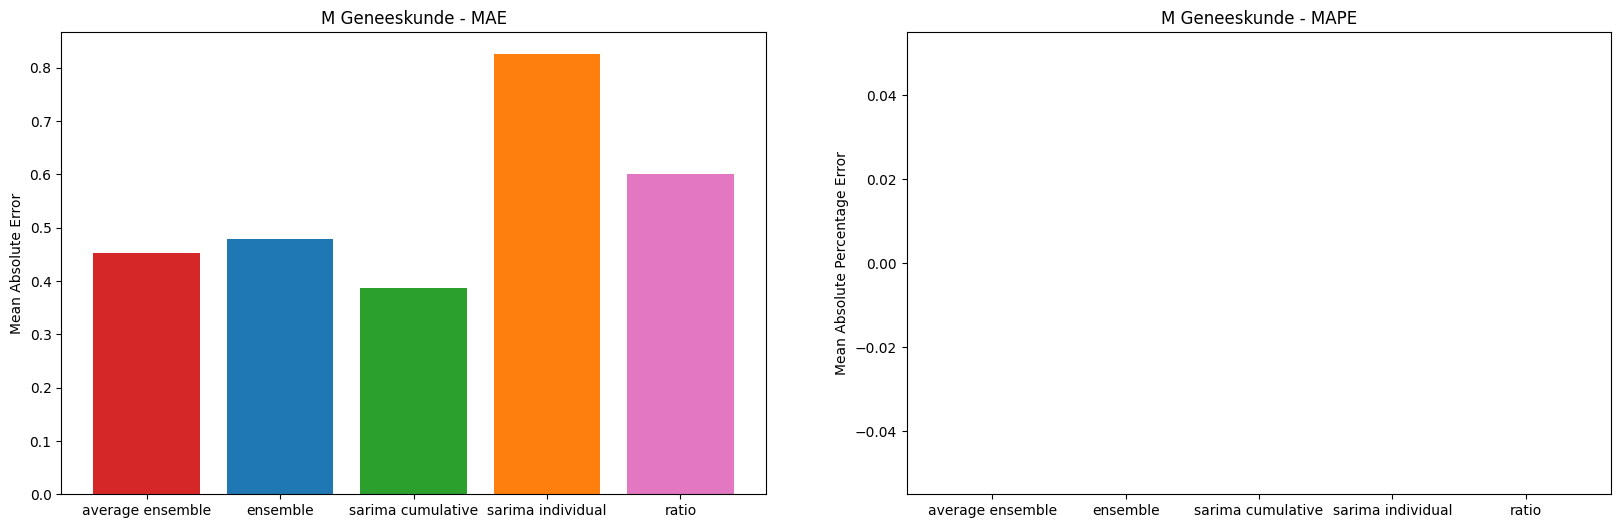

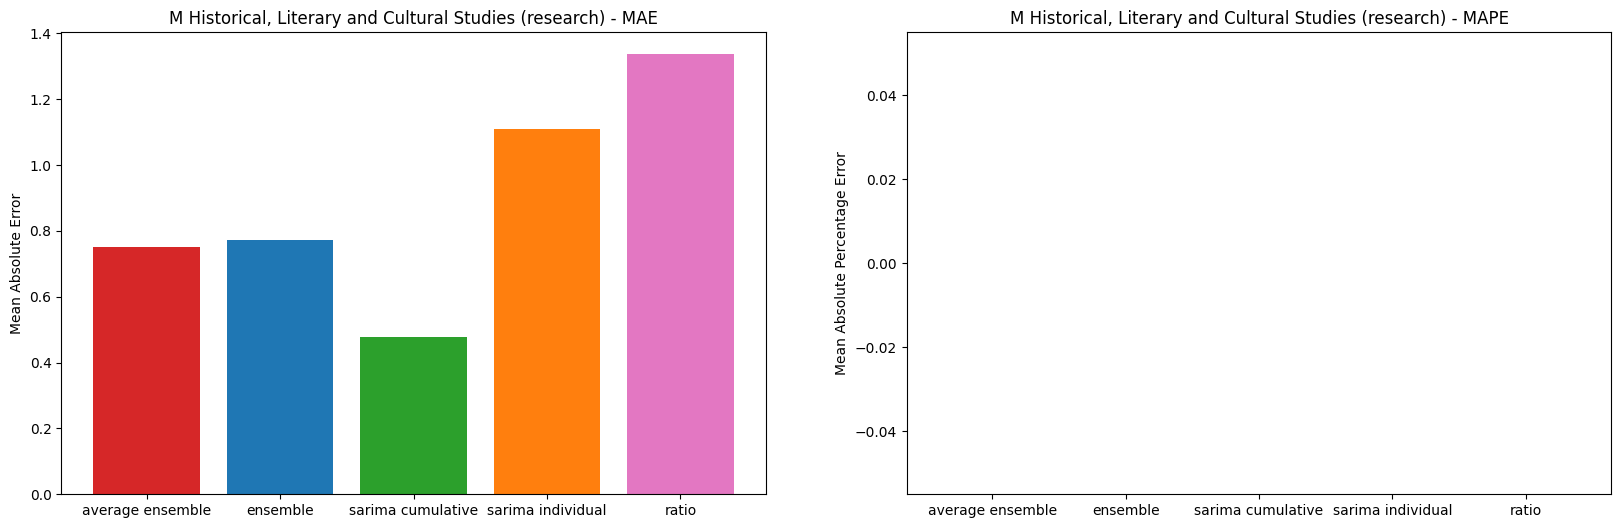

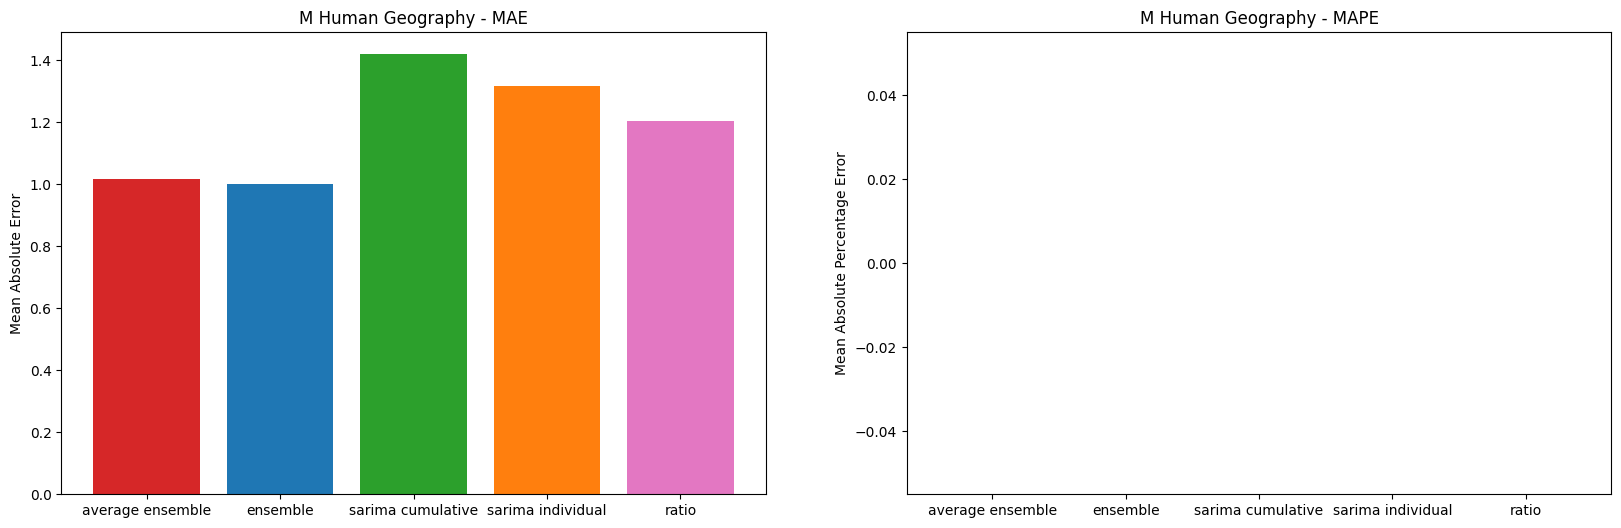

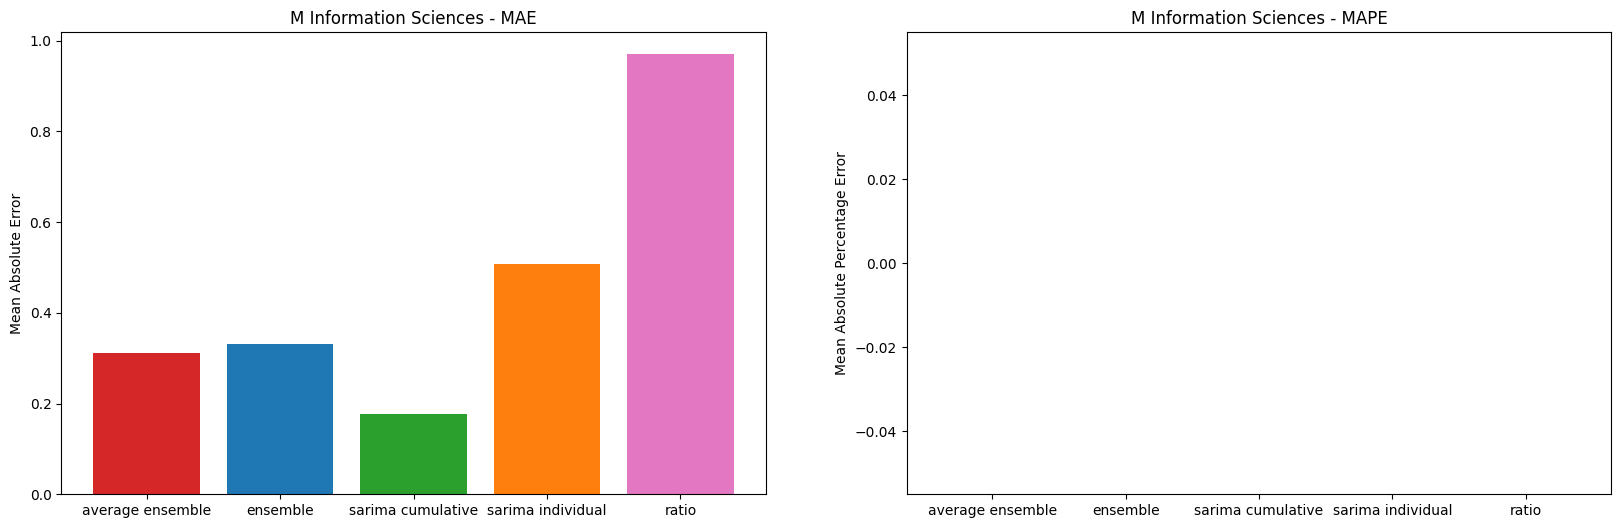

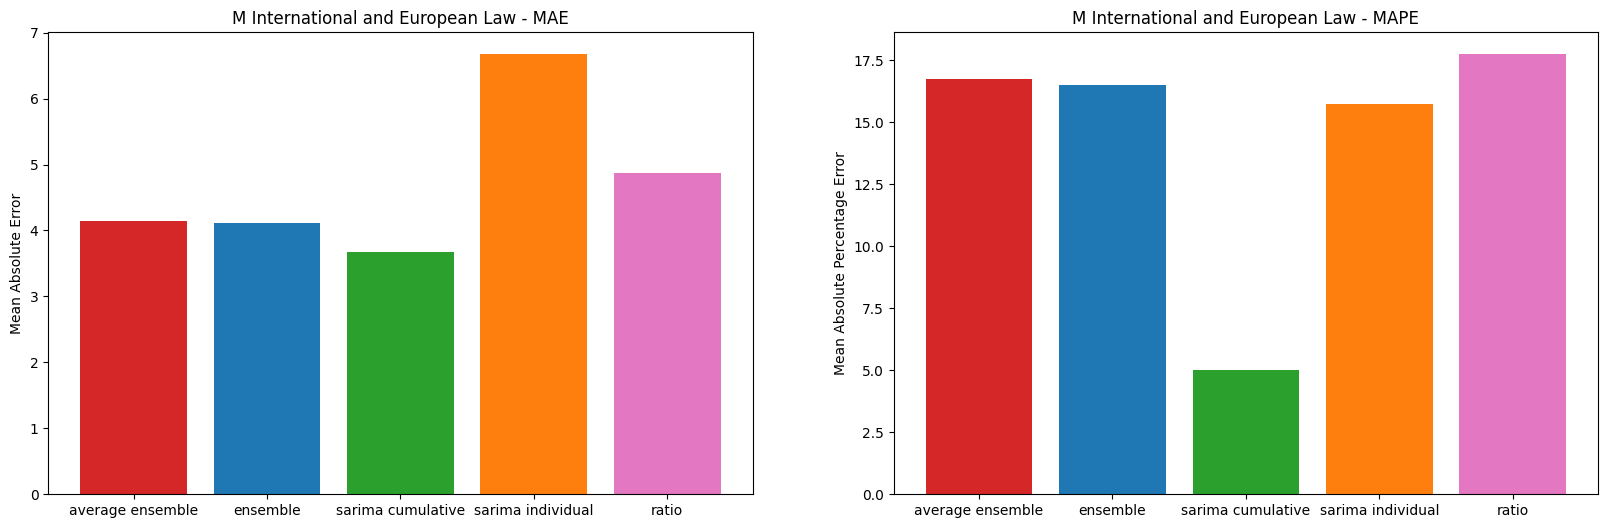

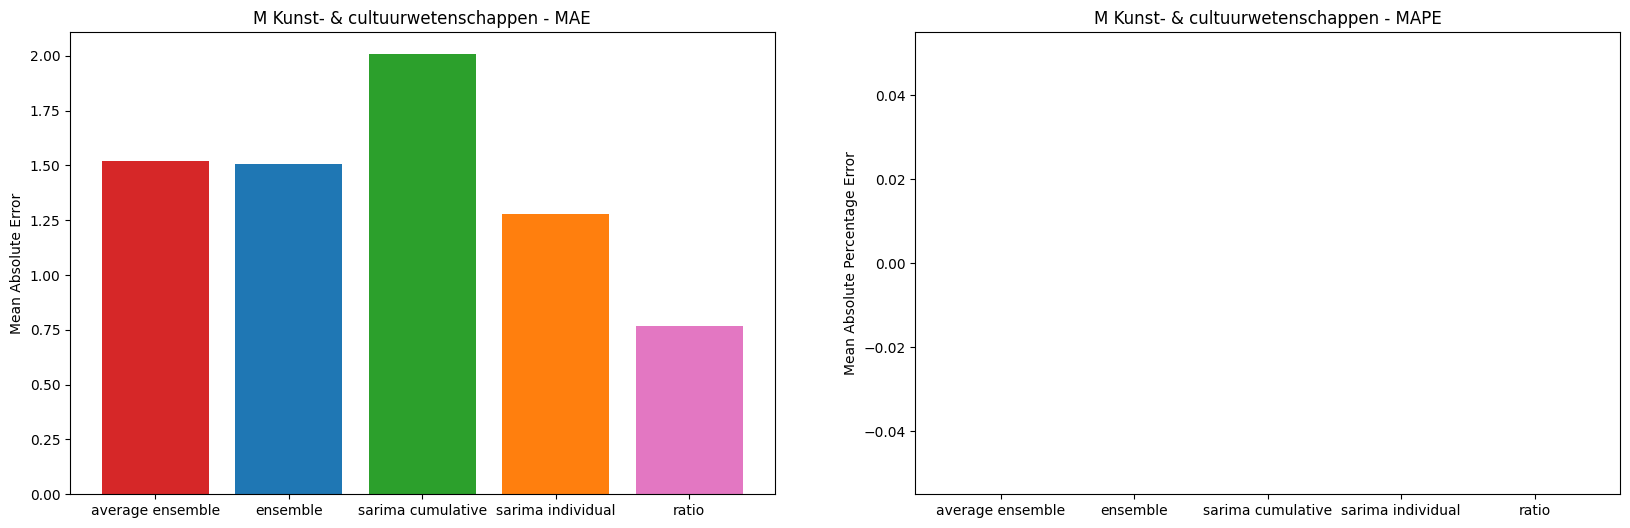

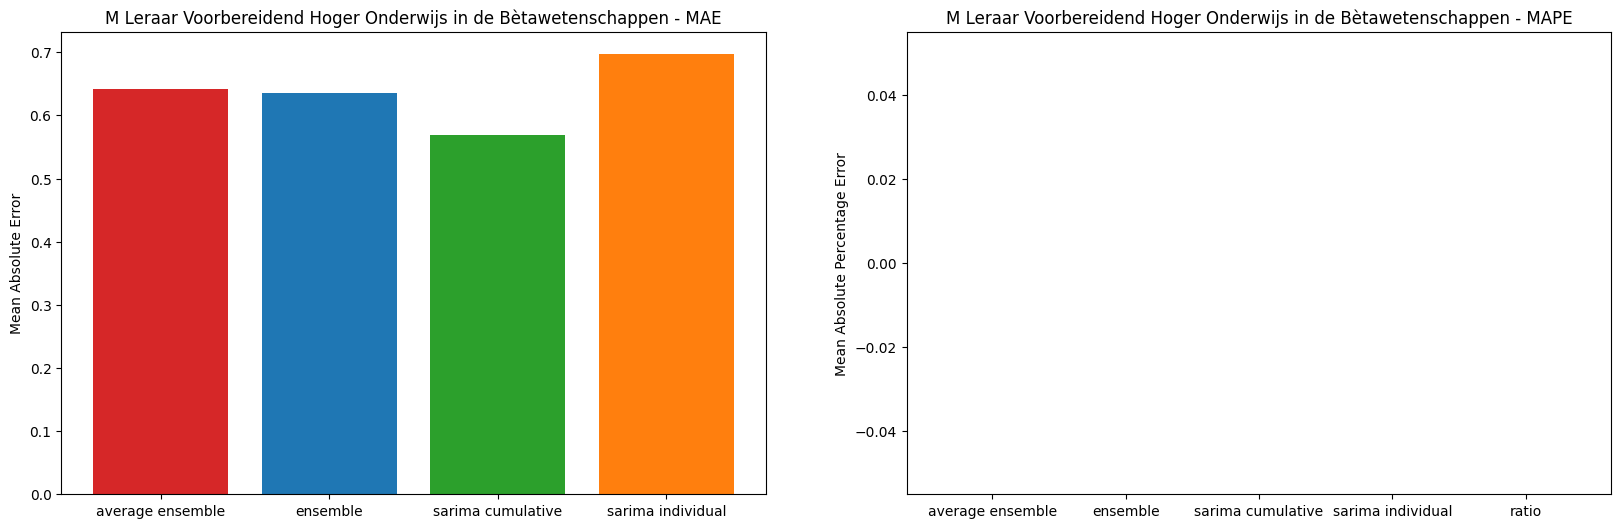

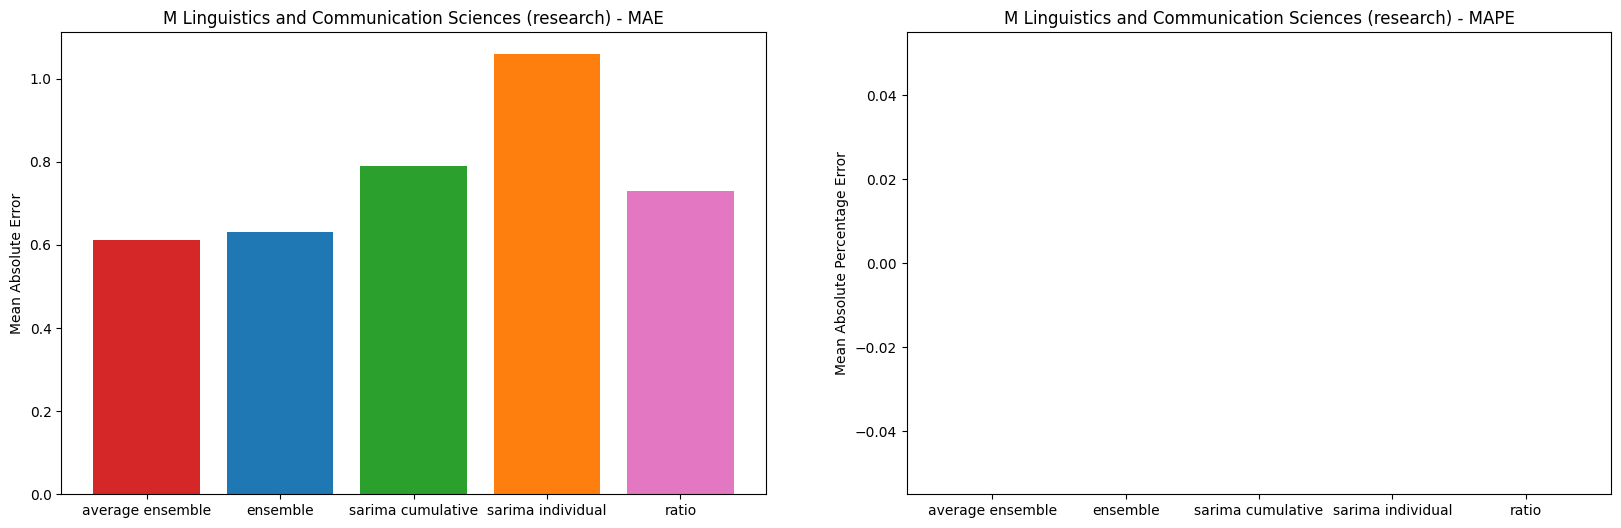

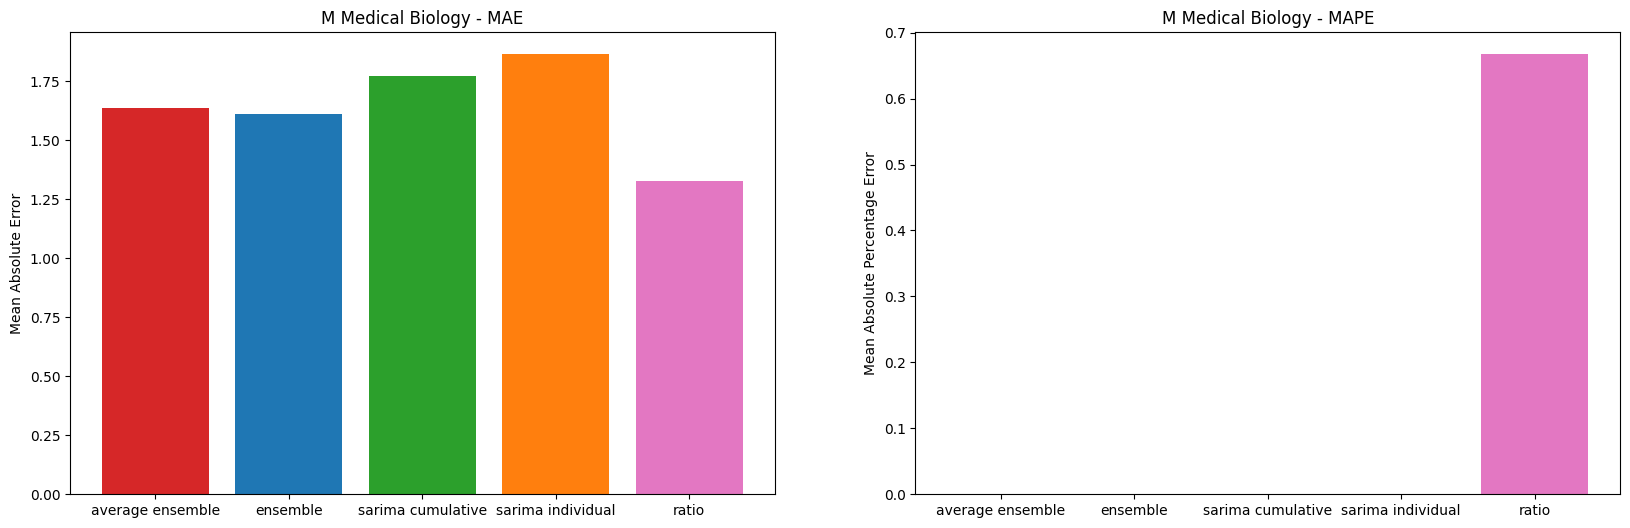

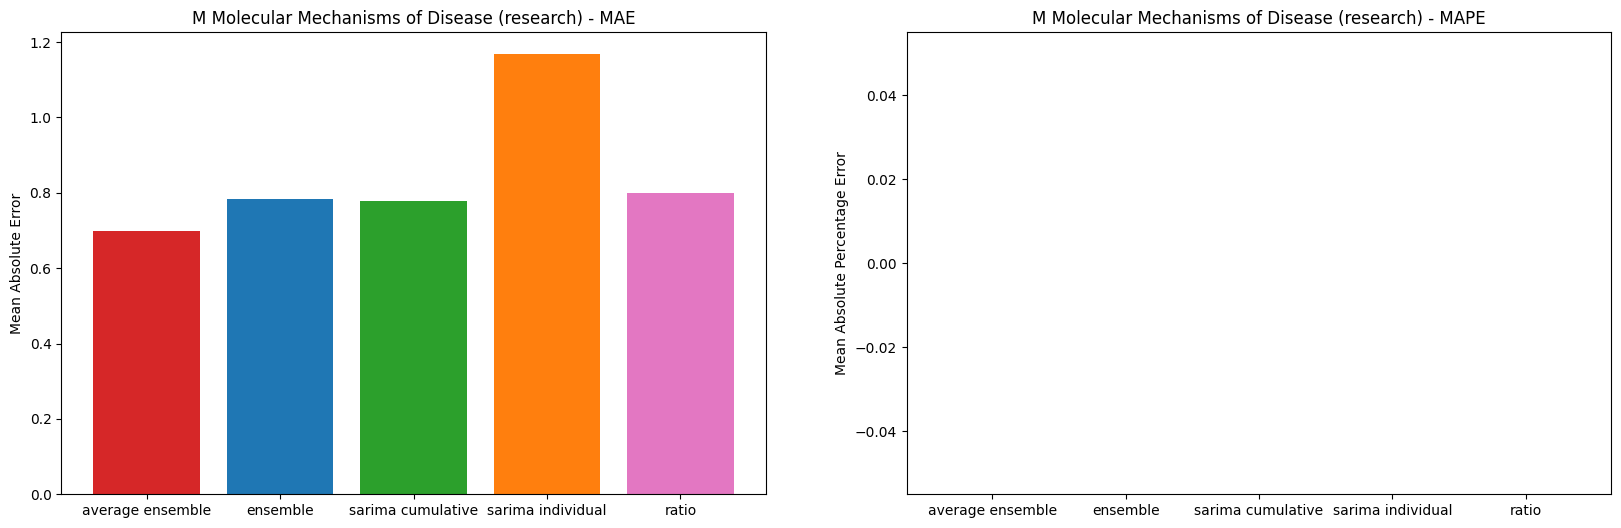

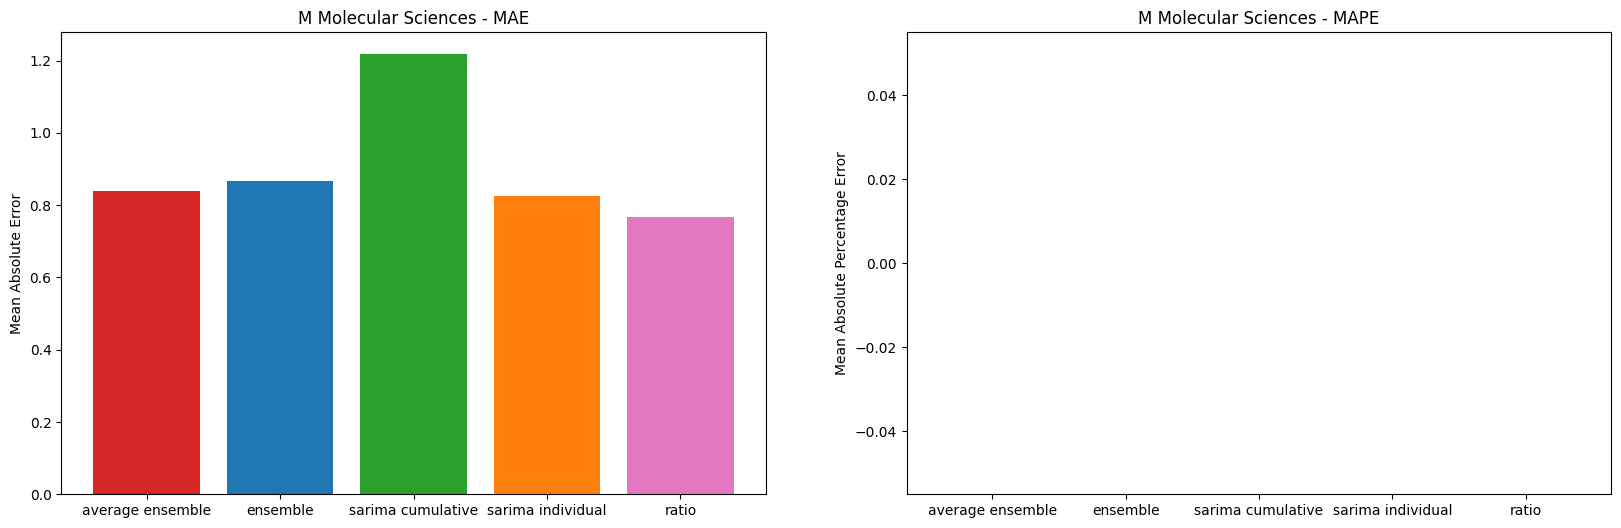

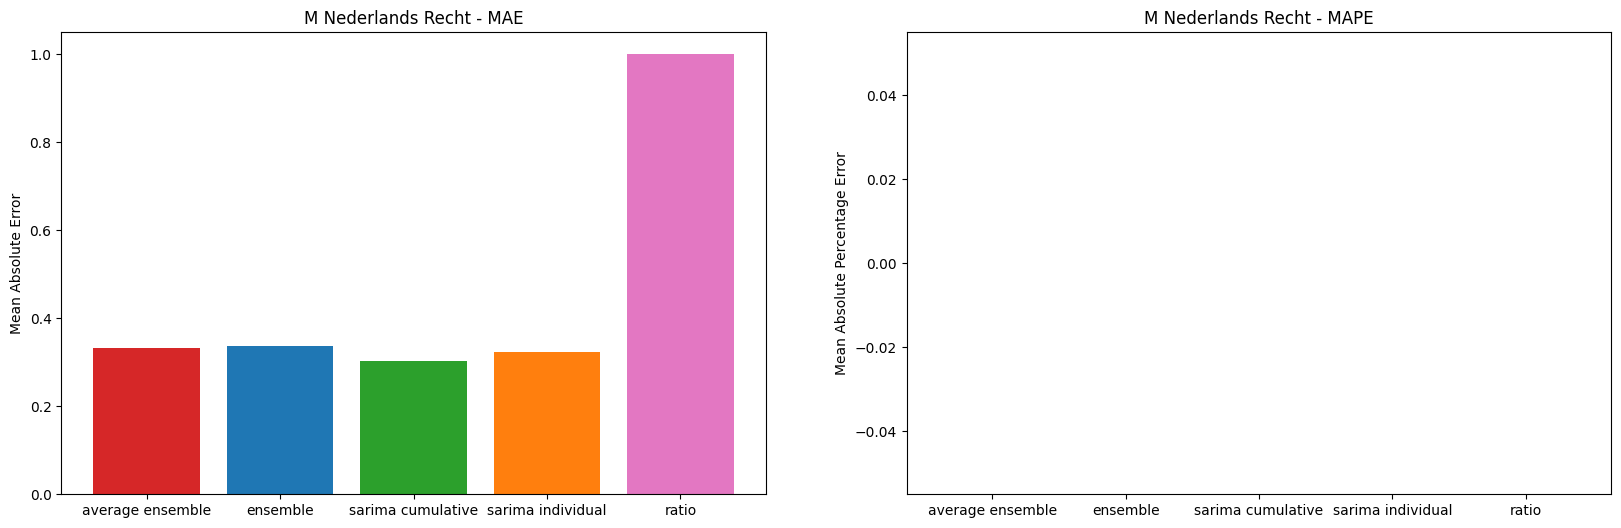

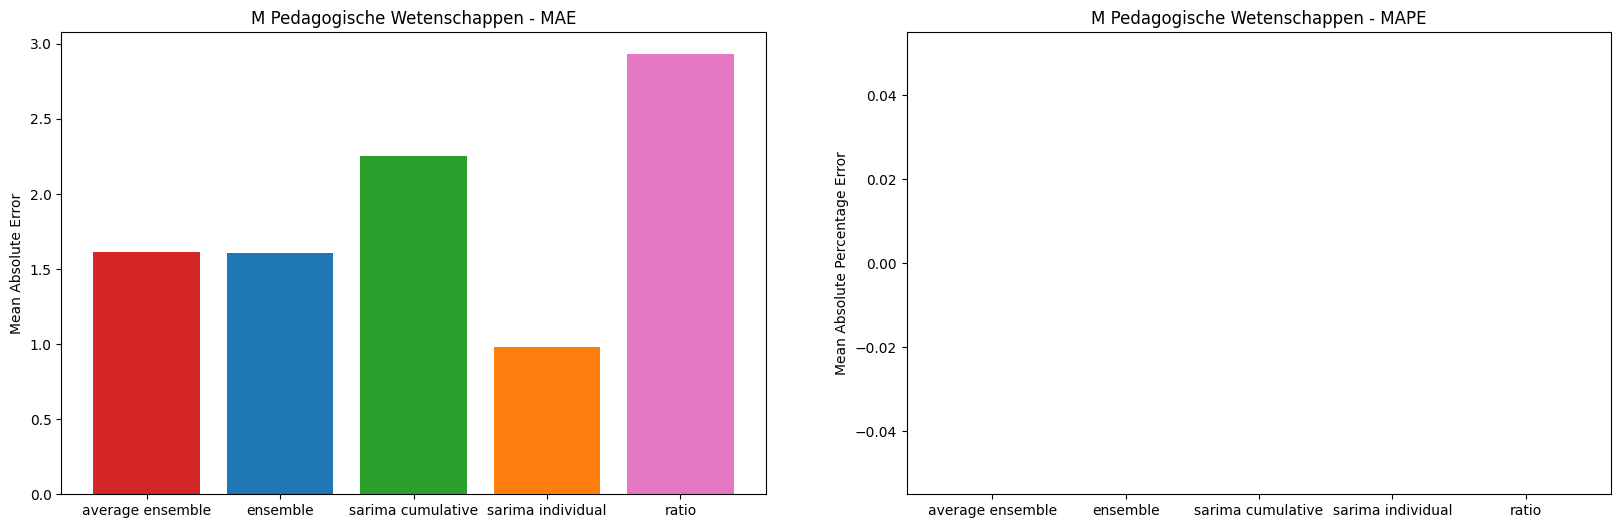

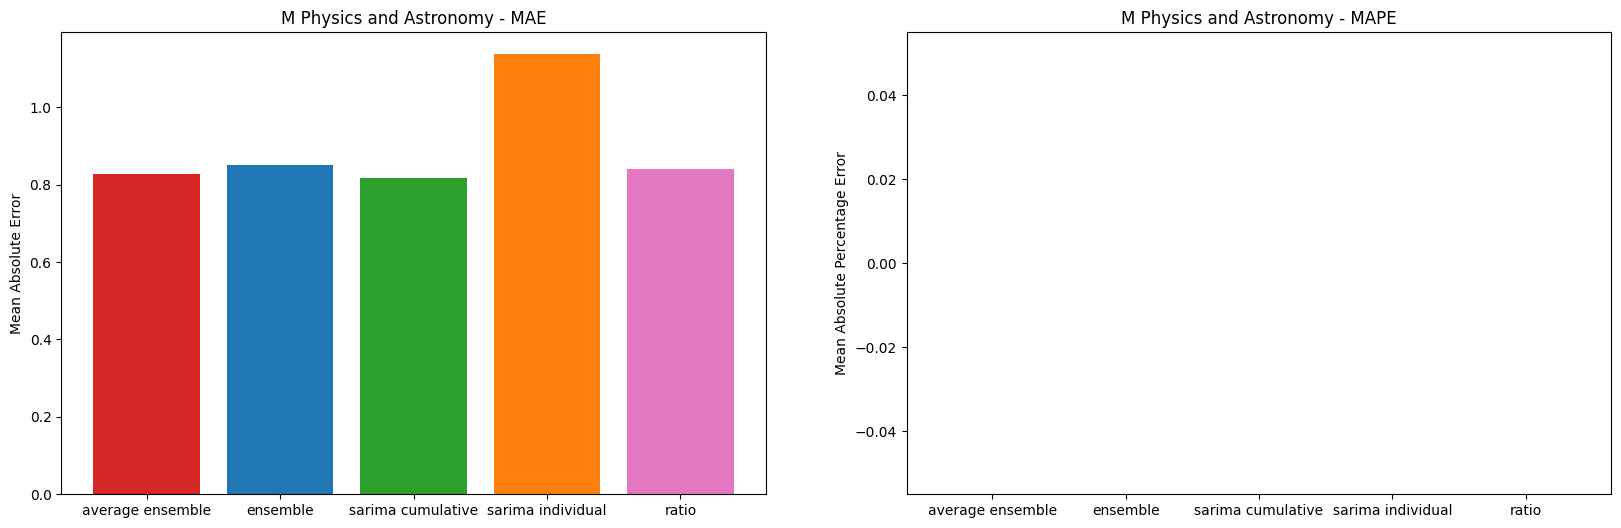

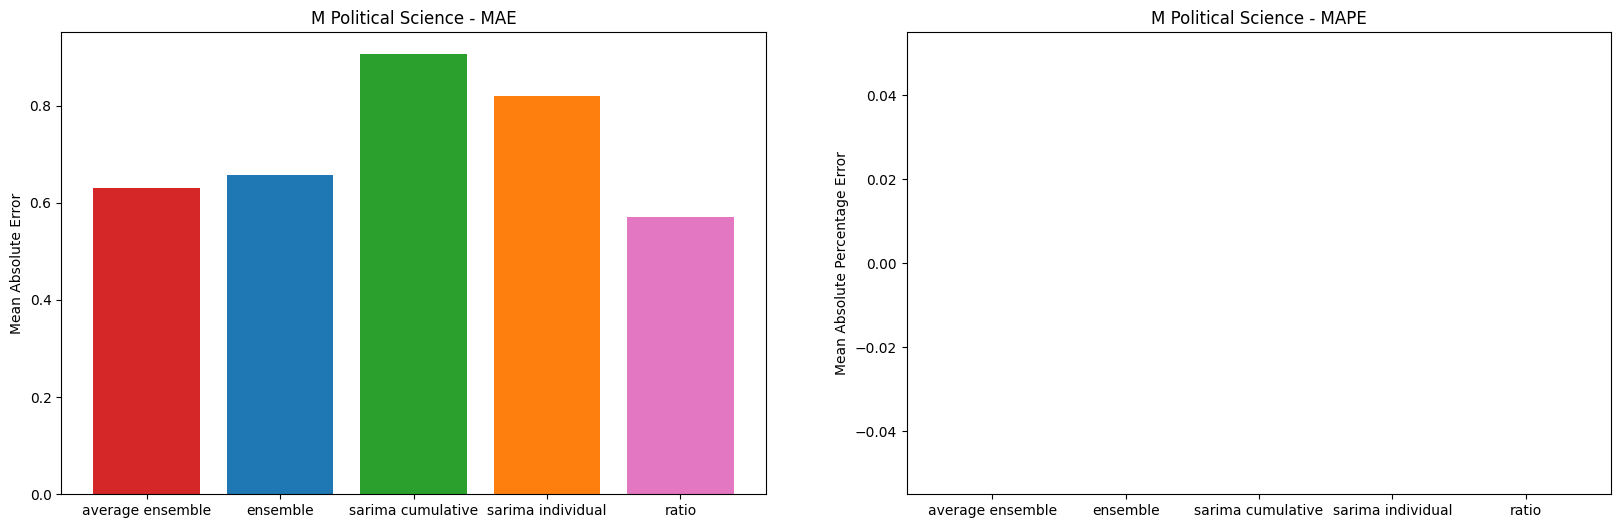

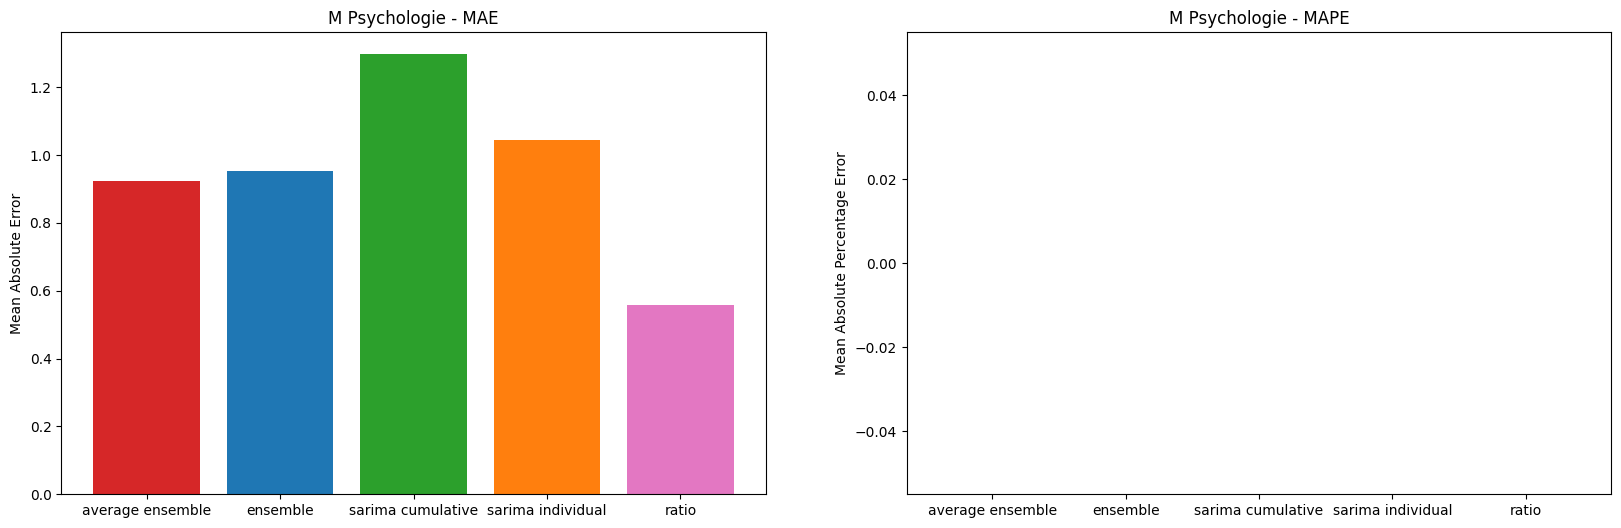

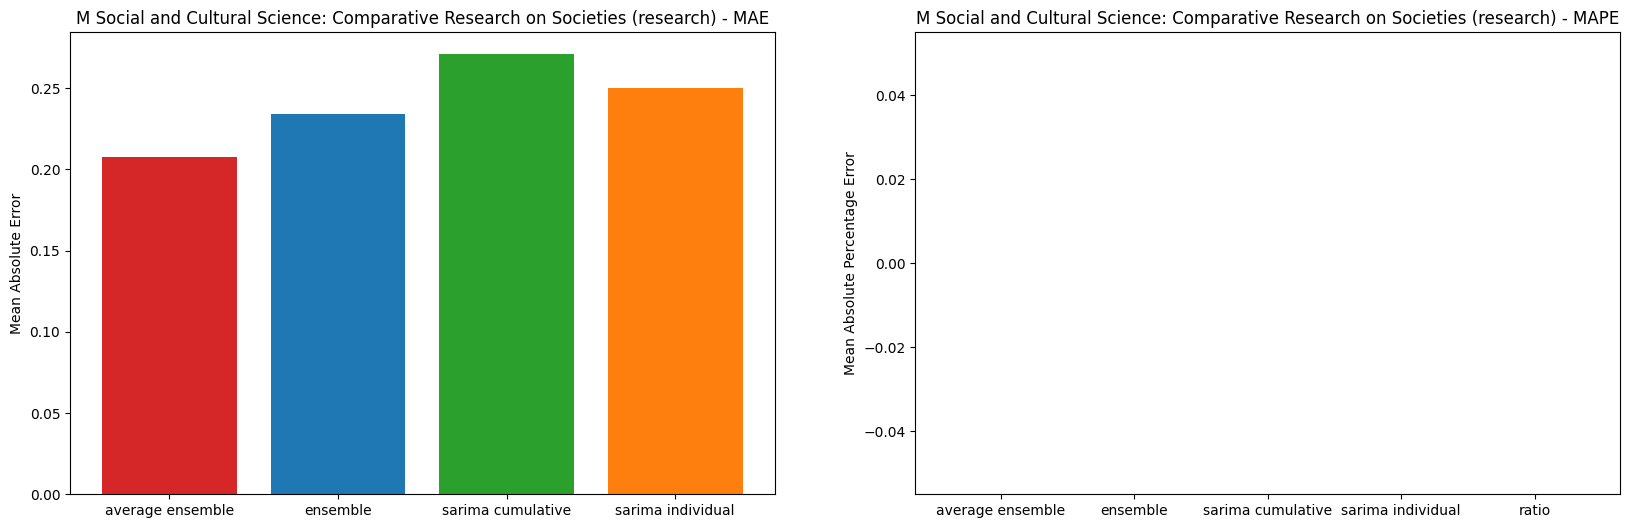

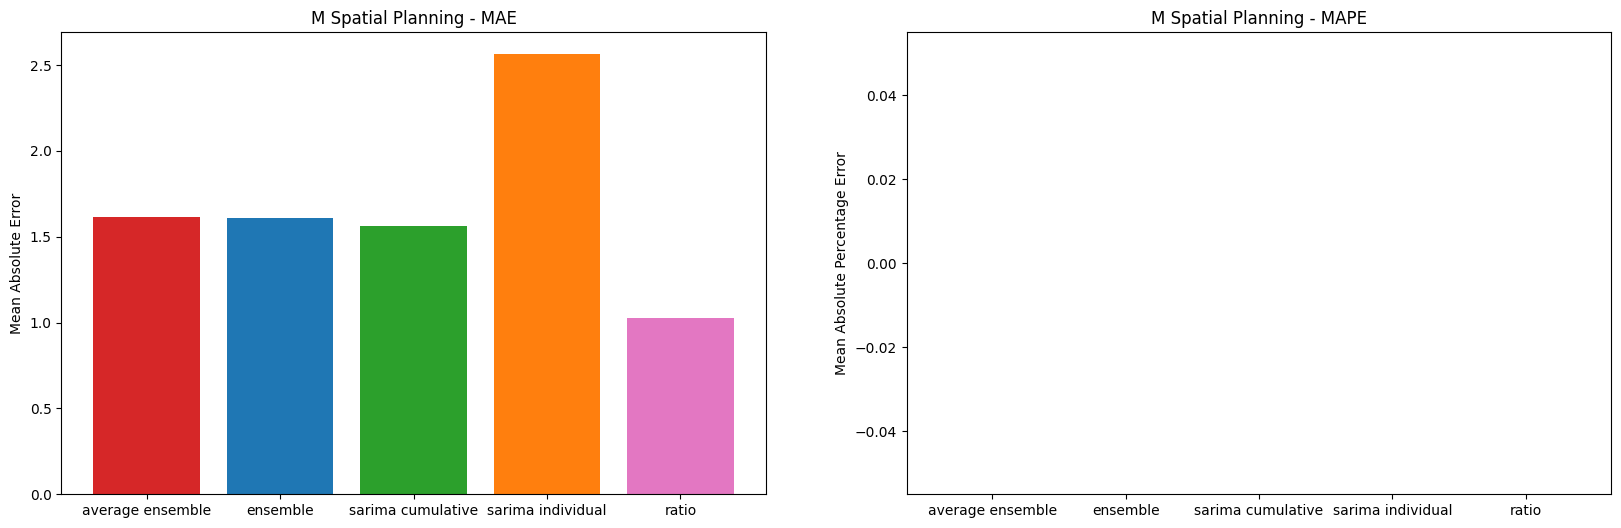

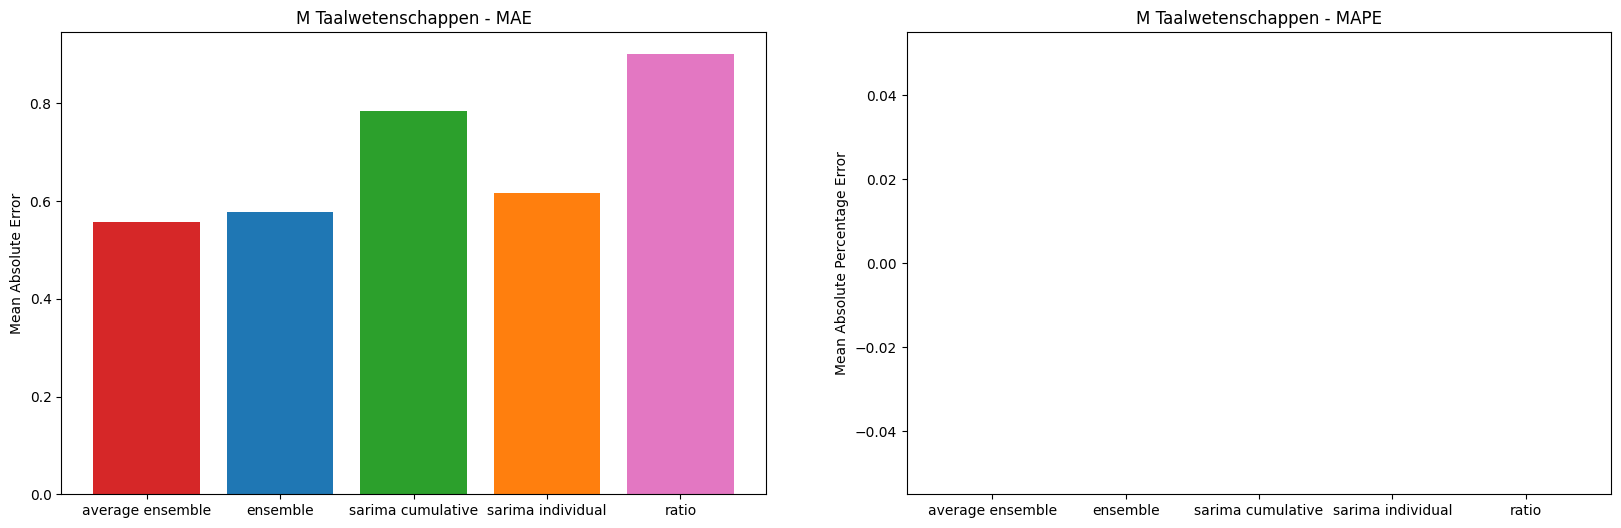

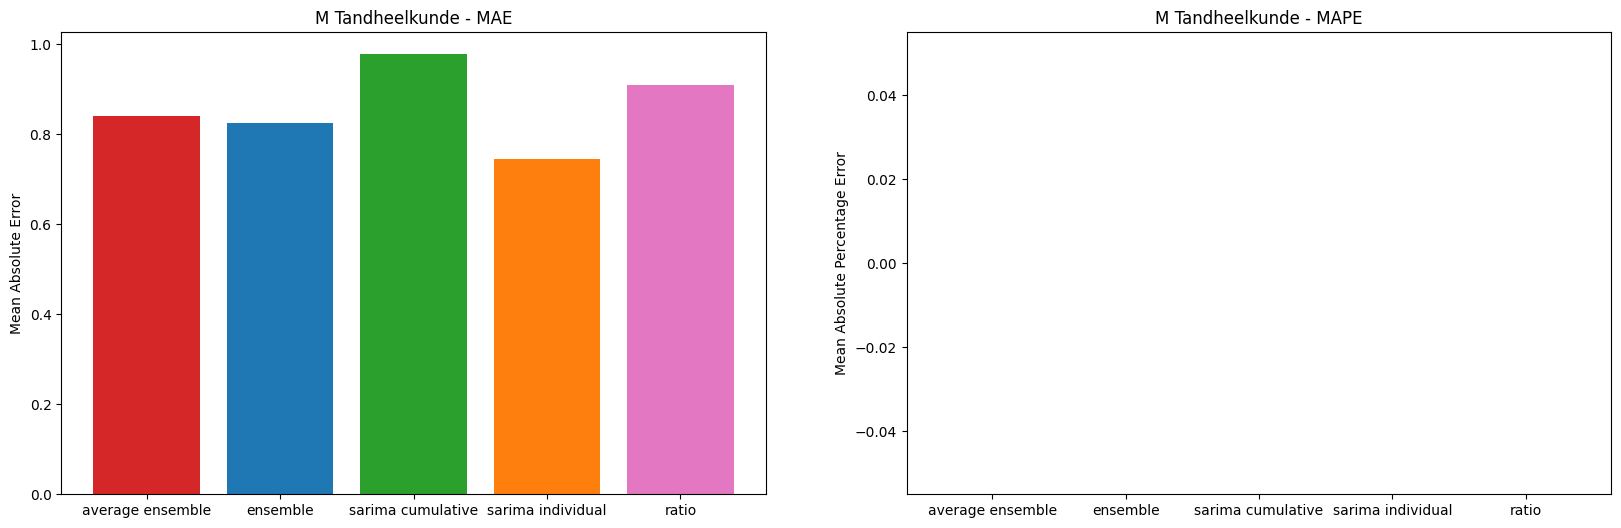

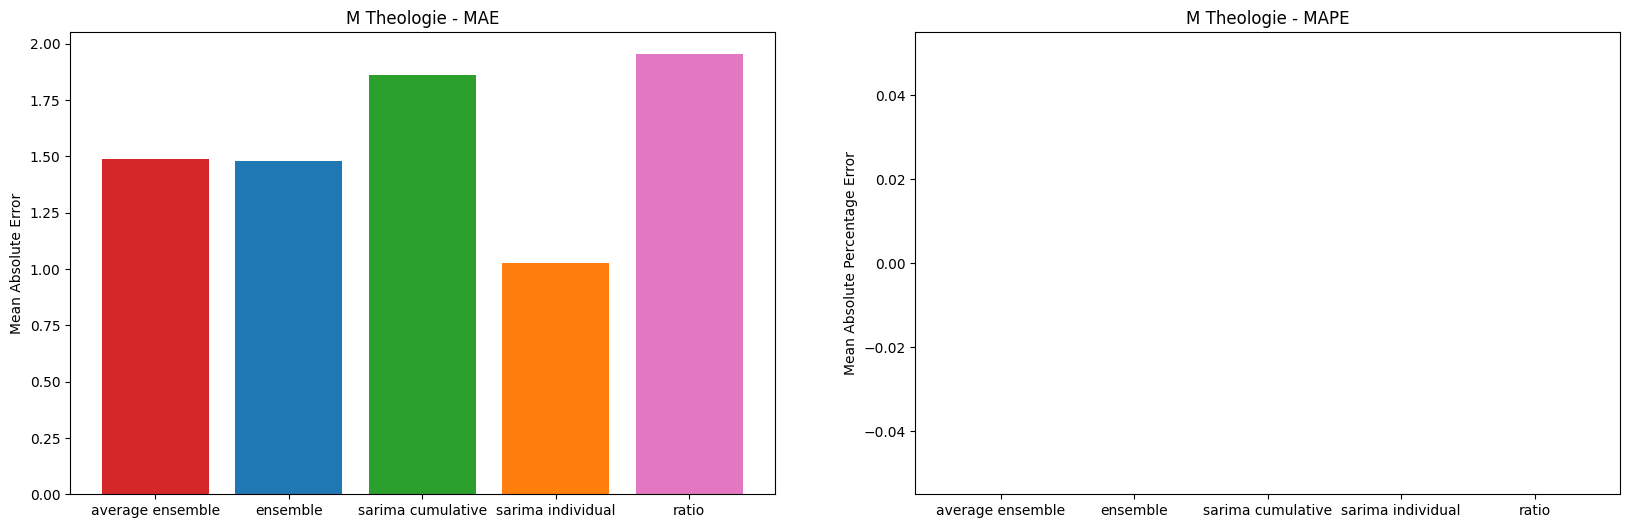

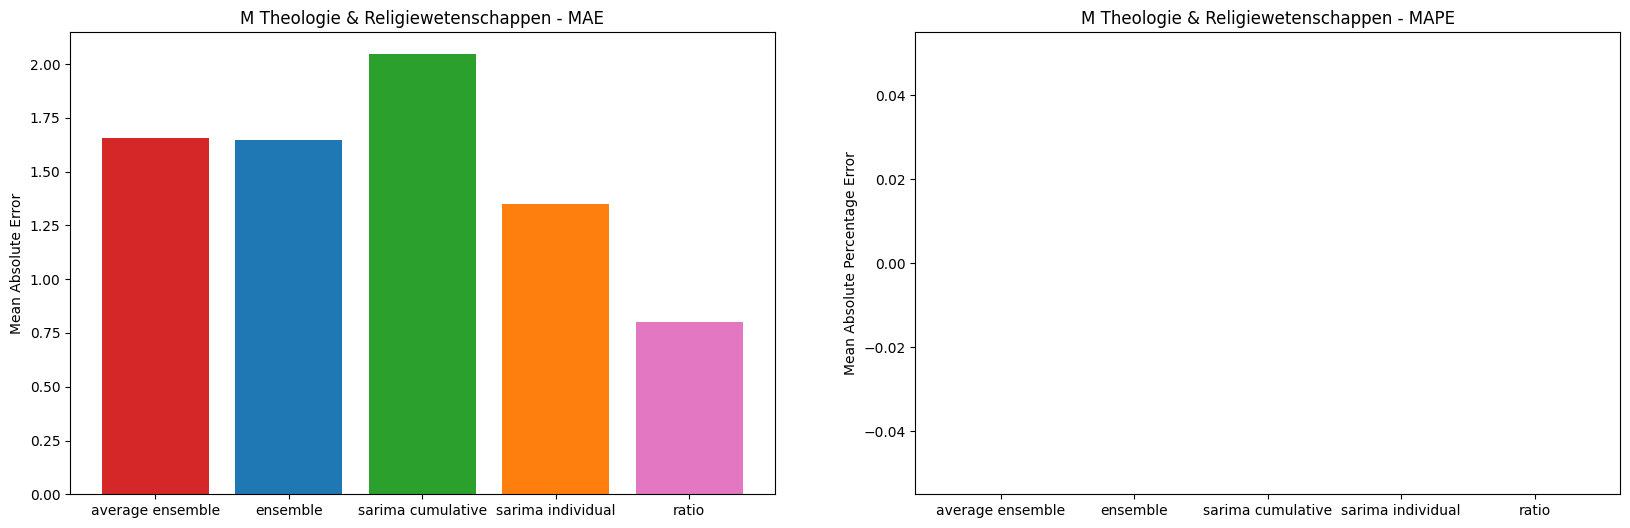

In [9]:
plot_per_heritage("Niet-EER")

In [24]:
def calculate_weights_per_programme(metrics):
    weights_per_programme = {}

    for programme in metrics[list(metrics.keys())[0]]:
        weights_per_programme[programme] = {}
        total = 0.0
        count = 0.0
        for key in metrics:
            total += metrics[key][programme]
            count += 1.0

        new_total = 0.0
        for key in metrics:
            new_total += total / metrics[key][programme]
        
        for key in metrics:
            weights_per_programme[programme][key] = (total / metrics[key][programme]) / new_total

    return weights_per_programme

{
    "B Algemene Cultuurwetenschappen": {
        "MAE ratio": 0.24723730839999006,
        "MAE sarima cumulative": 0.3713675191508499,
        "MAE sarima individual": 0.38139517244916005
    },
    "B Artificial Intelligence": {
        "MAE ratio": 0.3450545209328922,
        "MAE sarima cumulative": 0.37849502713443683,
        "MAE sarima individual": 0.27645045193267104
    },
    "B Bedrijfskunde": {
        "MAE ratio": 0.2855478006914662,
        "MAE sarima cumulative": 0.22093928310004018,
        "MAE sarima individual": 0.4935129162084937
    },
    "B Bestuurskunde": {
        "MAE ratio": 0.14845305078769885,
        "MAE sarima cumulative": 0.39151509891717134,
        "MAE sarima individual": 0.46003185029512994
    },
    "B BioFMWische Wetenschappen": {
        "MAE ratio": NaN,
        "MAE sarima cumulative": NaN,
        "MAE sarima individual": NaN
    },
    "B Biology": {
        "MAE ratio": 0.4679340638295349,
        "MAE sarima cumulative": 0.183995065974

In [27]:
filtered_MAE_metrics = MAE_metrics
filtered_MAE_metrics.pop("MAE average ensemble")
filtered_MAE_metrics.pop("MAE ensemble")

filtered_MAPE_metrics = MAPE_metrics
filtered_MAPE_metrics.pop("MAPE average ensemble")
filtered_MAPE_metrics.pop("MAPE ensemble")

KeyError: 'MAE average ensemble'

**MAE Metrics**

In [40]:
print("\n### MAE metrics ###\n")
weights_per_programme_MAE = calculate_weights_per_programme(filtered_MAE_metrics)
print_dict(weights_per_programme_MAE)


### MAE metrics ###

{
    "B Algemene Cultuurwetenschappen": {
        "MAE ratio": 0.24723730839999006,
        "MAE sarima cumulative": 0.3713675191508499,
        "MAE sarima individual": 0.38139517244916005
    },
    "B Artificial Intelligence": {
        "MAE ratio": 0.3450545209328922,
        "MAE sarima cumulative": 0.37849502713443683,
        "MAE sarima individual": 0.27645045193267104
    },
    "B Bedrijfskunde": {
        "MAE ratio": 0.2855478006914662,
        "MAE sarima cumulative": 0.22093928310004018,
        "MAE sarima individual": 0.4935129162084937
    },
    "B Bestuurskunde": {
        "MAE ratio": 0.14845305078769885,
        "MAE sarima cumulative": 0.39151509891717134,
        "MAE sarima individual": 0.46003185029512994
    },
    "B BioFMWische Wetenschappen": {
        "MAE ratio": NaN,
        "MAE sarima cumulative": NaN,
        "MAE sarima individual": NaN
    },
    "B Biology": {
        "MAE ratio": 0.4679340638295349,
        "MAE sarima cumul

**MAPE Metrics**

In [41]:
print("\n### MAPE metrics ###\n")
weights_per_programme_MAPE = calculate_weights_per_programme(filtered_MAPE_metrics)
print_dict(weights_per_programme_MAPE)


### MAPE metrics ###

{
    "B Algemene Cultuurwetenschappen": {
        "MAPE ratio": 0.26029339861984446,
        "MAPE sarima cumulative": 0.3344530804634962,
        "MAPE sarima individual": 0.40525352091665945
    },
    "B Artificial Intelligence": {
        "MAPE ratio": 0.35231776233475165,
        "MAPE sarima cumulative": 0.32952848323720174,
        "MAPE sarima individual": 0.3181537544280466
    },
    "B Bedrijfskunde": {
        "MAPE ratio": 0.36531898422812437,
        "MAPE sarima cumulative": 0.29267511355384435,
        "MAPE sarima individual": 0.34200590221803134
    },
    "B Bestuurskunde": {
        "MAPE ratio": 0.2585335489472521,
        "MAPE sarima cumulative": 0.3464561913253115,
        "MAPE sarima individual": 0.3950102597274364
    },
    "B BioFMWische Wetenschappen": {
        "MAPE ratio": NaN,
        "MAPE sarima cumulative": NaN,
        "MAPE sarima individual": NaN
    },
    "B Biology": {
        "MAPE ratio": 0.43576904194649685,
        

**Average weights**

In [42]:
weights_per_programme = {}
for programme in weights_per_programme_MAE:
    weights_per_programme[programme] = {}
    total = 0.0
    for key in weights_per_programme_MAE[programme]:
        key = key.replace("MAE ", "")
        weights_per_programme[programme][key] = weights_per_programme_MAE[programme]["MAE " + key] + weights_per_programme_MAPE[programme]["MAPE " + key]
        total += weights_per_programme[programme][key]

    for key in weights_per_programme_MAE[programme]:
        key = key.replace("MAE ", "")
        weights_per_programme[programme][key] = weights_per_programme[programme][key] / total

print_dict(weights_per_programme)

{
    "B Algemene Cultuurwetenschappen": {
        "ratio": 0.25376535350991725,
        "sarima cumulative": 0.35291029980717303,
        "sarima individual": 0.3933243466829097
    },
    "B Artificial Intelligence": {
        "ratio": 0.34868614163382194,
        "sarima cumulative": 0.3540117551858193,
        "sarima individual": 0.2973021031803588
    },
    "B Bedrijfskunde": {
        "ratio": 0.3254333924597953,
        "sarima cumulative": 0.25680719832694227,
        "sarima individual": 0.4177594092132625
    },
    "B Bestuurskunde": {
        "ratio": 0.2034932998674755,
        "sarima cumulative": 0.36898564512124143,
        "sarima individual": 0.4275210550112832
    },
    "B BioFMWische Wetenschappen": {
        "ratio": NaN,
        "sarima cumulative": NaN,
        "sarima individual": NaN
    },
    "B Biology": {
        "ratio": 0.4518515528880159,
        "sarima cumulative": 0.1878359602169901,
        "sarima individual": 0.360312486894994
    },
    "B Biom